In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
submit_sample=pd.read_csv("./sample_submit.csv", header=None)

df = pd.concat([train, test], sort=False)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   age       2000 non-null   int64  
 2   sex       2000 non-null   object 
 3   bmi       2000 non-null   float64
 4   children  2000 non-null   int64  
 5   smoker    2000 non-null   object 
 6   region    2000 non-null   object 
 7   charges   1600 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 140.6+ KB


,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0.0
1,1,41,male,29.798725,1,no,southwest,0.0
2,2,28,male,32.722029,0,yes,northwest,1.0
3,3,20,female,38.429831,2,no,southeast,0.0
4,4,45,female,29.641854,1,no,northwest,0.0
5,5,20,male,37.785937,2,yes,southeast,1.0
6,6,37,male,43.393374,2,no,northeast,0.0
7,7,41,female,32.280407,1,no,northeast,0.0
8,8,40,male,28.865828,1,no,northeast,0.0
9,9,54,female,33.870887,2,no,northeast,0.0


# Pandas Profiling

In [3]:
#import pandas_profiling

# df.profile_report()

### Histogram

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

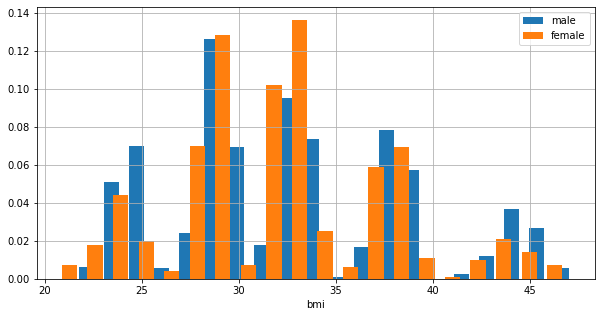

In [5]:
# Histogram BMI (male, female)
plt.figure(figsize=(10, 5))
plt.hist(train[train['sex']=='male']['bmi'], bins=20, label=['male'], rwidth=0.6,density=True)
plt.hist(train[train['sex']=='female']['bmi'], bins=20, label=['female'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

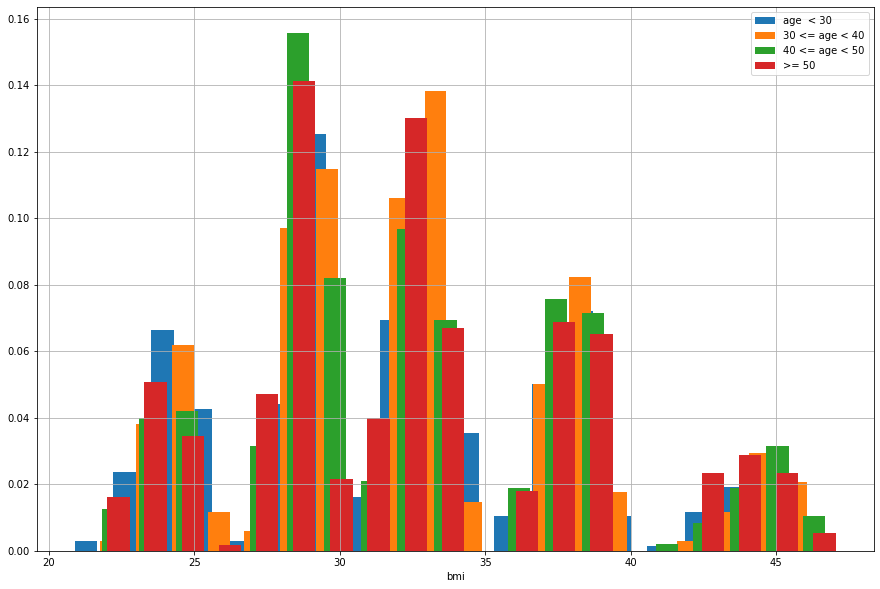

In [6]:
## Histogram BMI (male, female)
plt.figure(figsize=(15, 10))
plt.hist(train.query('age < 30')['bmi'], bins=20, label=['age  < 30'], rwidth=0.6,density=True)
plt.hist(train.query('30 <= age < 40')['bmi'], bins=20, label=['30 <= age < 40'], rwidth=0.6,density=True)
plt.hist(train.query('40 <= age < 50')['bmi'], bins=20, label=['40 <= age < 50'], rwidth=0.6,density=True)
plt.hist(train.query('age >= 50')['bmi'], bins=20, label=['>= 50'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [7]:
print(train['charges'].value_counts()/len(train['charges']))
train_bmi_normal = train.query('bmi < 25')['charges']
print(train_bmi_normal.value_counts()/len(train_bmi_normal))
train_bmi_preobese = train.query('25 <= bmi < 30')['charges']
print(train_bmi_preobese.value_counts()/len(train_bmi_preobese))
train_bmi_obese1 = train.query('30 <= bmi < 35')['charges']
print(train_bmi_obese1.value_counts()/len(train_bmi_obese1))
train_bmi_obese2 = train.query('35 <= bmi < 40')['charges']
print(train_bmi_obese2.value_counts()/len(train_bmi_obese2))
train_bmi_obese3 = train.query('40 <= bmi')['charges']
print(train_bmi_obese3.value_counts()/len(train_bmi_obese3))

0    0.78500
1    0.12375
2    0.09125
Name: charges, dtype: float64
0    0.889423
1    0.100962
2    0.009615
Name: charges, dtype: float64
0    0.770878
1    0.209850
2    0.019272
Name: charges, dtype: float64
0    0.823404
1    0.100000
2    0.076596
Name: charges, dtype: float64
0    0.694534
2    0.228296
1    0.077170
Name: charges, dtype: float64
0    0.750000
2    0.194444
1    0.055556
Name: charges, dtype: float64


In [8]:
# BMI WHO基準
df.loc[df['bmi'] < 25, 'bmi_who'] = 1
df.loc[((df['bmi'] >= 25) & (df['bmi'] < 30)), 'bmi_who'] = 2
df.loc[((df['bmi'] >= 30) & (df['bmi'] < 35)), 'bmi_who'] = 3
df.loc[((df['bmi'] >= 35) & (df['bmi'] < 40)), 'bmi_who'] = 4
df.loc[(df['bmi'] >= 40), 'bmi_who'] = 5
df.head(20)

,id,age,sex,bmi,children,smoker,region,charges,bmi_who
0,0,26,male,32.665465,3,no,southeast,0.0,3.0
1,1,41,male,29.798725,1,no,southwest,0.0,2.0
2,2,28,male,32.722029,0,yes,northwest,1.0,3.0
3,3,20,female,38.429831,2,no,southeast,0.0,4.0
4,4,45,female,29.641854,1,no,northwest,0.0,2.0
5,5,20,male,37.785937,2,yes,southeast,1.0,4.0
6,6,37,male,43.393374,2,no,northeast,0.0,5.0
7,7,41,female,32.280407,1,no,northeast,0.0,3.0
8,8,40,male,28.865828,1,no,northeast,0.0,2.0
9,9,54,female,33.870887,2,no,northeast,0.0,3.0


### Divide dataset into two parts (categorical , numerical)

In [9]:
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL:\n{}".format(categorical))
print("\nNumericaL:\n{}".format(numerical))

CategoricaL:
['sex', 'smoker', 'region']

NumericaL:
['id', 'age', 'bmi', 'children', 'charges', 'bmi_who']


### Heat map for Correlation coefficient

<AxesSubplot:>

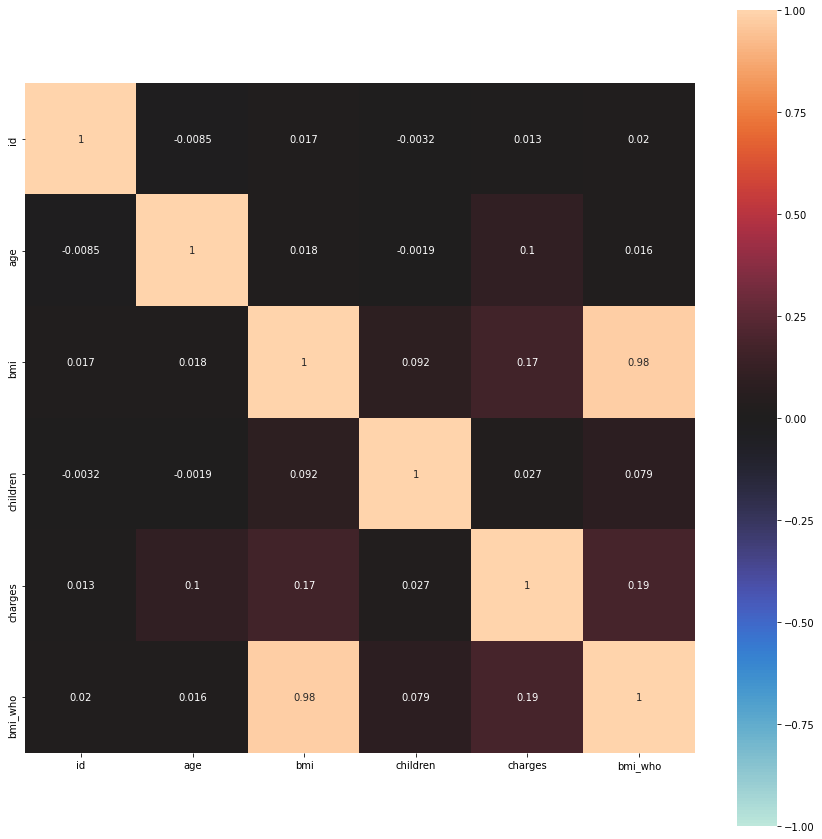

In [10]:
df_corr = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, square=True, annot=True)

### Scatter plot

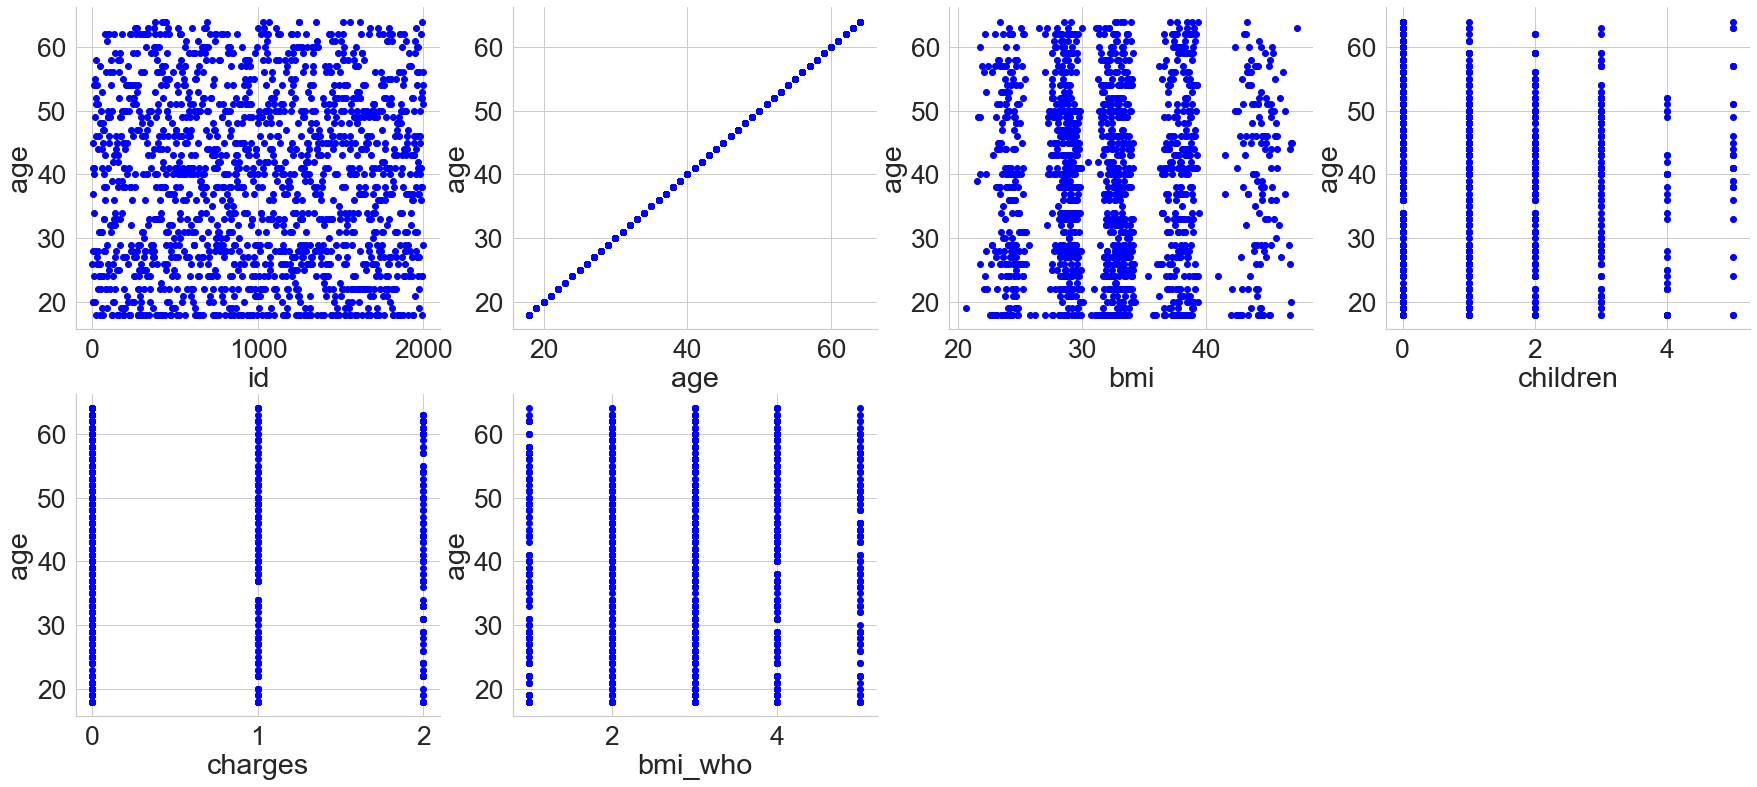

In [11]:
# We shall plot these figures
plt.figure(figsize=(30, 70))
sns.set(font_scale= 2.4)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='age', color ="blue")
    plt.xlabel(features)
    plt.ylabel('age')
    
sns.despine()

### Creating Dummy values

In [12]:
df =pd.get_dummies(df, columns=categorical, drop_first=True)

### Separate Data

In [13]:
#df = pd.get_dummies(df)
train = df[:len(train)]
test = df[len(train):]
df.head()

,id,age,bmi,children,charges,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,26,32.665465,3,0.0,3.0,1,0,0,1,0
1,1,41,29.798725,1,0.0,2.0,1,0,0,0,1
2,2,28,32.722029,0,1.0,3.0,1,1,1,0,0
3,3,20,38.429831,2,0.0,4.0,0,0,0,1,0
4,4,45,29.641854,1,0.0,2.0,0,0,1,0,0


### LightGBM

In [14]:
y_train = train['charges']
X_train = train.drop(['id','charges'], axis=1)
X_test = test.drop(['id','charges'], axis=1)


In [15]:
import optuna.integration.lightgbm as lgb # Optuna 
#import lightgbm as lgb 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score

### lightGBM boosting type = dart

In [16]:
y_lgb_dart_preds = []
models_dart = []
y_lgb_dart_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'dart',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    dart_evals_result = {} #結果を格納するための辞書
    # train
    gbm_dart = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=200,
     #               early_stopping_rounds=100,
                    verbose_eval=100,
                    evals_result=dart_evals_result
                   )
    # Out-of-hold of train data
    y_lgb_dart_oof_train[valid_index] = \
        gbm_dart.predict(X_val, num_iteration=gbm_dart.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm_dart.predict(X_test, num_iteration=gbm_dart.best_iteration)
    
    # Append Prediction data 
    y_lgb_dart_preds.append(y_pred)
    models_dart.append(gbm_dart)


[I 2021-06-13 18:02:19,980] A new study created in memory with name: no-name-b5848f64-be78-41e5-a19d-75d98a16f1ca
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.56454	eval's multi_logloss: 0.581464


feature_fraction, val_score: 0.569186:  14%|7    | 1/7 [00:01<00:11,  1.89s/it]

[200]	train's multi_logloss: 0.545024	eval's multi_logloss: 0.569186
[100]	train's multi_logloss: 0.634878	eval's multi_logloss: 0.657825


feature_fraction, val_score: 0.569186:  29%|#4   | 2/7 [00:03<00:08,  1.75s/it]

[200]	train's multi_logloss: 0.629086	eval's multi_logloss: 0.663244
[100]	train's multi_logloss: 0.525463	eval's multi_logloss: 0.53623


feature_fraction, val_score: 0.517898:  43%|##1  | 3/7 [00:05<00:07,  1.78s/it]

[200]	train's multi_logloss: 0.502015	eval's multi_logloss: 0.517898
[100]	train's multi_logloss: 0.534795	eval's multi_logloss: 0.547227


feature_fraction, val_score: 0.517898:  57%|##8  | 4/7 [00:07<00:05,  1.79s/it]

[200]	train's multi_logloss: 0.51437	eval's multi_logloss: 0.532767
[100]	train's multi_logloss: 0.549964	eval's multi_logloss: 0.56592


feature_fraction, val_score: 0.517898:  71%|###5 | 5/7 [00:08<00:03,  1.80s/it]

[200]	train's multi_logloss: 0.529024	eval's multi_logloss: 0.551335
[100]	train's multi_logloss: 0.56454	eval's multi_logloss: 0.581464


feature_fraction, val_score: 0.517898:  86%|####2| 6/7 [00:10<00:01,  1.77s/it]

[200]	train's multi_logloss: 0.545024	eval's multi_logloss: 0.569186
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


feature_fraction, val_score: 0.506793:  86%|####2| 6/7 [00:12<00:01,  1.77s/it]

[200]	train's multi_logloss: 0.4944	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506793:   0%|                  | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506793:   5%|5         | 1/20 [00:01<00:37,  1.97s/it]

[100]	train's multi_logloss: 0.518054	eval's multi_logloss: 0.52561


num_leaves, val_score: 0.506793:  10%|#         | 2/20 [00:03<00:31,  1.78s/it]

[200]	train's multi_logloss: 0.494387	eval's multi_logloss: 0.507053
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506793:  15%|#5        | 3/20 [00:05<00:30,  1.81s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506793:  20%|##        | 4/20 [00:07<00:32,  2.03s/it]

[100]	train's multi_logloss: 0.521733	eval's multi_logloss: 0.524698


num_leaves, val_score: 0.506600:  25%|##5       | 5/20 [00:09<00:28,  1.91s/it]

[200]	train's multi_logloss: 0.499371	eval's multi_logloss: 0.5066
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  30%|###       | 6/20 [00:12<00:31,  2.26s/it][I 2021-06-13 18:02:45,003] Trial 12 finished with value: 0.5067925021486597 and parameters: {'num_leaves': 55}. Best is trial 11 with value: 0.5066000865992575.


[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  30%|###       | 6/20 [00:12<00:31,  2.26s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  35%|###5      | 7/20 [00:15<00:30,  2.37s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  40%|####      | 8/20 [00:18<00:31,  2.63s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  45%|####5     | 9/20 [00:20<00:29,  2.67s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  45%|####5     | 9/20 [00:23<00:29,  2.67s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  50%|####5    | 10/20 [00:23<00:25,  2.56s/it]

[100]	train's multi_logloss: 0.535685	eval's multi_logloss: 0.528291


num_leaves, val_score: 0.506600:  55%|####9    | 11/20 [00:24<00:18,  2.02s/it]

[200]	train's multi_logloss: 0.517696	eval's multi_logloss: 0.510398
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  55%|####9    | 11/20 [00:26<00:18,  2.02s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  60%|#####3   | 12/20 [00:26<00:16,  2.10s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  60%|#####3   | 12/20 [00:28<00:16,  2.10s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  65%|#####8   | 13/20 [00:28<00:14,  2.12s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586
[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  70%|######3  | 14/20 [00:30<00:12,  2.16s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  70%|######3  | 14/20 [00:33<00:12,  2.16s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  75%|######7  | 15/20 [00:33<00:11,  2.22s/it]

[100]	train's multi_logloss: 0.555592	eval's multi_logloss: 0.544339


num_leaves, val_score: 0.506600:  80%|#######2 | 16/20 [00:33<00:06,  1.69s/it]

[200]	train's multi_logloss: 0.542742	eval's multi_logloss: 0.531964
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  85%|#######6 | 17/20 [00:35<00:05,  1.77s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  85%|#######6 | 17/20 [00:37<00:05,  1.77s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


num_leaves, val_score: 0.506600:  90%|########1| 18/20 [00:37<00:03,  1.82s/it]

[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600:  95%|########5| 19/20 [00:39<00:01,  1.92s/it]

[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793
[100]	train's multi_logloss: 0.518045	eval's multi_logloss: 0.525586


num_leaves, val_score: 0.506600: 100%|#########| 20/20 [00:41<00:00,  1.95s/it][I 2021-06-13 18:03:14,220] Trial 26 finished with value: 0.5067925021486597 and parameters: {'num_leaves': 63}. Best is trial 11 with value: 0.5066000865992575.


[200]	train's multi_logloss: 0.494399	eval's multi_logloss: 0.506793


bagging, val_score: 0.506600:   0%|                     | 0/10 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.521745	eval's multi_logloss: 0.524585


bagging, val_score: 0.506600:  10%|#3           | 1/10 [00:01<00:11,  1.28s/it]

[200]	train's multi_logloss: 0.499509	eval's multi_logloss: 0.506761
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


bagging, val_score: 0.506441:  20%|##6          | 2/10 [00:02<00:09,  1.22s/it]

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.528964	eval's multi_logloss: 0.527804


bagging, val_score: 0.506441:  30%|###9         | 3/10 [00:03<00:09,  1.36s/it]

[200]	train's multi_logloss: 0.508079	eval's multi_logloss: 0.511751
[100]	train's multi_logloss: 0.522431	eval's multi_logloss: 0.525722


bagging, val_score: 0.506441:  40%|#####2       | 4/10 [00:05<00:08,  1.35s/it]

[200]	train's multi_logloss: 0.500369	eval's multi_logloss: 0.508278
[100]	train's multi_logloss: 0.524502	eval's multi_logloss: 0.525801


bagging, val_score: 0.506441:  50%|######5      | 5/10 [00:06<00:06,  1.32s/it]

[200]	train's multi_logloss: 0.502083	eval's multi_logloss: 0.510162
[100]	train's multi_logloss: 0.528905	eval's multi_logloss: 0.528754


bagging, val_score: 0.506441:  60%|#######8     | 6/10 [00:07<00:05,  1.30s/it]

[200]	train's multi_logloss: 0.507801	eval's multi_logloss: 0.51098
[100]	train's multi_logloss: 0.520076	eval's multi_logloss: 0.525205


bagging, val_score: 0.506441:  70%|#########1   | 7/10 [00:09<00:03,  1.27s/it]

[200]	train's multi_logloss: 0.497838	eval's multi_logloss: 0.506762
[100]	train's multi_logloss: 0.529728	eval's multi_logloss: 0.528153


bagging, val_score: 0.506441:  80%|##########4  | 8/10 [00:10<00:02,  1.30s/it]

[200]	train's multi_logloss: 0.508888	eval's multi_logloss: 0.512119
[100]	train's multi_logloss: 0.526855	eval's multi_logloss: 0.526979


bagging, val_score: 0.506441:  90%|###########7 | 9/10 [00:11<00:01,  1.34s/it]

[200]	train's multi_logloss: 0.505163	eval's multi_logloss: 0.509944
[100]	train's multi_logloss: 0.521892	eval's multi_logloss: 0.522919


feature_fraction_stage2, val_score: 0.506441:   0%|      | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.499443	eval's multi_logloss: 0.507846
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


feature_fraction_stage2, val_score: 0.506441:  33%|3| 1/3 [00:01<00:02,  1.12s/[I 2021-06-13 18:03:28,520] Trial 37 finished with value: 0.5064412156351679 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.5064412156351679.
feature_fraction_stage2, val_score: 0.506441:  33%|3| 1/3 [00:01<00:02,  1.12s/

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.527513	eval's multi_logloss: 0.535201


feature_fraction_stage2, val_score: 0.506441:  67%|6| 2/3 [00:02<00:01,  1.17s/[I 2021-06-13 18:03:29,730] Trial 38 finished with value: 0.517807148198317 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.5064412156351679.
feature_fraction_stage2, val_score: 0.506441:  67%|6| 2/3 [00:02<00:01,  1.17s/

[200]	train's multi_logloss: 0.505669	eval's multi_logloss: 0.517807
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


feature_fraction_stage2, val_score: 0.506441: 100%|#| 3/3 [00:03<00:00,  1.20s/[I 2021-06-13 18:03:30,966] Trial 39 finished with value: 0.5064412156351679 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.5064412156351679.
feature_fraction_stage2, val_score: 0.506441: 100%|#| 3/3 [00:03<00:00,  1.19s/
regularization_factors, val_score: 0.506441:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.525095	eval's multi_logloss: 0.525858


regularization_factors, val_score: 0.506441:   5%| | 1/20 [00:01<00:19,  1.01s/[I 2021-06-13 18:03:31,994] Trial 40 finished with value: 0.5082691945498832 and parameters: {'lambda_l1': 0.3548931188519232, 'lambda_l2': 0.0003954200464889295}. Best is trial 40 with value: 0.5082691945498832.
regularization_factors, val_score: 0.506441:   5%| | 1/20 [00:01<00:19,  1.01s/

[200]	train's multi_logloss: 0.505709	eval's multi_logloss: 0.508269
[100]	train's multi_logloss: 0.529205	eval's multi_logloss: 0.52826


regularization_factors, val_score: 0.506441:  10%|1| 2/20 [00:01<00:17,  1.05it[I 2021-06-13 18:03:32,896] Trial 41 finished with value: 0.5106969458292837 and parameters: {'lambda_l1': 0.6189109223085273, 'lambda_l2': 3.1101946242234467e-06}. Best is trial 40 with value: 0.5082691945498832.
regularization_factors, val_score: 0.506441:  10%|1| 2/20 [00:01<00:17,  1.05it

[200]	train's multi_logloss: 0.511519	eval's multi_logloss: 0.510697
[100]	train's multi_logloss: 0.542146	eval's multi_logloss: 0.534603


regularization_factors, val_score: 0.506441:  15%|1| 3/20 [00:02<00:14,  1.19it[I 2021-06-13 18:03:33,605] Trial 42 finished with value: 0.518100363775486 and parameters: {'lambda_l1': 2.0400438211903813, 'lambda_l2': 1.3019866282270724e-08}. Best is trial 40 with value: 0.5082691945498832.
regularization_factors, val_score: 0.506441:  15%|1| 3/20 [00:02<00:14,  1.19it

[200]	train's multi_logloss: 0.525751	eval's multi_logloss: 0.5181
[100]	train's multi_logloss: 0.520684	eval's multi_logloss: 0.525192


regularization_factors, val_score: 0.506441:  20%|2| 4/20 [00:03<00:15,  1.02it[I 2021-06-13 18:03:34,813] Trial 43 finished with value: 0.50707426046575 and parameters: {'lambda_l1': 0.04116070928914491, 'lambda_l2': 5.845901485698672e-05}. Best is trial 43 with value: 0.50707426046575.
regularization_factors, val_score: 0.506441:  20%|2| 4/20 [00:03<00:15,  1.02it

[200]	train's multi_logloss: 0.498989	eval's multi_logloss: 0.507074
[100]	train's multi_logloss: 0.520144	eval's multi_logloss: 0.525077


regularization_factors, val_score: 0.506441:  25%|2| 5/20 [00:05<00:15,  1.05s/[I 2021-06-13 18:03:35,991] Trial 44 finished with value: 0.5068565833427818 and parameters: {'lambda_l1': 0.008984228189005447, 'lambda_l2': 0.0007909296657650646}. Best is trial 44 with value: 0.5068565833427818.
regularization_factors, val_score: 0.506441:  25%|2| 5/20 [00:05<00:15,  1.05s/

[200]	train's multi_logloss: 0.498206	eval's multi_logloss: 0.506857
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


regularization_factors, val_score: 0.506441:  30%|3| 6/20 [00:06<00:15,  1.13s/[I 2021-06-13 18:03:37,279] Trial 45 finished with value: 0.5064412288684249 and parameters: {'lambda_l1': 2.2545155267565292e-07, 'lambda_l2': 9.269180044518809e-07}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  30%|3| 6/20 [00:06<00:15,  1.13s/

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.520034	eval's multi_logloss: 0.524981


regularization_factors, val_score: 0.506441:  35%|3| 7/20 [00:07<00:14,  1.13s/[I 2021-06-13 18:03:38,402] Trial 46 finished with value: 0.5068369597244488 and parameters: {'lambda_l1': 0.002349567610687962, 'lambda_l2': 3.40208855358131e-08}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  35%|3| 7/20 [00:07<00:14,  1.13s/

[200]	train's multi_logloss: 0.498103	eval's multi_logloss: 0.506837
[100]	train's multi_logloss: 0.544066	eval's multi_logloss: 0.538333


regularization_factors, val_score: 0.506441:  40%|4| 8/20 [00:08<00:12,  1.02s/[I 2021-06-13 18:03:39,183] Trial 47 finished with value: 0.5203183146888108 and parameters: {'lambda_l1': 0.22461686250976914, 'lambda_l2': 4.00106951991617}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  40%|4| 8/20 [00:08<00:12,  1.02s/

[200]	train's multi_logloss: 0.525514	eval's multi_logloss: 0.520318
[100]	train's multi_logloss: 0.520082	eval's multi_logloss: 0.524973


regularization_factors, val_score: 0.506441:  45%|4| 9/20 [00:09<00:11,  1.05s/[I 2021-06-13 18:03:40,300] Trial 48 finished with value: 0.5068856086875686 and parameters: {'lambda_l1': 0.007248376428717373, 'lambda_l2': 4.293122996994054e-06}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  45%|4| 9/20 [00:09<00:11,  1.05s/

[200]	train's multi_logloss: 0.498153	eval's multi_logloss: 0.506886
[100]	train's multi_logloss: 0.519991	eval's multi_logloss: 0.524705


regularization_factors, val_score: 0.506441:  50%|5| 10/20 [00:10<00:11,  1.10s[I 2021-06-13 18:03:41,528] Trial 49 finished with value: 0.5064758110178593 and parameters: {'lambda_l1': 5.168649396710322e-07, 'lambda_l2': 1.6334913193435873e-06}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  50%|5| 10/20 [00:10<00:11,  1.10s

[200]	train's multi_logloss: 0.497895	eval's multi_logloss: 0.506476
[100]	train's multi_logloss: 0.520903	eval's multi_logloss: 0.525175


regularization_factors, val_score: 0.506441:  55%|5| 11/20 [00:11<00:10,  1.14s[I 2021-06-13 18:03:42,752] Trial 50 finished with value: 0.5070680435029242 and parameters: {'lambda_l1': 1.3658834147053514e-08, 'lambda_l2': 0.09026246633521792}. Best is trial 45 with value: 0.5064412288684249.
regularization_factors, val_score: 0.506441:  55%|5| 11/20 [00:11<00:10,  1.14s

[200]	train's multi_logloss: 0.499104	eval's multi_logloss: 0.507068
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


regularization_factors, val_score: 0.506441:  60%|6| 12/20 [00:13<00:09,  1.18s[I 2021-06-13 18:03:44,027] Trial 51 finished with value: 0.5064412269374243 and parameters: {'lambda_l1': 3.791111403238927e-07, 'lambda_l2': 4.894045166523747e-07}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  60%|6| 12/20 [00:13<00:09,  1.18s

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.519991	eval's multi_logloss: 0.524705


regularization_factors, val_score: 0.506441:  65%|6| 13/20 [00:14<00:08,  1.21s[I 2021-06-13 18:03:45,293] Trial 52 finished with value: 0.5064960757723329 and parameters: {'lambda_l1': 4.585329563721892e-06, 'lambda_l2': 1.2556920073430685e-07}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  65%|6| 13/20 [00:14<00:08,  1.21s

[200]	train's multi_logloss: 0.497875	eval's multi_logloss: 0.506496
[100]	train's multi_logloss: 0.519992	eval's multi_logloss: 0.524764


regularization_factors, val_score: 0.506441:  70%|7| 14/20 [00:15<00:07,  1.22s[I 2021-06-13 18:03:46,545] Trial 53 finished with value: 0.5066330882601096 and parameters: {'lambda_l1': 1.7868766767162336e-05, 'lambda_l2': 3.459044574841781e-07}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  70%|7| 14/20 [00:15<00:07,  1.22s

[200]	train's multi_logloss: 0.497905	eval's multi_logloss: 0.506633
[100]	train's multi_logloss: 0.519991	eval's multi_logloss: 0.524705


regularization_factors, val_score: 0.506441:  75%|7| 15/20 [00:16<00:06,  1.23s[I 2021-06-13 18:03:47,783] Trial 54 finished with value: 0.5064961501523843 and parameters: {'lambda_l1': 1.6966772035632088e-08, 'lambda_l2': 3.423230971628999e-05}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  75%|7| 15/20 [00:16<00:06,  1.23s

[200]	train's multi_logloss: 0.497875	eval's multi_logloss: 0.506496
[100]	train's multi_logloss: 0.520003	eval's multi_logloss: 0.524835


regularization_factors, val_score: 0.506441:  80%|8| 16/20 [00:17<00:04,  1.21s[I 2021-06-13 18:03:48,968] Trial 55 finished with value: 0.5064965456035703 and parameters: {'lambda_l1': 2.2375752201930893e-07, 'lambda_l2': 0.0034119972988437552}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  80%|8| 16/20 [00:17<00:04,  1.21s

[200]	train's multi_logloss: 0.497977	eval's multi_logloss: 0.506497
[100]	train's multi_logloss: 0.519994	eval's multi_logloss: 0.524776


regularization_factors, val_score: 0.506441:  85%|8| 17/20 [00:19<00:03,  1.22s[I 2021-06-13 18:03:50,211] Trial 56 finished with value: 0.5065619042399011 and parameters: {'lambda_l1': 6.611544779033995e-05, 'lambda_l2': 1.72102527413736e-08}. Best is trial 51 with value: 0.5064412269374243.
regularization_factors, val_score: 0.506441:  85%|8| 17/20 [00:19<00:03,  1.22s

[200]	train's multi_logloss: 0.497887	eval's multi_logloss: 0.506562
[100]	train's multi_logloss: 0.519983	eval's multi_logloss: 0.524703


regularization_factors, val_score: 0.506441:  90%|9| 18/20 [00:20<00:02,  1.28s[I 2021-06-13 18:03:51,609] Trial 57 finished with value: 0.5064412246091912 and parameters: {'lambda_l1': 2.556507429042304e-07, 'lambda_l2': 3.798696761249247e-07}. Best is trial 57 with value: 0.5064412246091912.
regularization_factors, val_score: 0.506441:  90%|9| 18/20 [00:20<00:02,  1.28s

[200]	train's multi_logloss: 0.497888	eval's multi_logloss: 0.506441
[100]	train's multi_logloss: 0.519991	eval's multi_logloss: 0.524705


regularization_factors, val_score: 0.506441:  95%|9| 19/20 [00:22<00:01,  1.32s[I 2021-06-13 18:03:53,022] Trial 58 finished with value: 0.5064961946407641 and parameters: {'lambda_l1': 1.6456882494857177e-06, 'lambda_l2': 1.5310656138508164e-05}. Best is trial 57 with value: 0.5064412246091912.
regularization_factors, val_score: 0.506441:  95%|9| 19/20 [00:22<00:01,  1.32s

[200]	train's multi_logloss: 0.497875	eval's multi_logloss: 0.506496
[100]	train's multi_logloss: 0.520005	eval's multi_logloss: 0.52481


regularization_factors, val_score: 0.506441: 100%|#| 20/20 [00:23<00:00,  1.30s[I 2021-06-13 18:03:54,267] Trial 59 finished with value: 0.5065543666738741 and parameters: {'lambda_l1': 0.0001773755473802932, 'lambda_l2': 1.1545881271209244e-07}. Best is trial 57 with value: 0.5064412246091912.
regularization_factors, val_score: 0.506441: 100%|#| 20/20 [00:23<00:00,  1.16s
min_data_in_leaf, val_score: 0.506441:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.497914	eval's multi_logloss: 0.506554
[100]	train's multi_logloss: 0.504798	eval's multi_logloss: 0.526453


min_data_in_leaf, val_score: 0.506441:  20%|#    | 1/5 [00:01<00:04,  1.17s/it]

[200]	train's multi_logloss: 0.478047	eval's multi_logloss: 0.508272
[100]	train's multi_logloss: 0.549205	eval's multi_logloss: 0.540837


min_data_in_leaf, val_score: 0.506441:  40%|##   | 2/5 [00:02<00:03,  1.03s/it]

[200]	train's multi_logloss: 0.534751	eval's multi_logloss: 0.527008
[100]	train's multi_logloss: 0.523399	eval's multi_logloss: 0.526739


min_data_in_leaf, val_score: 0.506441:  60%|###  | 3/5 [00:03<00:02,  1.14s/it]

[200]	train's multi_logloss: 0.501999	eval's multi_logloss: 0.507948
[100]	train's multi_logloss: 0.511354	eval's multi_logloss: 0.525028


min_data_in_leaf, val_score: 0.506441:  80%|#### | 4/5 [00:04<00:01,  1.10s/it]

[200]	train's multi_logloss: 0.486068	eval's multi_logloss: 0.507961
[100]	train's multi_logloss: 0.534632	eval's multi_logloss: 0.528239


min_data_in_leaf, val_score: 0.506441: 100%|#####| 5/5 [00:05<00:00,  1.16s/it]
[I 2021-06-13 18:04:00,150] A new study created in memory with name: no-name-60049676-1ff6-474b-9f9d-e062629e2666
  0%|                                                    | 0/7 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.516233	eval's multi_logloss: 0.511051


feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.522857	eval's multi_logloss: 0.540724


feature_fraction, val_score: 0.522914:  14%|7    | 1/7 [00:01<00:10,  1.81s/it]

[200]	train's multi_logloss: 0.499453	eval's multi_logloss: 0.522914
[100]	train's multi_logloss: 0.633626	eval's multi_logloss: 0.660906


feature_fraction, val_score: 0.522914:  29%|#4   | 2/7 [00:03<00:08,  1.74s/it]

[200]	train's multi_logloss: 0.628315	eval's multi_logloss: 0.666941
[100]	train's multi_logloss: 0.564133	eval's multi_logloss: 0.585402


feature_fraction, val_score: 0.522914:  29%|#4   | 2/7 [00:05<00:08,  1.74s/it]

[200]	train's multi_logloss: 0.544541	eval's multi_logloss: 0.573803


feature_fraction, val_score: 0.522914:  43%|##1  | 3/7 [00:05<00:07,  1.82s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530273


feature_fraction, val_score: 0.510877:  43%|##1  | 3/7 [00:07<00:07,  1.82s/it]

[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510877


feature_fraction, val_score: 0.510877:  57%|##8  | 4/7 [00:07<00:06,  2.03s/it]

[100]	train's multi_logloss: 0.564133	eval's multi_logloss: 0.585402


feature_fraction, val_score: 0.510877:  71%|###5 | 5/7 [00:09<00:04,  2.02s/it]

[200]	train's multi_logloss: 0.544541	eval's multi_logloss: 0.573803
[100]	train's multi_logloss: 0.549016	eval's multi_logloss: 0.570382


feature_fraction, val_score: 0.510877:  71%|###5 | 5/7 [00:11<00:04,  2.02s/it]

[200]	train's multi_logloss: 0.528252	eval's multi_logloss: 0.557213


feature_fraction, val_score: 0.510877:  86%|####2| 6/7 [00:12<00:02,  2.09s/it]

[100]	train's multi_logloss: 0.532611	eval's multi_logloss: 0.552124


feature_fraction, val_score: 0.510877:  86%|####2| 6/7 [00:14<00:02,  2.09s/it]

[200]	train's multi_logloss: 0.511697	eval's multi_logloss: 0.538412


num_leaves, val_score: 0.510877:   0%|                  | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510876:   5%|5         | 1/20 [00:02<00:41,  2.16s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510876:  10%|#         | 2/20 [00:04<00:39,  2.17s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272


num_leaves, val_score: 0.510875:  10%|#         | 2/20 [00:06<00:39,  2.17s/it]

[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510875


num_leaves, val_score: 0.510875:  15%|#5        | 3/20 [00:06<00:36,  2.13s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  20%|##        | 4/20 [00:10<00:43,  2.74s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  25%|##5       | 5/20 [00:14<00:49,  3.33s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  30%|###       | 6/20 [00:19<00:52,  3.79s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  35%|###5      | 7/20 [00:23<00:52,  4.00s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  40%|####      | 8/20 [00:27<00:48,  4.03s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  45%|####5     | 9/20 [00:32<00:45,  4.18s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  50%|####5    | 10/20 [00:36<00:43,  4.31s/it]

[100]	train's multi_logloss: 0.520555	eval's multi_logloss: 0.530154


num_leaves, val_score: 0.510875:  55%|####9    | 11/20 [00:39<00:33,  3.73s/it]

[200]	train's multi_logloss: 0.498913	eval's multi_logloss: 0.511168
[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  60%|#####3   | 12/20 [00:43<00:32,  4.03s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  65%|#####8   | 13/20 [00:49<00:31,  4.47s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  70%|######3  | 14/20 [00:54<00:27,  4.54s/it]

[100]	train's multi_logloss: 0.554725	eval's multi_logloss: 0.547061


num_leaves, val_score: 0.510875:  75%|######7  | 15/20 [00:55<00:17,  3.51s/it]

[200]	train's multi_logloss: 0.542443	eval's multi_logloss: 0.532774
[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272


num_leaves, val_score: 0.510875:  75%|######7  | 15/20 [00:58<00:17,  3.51s/it]

[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  80%|#######2 | 16/20 [00:58<00:13,  3.30s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272
[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  85%|#######6 | 17/20 [01:00<00:08,  2.94s/it]

[100]	train's multi_logloss: 0.515198	eval's multi_logloss: 0.530272


num_leaves, val_score: 0.510875:  85%|#######6 | 17/20 [01:02<00:08,  2.94s/it]

[200]	train's multi_logloss: 0.491181	eval's multi_logloss: 0.510876


num_leaves, val_score: 0.510875:  90%|########1| 18/20 [01:02<00:05,  2.71s/it]

[100]	train's multi_logloss: 0.515194	eval's multi_logloss: 0.530292


num_leaves, val_score: 0.510797:  95%|########5| 19/20 [01:04<00:02,  2.51s/it]

[200]	train's multi_logloss: 0.491165	eval's multi_logloss: 0.510797
[100]	train's multi_logloss: 0.51541	eval's multi_logloss: 0.53021


  0%|                                                   | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.491518	eval's multi_logloss: 0.510848


bagging, val_score: 0.510797:   0%|                     | 0/10 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.513677	eval's multi_logloss: 0.529215


bagging, val_score: 0.510222:   0%|                     | 0/10 [00:04<?, ?it/s]

[200]	train's multi_logloss: 0.489754	eval's multi_logloss: 0.510222


bagging, val_score: 0.510222:  10%|#3           | 1/10 [00:04<00:38,  4.28s/it]

[100]	train's multi_logloss: 0.531644	eval's multi_logloss: 0.536629


bagging, val_score: 0.510222:  20%|##6          | 2/10 [00:08<00:33,  4.20s/it]

[200]	train's multi_logloss: 0.511695	eval's multi_logloss: 0.517239
[100]	train's multi_logloss: 0.529002	eval's multi_logloss: 0.533698


bagging, val_score: 0.510222:  30%|###9         | 3/10 [00:12<00:28,  4.03s/it]

[200]	train's multi_logloss: 0.5092	eval's multi_logloss: 0.515923
[100]	train's multi_logloss: 0.512048	eval's multi_logloss: 0.530732


bagging, val_score: 0.510222:  30%|###9         | 3/10 [00:16<00:28,  4.03s/it]

[200]	train's multi_logloss: 0.487083	eval's multi_logloss: 0.512186


bagging, val_score: 0.510222:  40%|#####2       | 4/10 [00:16<00:23,  3.95s/it]

[100]	train's multi_logloss: 0.516147	eval's multi_logloss: 0.529996


bagging, val_score: 0.510222:  50%|######5      | 5/10 [00:18<00:16,  3.37s/it]

[200]	train's multi_logloss: 0.493262	eval's multi_logloss: 0.512368
[100]	train's multi_logloss: 0.516028	eval's multi_logloss: 0.529023


bagging, val_score: 0.509440:  60%|#######8     | 6/10 [00:20<00:11,  2.98s/it]

[200]	train's multi_logloss: 0.49234	eval's multi_logloss: 0.50944
[100]	train's multi_logloss: 0.516848	eval's multi_logloss: 0.52948
[200]	train's multi_logloss: 0.493172	eval's multi_logloss: 0.510687


bagging, val_score: 0.509440:  70%|#########1   | 7/10 [00:22<00:08,  2.77s/it]

[100]	train's multi_logloss: 0.515342	eval's multi_logloss: 0.529534


bagging, val_score: 0.509440:  80%|##########4  | 8/10 [00:25<00:05,  2.62s/it]

[200]	train's multi_logloss: 0.491978	eval's multi_logloss: 0.511647
[100]	train's multi_logloss: 0.529614	eval's multi_logloss: 0.534278


bagging, val_score: 0.509440:  90%|###########7 | 9/10 [00:27<00:02,  2.40s/it]

[200]	train's multi_logloss: 0.510127	eval's multi_logloss: 0.516573
[100]	train's multi_logloss: 0.511654	eval's multi_logloss: 0.530417


  0%|                                                    | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.486666	eval's multi_logloss: 0.512186


feature_fraction_stage2, val_score: 0.509440:   0%|      | 0/3 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.524309	eval's multi_logloss: 0.53995


feature_fraction_stage2, val_score: 0.509440:  33%|3| 1/3 [00:02<00:04,  2.37s/[I 2021-06-13 18:05:54,176] Trial 37 finished with value: 0.521870517273417 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.521870517273417.


[200]	train's multi_logloss: 0.501108	eval's multi_logloss: 0.521871


feature_fraction_stage2, val_score: 0.509440:  33%|3| 1/3 [00:02<00:04,  2.37s/

[100]	train's multi_logloss: 0.516028	eval's multi_logloss: 0.529023


feature_fraction_stage2, val_score: 0.509440:  67%|6| 2/3 [00:04<00:02,  2.20s/[I 2021-06-13 18:05:56,257] Trial 38 finished with value: 0.5094402251897093 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 38 with value: 0.5094402251897093.
feature_fraction_stage2, val_score: 0.509440:  67%|6| 2/3 [00:04<00:02,  2.20s/

[200]	train's multi_logloss: 0.49234	eval's multi_logloss: 0.50944
[100]	train's multi_logloss: 0.516028	eval's multi_logloss: 0.529023


feature_fraction_stage2, val_score: 0.509440: 100%|#| 3/3 [00:06<00:00,  1.93s/[I 2021-06-13 18:05:57,855] Trial 39 finished with value: 0.5094402251897093 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 38 with value: 0.5094402251897093.
feature_fraction_stage2, val_score: 0.509440: 100%|#| 3/3 [00:06<00:00,  2.02s/
regularization_factors, val_score: 0.509440:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.49234	eval's multi_logloss: 0.50944
[100]	train's multi_logloss: 0.516038	eval's multi_logloss: 0.529016


regularization_factors, val_score: 0.509440:   5%| | 1/20 [00:01<00:28,  1.49s/[I 2021-06-13 18:05:59,354] Trial 40 finished with value: 0.5095564094233468 and parameters: {'lambda_l1': 5.617582360132905e-05, 'lambda_l2': 3.5715710415494424e-08}. Best is trial 40 with value: 0.5095564094233468.
regularization_factors, val_score: 0.509440:   5%| | 1/20 [00:01<00:28,  1.49s/

[200]	train's multi_logloss: 0.492392	eval's multi_logloss: 0.509556
[100]	train's multi_logloss: 0.516228	eval's multi_logloss: 0.528854


regularization_factors, val_score: 0.509166:  10%|1| 2/20 [00:02<00:25,  1.42s/[I 2021-06-13 18:06:00,724] Trial 41 finished with value: 0.5091659644152418 and parameters: {'lambda_l1': 0.0052100812020773124, 'lambda_l2': 2.782916503494842e-07}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  10%|1| 2/20 [00:02<00:25,  1.42s/

[200]	train's multi_logloss: 0.49273	eval's multi_logloss: 0.509166
[100]	train's multi_logloss: 0.516016	eval's multi_logloss: 0.528966


regularization_factors, val_score: 0.509166:  15%|1| 3/20 [00:04<00:24,  1.45s/[I 2021-06-13 18:06:02,212] Trial 42 finished with value: 0.5095050050261574 and parameters: {'lambda_l1': 2.129876249581065e-05, 'lambda_l2': 0.00042699090274562953}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  15%|1| 3/20 [00:04<00:24,  1.45s/

[200]	train's multi_logloss: 0.492395	eval's multi_logloss: 0.509505
[100]	train's multi_logloss: 0.558161	eval's multi_logloss: 0.556799


regularization_factors, val_score: 0.509166:  20%|2| 4/20 [00:04<00:17,  1.12s/[I 2021-06-13 18:06:02,839] Trial 43 finished with value: 0.5378227128740429 and parameters: {'lambda_l1': 1.5964156380195749, 'lambda_l2': 6.599622168048565}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  20%|2| 4/20 [00:04<00:17,  1.12s/

[200]	train's multi_logloss: 0.541491	eval's multi_logloss: 0.537823
[100]	train's multi_logloss: 0.517002	eval's multi_logloss: 0.529086


regularization_factors, val_score: 0.509166:  25%|2| 5/20 [00:06<00:18,  1.23s/[I 2021-06-13 18:06:04,244] Trial 44 finished with value: 0.5096964317811468 and parameters: {'lambda_l1': 0.029630423394403783, 'lambda_l2': 0.006489371506960645}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  25%|2| 5/20 [00:06<00:18,  1.23s/

[200]	train's multi_logloss: 0.493816	eval's multi_logloss: 0.509696
[100]	train's multi_logloss: 0.519493	eval's multi_logloss: 0.530835


regularization_factors, val_score: 0.509166:  30%|3| 6/20 [00:07<00:17,  1.28s/[I 2021-06-13 18:06:05,624] Trial 45 finished with value: 0.5118898903725526 and parameters: {'lambda_l1': 0.049354341398378646, 'lambda_l2': 0.10949661305923647}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  30%|3| 6/20 [00:07<00:17,  1.28s/

[200]	train's multi_logloss: 0.49689	eval's multi_logloss: 0.51189
[100]	train's multi_logloss: 0.556465	eval's multi_logloss: 0.556301


regularization_factors, val_score: 0.509166:  35%|3| 7/20 [00:08<00:13,  1.07s/[I 2021-06-13 18:06:06,271] Trial 46 finished with value: 0.5364308718808437 and parameters: {'lambda_l1': 1.3756085000799616e-07, 'lambda_l2': 8.435823933447361}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  35%|3| 7/20 [00:08<00:13,  1.07s/

[200]	train's multi_logloss: 0.538123	eval's multi_logloss: 0.536431
[100]	train's multi_logloss: 0.566836	eval's multi_logloss: 0.562581


regularization_factors, val_score: 0.509166:  40%|4| 8/20 [00:08<00:10,  1.11it[I 2021-06-13 18:06:06,804] Trial 47 finished with value: 0.5505823860970306 and parameters: {'lambda_l1': 8.376180770281733, 'lambda_l2': 5.038427438082284e-06}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  40%|4| 8/20 [00:08<00:10,  1.11it

[200]	train's multi_logloss: 0.557441	eval's multi_logloss: 0.550582
[100]	train's multi_logloss: 0.526077	eval's multi_logloss: 0.534873


regularization_factors, val_score: 0.509166:  45%|4| 9/20 [00:09<00:10,  1.06it[I 2021-06-13 18:06:07,829] Trial 48 finished with value: 0.516014210347994 and parameters: {'lambda_l1': 0.41893653991781954, 'lambda_l2': 1.498090971316577e-07}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  45%|4| 9/20 [00:09<00:10,  1.06it

[200]	train's multi_logloss: 0.506544	eval's multi_logloss: 0.516014
[100]	train's multi_logloss: 0.516017	eval's multi_logloss: 0.529011


regularization_factors, val_score: 0.509166:  50%|5| 10/20 [00:11<00:11,  1.19s[I 2021-06-13 18:06:09,569] Trial 49 finished with value: 0.509534694403886 and parameters: {'lambda_l1': 3.827755569471257e-07, 'lambda_l2': 0.00014815395223205207}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  50%|5| 10/20 [00:11<00:11,  1.19s

[200]	train's multi_logloss: 0.492369	eval's multi_logloss: 0.509535
[100]	train's multi_logloss: 0.516117	eval's multi_logloss: 0.528751


regularization_factors, val_score: 0.509166:  55%|5| 11/20 [00:13<00:11,  1.28s[I 2021-06-13 18:06:11,068] Trial 50 finished with value: 0.5093609109907046 and parameters: {'lambda_l1': 0.0019107755136694255, 'lambda_l2': 1.1880304378522016e-06}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  55%|5| 11/20 [00:13<00:11,  1.28s

[200]	train's multi_logloss: 0.492573	eval's multi_logloss: 0.509361
[100]	train's multi_logloss: 0.516108	eval's multi_logloss: 0.528686


regularization_factors, val_score: 0.509166:  60%|6| 12/20 [00:14<00:11,  1.42s[I 2021-06-13 18:06:12,796] Trial 51 finished with value: 0.5093319230404532 and parameters: {'lambda_l1': 0.002994282104401892, 'lambda_l2': 9.98011586057248e-07}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  60%|6| 12/20 [00:14<00:11,  1.42s

[200]	train's multi_logloss: 0.492595	eval's multi_logloss: 0.509332
[100]	train's multi_logloss: 0.516098	eval's multi_logloss: 0.528833


regularization_factors, val_score: 0.509166:  65%|6| 13/20 [00:16<00:10,  1.53s[I 2021-06-13 18:06:14,595] Trial 52 finished with value: 0.5094898775654093 and parameters: {'lambda_l1': 0.00100530929539917, 'lambda_l2': 1.0665196241854002e-08}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  65%|6| 13/20 [00:16<00:10,  1.53s

[200]	train's multi_logloss: 0.492495	eval's multi_logloss: 0.50949
[100]	train's multi_logloss: 0.516341	eval's multi_logloss: 0.528871


regularization_factors, val_score: 0.509166:  70%|7| 14/20 [00:18<00:10,  1.68s[I 2021-06-13 18:06:16,618] Trial 53 finished with value: 0.5091719938575462 and parameters: {'lambda_l1': 0.01202171004216697, 'lambda_l2': 8.12520286906822e-06}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  70%|7| 14/20 [00:18<00:10,  1.68s

[200]	train's multi_logloss: 0.492973	eval's multi_logloss: 0.509172
[100]	train's multi_logloss: 0.516037	eval's multi_logloss: 0.529031


regularization_factors, val_score: 0.509166:  75%|7| 15/20 [00:20<00:08,  1.79s[I 2021-06-13 18:06:18,664] Trial 54 finished with value: 0.5095762472890767 and parameters: {'lambda_l1': 1.214606707273201e-05, 'lambda_l2': 2.8251670222465947e-05}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  75%|7| 15/20 [00:20<00:08,  1.79s

[200]	train's multi_logloss: 0.492395	eval's multi_logloss: 0.509576
[100]	train's multi_logloss: 0.517051	eval's multi_logloss: 0.529033


regularization_factors, val_score: 0.509166:  80%|8| 16/20 [00:22<00:07,  1.79s[I 2021-06-13 18:06:20,466] Trial 55 finished with value: 0.5096775922660199 and parameters: {'lambda_l1': 0.036531537237682994, 'lambda_l2': 1.999482037723463e-07}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  80%|8| 16/20 [00:22<00:07,  1.79s

[200]	train's multi_logloss: 0.49389	eval's multi_logloss: 0.509678
[100]	train's multi_logloss: 0.516044	eval's multi_logloss: 0.528967


regularization_factors, val_score: 0.509166:  85%|8| 17/20 [00:24<00:05,  1.81s[I 2021-06-13 18:06:22,310] Trial 56 finished with value: 0.5094917507669006 and parameters: {'lambda_l1': 0.0002558051868831975, 'lambda_l2': 3.453180166479933e-05}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  85%|8| 17/20 [00:24<00:05,  1.81s

[200]	train's multi_logloss: 0.492412	eval's multi_logloss: 0.509492
[100]	train's multi_logloss: 0.52043	eval's multi_logloss: 0.531642


regularization_factors, val_score: 0.509166:  90%|9| 18/20 [00:27<00:04,  2.13s

[200]	train's multi_logloss: 0.498949	eval's multi_logloss: 0.512732


[I 2021-06-13 18:06:25,189] Trial 57 finished with value: 0.5127322128206578 and parameters: {'lambda_l1': 0.15884860422127467, 'lambda_l2': 0.0013434080071413538}. Best is trial 41 with value: 0.5091659644152418.
regularization_factors, val_score: 0.509166:  90%|9| 18/20 [00:27<00:04,  2.13s

[100]	train's multi_logloss: 0.516229	eval's multi_logloss: 0.528831


regularization_factors, val_score: 0.509028:  95%|9| 19/20 [00:30<00:02,  2.58s[I 2021-06-13 18:06:28,806] Trial 58 finished with value: 0.5090279656404271 and parameters: {'lambda_l1': 0.006350091607733621, 'lambda_l2': 3.7715873963496663e-06}. Best is trial 58 with value: 0.5090279656404271.
regularization_factors, val_score: 0.509028:  95%|9| 19/20 [00:30<00:02,  2.58s

[200]	train's multi_logloss: 0.492773	eval's multi_logloss: 0.509028
[100]	train's multi_logloss: 0.516028	eval's multi_logloss: 0.529025


regularization_factors, val_score: 0.509028:  95%|9| 19/20 [00:34<00:02,  2.58s

[200]	train's multi_logloss: 0.492335	eval's multi_logloss: 0.509435


regularization_factors, val_score: 0.509028: 100%|#| 20/20 [00:34<00:00,  2.92s[I 2021-06-13 18:06:32,539] Trial 59 finished with value: 0.5094351648801684 and parameters: {'lambda_l1': 1.7306565795479292e-06, 'lambda_l2': 1.2215618502513404e-08}. Best is trial 58 with value: 0.5090279656404271.
regularization_factors, val_score: 0.509028: 100%|#| 20/20 [00:34<00:00,  1.73s
min_data_in_leaf, val_score: 0.509028:   0%|             | 0/5 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.555646	eval's multi_logloss: 0.550138


min_data_in_leaf, val_score: 0.509028:  20%|#    | 1/5 [00:01<00:04,  1.07s/it]

[200]	train's multi_logloss: 0.541729	eval's multi_logloss: 0.53289
[100]	train's multi_logloss: 0.487867	eval's multi_logloss: 0.531348


min_data_in_leaf, val_score: 0.509028:  20%|#    | 1/5 [00:03<00:04,  1.07s/it]

[200]	train's multi_logloss: 0.455292	eval's multi_logloss: 0.513566


min_data_in_leaf, val_score: 0.509028:  40%|##   | 2/5 [00:03<00:04,  1.61s/it]

[100]	train's multi_logloss: 0.521207	eval's multi_logloss: 0.530218


min_data_in_leaf, val_score: 0.509028:  60%|###  | 3/5 [00:04<00:03,  1.56s/it]

[200]	train's multi_logloss: 0.4996	eval's multi_logloss: 0.510179
[100]	train's multi_logloss: 0.500761	eval's multi_logloss: 0.529959


min_data_in_leaf, val_score: 0.509028:  80%|#### | 4/5 [00:06<00:01,  1.63s/it]

[200]	train's multi_logloss: 0.472661	eval's multi_logloss: 0.512967
[100]	train's multi_logloss: 0.538123	eval's multi_logloss: 0.538625


min_data_in_leaf, val_score: 0.509028: 100%|#####| 5/5 [00:07<00:00,  1.52s/it]
[I 2021-06-13 18:06:40,196] A new study created in memory with name: no-name-1aa4f8a0-5398-49d7-8d1a-84c63a6fdac1
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.520408	eval's multi_logloss: 0.520683
[100]	train's multi_logloss: 0.528854	eval's multi_logloss: 0.564031
[200]	train's multi_logloss: 0.507221	eval's multi_logloss: 0.554163


feature_fraction, val_score: 0.554163:  14%|7    | 1/7 [00:02<00:13,  2.21s/it]

[100]	train's multi_logloss: 0.560891	eval's multi_logloss: 0.592607
[200]	train's multi_logloss: 0.540379	eval's multi_logloss: 0.582248


feature_fraction, val_score: 0.554163:  29%|#4   | 2/7 [00:04<00:10,  2.05s/it]

[100]	train's multi_logloss: 0.544657	eval's multi_logloss: 0.579497


feature_fraction, val_score: 0.554163:  43%|##1  | 3/7 [00:06<00:08,  2.12s/it]

[200]	train's multi_logloss: 0.52306	eval's multi_logloss: 0.568169
[100]	train's multi_logloss: 0.51869	eval's multi_logloss: 0.553465


feature_fraction, val_score: 0.541362:  57%|##8  | 4/7 [00:08<00:06,  2.06s/it]

[200]	train's multi_logloss: 0.493802	eval's multi_logloss: 0.541362


[I 2021-06-13 18:06:48,536] Trial 3 finished with value: 0.5413623303994356 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 3 with value: 0.5413623303994356.
feature_fraction, val_score: 0.541362:  57%|##8  | 4/7 [00:08<00:06,  2.06s/it]

[100]	train's multi_logloss: 0.633841	eval's multi_logloss: 0.664603


feature_fraction, val_score: 0.541362:  71%|###5 | 5/7 [00:10<00:04,  2.09s/it][I 2021-06-13 18:06:50,690] Trial 4 finished with value: 0.6705330308426782 and parameters: {'feature_fraction': 0.4}. Best is trial 3 with value: 0.5413623303994356.


[200]	train's multi_logloss: 0.628093	eval's multi_logloss: 0.670533


feature_fraction, val_score: 0.541362:  71%|###5 | 5/7 [00:10<00:04,  2.09s/it]

[100]	train's multi_logloss: 0.560891	eval's multi_logloss: 0.592607


feature_fraction, val_score: 0.541362:  71%|###5 | 5/7 [00:12<00:04,  2.09s/it]

[200]	train's multi_logloss: 0.540379	eval's multi_logloss: 0.582248


feature_fraction, val_score: 0.541362:  86%|####2| 6/7 [00:12<00:02,  2.08s/it]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


feature_fraction, val_score: 0.533230:  86%|####2| 6/7 [00:14<00:02,  2.08s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.533230:   0%|                  | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416
[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.533230:   5%|5         | 1/20 [00:02<00:43,  2.27s/it]

[100]	train's multi_logloss: 0.511705	eval's multi_logloss: 0.546363


num_leaves, val_score: 0.533029:  10%|#         | 2/20 [00:03<00:34,  1.94s/it]

[200]	train's multi_logloss: 0.486391	eval's multi_logloss: 0.533029
[100]	train's multi_logloss: 0.514856	eval's multi_logloss: 0.545838


num_leaves, val_score: 0.532133:  15%|#5        | 3/20 [00:05<00:27,  1.61s/it]

[200]	train's multi_logloss: 0.490698	eval's multi_logloss: 0.532133
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  15%|#5        | 3/20 [00:07<00:27,  1.61s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  20%|##        | 4/20 [00:07<00:28,  1.78s/it]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  25%|##5       | 5/20 [00:09<00:27,  1.82s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323
[100]	train's multi_logloss: 0.510758	eval's multi_logloss: 0.54642


num_leaves, val_score: 0.532133:  30%|###       | 6/20 [00:10<00:24,  1.76s/it]

[200]	train's multi_logloss: 0.485079	eval's multi_logloss: 0.533276
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  30%|###       | 6/20 [00:12<00:24,  1.76s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  35%|###5      | 7/20 [00:12<00:23,  1.81s/it]

[100]	train's multi_logloss: 0.510766	eval's multi_logloss: 0.546438
[200]	train's multi_logloss: 0.485089	eval's multi_logloss: 0.533292


num_leaves, val_score: 0.532133:  40%|####      | 8/20 [00:14<00:21,  1.77s/it]

[100]	train's multi_logloss: 0.512199	eval's multi_logloss: 0.546401


num_leaves, val_score: 0.532133:  45%|####5     | 9/20 [00:15<00:18,  1.64s/it]

[200]	train's multi_logloss: 0.487002	eval's multi_logloss: 0.533104
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  50%|####5    | 10/20 [00:17<00:17,  1.77s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  55%|####9    | 11/20 [00:19<00:16,  1.79s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323
[100]	train's multi_logloss: 0.528913	eval's multi_logloss: 0.551631


num_leaves, val_score: 0.532133:  60%|#####3   | 12/20 [00:20<00:11,  1.42s/it]

[200]	train's multi_logloss: 0.509628	eval's multi_logloss: 0.539189
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  65%|#####8   | 13/20 [00:22<00:10,  1.55s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416


num_leaves, val_score: 0.532133:  70%|######3  | 14/20 [00:23<00:09,  1.63s/it]

[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323
[100]	train's multi_logloss: 0.528913	eval's multi_logloss: 0.551631


num_leaves, val_score: 0.532133:  75%|######7  | 15/20 [00:24<00:06,  1.31s/it]

[200]	train's multi_logloss: 0.509628	eval's multi_logloss: 0.539189
[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416
[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  80%|#######2 | 16/20 [00:26<00:06,  1.58s/it]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416
[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  85%|#######6 | 17/20 [00:31<00:07,  2.51s/it]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416
[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  90%|########1| 18/20 [00:35<00:06,  3.09s/it]

[100]	train's multi_logloss: 0.510762	eval's multi_logloss: 0.546416
[200]	train's multi_logloss: 0.485087	eval's multi_logloss: 0.53323


num_leaves, val_score: 0.532133:  95%|########5| 19/20 [00:40<00:03,  3.66s/it]

[100]	train's multi_logloss: 0.578241	eval's multi_logloss: 0.59186


bagging, val_score: 0.532133:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.570423	eval's multi_logloss: 0.587456
[100]	train's multi_logloss: 0.51797	eval's multi_logloss: 0.546655


bagging, val_score: 0.532133:  10%|#3           | 1/10 [00:01<00:12,  1.44s/it]

[200]	train's multi_logloss: 0.495482	eval's multi_logloss: 0.534871
[100]	train's multi_logloss: 0.51426	eval's multi_logloss: 0.546276


bagging, val_score: 0.532133:  20%|##6          | 2/10 [00:02<00:11,  1.47s/it]

[200]	train's multi_logloss: 0.491731	eval's multi_logloss: 0.533536
[100]	train's multi_logloss: 0.512196	eval's multi_logloss: 0.544808


bagging, val_score: 0.532133:  30%|###9         | 3/10 [00:04<00:10,  1.51s/it]

[200]	train's multi_logloss: 0.488419	eval's multi_logloss: 0.532974
[100]	train's multi_logloss: 0.513996	eval's multi_logloss: 0.545531


bagging, val_score: 0.532133:  40%|#####2       | 4/10 [00:05<00:08,  1.46s/it]

[200]	train's multi_logloss: 0.491278	eval's multi_logloss: 0.532364
[100]	train's multi_logloss: 0.512047	eval's multi_logloss: 0.54532


bagging, val_score: 0.532133:  50%|######5      | 5/10 [00:07<00:07,  1.42s/it]

[200]	train's multi_logloss: 0.488397	eval's multi_logloss: 0.533771
[100]	train's multi_logloss: 0.514561	eval's multi_logloss: 0.545863


bagging, val_score: 0.532133:  60%|#######8     | 6/10 [00:08<00:05,  1.39s/it]

[200]	train's multi_logloss: 0.491169	eval's multi_logloss: 0.532779
[100]	train's multi_logloss: 0.518204	eval's multi_logloss: 0.547067


bagging, val_score: 0.532133:  70%|#########1   | 7/10 [00:09<00:04,  1.38s/it]

[200]	train's multi_logloss: 0.495743	eval's multi_logloss: 0.53602
[100]	train's multi_logloss: 0.519378	eval's multi_logloss: 0.548224


bagging, val_score: 0.532133:  80%|##########4  | 8/10 [00:11<00:02,  1.40s/it]

[200]	train's multi_logloss: 0.496112	eval's multi_logloss: 0.535391
[100]	train's multi_logloss: 0.51781	eval's multi_logloss: 0.549527


bagging, val_score: 0.532133:  90%|###########7 | 9/10 [00:12<00:01,  1.39s/it]

[200]	train's multi_logloss: 0.49316	eval's multi_logloss: 0.535326
[100]	train's multi_logloss: 0.515399	eval's multi_logloss: 0.545948


feature_fraction_stage2, val_score: 0.532133:   0%|      | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.492823	eval's multi_logloss: 0.532824
[100]	train's multi_logloss: 0.523716	eval's multi_logloss: 0.553716


feature_fraction_stage2, val_score: 0.532133:  33%|3| 1/3 [00:01<00:02,  1.25s/[I 2021-06-13 18:07:51,498] Trial 37 finished with value: 0.5413251743151801 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.5413251743151801.
feature_fraction_stage2, val_score: 0.532133:  33%|3| 1/3 [00:01<00:02,  1.25s/

[200]	train's multi_logloss: 0.500494	eval's multi_logloss: 0.541325
[100]	train's multi_logloss: 0.514856	eval's multi_logloss: 0.545838


feature_fraction_stage2, val_score: 0.532133:  67%|6| 2/3 [00:02<00:01,  1.37s/[I 2021-06-13 18:07:52,950] Trial 38 finished with value: 0.5321329212622509 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 38 with value: 0.5321329212622509.
feature_fraction_stage2, val_score: 0.532133:  67%|6| 2/3 [00:02<00:01,  1.37s/

[200]	train's multi_logloss: 0.490698	eval's multi_logloss: 0.532133
[100]	train's multi_logloss: 0.514856	eval's multi_logloss: 0.545838


feature_fraction_stage2, val_score: 0.532133: 100%|#| 3/3 [00:03<00:00,  1.29s/[I 2021-06-13 18:07:54,148] Trial 39 finished with value: 0.5321329212622509 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 38 with value: 0.5321329212622509.
feature_fraction_stage2, val_score: 0.532133: 100%|#| 3/3 [00:03<00:00,  1.30s/
regularization_factors, val_score: 0.532133:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.490698	eval's multi_logloss: 0.532133
[100]	train's multi_logloss: 0.514852	eval's multi_logloss: 0.545828


regularization_factors, val_score: 0.532036:   5%| | 1/20 [00:01<00:23,  1.22s/[I 2021-06-13 18:07:55,379] Trial 40 finished with value: 0.5320360975801186 and parameters: {'lambda_l1': 4.569607696989515e-05, 'lambda_l2': 2.1505429827771935e-05}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:   5%| | 1/20 [00:01<00:23,  1.22s/

[200]	train's multi_logloss: 0.490692	eval's multi_logloss: 0.532036
[100]	train's multi_logloss: 0.528258	eval's multi_logloss: 0.551482


regularization_factors, val_score: 0.532036:  10%|1| 2/20 [00:02<00:18,  1.04s/[I 2021-06-13 18:07:56,302] Trial 41 finished with value: 0.5388828330116123 and parameters: {'lambda_l1': 1.0493825385150601, 'lambda_l2': 2.2856684519969956e-05}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  10%|1| 2/20 [00:02<00:18,  1.04s/

[200]	train's multi_logloss: 0.509379	eval's multi_logloss: 0.538883
[100]	train's multi_logloss: 0.514853	eval's multi_logloss: 0.545829


regularization_factors, val_score: 0.532036:  15%|1| 3/20 [00:03<00:18,  1.11s/[I 2021-06-13 18:07:57,498] Trial 42 finished with value: 0.5320408283595364 and parameters: {'lambda_l1': 3.390969671181114e-08, 'lambda_l2': 0.00013678039316526855}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  15%|1| 3/20 [00:03<00:18,  1.11s/

[200]	train's multi_logloss: 0.49069	eval's multi_logloss: 0.532041
[100]	train's multi_logloss: 0.515129	eval's multi_logloss: 0.546111


regularization_factors, val_score: 0.532036:  20%|2| 4/20 [00:04<00:19,  1.20s/[I 2021-06-13 18:07:58,825] Trial 43 finished with value: 0.5324464989795443 and parameters: {'lambda_l1': 0.017051328745312806, 'lambda_l2': 0.0004150278960917051}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  20%|2| 4/20 [00:04<00:19,  1.20s/

[200]	train's multi_logloss: 0.491111	eval's multi_logloss: 0.532446
[100]	train's multi_logloss: 0.515063	eval's multi_logloss: 0.546152


regularization_factors, val_score: 0.532036:  25%|2| 5/20 [00:05<00:17,  1.19s/[I 2021-06-13 18:07:59,991] Trial 44 finished with value: 0.5325437923244037 and parameters: {'lambda_l1': 7.797707386907013e-07, 'lambda_l2': 0.020764754191418284}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  25%|2| 5/20 [00:05<00:17,  1.19s/

[200]	train's multi_logloss: 0.491027	eval's multi_logloss: 0.532544
[100]	train's multi_logloss: 0.514938	eval's multi_logloss: 0.546075


regularization_factors, val_score: 0.532036:  30%|3| 6/20 [00:06<00:16,  1.16s/[I 2021-06-13 18:08:01,111] Trial 45 finished with value: 0.5322960027308559 and parameters: {'lambda_l1': 5.409488421792867e-06, 'lambda_l2': 0.003555318635815731}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  30%|3| 6/20 [00:06<00:16,  1.16s/

[200]	train's multi_logloss: 0.490831	eval's multi_logloss: 0.532296
[100]	train's multi_logloss: 0.526374	eval's multi_logloss: 0.551151


regularization_factors, val_score: 0.532036:  35%|3| 7/20 [00:07<00:14,  1.11s/[I 2021-06-13 18:08:02,111] Trial 46 finished with value: 0.5370045101512645 and parameters: {'lambda_l1': 0.008107044151442044, 'lambda_l2': 1.3938316019335828}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  35%|3| 7/20 [00:07<00:14,  1.11s/

[200]	train's multi_logloss: 0.504127	eval's multi_logloss: 0.537005
[100]	train's multi_logloss: 0.514856	eval's multi_logloss: 0.545838


regularization_factors, val_score: 0.532036:  40%|4| 8/20 [00:09<00:13,  1.13s/[I 2021-06-13 18:08:03,269] Trial 47 finished with value: 0.532128093572107 and parameters: {'lambda_l1': 5.605598687645066e-07, 'lambda_l2': 6.816844009653539e-08}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  40%|4| 8/20 [00:09<00:13,  1.13s/

[200]	train's multi_logloss: 0.490697	eval's multi_logloss: 0.532128
[100]	train's multi_logloss: 0.515002	eval's multi_logloss: 0.546118


regularization_factors, val_score: 0.532036:  45%|4| 9/20 [00:10<00:12,  1.14s/[I 2021-06-13 18:08:04,443] Trial 48 finished with value: 0.532461510442596 and parameters: {'lambda_l1': 0.006295586082304726, 'lambda_l2': 0.0006314272820245998}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  45%|4| 9/20 [00:10<00:12,  1.14s/

[200]	train's multi_logloss: 0.490919	eval's multi_logloss: 0.532462
[100]	train's multi_logloss: 0.515032	eval's multi_logloss: 0.546125


regularization_factors, val_score: 0.532036:  50%|5| 10/20 [00:11<00:11,  1.14s[I 2021-06-13 18:08:05,588] Trial 49 finished with value: 0.5325426621465807 and parameters: {'lambda_l1': 0.007427946024747728, 'lambda_l2': 8.210217047825387e-06}. Best is trial 40 with value: 0.5320360975801186.
regularization_factors, val_score: 0.532036:  50%|5| 10/20 [00:11<00:11,  1.14s

[200]	train's multi_logloss: 0.490946	eval's multi_logloss: 0.532543
[100]	train's multi_logloss: 0.514852	eval's multi_logloss: 0.545829


regularization_factors, val_score: 0.531987:  55%|5| 11/20 [00:12<00:10,  1.16s[I 2021-06-13 18:08:06,778] Trial 50 finished with value: 0.5319867392510742 and parameters: {'lambda_l1': 6.969539316054294e-05, 'lambda_l2': 1.7887870566794938e-08}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  55%|5| 11/20 [00:12<00:10,  1.16s

[200]	train's multi_logloss: 0.490684	eval's multi_logloss: 0.531987
[100]	train's multi_logloss: 0.514852	eval's multi_logloss: 0.545828


regularization_factors, val_score: 0.531987:  60%|6| 12/20 [00:13<00:09,  1.16s[I 2021-06-13 18:08:07,961] Trial 51 finished with value: 0.5320369785172179 and parameters: {'lambda_l1': 4.052419210097049e-05, 'lambda_l2': 1.7193768512156507e-08}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  60%|6| 12/20 [00:13<00:09,  1.16s

[200]	train's multi_logloss: 0.49069	eval's multi_logloss: 0.532037
[100]	train's multi_logloss: 0.514861	eval's multi_logloss: 0.545908


regularization_factors, val_score: 0.531987:  65%|6| 13/20 [00:14<00:07,  1.14s[I 2021-06-13 18:08:09,050] Trial 52 finished with value: 0.5321289679905938 and parameters: {'lambda_l1': 0.00029884123674032466, 'lambda_l2': 4.846895344528944e-07}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  65%|6| 13/20 [00:14<00:07,  1.14s

[200]	train's multi_logloss: 0.490727	eval's multi_logloss: 0.532129
[100]	train's multi_logloss: 0.514848	eval's multi_logloss: 0.545781


regularization_factors, val_score: 0.531987:  70%|7| 14/20 [00:16<00:06,  1.16s[I 2021-06-13 18:08:10,262] Trial 53 finished with value: 0.5320115082877587 and parameters: {'lambda_l1': 0.00010626811322714328, 'lambda_l2': 7.432295909070107e-07}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  70%|7| 14/20 [00:16<00:06,  1.16s

[200]	train's multi_logloss: 0.490679	eval's multi_logloss: 0.532012
[100]	train's multi_logloss: 0.522931	eval's multi_logloss: 0.54849


regularization_factors, val_score: 0.531987:  75%|7| 15/20 [00:16<00:05,  1.08s[I 2021-06-13 18:08:11,158] Trial 54 finished with value: 0.5348126119865194 and parameters: {'lambda_l1': 0.5366954309522995, 'lambda_l2': 2.012698240333497e-07}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  75%|7| 15/20 [00:17<00:05,  1.08s

[200]	train's multi_logloss: 0.501587	eval's multi_logloss: 0.534813
[100]	train's multi_logloss: 0.514919	eval's multi_logloss: 0.546064


regularization_factors, val_score: 0.531987:  80%|8| 16/20 [00:18<00:04,  1.12s[I 2021-06-13 18:08:12,362] Trial 55 finished with value: 0.532220520319363 and parameters: {'lambda_l1': 0.0004529155011386695, 'lambda_l2': 1.360260334045833e-06}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  80%|8| 16/20 [00:18<00:04,  1.12s

[200]	train's multi_logloss: 0.490785	eval's multi_logloss: 0.532221
[100]	train's multi_logloss: 0.514856	eval's multi_logloss: 0.545838


regularization_factors, val_score: 0.531987:  85%|8| 17/20 [00:19<00:03,  1.21s[I 2021-06-13 18:08:13,772] Trial 56 finished with value: 0.5321329217216991 and parameters: {'lambda_l1': 3.3532770774268965e-08, 'lambda_l2': 1.1777191196967018e-08}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  85%|8| 17/20 [00:19<00:03,  1.21s

[200]	train's multi_logloss: 0.490698	eval's multi_logloss: 0.532133
[100]	train's multi_logloss: 0.514919	eval's multi_logloss: 0.546072


regularization_factors, val_score: 0.531987:  90%|9| 18/20 [00:21<00:02,  1.32s[I 2021-06-13 18:08:15,364] Trial 57 finished with value: 0.532186753001576 and parameters: {'lambda_l1': 0.0005316273608833246, 'lambda_l2': 1.895334129195162e-06}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  90%|9| 18/20 [00:21<00:02,  1.32s

[200]	train's multi_logloss: 0.490744	eval's multi_logloss: 0.532187
[100]	train's multi_logloss: 0.514854	eval's multi_logloss: 0.545834


regularization_factors, val_score: 0.531987:  95%|9| 19/20 [00:22<00:01,  1.42s[I 2021-06-13 18:08:17,027] Trial 58 finished with value: 0.5320998269624129 and parameters: {'lambda_l1': 3.0910840958001395e-06, 'lambda_l2': 1.008283046146335e-08}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987:  95%|9| 19/20 [00:22<00:01,  1.42s

[200]	train's multi_logloss: 0.490685	eval's multi_logloss: 0.5321
[100]	train's multi_logloss: 0.515782	eval's multi_logloss: 0.546617


regularization_factors, val_score: 0.531987: 100%|#| 20/20 [00:24<00:00,  1.40s[I 2021-06-13 18:08:18,360] Trial 59 finished with value: 0.5332971353065409 and parameters: {'lambda_l1': 0.07866347987029211, 'lambda_l2': 7.391456221179185e-08}. Best is trial 50 with value: 0.5319867392510742.
regularization_factors, val_score: 0.531987: 100%|#| 20/20 [00:24<00:00,  1.21s
min_data_in_leaf, val_score: 0.531987:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.492193	eval's multi_logloss: 0.533297
[100]	train's multi_logloss: 0.499523	eval's multi_logloss: 0.552098


min_data_in_leaf, val_score: 0.531987:  20%|#    | 1/5 [00:00<00:03,  1.05it/s]

[200]	train's multi_logloss: 0.471733	eval's multi_logloss: 0.541013
[100]	train's multi_logloss: 0.531427	eval's multi_logloss: 0.551321


min_data_in_leaf, val_score: 0.531987:  40%|##   | 2/5 [00:02<00:03,  1.01s/it]

[200]	train's multi_logloss: 0.512196	eval's multi_logloss: 0.538448
[100]	train's multi_logloss: 0.50527	eval's multi_logloss: 0.549053


min_data_in_leaf, val_score: 0.531987:  60%|###  | 3/5 [00:03<00:02,  1.01s/it]

[200]	train's multi_logloss: 0.479247	eval's multi_logloss: 0.53645
[100]	train's multi_logloss: 0.545717	eval's multi_logloss: 0.558677


min_data_in_leaf, val_score: 0.531987:  80%|#### | 4/5 [00:03<00:00,  1.08it/s]

[200]	train's multi_logloss: 0.530032	eval's multi_logloss: 0.546101
[100]	train's multi_logloss: 0.517759	eval's multi_logloss: 0.546871


min_data_in_leaf, val_score: 0.531987: 100%|#####| 5/5 [00:04<00:00,  1.02it/s]
[I 2021-06-13 18:08:23,316] A new study created in memory with name: no-name-15e75ba1-6bd9-4d65-b730-99bc847b4f37
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.49499	eval's multi_logloss: 0.533117
[100]	train's multi_logloss: 0.517982	eval's multi_logloss: 0.560517


feature_fraction, val_score: 0.551645:  14%|7    | 1/7 [00:01<00:10,  1.77s/it]

[200]	train's multi_logloss: 0.493946	eval's multi_logloss: 0.551645
[100]	train's multi_logloss: 0.560571	eval's multi_logloss: 0.597266


feature_fraction, val_score: 0.551645:  29%|#4   | 2/7 [00:03<00:09,  1.83s/it]

[200]	train's multi_logloss: 0.540915	eval's multi_logloss: 0.588729
[100]	train's multi_logloss: 0.634565	eval's multi_logloss: 0.666807


feature_fraction, val_score: 0.551645:  43%|##1  | 3/7 [00:05<00:06,  1.74s/it]

[200]	train's multi_logloss: 0.629475	eval's multi_logloss: 0.671482
[100]	train's multi_logloss: 0.560571	eval's multi_logloss: 0.597266


feature_fraction, val_score: 0.551645:  57%|##8  | 4/7 [00:06<00:05,  1.71s/it]

[200]	train's multi_logloss: 0.540915	eval's multi_logloss: 0.588729
[100]	train's multi_logloss: 0.528166	eval's multi_logloss: 0.569752


feature_fraction, val_score: 0.551645:  71%|###5 | 5/7 [00:08<00:03,  1.73s/it]

[200]	train's multi_logloss: 0.507134	eval's multi_logloss: 0.562099
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553883


feature_fraction, val_score: 0.544941:  71%|###5 | 5/7 [00:10<00:03,  1.73s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544941


feature_fraction, val_score: 0.544941:  86%|####2| 6/7 [00:10<00:01,  1.75s/it]

[100]	train's multi_logloss: 0.545149	eval's multi_logloss: 0.584491


num_leaves, val_score: 0.544941:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.523556	eval's multi_logloss: 0.575898
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:   5%|5         | 1/20 [00:01<00:36,  1.90s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:   5%|5         | 1/20 [00:03<00:36,  1.90s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  10%|#         | 2/20 [00:03<00:35,  1.99s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  10%|#         | 2/20 [00:05<00:35,  1.99s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  15%|#5        | 3/20 [00:05<00:33,  1.97s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  20%|##        | 4/20 [00:07<00:31,  1.96s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  20%|##        | 4/20 [00:09<00:31,  1.96s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  25%|##5       | 5/20 [00:09<00:29,  1.93s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  30%|###       | 6/20 [00:11<00:26,  1.91s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  35%|###5      | 7/20 [00:13<00:24,  1.90s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885
[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  40%|####      | 8/20 [00:15<00:25,  2.09s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885
[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  45%|####5     | 9/20 [00:20<00:32,  2.95s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885
[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  50%|####5    | 10/20 [00:24<00:32,  3.23s/it]

[100]	train's multi_logloss: 0.516277	eval's multi_logloss: 0.55512


num_leaves, val_score: 0.544941:  55%|####9    | 11/20 [00:25<00:23,  2.57s/it]

[200]	train's multi_logloss: 0.493674	eval's multi_logloss: 0.546478
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885
[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  60%|#####3   | 12/20 [00:28<00:20,  2.55s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  60%|#####3   | 12/20 [00:31<00:20,  2.55s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  65%|#####8   | 13/20 [00:31<00:19,  2.75s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  65%|#####8   | 13/20 [00:33<00:19,  2.75s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  70%|######3  | 14/20 [00:33<00:14,  2.48s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  75%|######7  | 15/20 [00:35<00:11,  2.27s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  80%|#######2 | 16/20 [00:36<00:08,  2.13s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  85%|#######6 | 17/20 [00:38<00:05,  2.00s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  85%|#######6 | 17/20 [00:40<00:05,  2.00s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943


num_leaves, val_score: 0.544941:  90%|########1| 18/20 [00:40<00:03,  1.90s/it]

[100]	train's multi_logloss: 0.509479	eval's multi_logloss: 0.553885


num_leaves, val_score: 0.544941:  95%|########5| 19/20 [00:41<00:01,  1.84s/it]

[200]	train's multi_logloss: 0.484559	eval's multi_logloss: 0.544943
[100]	train's multi_logloss: 0.515463	eval's multi_logloss: 0.554974


bagging, val_score: 0.544941:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.492742	eval's multi_logloss: 0.546236
[100]	train's multi_logloss: 0.516109	eval's multi_logloss: 0.558049


bagging, val_score: 0.544941:  10%|#3           | 1/10 [00:01<00:12,  1.43s/it]

[200]	train's multi_logloss: 0.493304	eval's multi_logloss: 0.54696
[100]	train's multi_logloss: 0.518942	eval's multi_logloss: 0.556478


bagging, val_score: 0.544941:  20%|##6          | 2/10 [00:02<00:11,  1.39s/it]

[200]	train's multi_logloss: 0.497105	eval's multi_logloss: 0.549688
[100]	train's multi_logloss: 0.511211	eval's multi_logloss: 0.555719


bagging, val_score: 0.544941:  30%|###9         | 3/10 [00:04<00:10,  1.46s/it]

[200]	train's multi_logloss: 0.486063	eval's multi_logloss: 0.54683
[100]	train's multi_logloss: 0.519565	eval's multi_logloss: 0.557363


bagging, val_score: 0.544941:  40%|#####2       | 4/10 [00:05<00:08,  1.40s/it]

[200]	train's multi_logloss: 0.496945	eval's multi_logloss: 0.548972
[100]	train's multi_logloss: 0.512936	eval's multi_logloss: 0.555835


bagging, val_score: 0.544941:  50%|######5      | 5/10 [00:07<00:07,  1.43s/it]

[200]	train's multi_logloss: 0.489407	eval's multi_logloss: 0.545612
[100]	train's multi_logloss: 0.508635	eval's multi_logloss: 0.553995


bagging, val_score: 0.543610:  60%|#######8     | 6/10 [00:08<00:06,  1.50s/it]

[200]	train's multi_logloss: 0.48317	eval's multi_logloss: 0.54361
[100]	train's multi_logloss: 0.517777	eval's multi_logloss: 0.558416


bagging, val_score: 0.543610:  70%|#########1   | 7/10 [00:10<00:04,  1.46s/it]

[200]	train's multi_logloss: 0.495319	eval's multi_logloss: 0.548066
[100]	train's multi_logloss: 0.509475	eval's multi_logloss: 0.554401


bagging, val_score: 0.543610:  80%|##########4  | 8/10 [00:11<00:03,  1.51s/it]

[200]	train's multi_logloss: 0.48463	eval's multi_logloss: 0.544268
[100]	train's multi_logloss: 0.50559	eval's multi_logloss: 0.554608


bagging, val_score: 0.543610:  80%|##########4  | 8/10 [00:13<00:03,  1.51s/it]

[200]	train's multi_logloss: 0.479652	eval's multi_logloss: 0.543731


bagging, val_score: 0.543610:  90%|###########7 | 9/10 [00:13<00:01,  1.56s/it]

[100]	train's multi_logloss: 0.509042	eval's multi_logloss: 0.554107


  0%|                                                    | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.483765	eval's multi_logloss: 0.544683


feature_fraction_stage2, val_score: 0.543610:   0%|      | 0/3 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.508635	eval's multi_logloss: 0.553995


feature_fraction_stage2, val_score: 0.543610:  33%|3| 1/3 [00:01<00:03,  1.63s/[I 2021-06-13 18:09:35,121] Trial 37 finished with value: 0.5436097502790253 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.5436097502790253.
feature_fraction_stage2, val_score: 0.543610:  33%|3| 1/3 [00:01<00:03,  1.63s/

[200]	train's multi_logloss: 0.48317	eval's multi_logloss: 0.54361
[100]	train's multi_logloss: 0.517085	eval's multi_logloss: 0.560512


feature_fraction_stage2, val_score: 0.543610:  67%|6| 2/3 [00:03<00:01,  1.66s/[I 2021-06-13 18:09:36,801] Trial 38 finished with value: 0.5506930349450194 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.5436097502790253.
feature_fraction_stage2, val_score: 0.543610:  67%|6| 2/3 [00:03<00:01,  1.66s/

[200]	train's multi_logloss: 0.492136	eval's multi_logloss: 0.550693
[100]	train's multi_logloss: 0.508635	eval's multi_logloss: 0.553995


feature_fraction_stage2, val_score: 0.543610: 100%|#| 3/3 [00:04<00:00,  1.65s/[I 2021-06-13 18:09:38,451] Trial 39 finished with value: 0.5436097502790253 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.5436097502790253.
feature_fraction_stage2, val_score: 0.543610: 100%|#| 3/3 [00:04<00:00,  1.65s/
regularization_factors, val_score: 0.543610:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.48317	eval's multi_logloss: 0.54361
[100]	train's multi_logloss: 0.509055	eval's multi_logloss: 0.554211


regularization_factors, val_score: 0.543610:   5%| | 1/20 [00:01<00:24,  1.26s/[I 2021-06-13 18:09:39,733] Trial 40 finished with value: 0.5438402284190438 and parameters: {'lambda_l1': 0.009963612967615164, 'lambda_l2': 0.0004915592637128897}. Best is trial 40 with value: 0.5438402284190438.
regularization_factors, val_score: 0.543610:   5%| | 1/20 [00:01<00:24,  1.26s/

[200]	train's multi_logloss: 0.48371	eval's multi_logloss: 0.54384
[100]	train's multi_logloss: 0.509855	eval's multi_logloss: 0.554937


regularization_factors, val_score: 0.543610:  10%|1| 2/20 [00:02<00:22,  1.25s/[I 2021-06-13 18:09:40,972] Trial 41 finished with value: 0.5445819830974534 and parameters: {'lambda_l1': 0.042713055856713374, 'lambda_l2': 0.0003168342475349631}. Best is trial 40 with value: 0.5438402284190438.
regularization_factors, val_score: 0.543610:  10%|1| 2/20 [00:02<00:22,  1.25s/

[200]	train's multi_logloss: 0.484913	eval's multi_logloss: 0.544582
[100]	train's multi_logloss: 0.53282	eval's multi_logloss: 0.566013


regularization_factors, val_score: 0.543610:  15%|1| 3/20 [00:03<00:16,  1.03it[I 2021-06-13 18:09:41,599] Trial 42 finished with value: 0.5552203306137532 and parameters: {'lambda_l1': 2.9297118754879717e-05, 'lambda_l2': 3.2061536671902506}. Best is trial 40 with value: 0.5438402284190438.
regularization_factors, val_score: 0.543610:  15%|1| 3/20 [00:03<00:16,  1.03it

[200]	train's multi_logloss: 0.511769	eval's multi_logloss: 0.55522
[100]	train's multi_logloss: 0.54812	eval's multi_logloss: 0.576508


regularization_factors, val_score: 0.543610:  20%|2| 4/20 [00:03<00:13,  1.23it[I 2021-06-13 18:09:42,182] Trial 43 finished with value: 0.566262909045384 and parameters: {'lambda_l1': 0.4542153214686098, 'lambda_l2': 8.017637118731413}. Best is trial 40 with value: 0.5438402284190438.
regularization_factors, val_score: 0.543610:  20%|2| 4/20 [00:03<00:13,  1.23it

[200]	train's multi_logloss: 0.528401	eval's multi_logloss: 0.566263
[100]	train's multi_logloss: 0.508777	eval's multi_logloss: 0.553797


regularization_factors, val_score: 0.543228:  25%|2| 5/20 [00:05<00:14,  1.02it[I 2021-06-13 18:09:43,462] Trial 44 finished with value: 0.5432275134747999 and parameters: {'lambda_l1': 1.8218780372287523e-08, 'lambda_l2': 0.002393594405939576}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  25%|2| 5/20 [00:05<00:14,  1.02it

[200]	train's multi_logloss: 0.483284	eval's multi_logloss: 0.543228
[100]	train's multi_logloss: 0.50876	eval's multi_logloss: 0.553936


regularization_factors, val_score: 0.543228:  30%|3| 6/20 [00:06<00:15,  1.11s/[I 2021-06-13 18:09:44,815] Trial 45 finished with value: 0.5434157869741639 and parameters: {'lambda_l1': 1.1751218305848035e-08, 'lambda_l2': 0.0010529760335075658}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  30%|3| 6/20 [00:06<00:15,  1.11s/

[200]	train's multi_logloss: 0.483279	eval's multi_logloss: 0.543416
[100]	train's multi_logloss: 0.538353	eval's multi_logloss: 0.570375


regularization_factors, val_score: 0.543228:  35%|3| 7/20 [00:06<00:11,  1.10it[I 2021-06-13 18:09:45,319] Trial 46 finished with value: 0.5627349147714329 and parameters: {'lambda_l1': 2.8893805156236914, 'lambda_l2': 0.002660225073069077}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  35%|3| 7/20 [00:06<00:11,  1.10it

[200]	train's multi_logloss: 0.521887	eval's multi_logloss: 0.562735
[100]	train's multi_logloss: 0.508752	eval's multi_logloss: 0.554025


regularization_factors, val_score: 0.543228:  40%|4| 8/20 [00:08<00:12,  1.04s/[I 2021-06-13 18:09:46,620] Trial 47 finished with value: 0.5434523860555953 and parameters: {'lambda_l1': 0.001079252242851806, 'lambda_l2': 9.327706619527301e-05}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  40%|4| 8/20 [00:08<00:12,  1.04s/

[200]	train's multi_logloss: 0.483311	eval's multi_logloss: 0.543452
[100]	train's multi_logloss: 0.516891	eval's multi_logloss: 0.558266


regularization_factors, val_score: 0.543228:  45%|4| 9/20 [00:09<00:11,  1.02s/[I 2021-06-13 18:09:47,616] Trial 48 finished with value: 0.5480155750273942 and parameters: {'lambda_l1': 4.772912640408878e-06, 'lambda_l2': 0.5975419423089179}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  45%|4| 9/20 [00:09<00:11,  1.02s/

[200]	train's multi_logloss: 0.494068	eval's multi_logloss: 0.548016
[100]	train's multi_logloss: 0.551708	eval's multi_logloss: 0.580162


regularization_factors, val_score: 0.543228:  50%|5| 10/20 [00:09<00:08,  1.16i[I 2021-06-13 18:09:48,119] Trial 49 finished with value: 0.5756602298485035 and parameters: {'lambda_l1': 6.705560696273236, 'lambda_l2': 0.0010840664603034723}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  50%|5| 10/20 [00:09<00:08,  1.16i

[200]	train's multi_logloss: 0.539347	eval's multi_logloss: 0.57566
[100]	train's multi_logloss: 0.508634	eval's multi_logloss: 0.553993


regularization_factors, val_score: 0.543228:  55%|5| 11/20 [00:11<00:10,  1.11s[I 2021-06-13 18:09:49,794] Trial 50 finished with value: 0.5436323160027381 and parameters: {'lambda_l1': 1.6857118815473738e-08, 'lambda_l2': 1.2867385730906312e-08}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  55%|5| 11/20 [00:11<00:10,  1.11s

[200]	train's multi_logloss: 0.483166	eval's multi_logloss: 0.543632
[100]	train's multi_logloss: 0.508639	eval's multi_logloss: 0.553968


regularization_factors, val_score: 0.543228:  60%|6| 12/20 [00:12<00:10,  1.28s[I 2021-06-13 18:09:51,456] Trial 51 finished with value: 0.5436312531497876 and parameters: {'lambda_l1': 1.549518263151131e-08, 'lambda_l2': 1.7440568449863793e-06}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  60%|6| 12/20 [00:12<00:10,  1.28s

[200]	train's multi_logloss: 0.483162	eval's multi_logloss: 0.543631
[100]	train's multi_logloss: 0.509887	eval's multi_logloss: 0.555122


regularization_factors, val_score: 0.543228:  65%|6| 13/20 [00:14<00:08,  1.28s[I 2021-06-13 18:09:52,726] Trial 52 finished with value: 0.5445489187321502 and parameters: {'lambda_l1': 2.9325468016664637e-07, 'lambda_l2': 0.06296391161647087}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  65%|6| 13/20 [00:14<00:08,  1.28s

[200]	train's multi_logloss: 0.484747	eval's multi_logloss: 0.544549
[100]	train's multi_logloss: 0.508639	eval's multi_logloss: 0.553968


regularization_factors, val_score: 0.543228:  70%|7| 14/20 [00:15<00:08,  1.37s[I 2021-06-13 18:09:54,309] Trial 53 finished with value: 0.5436022368833601 and parameters: {'lambda_l1': 2.5493162036583583e-07, 'lambda_l2': 6.362484661425496e-06}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  70%|7| 14/20 [00:15<00:08,  1.37s

[200]	train's multi_logloss: 0.483146	eval's multi_logloss: 0.543602
[100]	train's multi_logloss: 0.509275	eval's multi_logloss: 0.554431


regularization_factors, val_score: 0.543228:  75%|7| 15/20 [00:17<00:06,  1.34s[I 2021-06-13 18:09:55,579] Trial 54 finished with value: 0.5439847735616785 and parameters: {'lambda_l1': 2.6306250531828847e-07, 'lambda_l2': 0.025906630587143476}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  75%|7| 15/20 [00:17<00:06,  1.34s

[200]	train's multi_logloss: 0.483936	eval's multi_logloss: 0.543985
[100]	train's multi_logloss: 0.508667	eval's multi_logloss: 0.553911


regularization_factors, val_score: 0.543228:  80%|8| 16/20 [00:18<00:05,  1.43s[I 2021-06-13 18:09:57,222] Trial 55 finished with value: 0.5435540186981315 and parameters: {'lambda_l1': 1.3389887194890186e-08, 'lambda_l2': 1.0365959211893704e-05}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  80%|8| 16/20 [00:18<00:05,  1.43s

[200]	train's multi_logloss: 0.483183	eval's multi_logloss: 0.543554
[100]	train's multi_logloss: 0.508649	eval's multi_logloss: 0.553951


regularization_factors, val_score: 0.543228:  85%|8| 17/20 [00:20<00:04,  1.48s[I 2021-06-13 18:09:58,796] Trial 56 finished with value: 0.5434994055925003 and parameters: {'lambda_l1': 6.651490599797462e-06, 'lambda_l2': 2.496649429146375e-07}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  85%|8| 17/20 [00:20<00:04,  1.48s

[200]	train's multi_logloss: 0.483159	eval's multi_logloss: 0.543499
[100]	train's multi_logloss: 0.509072	eval's multi_logloss: 0.554315


regularization_factors, val_score: 0.543228:  90%|9| 18/20 [00:21<00:02,  1.44s[I 2021-06-13 18:10:00,149] Trial 57 finished with value: 0.543708988182422 and parameters: {'lambda_l1': 8.166993021434374e-08, 'lambda_l2': 0.015754013602367313}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  90%|9| 18/20 [00:21<00:02,  1.44s

[200]	train's multi_logloss: 0.483721	eval's multi_logloss: 0.543709
[100]	train's multi_logloss: 0.512531	eval's multi_logloss: 0.556241


regularization_factors, val_score: 0.543228:  95%|9| 19/20 [00:22<00:01,  1.36s[I 2021-06-13 18:10:01,329] Trial 58 finished with value: 0.5460833451524234 and parameters: {'lambda_l1': 2.517959307919426e-06, 'lambda_l2': 0.23562016429016172}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228:  95%|9| 19/20 [00:22<00:01,  1.36s

[200]	train's multi_logloss: 0.488251	eval's multi_logloss: 0.546083
[100]	train's multi_logloss: 0.508861	eval's multi_logloss: 0.554073


regularization_factors, val_score: 0.543228: 100%|#| 20/20 [00:24<00:00,  1.36s[I 2021-06-13 18:10:02,679] Trial 59 finished with value: 0.5434771084313953 and parameters: {'lambda_l1': 8.048827655457506e-05, 'lambda_l2': 0.005509714332142222}. Best is trial 44 with value: 0.5432275134747999.
regularization_factors, val_score: 0.543228: 100%|#| 20/20 [00:24<00:00,  1.21s
min_data_in_leaf, val_score: 0.543228:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.483412	eval's multi_logloss: 0.543477
[100]	train's multi_logloss: 0.473795	eval's multi_logloss: 0.554182


min_data_in_leaf, val_score: 0.543228:  20%|#    | 1/5 [00:01<00:05,  1.46s/it][I 2021-06-13 18:10:04,153] Trial 60 finished with value: 0.5452075178188197 and parameters: {'min_child_samples': 5}. Best is trial 60 with value: 0.5452075178188197.


[200]	train's multi_logloss: 0.439536	eval's multi_logloss: 0.545208


min_data_in_leaf, val_score: 0.543228:  20%|#    | 1/5 [00:01<00:05,  1.46s/it]

[100]	train's multi_logloss: 0.513284	eval's multi_logloss: 0.556333


min_data_in_leaf, val_score: 0.543228:  40%|##   | 2/5 [00:02<00:04,  1.34s/it]

[200]	train's multi_logloss: 0.489354	eval's multi_logloss: 0.545818
[100]	train's multi_logloss: 0.49086	eval's multi_logloss: 0.553358


min_data_in_leaf, val_score: 0.542931:  60%|###  | 3/5 [00:04<00:02,  1.39s/it]

[200]	train's multi_logloss: 0.460283	eval's multi_logloss: 0.542931
[100]	train's multi_logloss: 0.541473	eval's multi_logloss: 0.567746


min_data_in_leaf, val_score: 0.542931:  80%|#### | 4/5 [00:04<00:01,  1.08s/it]

[200]	train's multi_logloss: 0.52465	eval's multi_logloss: 0.559641
[100]	train's multi_logloss: 0.527798	eval's multi_logloss: 0.561451


min_data_in_leaf, val_score: 0.542931: 100%|#####| 5/5 [00:05<00:00,  1.15s/it]
[I 2021-06-13 18:10:08,460] A new study created in memory with name: no-name-ba99ea9f-e3a7-492a-8956-7491df20d5ba
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.507856	eval's multi_logloss: 0.551141
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527764
[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847


feature_fraction, val_score: 0.508470:  14%|7    | 1/7 [00:01<00:09,  1.66s/it]

[100]	train's multi_logloss: 0.549755	eval's multi_logloss: 0.565396


feature_fraction, val_score: 0.508470:  29%|#4   | 2/7 [00:03<00:07,  1.60s/it]

[200]	train's multi_logloss: 0.53015	eval's multi_logloss: 0.549956
[100]	train's multi_logloss: 0.635591	eval's multi_logloss: 0.660169


feature_fraction, val_score: 0.508470:  43%|##1  | 3/7 [00:04<00:06,  1.53s/it]

[200]	train's multi_logloss: 0.630627	eval's multi_logloss: 0.663419
[100]	train's multi_logloss: 0.565236	eval's multi_logloss: 0.581232


feature_fraction, val_score: 0.508470:  57%|##8  | 4/7 [00:06<00:04,  1.53s/it]

[200]	train's multi_logloss: 0.546656	eval's multi_logloss: 0.567355
[100]	train's multi_logloss: 0.565236	eval's multi_logloss: 0.581232


feature_fraction, val_score: 0.508470:  71%|###5 | 5/7 [00:07<00:03,  1.55s/it]

[200]	train's multi_logloss: 0.546656	eval's multi_logloss: 0.567355
[100]	train's multi_logloss: 0.524135	eval's multi_logloss: 0.537405


feature_fraction, val_score: 0.508470:  86%|####2| 6/7 [00:09<00:01,  1.58s/it]

[200]	train's multi_logloss: 0.502084	eval's multi_logloss: 0.518944
[100]	train's multi_logloss: 0.534205	eval's multi_logloss: 0.547784


num_leaves, val_score: 0.508470:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.514451	eval's multi_logloss: 0.532709
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:   5%|5         | 1/20 [00:01<00:32,  1.68s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  10%|#         | 2/20 [00:03<00:29,  1.66s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  15%|#5        | 3/20 [00:04<00:27,  1.63s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  20%|##        | 4/20 [00:06<00:26,  1.63s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516628	eval's multi_logloss: 0.527771


num_leaves, val_score: 0.508470:  25%|##5       | 5/20 [00:08<00:23,  1.60s/it]

[200]	train's multi_logloss: 0.493861	eval's multi_logloss: 0.508489
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  30%|###       | 6/20 [00:09<00:22,  1.62s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  35%|###5      | 7/20 [00:11<00:21,  1.63s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  40%|####      | 8/20 [00:13<00:19,  1.64s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  45%|####5     | 9/20 [00:14<00:18,  1.65s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  50%|####5    | 10/20 [00:16<00:16,  1.66s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  55%|####9    | 11/20 [00:18<00:15,  1.67s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  60%|#####3   | 12/20 [00:19<00:13,  1.68s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  65%|#####8   | 13/20 [00:21<00:11,  1.67s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516669	eval's multi_logloss: 0.527727


num_leaves, val_score: 0.508470:  70%|######3  | 14/20 [00:22<00:09,  1.61s/it]

[200]	train's multi_logloss: 0.493929	eval's multi_logloss: 0.508573
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  70%|######3  | 14/20 [00:24<00:09,  1.61s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847


num_leaves, val_score: 0.508470:  75%|######7  | 15/20 [00:24<00:08,  1.64s/it]

[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  80%|#######2 | 16/20 [00:26<00:06,  1.65s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  85%|#######6 | 17/20 [00:28<00:04,  1.66s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  90%|########1| 18/20 [00:29<00:03,  1.68s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


num_leaves, val_score: 0.508470:  95%|########5| 19/20 [00:31<00:01,  1.73s/it]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.516627	eval's multi_logloss: 0.527763


bagging, val_score: 0.508470:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.493862	eval's multi_logloss: 0.50847
[100]	train's multi_logloss: 0.528173	eval's multi_logloss: 0.52857


bagging, val_score: 0.508470:  10%|#3           | 1/10 [00:01<00:11,  1.27s/it]

[200]	train's multi_logloss: 0.510731	eval's multi_logloss: 0.512044
[100]	train's multi_logloss: 0.515514	eval's multi_logloss: 0.527718


bagging, val_score: 0.508470:  20%|##6          | 2/10 [00:02<00:11,  1.49s/it]

[200]	train's multi_logloss: 0.492556	eval's multi_logloss: 0.509246
[100]	train's multi_logloss: 0.52767	eval's multi_logloss: 0.529724


bagging, val_score: 0.508470:  30%|###9         | 3/10 [00:04<00:09,  1.41s/it]

[200]	train's multi_logloss: 0.508496	eval's multi_logloss: 0.51291
[100]	train's multi_logloss: 0.519945	eval's multi_logloss: 0.529502


bagging, val_score: 0.508470:  40%|#####2       | 4/10 [00:05<00:08,  1.45s/it]

[200]	train's multi_logloss: 0.498061	eval's multi_logloss: 0.510697
[100]	train's multi_logloss: 0.524183	eval's multi_logloss: 0.528658


bagging, val_score: 0.508470:  50%|######5      | 5/10 [00:07<00:07,  1.42s/it]

[200]	train's multi_logloss: 0.502758	eval's multi_logloss: 0.510215
[100]	train's multi_logloss: 0.51746	eval's multi_logloss: 0.52755


bagging, val_score: 0.508470:  50%|######5      | 5/10 [00:08<00:07,  1.42s/it]

[200]	train's multi_logloss: 0.49498	eval's multi_logloss: 0.510045


bagging, val_score: 0.508470:  60%|#######8     | 6/10 [00:08<00:06,  1.52s/it]

[100]	train's multi_logloss: 0.515703	eval's multi_logloss: 0.526173


bagging, val_score: 0.507984:  60%|#######8     | 6/10 [00:10<00:06,  1.52s/it]

[200]	train's multi_logloss: 0.492245	eval's multi_logloss: 0.507984


bagging, val_score: 0.507984:  70%|#########1   | 7/10 [00:10<00:04,  1.62s/it]

[100]	train's multi_logloss: 0.522353	eval's multi_logloss: 0.529644


bagging, val_score: 0.507984:  80%|##########4  | 8/10 [00:12<00:03,  1.64s/it]

[200]	train's multi_logloss: 0.501212	eval's multi_logloss: 0.509692
[100]	train's multi_logloss: 0.530706	eval's multi_logloss: 0.532172


bagging, val_score: 0.507984:  90%|###########7 | 9/10 [00:13<00:01,  1.57s/it]

[200]	train's multi_logloss: 0.510606	eval's multi_logloss: 0.512013
[100]	train's multi_logloss: 0.52652	eval's multi_logloss: 0.53075


feature_fraction_stage2, val_score: 0.507984:   0%|      | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.50624	eval's multi_logloss: 0.513318
[100]	train's multi_logloss: 0.515703	eval's multi_logloss: 0.526173
[200]	train's multi_logloss: 0.492245	eval's multi_logloss: 0.507984


feature_fraction_stage2, val_score: 0.507984:  33%|3| 1/3 [00:03<00:06,  3.35s/[I 2021-06-13 18:11:11,886] Trial 37 finished with value: 0.5079840236936328 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.5079840236936328.
feature_fraction_stage2, val_score: 0.507984:  33%|3| 1/3 [00:03<00:06,  3.35s/

[100]	train's multi_logloss: 0.515703	eval's multi_logloss: 0.526173


feature_fraction_stage2, val_score: 0.507984:  33%|3| 1/3 [00:07<00:06,  3.35s/

[200]	train's multi_logloss: 0.492245	eval's multi_logloss: 0.507984


feature_fraction_stage2, val_score: 0.507984:  67%|6| 2/3 [00:07<00:04,  4.10s/[I 2021-06-13 18:11:16,507] Trial 38 finished with value: 0.5079840236936328 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.5079840236936328.
feature_fraction_stage2, val_score: 0.507984:  67%|6| 2/3 [00:07<00:04,  4.10s/

[100]	train's multi_logloss: 0.523032	eval's multi_logloss: 0.535825
[200]	train's multi_logloss: 0.500385	eval's multi_logloss: 0.518444


feature_fraction_stage2, val_score: 0.507984: 100%|#| 3/3 [00:10<00:00,  3.56s/[I 2021-06-13 18:11:19,436] Trial 39 finished with value: 0.5184435798967384 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.5079840236936328.
feature_fraction_stage2, val_score: 0.507984: 100%|#| 3/3 [00:10<00:00,  3.64s/
regularization_factors, val_score: 0.507984:   0%|      | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.51577	eval's multi_logloss: 0.526047


regularization_factors, val_score: 0.507752:   5%| | 1/20 [00:03<00:59,  3.12s/[I 2021-06-13 18:11:22,569] Trial 40 finished with value: 0.5077519700296076 and parameters: {'lambda_l1': 0.0006033325687726388, 'lambda_l2': 3.007753050139738e-07}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:   5%| | 1/20 [00:03<00:59,  3.12s/

[200]	train's multi_logloss: 0.492432	eval's multi_logloss: 0.507752
[100]	train's multi_logloss: 0.515687	eval's multi_logloss: 0.526178


regularization_factors, val_score: 0.507752:  10%|1| 2/20 [00:05<00:43,  2.40s/[I 2021-06-13 18:11:24,459] Trial 41 finished with value: 0.5079867784322383 and parameters: {'lambda_l1': 1.7435522528560995e-08, 'lambda_l2': 1.2839179049109206e-08}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  10%|1| 2/20 [00:05<00:43,  2.40s/

[200]	train's multi_logloss: 0.492236	eval's multi_logloss: 0.507987
[100]	train's multi_logloss: 0.530139	eval's multi_logloss: 0.534754


regularization_factors, val_score: 0.507752:  15%|1| 3/20 [00:05<00:28,  1.69s/[I 2021-06-13 18:11:25,297] Trial 42 finished with value: 0.5159873043772865 and parameters: {'lambda_l1': 1.9067617283808378e-06, 'lambda_l2': 1.2817824555824984}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  15%|1| 3/20 [00:05<00:28,  1.69s/

[200]	train's multi_logloss: 0.510843	eval's multi_logloss: 0.515987
[100]	train's multi_logloss: 0.51574	eval's multi_logloss: 0.526172


regularization_factors, val_score: 0.507752:  20%|2| 4/20 [00:07<00:27,  1.71s/[I 2021-06-13 18:11:27,057] Trial 43 finished with value: 0.5079819639617791 and parameters: {'lambda_l1': 8.076547959640046e-08, 'lambda_l2': 4.642695254651156e-06}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  20%|2| 4/20 [00:07<00:27,  1.71s/

[200]	train's multi_logloss: 0.492274	eval's multi_logloss: 0.507982
[100]	train's multi_logloss: 0.522752	eval's multi_logloss: 0.52899


regularization_factors, val_score: 0.507752:  25%|2| 5/20 [00:08<00:21,  1.45s/[I 2021-06-13 18:11:28,030] Trial 44 finished with value: 0.5111137503229479 and parameters: {'lambda_l1': 0.27415505422827713, 'lambda_l2': 6.1893817737784735e-06}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  25%|2| 5/20 [00:08<00:21,  1.45s/

[200]	train's multi_logloss: 0.502968	eval's multi_logloss: 0.511114
[100]	train's multi_logloss: 0.544745	eval's multi_logloss: 0.542571


regularization_factors, val_score: 0.507752:  30%|3| 6/20 [00:09<00:16,  1.17s/[I 2021-06-13 18:11:28,657] Trial 45 finished with value: 0.526374562500155 and parameters: {'lambda_l1': 2.5012698064777603, 'lambda_l2': 3.7388103937362122e-06}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  30%|3| 6/20 [00:09<00:16,  1.17s/

[200]	train's multi_logloss: 0.530772	eval's multi_logloss: 0.526375
[100]	train's multi_logloss: 0.51574	eval's multi_logloss: 0.526169


regularization_factors, val_score: 0.507752:  35%|3| 7/20 [00:10<00:17,  1.36s/[I 2021-06-13 18:11:30,415] Trial 46 finished with value: 0.5079783921316953 and parameters: {'lambda_l1': 5.2659779632030894e-08, 'lambda_l2': 3.23254631576871e-06}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  35%|3| 7/20 [00:10<00:17,  1.36s/

[200]	train's multi_logloss: 0.492274	eval's multi_logloss: 0.507978
[100]	train's multi_logloss: 0.515754	eval's multi_logloss: 0.52612


regularization_factors, val_score: 0.507752:  40%|4| 8/20 [00:12<00:16,  1.37s/[I 2021-06-13 18:11:31,807] Trial 47 finished with value: 0.5078279999314977 and parameters: {'lambda_l1': 1.0574093295298676e-05, 'lambda_l2': 0.0014005518638839265}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  40%|4| 8/20 [00:12<00:16,  1.37s/

[200]	train's multi_logloss: 0.492383	eval's multi_logloss: 0.507828
[100]	train's multi_logloss: 0.523609	eval's multi_logloss: 0.531387


regularization_factors, val_score: 0.507752:  45%|4| 9/20 [00:13<00:14,  1.30s/[I 2021-06-13 18:11:32,947] Trial 48 finished with value: 0.5128262107886192 and parameters: {'lambda_l1': 8.042947747703291e-05, 'lambda_l2': 0.5278065643665644}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  45%|4| 9/20 [00:13<00:14,  1.30s/

[200]	train's multi_logloss: 0.502762	eval's multi_logloss: 0.512826
[100]	train's multi_logloss: 0.522913	eval's multi_logloss: 0.530291


regularization_factors, val_score: 0.507752:  50%|5| 10/20 [00:14<00:12,  1.24s[I 2021-06-13 18:11:34,067] Trial 49 finished with value: 0.5116869590432347 and parameters: {'lambda_l1': 0.09197833161419228, 'lambda_l2': 0.30603378349124605}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  50%|5| 10/20 [00:14<00:12,  1.24s

[200]	train's multi_logloss: 0.502274	eval's multi_logloss: 0.511687
[100]	train's multi_logloss: 0.51592	eval's multi_logloss: 0.526043


regularization_factors, val_score: 0.507752:  55%|5| 11/20 [00:16<00:12,  1.35s[I 2021-06-13 18:11:35,647] Trial 50 finished with value: 0.5078871101370896 and parameters: {'lambda_l1': 0.00457355635151312, 'lambda_l2': 1.647648968123005e-08}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  55%|5| 11/20 [00:16<00:12,  1.35s

[200]	train's multi_logloss: 0.492603	eval's multi_logloss: 0.507887
[100]	train's multi_logloss: 0.515791	eval's multi_logloss: 0.526075


regularization_factors, val_score: 0.507752:  60%|6| 12/20 [00:17<00:11,  1.41s[I 2021-06-13 18:11:37,212] Trial 51 finished with value: 0.5077655567982273 and parameters: {'lambda_l1': 5.43363082878238e-05, 'lambda_l2': 0.0038927021992984645}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  60%|6| 12/20 [00:17<00:11,  1.41s

[200]	train's multi_logloss: 0.492484	eval's multi_logloss: 0.507766
[100]	train's multi_logloss: 0.515986	eval's multi_logloss: 0.526146


regularization_factors, val_score: 0.507752:  65%|6| 13/20 [00:19<00:09,  1.40s[I 2021-06-13 18:11:38,576] Trial 52 finished with value: 0.5080232826606481 and parameters: {'lambda_l1': 0.001757785929671987, 'lambda_l2': 0.009268945645441437}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  65%|6| 13/20 [00:19<00:09,  1.40s

[200]	train's multi_logloss: 0.49272	eval's multi_logloss: 0.508023
[100]	train's multi_logloss: 0.515764	eval's multi_logloss: 0.526144


regularization_factors, val_score: 0.507752:  70%|7| 14/20 [00:20<00:08,  1.41s[I 2021-06-13 18:11:40,006] Trial 53 finished with value: 0.5079047179299787 and parameters: {'lambda_l1': 0.00014735771389251493, 'lambda_l2': 0.00015023378610031467}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  70%|7| 14/20 [00:20<00:08,  1.41s

[200]	train's multi_logloss: 0.492328	eval's multi_logloss: 0.507905
[100]	train's multi_logloss: 0.516633	eval's multi_logloss: 0.526524


regularization_factors, val_score: 0.507752:  75%|7| 15/20 [00:21<00:06,  1.39s[I 2021-06-13 18:11:41,351] Trial 54 finished with value: 0.5087704150770191 and parameters: {'lambda_l1': 2.24030572093718e-06, 'lambda_l2': 0.04561323093755204}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  75%|7| 15/20 [00:21<00:06,  1.39s

[200]	train's multi_logloss: 0.493499	eval's multi_logloss: 0.50877
[100]	train's multi_logloss: 0.515861	eval's multi_logloss: 0.526065


regularization_factors, val_score: 0.507752:  80%|8| 16/20 [00:23<00:05,  1.38s[I 2021-06-13 18:11:42,701] Trial 55 finished with value: 0.5079000376209013 and parameters: {'lambda_l1': 0.0029341484587905625, 'lambda_l2': 0.00014107452434501048}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  80%|8| 16/20 [00:23<00:05,  1.38s

[200]	train's multi_logloss: 0.49253	eval's multi_logloss: 0.5079
[100]	train's multi_logloss: 0.516615	eval's multi_logloss: 0.52627


regularization_factors, val_score: 0.507752:  85%|8| 17/20 [00:24<00:04,  1.35s[I 2021-06-13 18:11:43,982] Trial 56 finished with value: 0.5081755299379808 and parameters: {'lambda_l1': 0.03144718647283841, 'lambda_l2': 1.6354137082369445e-07}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  85%|8| 17/20 [00:24<00:04,  1.35s

[200]	train's multi_logloss: 0.493721	eval's multi_logloss: 0.508176
[100]	train's multi_logloss: 0.515749	eval's multi_logloss: 0.526122


regularization_factors, val_score: 0.507752:  90%|9| 18/20 [00:25<00:02,  1.37s[I 2021-06-13 18:11:45,385] Trial 57 finished with value: 0.5078289525068831 and parameters: {'lambda_l1': 2.4022274151681125e-05, 'lambda_l2': 0.0012102794400258193}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  90%|9| 18/20 [00:25<00:02,  1.37s

[200]	train's multi_logloss: 0.492364	eval's multi_logloss: 0.507829
[100]	train's multi_logloss: 0.515738	eval's multi_logloss: 0.52617


regularization_factors, val_score: 0.507752:  95%|9| 19/20 [00:27<00:01,  1.45s[I 2021-06-13 18:11:47,037] Trial 58 finished with value: 0.507977000227592 and parameters: {'lambda_l1': 7.441662347664663e-07, 'lambda_l2': 1.7810000726769691e-07}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752:  95%|9| 19/20 [00:27<00:01,  1.45s

[200]	train's multi_logloss: 0.492273	eval's multi_logloss: 0.507977
[100]	train's multi_logloss: 0.516252	eval's multi_logloss: 0.52632


regularization_factors, val_score: 0.507752: 100%|#| 20/20 [00:28<00:00,  1.42s[I 2021-06-13 18:11:48,389] Trial 59 finished with value: 0.5085973135291395 and parameters: {'lambda_l1': 0.0002552916501999609, 'lambda_l2': 0.028609129183827808}. Best is trial 40 with value: 0.5077519700296076.
regularization_factors, val_score: 0.507752: 100%|#| 20/20 [00:28<00:00,  1.45s
min_data_in_leaf, val_score: 0.507752:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.493026	eval's multi_logloss: 0.508597
[100]	train's multi_logloss: 0.497735	eval's multi_logloss: 0.524719


min_data_in_leaf, val_score: 0.505380:  20%|#    | 1/5 [00:01<00:05,  1.45s/it]

[200]	train's multi_logloss: 0.468465	eval's multi_logloss: 0.50538
[100]	train's multi_logloss: 0.479548	eval's multi_logloss: 0.523024


min_data_in_leaf, val_score: 0.505380:  40%|##   | 2/5 [00:02<00:04,  1.45s/it]

[200]	train's multi_logloss: 0.446392	eval's multi_logloss: 0.506014
[100]	train's multi_logloss: 0.536449	eval's multi_logloss: 0.534366


min_data_in_leaf, val_score: 0.505380:  60%|###  | 3/5 [00:03<00:02,  1.23s/it]

[200]	train's multi_logloss: 0.51924	eval's multi_logloss: 0.517831
[100]	train's multi_logloss: 0.551183	eval's multi_logloss: 0.544584


min_data_in_leaf, val_score: 0.505380:  80%|#### | 4/5 [00:04<00:00,  1.01it/s]

[200]	train's multi_logloss: 0.5376	eval's multi_logloss: 0.528558
[100]	train's multi_logloss: 0.521251	eval's multi_logloss: 0.52765


min_data_in_leaf, val_score: 0.505380: 100%|#####| 5/5 [00:05<00:00,  1.16s/it]

[200]	train's multi_logloss: 0.499656	eval's multi_logloss: 0.510034


In [17]:
y_lgb_dart_pred = sum(y_lgb_dart_preds)/len(y_lgb_dart_preds)
#y_lgb_dart_prey_lgb_dart_pred[0]d_max = np.argmax(y_lgb_dart_pred, axis=1)
#print(y_lgb_dart_pred[:,0])
X_test['dart0'] = y_lgb_dart_pred[:,0]
X_test['dart1'] = y_lgb_dart_pred[:,1]
X_test['dart2'] = y_lgb_dart_pred[:,2]

#y_lgb_dart_oof_train_max = np.argmax(y_lgb_dart_oof_train, axis=1)
X_train['dart0'] = y_lgb_dart_oof_train[:,0]
X_train['dart1'] = y_lgb_dart_oof_train[:,1]
X_train['dart2'] = y_lgb_dart_oof_train[:,2]
X_train.head()

,age,bmi,children,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,dart0,dart1,dart2
0,26,32.665465,3,3.0,1,0,0,1,0,0.735686,0.146343,0.117971
1,41,29.798725,1,2.0,1,0,0,0,1,0.707893,0.170327,0.121780
2,28,32.722029,0,3.0,1,1,1,0,0,0.264736,0.369983,0.365281
3,20,38.429831,2,4.0,0,0,0,1,0,0.732468,0.144495,0.123037
4,45,29.641854,1,2.0,0,0,1,0,0,0.747030,0.134753,0.118217


### lightGBM boosting type = rf

In [18]:
y_lgb_rf_preds = []
models_rf = []
y_lgb_rf_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'rf',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    rf_evals_result = {} #結果を格納するための辞書
    # train
    gbm_rf = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=200,
                    verbose_eval=100,
                    evals_result=rf_evals_result
                   )
    # Out-of-hold of train data
    y_lgb_rf_oof_train[valid_index] = \
        gbm_rf.predict(X_val, num_iteration=gbm_rf.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm_rf.predict(X_test, num_iteration=gbm_rf.best_iteration)
    
    # Append Prediction data 
    y_lgb_rf_preds.append(y_pred)
    models_rf.append(gbm_rf)


[I 2021-06-13 18:11:54,581] A new study created in memory with name: no-name-762ec9ac-5457-4dcc-9276-b35b1d6eb5ed
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.369903	eval's multi_logloss: 0.394715


feature_fraction, val_score: 0.392093:  14%|7    | 1/7 [00:00<00:03,  1.60it/s]

[200]	train's multi_logloss: 0.368772	eval's multi_logloss: 0.395094
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.389134	eval's multi_logloss: 0.392093
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.360789	eval's multi_logloss: 0.376702


feature_fraction, val_score: 0.380554:  29%|#4   | 2/7 [00:01<00:03,  1.65it/s]

[200]	train's multi_logloss: 0.359046	eval's multi_logloss: 0.374511
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.355895	eval's multi_logloss: 0.380554
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370168	eval's multi_logloss: 0.39426


feature_fraction, val_score: 0.380554:  43%|##1  | 3/7 [00:01<00:02,  1.61it/s]

[200]	train's multi_logloss: 0.369109	eval's multi_logloss: 0.395571
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.388016	eval's multi_logloss: 0.385295
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370694	eval's multi_logloss: 0.395339


feature_fraction, val_score: 0.376068:  57%|##8  | 4/7 [00:02<00:01,  1.66it/s]

[200]	train's multi_logloss: 0.369718	eval's multi_logloss: 0.393358
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373356	eval's multi_logloss: 0.376068
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.371164	eval's multi_logloss: 0.394849


feature_fraction, val_score: 0.373522:  71%|###5 | 5/7 [00:03<00:01,  1.64it/s]

[200]	train's multi_logloss: 0.368272	eval's multi_logloss: 0.390571
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.370683	eval's multi_logloss: 0.373522
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.372557	eval's multi_logloss: 0.397171
[200]	train's multi_logloss: 0.370539	eval's multi_logloss: 0.396233
[300]	train's multi_logloss: 0.36862	eval's multi_logloss: 0.39348
[400]	train's multi_logloss: 0.368654	eval's multi_logloss: 0.394827


feature_fraction, val_score: 0.373522:  86%|####2| 6/7 [00:04<00:01,  1.04s/it]

Early stopping, best iteration is:
[285]	train's multi_logloss: 0.368889	eval's multi_logloss: 0.39329
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:   5%|5         | 1/20 [00:00<00:12,  1.55it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  10%|#         | 2/20 [00:01<00:11,  1.61it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  15%|#5        | 3/20 [00:01<00:10,  1.62it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  20%|##        | 4/20 [00:02<00:10,  1.52it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  25%|##5       | 5/20 [00:03<00:09,  1.56it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  30%|###       | 6/20 [00:03<00:08,  1.62it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.364647:  35%|###5      | 7/20 [00:04<00:08,  1.59it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.363085:  40%|####      | 8/20 [00:04<00:06,  1.83it/s]

[100]	train's multi_logloss: 0.3846	eval's multi_logloss: 0.39016
[200]	train's multi_logloss: 0.382231	eval's multi_logloss: 0.385464
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384744	eval's multi_logloss: 0.363085


[I 2021-06-13 18:12:04,937] Trial 14 finished with value: 0.3630854785778284 and parameters: {'num_leaves': 13}. Best is trial 14 with value: 0.3630854785778284.
num_leaves, val_score: 0.363085:  40%|####      | 8/20 [00:04<00:06,  1.83it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  45%|####5     | 9/20 [00:05<00:06,  1.78it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  50%|####5    | 10/20 [00:05<00:05,  1.77it/s]

[200]	train's multi_logloss: 0.363203	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.367728	eval's multi_logloss: 0.389908


num_leaves, val_score: 0.363085:  55%|####9    | 11/20 [00:06<00:05,  1.74it/s]

[200]	train's multi_logloss: 0.365539	eval's multi_logloss: 0.385994
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373326	eval's multi_logloss: 0.36486
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  60%|#####3   | 12/20 [00:07<00:04,  1.69it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  65%|#####8   | 13/20 [00:07<00:04,  1.67it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  70%|######3  | 14/20 [00:08<00:03,  1.64it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.400817	eval's multi_logloss: 0.390863


num_leaves, val_score: 0.363085:  75%|######7  | 15/20 [00:08<00:02,  1.98it/s]

[200]	train's multi_logloss: 0.398731	eval's multi_logloss: 0.385938
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.398032	eval's multi_logloss: 0.364838
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  80%|#######2 | 16/20 [00:09<00:02,  1.93it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  85%|#######6 | 17/20 [00:09<00:01,  1.87it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  90%|########1| 18/20 [00:10<00:01,  1.77it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


num_leaves, val_score: 0.363085:  95%|########5| 19/20 [00:11<00:00,  1.78it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365501	eval's multi_logloss: 0.389861


bagging, val_score: 0.363085:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.363204	eval's multi_logloss: 0.386058
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.37155	eval's multi_logloss: 0.364647
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.363085:  10%|#3           | 1/10 [00:00<00:03,  2.88it/s]

[100]	train's multi_logloss: 0.38924	eval's multi_logloss: 0.383261
[200]	train's multi_logloss: 0.387657	eval's multi_logloss: 0.381961
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.38704	eval's multi_logloss: 0.37257
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.386949	eval's multi_logloss: 0.388168
[200]	train's multi_logloss: 0.383807	eval's multi_logloss: 0.385992


bagging, val_score: 0.363085:  20%|##6          | 2/10 [00:00<00:03,  2.58it/s]

Early stopping, best iteration is:
[5]	train's multi_logloss: 0.3879	eval's multi_logloss: 0.374008
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389947	eval's multi_logloss: 0.385715


bagging, val_score: 0.363085:  30%|###9         | 3/10 [00:01<00:02,  2.75it/s]

[200]	train's multi_logloss: 0.387988	eval's multi_logloss: 0.38345
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.38175	eval's multi_logloss: 0.389198
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.382495	eval's multi_logloss: 0.390337


bagging, val_score: 0.363085:  40%|#####2       | 4/10 [00:01<00:02,  2.76it/s]

[200]	train's multi_logloss: 0.379267	eval's multi_logloss: 0.386984
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.381601	eval's multi_logloss: 0.371719
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.363085:  40%|#####2       | 4/10 [00:01<00:02,  2.76it/s]

[100]	train's multi_logloss: 0.393607	eval's multi_logloss: 0.385628
[200]	train's multi_logloss: 0.392169	eval's multi_logloss: 0.385272
Early stopping, best iteration is:
[21]	train's multi_logloss: 0.388956	eval's multi_logloss: 0.392738


bagging, val_score: 0.363085:  50%|######5      | 5/10 [00:01<00:01,  2.67it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.386288	eval's multi_logloss: 0.385606


bagging, val_score: 0.363085:  60%|#######8     | 6/10 [00:02<00:01,  2.73it/s]

[200]	train's multi_logloss: 0.383838	eval's multi_logloss: 0.385767
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.387784	eval's multi_logloss: 0.368796
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379797	eval's multi_logloss: 0.390619


bagging, val_score: 0.363085:  70%|#########1   | 7/10 [00:02<00:01,  2.69it/s]

[200]	train's multi_logloss: 0.378388	eval's multi_logloss: 0.386151
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.36991	eval's multi_logloss: 0.365122
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.363085:  70%|#########1   | 7/10 [00:03<00:01,  2.69it/s]

[100]	train's multi_logloss: 0.390448	eval's multi_logloss: 0.38437
[200]	train's multi_logloss: 0.389392	eval's multi_logloss: 0.382232
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.383946	eval's multi_logloss: 0.376968


bagging, val_score: 0.363085:  80%|##########4  | 8/10 [00:03<00:00,  2.57it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.398475	eval's multi_logloss: 0.391901


bagging, val_score: 0.363085:  90%|###########7 | 9/10 [00:03<00:00,  2.60it/s]

[200]	train's multi_logloss: 0.394353	eval's multi_logloss: 0.386548
Early stopping, best iteration is:
[21]	train's multi_logloss: 0.392041	eval's multi_logloss: 0.376624
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.387511	eval's multi_logloss: 0.391505
[200]	train's multi_logloss: 0.385471	eval's multi_logloss: 0.386894
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.391546	eval's multi_logloss: 0.37839


feature_fraction_stage2, val_score: 0.363085:   0%|      | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390659	eval's multi_logloss: 0.395235


feature_fraction_stage2, val_score: 0.363085:  17%|1| 1/6 [00:00<00:01,  2.68it[I 2021-06-13 18:12:15,896] Trial 37 finished with value: 0.37155771423846096 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 0.37155771423846096.
feature_fraction_stage2, val_score: 0.363085:  17%|1| 1/6 [00:00<00:01,  2.68it

[200]	train's multi_logloss: 0.388004	eval's multi_logloss: 0.390392
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384723	eval's multi_logloss: 0.371558
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.3846	eval's multi_logloss: 0.39016


feature_fraction_stage2, val_score: 0.363085:  33%|3| 2/6 [00:00<00:01,  2.59it[I 2021-06-13 18:12:16,290] Trial 38 finished with value: 0.3630854785778284 and parameters: {'feature_fraction': 0.516}. Best is trial 38 with value: 0.3630854785778284.
feature_fraction_stage2, val_score: 0.363085:  33%|3| 2/6 [00:00<00:01,  2.59it

[200]	train's multi_logloss: 0.382231	eval's multi_logloss: 0.385464
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384744	eval's multi_logloss: 0.363085
Training until validation scores don't improve for 200 rounds


feature_fraction_stage2, val_score: 0.363085:  33%|3| 2/6 [00:01<00:01,  2.59it

[100]	train's multi_logloss: 0.379284	eval's multi_logloss: 0.377153
[200]	train's multi_logloss: 0.377309	eval's multi_logloss: 0.375149
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.374973	eval's multi_logloss: 0.379419


feature_fraction_stage2, val_score: 0.363085:  50%|5| 3/6 [00:01<00:01,  2.48it[I 2021-06-13 18:12:16,713] Trial 39 finished with value: 0.37941885569229433 and parameters: {'feature_fraction': 0.42}. Best is trial 38 with value: 0.3630854785778284.
feature_fraction_stage2, val_score: 0.363085:  50%|5| 3/6 [00:01<00:01,  2.48it

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390659	eval's multi_logloss: 0.395235


feature_fraction_stage2, val_score: 0.363085:  67%|6| 4/6 [00:01<00:00,  2.51it[I 2021-06-13 18:12:17,108] Trial 40 finished with value: 0.37155771423846096 and parameters: {'feature_fraction': 0.58}. Best is trial 38 with value: 0.3630854785778284.
feature_fraction_stage2, val_score: 0.363085:  67%|6| 4/6 [00:01<00:00,  2.51it

[200]	train's multi_logloss: 0.388004	eval's multi_logloss: 0.390392
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384723	eval's multi_logloss: 0.371558
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379284	eval's multi_logloss: 0.377153
[200]	train's multi_logloss: 0.377309	eval's multi_logloss: 0.375149


feature_fraction_stage2, val_score: 0.363085:  83%|8| 5/6 [00:01<00:00,  2.48it[I 2021-06-13 18:12:17,519] Trial 41 finished with value: 0.37941885569229433 and parameters: {'feature_fraction': 0.45199999999999996}. Best is trial 38 with value: 0.3630854785778284.
feature_fraction_stage2, val_score: 0.363085:  83%|8| 5/6 [00:01<00:00,  2.48it

Early stopping, best iteration is:
[24]	train's multi_logloss: 0.374973	eval's multi_logloss: 0.379419
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.3846	eval's multi_logloss: 0.39016
[200]	train's multi_logloss: 0.382231	eval's multi_logloss: 0.385464
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384744	eval's multi_logloss: 0.363085


feature_fraction_stage2, val_score: 0.363085: 100%|#| 6/6 [00:02<00:00,  2.52it[I 2021-06-13 18:12:17,902] Trial 42 finished with value: 0.3630854785778284 and parameters: {'feature_fraction': 0.484}. Best is trial 38 with value: 0.3630854785778284.
feature_fraction_stage2, val_score: 0.363085: 100%|#| 6/6 [00:02<00:00,  2.52it
regularization_factors, val_score: 0.363085:   0%|      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384816	eval's multi_logloss: 0.387167


regularization_factors, val_score: 0.362205:   5%| | 1/20 [00:00<00:08,  2.20it[I 2021-06-13 18:12:18,367] Trial 43 finished with value: 0.3622053938601205 and parameters: {'lambda_l1': 8.941956433874022e-07, 'lambda_l2': 0.12161116152284582}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:   5%| | 1/20 [00:00<00:08,  2.20it

[200]	train's multi_logloss: 0.382169	eval's multi_logloss: 0.383035
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.383592	eval's multi_logloss: 0.362205
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.396693	eval's multi_logloss: 0.392528


regularization_factors, val_score: 0.362205:  10%|1| 2/20 [00:00<00:07,  2.57it[I 2021-06-13 18:12:18,711] Trial 44 finished with value: 0.3765508381141595 and parameters: {'lambda_l1': 1.2878462661619035, 'lambda_l2': 0.006777215402249234}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  10%|1| 2/20 [00:00<00:07,  2.57it

[200]	train's multi_logloss: 0.393265	eval's multi_logloss: 0.386862
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.39245	eval's multi_logloss: 0.376551
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384688	eval's multi_logloss: 0.390276
[200]	train's multi_logloss: 0.382279	eval's multi_logloss: 0.38554
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384725	eval's multi_logloss: 0.363071

regularization_factors, val_score: 0.362205:  15%|1| 3/20 [00:01<00:06,  2.62it[I 2021-06-13 18:12:19,094] Trial 45 finished with value: 0.3630705577316789 and parameters: {'lambda_l1': 0.0002024129844686542, 'lambda_l2': 0.0004883729072610751}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  15%|1| 3/20 [00:01<00:06,  2.62it


Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384816	eval's multi_logloss: 0.390513
[200]	train's multi_logloss: 0.382304	eval's multi_logloss: 0.385646


regularization_factors, val_score: 0.362205:  20%|2| 4/20 [00:01<00:06,  2.51it[I 2021-06-13 18:12:19,508] Trial 46 finished with value: 0.36299812894289574 and parameters: {'lambda_l1': 1.5825116653134226e-08, 'lambda_l2': 0.003237882180976019}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  20%|2| 4/20 [00:01<00:06,  2.51it

Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384636	eval's multi_logloss: 0.362998
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384777	eval's multi_logloss: 0.390276
[200]	train's multi_logloss: 0.382314	eval's multi_logloss: 0.385532


regularization_factors, val_score: 0.362205:  25%|2| 5/20 [00:02<00:06,  2.46it[I 2021-06-13 18:12:19,932] Trial 47 finished with value: 0.36310064536555053 and parameters: {'lambda_l1': 2.0447992813888656e-05, 'lambda_l2': 0.0008194673001641015}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  25%|2| 5/20 [00:02<00:06,  2.46it

Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384624	eval's multi_logloss: 0.363101
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384722	eval's multi_logloss: 0.390078


regularization_factors, val_score: 0.362205:  30%|3| 6/20 [00:02<00:05,  2.38it[I 2021-06-13 18:12:20,377] Trial 48 finished with value: 0.3630488386233872 and parameters: {'lambda_l1': 0.044752869218372716, 'lambda_l2': 6.589974741680869e-07}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  30%|3| 6/20 [00:02<00:05,  2.38it

[200]	train's multi_logloss: 0.382352	eval's multi_logloss: 0.385515
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.385184	eval's multi_logloss: 0.363049
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.38462	eval's multi_logloss: 0.390213
[200]	train's multi_logloss: 0.382245	eval's multi_logloss: 0.385475
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384744	eval's multi_logloss: 0.363085

regularization_factors, val_score: 0.362205:  35%|3| 7/20 [00:02<00:05,  2.37it[I 2021-06-13 18:12:20,802] Trial 49 finished with value: 0.3630854351913471 and parameters: {'lambda_l1': 4.987964137853297e-06, 'lambda_l2': 2.9743966499852543e-08}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  35%|3| 7/20 [00:02<00:05,  2.37it


Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384725	eval's multi_logloss: 0.3903
[200]	train's multi_logloss: 0.38228	eval's multi_logloss: 0.385661
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384614	eval's multi_logloss: 0.36298


regularization_factors, val_score: 0.362205:  40%|4| 8/20 [00:03<00:04,  2.41it[I 2021-06-13 18:12:21,206] Trial 50 finished with value: 0.3629799011099838 and parameters: {'lambda_l1': 0.0052553664232091075, 'lambda_l2': 0.0022533512382779263}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  40%|4| 8/20 [00:03<00:04,  2.41it

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384614	eval's multi_logloss: 0.390209


regularization_factors, val_score: 0.362205:  45%|4| 9/20 [00:03<00:04,  2.48it[I 2021-06-13 18:12:21,580] Trial 51 finished with value: 0.36312292940102153 and parameters: {'lambda_l1': 1.3530183282018492e-07, 'lambda_l2': 3.718859570515877e-07}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  45%|4| 9/20 [00:03<00:04,  2.48it

[200]	train's multi_logloss: 0.382238	eval's multi_logloss: 0.385477
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384651	eval's multi_logloss: 0.363123
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384799	eval's multi_logloss: 0.390322


regularization_factors, val_score: 0.362205:  50%|5| 10/20 [00:04<00:04,  2.45i[I 2021-06-13 18:12:22,000] Trial 52 finished with value: 0.3631002652755668 and parameters: {'lambda_l1': 0.0025370271257926414, 'lambda_l2': 3.61677548642825e-05}. Best is trial 43 with value: 0.3622053938601205.
regularization_factors, val_score: 0.362205:  50%|5| 10/20 [00:04<00:04,  2.45i

[200]	train's multi_logloss: 0.382333	eval's multi_logloss: 0.385525
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384624	eval's multi_logloss: 0.3631
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.37361	eval's multi_logloss: 0.366027


regularization_factors, val_score: 0.349294:  55%|5| 11/20 [00:04<00:03,  2.55i[I 2021-06-13 18:12:22,364] Trial 53 finished with value: 0.34929398758654573 and parameters: {'lambda_l1': 4.0628117938188e-07, 'lambda_l2': 6.853481444178581}. Best is trial 53 with value: 0.34929398758654573.
regularization_factors, val_score: 0.349294:  55%|5| 11/20 [00:04<00:03,  2.55i

[200]	train's multi_logloss: 0.372371	eval's multi_logloss: 0.365894
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.375469	eval's multi_logloss: 0.349294
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370719	eval's multi_logloss: 0.361041


regularization_factors, val_score: 0.348898:  60%|6| 12/20 [00:04<00:02,  2.70i[I 2021-06-13 18:12:22,677] Trial 54 finished with value: 0.34889840680870654 and parameters: {'lambda_l1': 5.029525262851418e-07, 'lambda_l2': 8.57535575209241}. Best is trial 54 with value: 0.34889840680870654.
regularization_factors, val_score: 0.348898:  60%|6| 12/20 [00:04<00:02,  2.70i

[200]	train's multi_logloss: 0.370537	eval's multi_logloss: 0.360947
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373758	eval's multi_logloss: 0.348898
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.372928	eval's multi_logloss: 0.364467


regularization_factors, val_score: 0.348847:  65%|6| 13/20 [00:05<00:02,  2.81i[I 2021-06-13 18:12:23,000] Trial 55 finished with value: 0.3488469498103934 and parameters: {'lambda_l1': 5.713668765681982e-08, 'lambda_l2': 7.253319011827991}. Best is trial 55 with value: 0.3488469498103934.
regularization_factors, val_score: 0.348847:  65%|6| 13/20 [00:05<00:02,  2.81i

[200]	train's multi_logloss: 0.372164	eval's multi_logloss: 0.364485
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.374873	eval's multi_logloss: 0.348847
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370164	eval's multi_logloss: 0.35951


regularization_factors, val_score: 0.348681:  70%|7| 14/20 [00:05<00:02,  2.94i[I 2021-06-13 18:12:23,302] Trial 56 finished with value: 0.3486812251794894 and parameters: {'lambda_l1': 4.400469681969659e-08, 'lambda_l2': 9.553030336674942}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  70%|7| 14/20 [00:05<00:02,  2.94i

[200]	train's multi_logloss: 0.370076	eval's multi_logloss: 0.359579
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373416	eval's multi_logloss: 0.348681
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.348681:  70%|7| 14/20 [00:05<00:02,  2.94i

[100]	train's multi_logloss: 0.385053	eval's multi_logloss: 0.388315
[200]	train's multi_logloss: 0.381612	eval's multi_logloss: 0.383356
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.383068	eval's multi_logloss: 0.374088


regularization_factors, val_score: 0.348681:  75%|7| 15/20 [00:05<00:01,  2.81i[I 2021-06-13 18:12:23,696] Trial 57 finished with value: 0.37408803985819705 and parameters: {'lambda_l1': 2.095017053073035e-08, 'lambda_l2': 0.31727537124556393}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  75%|7| 15/20 [00:05<00:01,  2.81i

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383763	eval's multi_logloss: 0.388848


regularization_factors, val_score: 0.348681:  80%|8| 16/20 [00:06<00:01,  2.70i[I 2021-06-13 18:12:24,100] Trial 58 finished with value: 0.37273163408709264 and parameters: {'lambda_l1': 1.0863942322773472e-08, 'lambda_l2': 0.5731403977081128}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  80%|8| 16/20 [00:06<00:01,  2.70i

[200]	train's multi_logloss: 0.380526	eval's multi_logloss: 0.383822
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.377964	eval's multi_logloss: 0.372732
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370725	eval's multi_logloss: 0.361048


regularization_factors, val_score: 0.348681:  85%|8| 17/20 [00:06<00:01,  2.69i[I 2021-06-13 18:12:24,474] Trial 59 finished with value: 0.34890079080763253 and parameters: {'lambda_l1': 3.977080682772518e-05, 'lambda_l2': 8.571546454613939}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  85%|8| 17/20 [00:06<00:01,  2.69i

[200]	train's multi_logloss: 0.370538	eval's multi_logloss: 0.360951
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373761	eval's multi_logloss: 0.348901
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383955	eval's multi_logloss: 0.388284
[200]	train's multi_logloss: 0.381527	eval's multi_logloss: 0.383695
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.384324	eval's multi_logloss: 0.363173


regularization_factors, val_score: 0.348681:  90%|9| 18/20 [00:06<00:00,  2.64i[I 2021-06-13 18:12:24,875] Trial 60 finished with value: 0.36317321570905664 and parameters: {'lambda_l1': 1.1326366324059753e-08, 'lambda_l2': 0.0463582200084836}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  90%|9| 18/20 [00:06<00:00,  2.64i

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384558	eval's multi_logloss: 0.38956


regularization_factors, val_score: 0.348681:  95%|9| 19/20 [00:07<00:00,  2.65i[I 2021-06-13 18:12:25,241] Trial 61 finished with value: 0.3700175418471462 and parameters: {'lambda_l1': 8.085776482184375e-08, 'lambda_l2': 2.1818814655517436}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681:  95%|9| 19/20 [00:07<00:00,  2.65i

[200]	train's multi_logloss: 0.382837	eval's multi_logloss: 0.390051
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.38093	eval's multi_logloss: 0.370018
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.398482	eval's multi_logloss: 0.392988


regularization_factors, val_score: 0.348681: 100%|#| 20/20 [00:07<00:00,  2.77i[I 2021-06-13 18:12:25,572] Trial 62 finished with value: 0.37743466793233676 and parameters: {'lambda_l1': 1.5976607124433952, 'lambda_l2': 2.0081718105761283e-05}. Best is trial 56 with value: 0.3486812251794894.
regularization_factors, val_score: 0.348681: 100%|#| 20/20 [00:07<00:00,  2.61i
min_data_in_leaf, val_score: 0.348681:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.395478	eval's multi_logloss: 0.388905
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.384818	eval's multi_logloss: 0.377435
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.377099	eval's multi_logloss: 0.359409


min_data_in_leaf, val_score: 0.348681:  20%|#    | 1/5 [00:00<00:01,  3.22it/s]

[200]	train's multi_logloss: 0.377115	eval's multi_logloss: 0.359843
Early stopping, best iteration is:
[58]	train's multi_logloss: 0.377838	eval's multi_logloss: 0.357463
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361783	eval's multi_logloss: 0.358776
[200]	train's multi_logloss: 0.362267	eval's multi_logloss: 0.358677
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.363507	eval's multi_logloss: 0.350714


min_data_in_leaf, val_score: 0.348681:  40%|##   | 2/5 [00:00<00:01,  2.92it/s]

Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.347723:  60%|###  | 3/5 [00:01<00:00,  2.88it/s]

[100]	train's multi_logloss: 0.371519	eval's multi_logloss: 0.35929
[200]	train's multi_logloss: 0.371512	eval's multi_logloss: 0.359936
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373555	eval's multi_logloss: 0.347723
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.347416:  80%|#### | 4/5 [00:01<00:00,  2.88it/s]

[100]	train's multi_logloss: 0.365029	eval's multi_logloss: 0.358529
[200]	train's multi_logloss: 0.365376	eval's multi_logloss: 0.358577
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.367194	eval's multi_logloss: 0.347416
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.347416: 100%|#####| 5/5 [00:01<00:00,  3.05it/s]
[I 2021-06-13 18:12:27,232] A new study created in memory with name: no-name-a35f50b6-6f05-42c0-8bc4-3591ab07b284
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.386895	eval's multi_logloss: 0.366383
[200]	train's multi_logloss: 0.387005	eval's multi_logloss: 0.36594
Early stopping, best iteration is:
[17]	train's multi_logloss: 0.383853	eval's multi_logloss: 0.370625
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.366274	eval's multi_logloss: 0.416466


feature_fraction, val_score: 0.394165:  14%|7    | 1/7 [00:00<00:03,  1.82it/s]

[200]	train's multi_logloss: 0.36357	eval's multi_logloss: 0.415617
Early stopping, best iteration is:
[1]	train's multi_logloss: 0.38617	eval's multi_logloss: 0.394165
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


feature_fraction, val_score: 0.388335:  29%|#4   | 2/7 [00:01<00:03,  1.63it/s]

[200]	train's multi_logloss: 0.3586	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.367384	eval's multi_logloss: 0.41733


feature_fraction, val_score: 0.388335:  43%|##1  | 3/7 [00:01<00:02,  1.60it/s]

[200]	train's multi_logloss: 0.366676	eval's multi_logloss: 0.417645
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.370216	eval's multi_logloss: 0.405641
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.368735	eval's multi_logloss: 0.419415


feature_fraction, val_score: 0.388335:  57%|##8  | 4/7 [00:02<00:01,  1.54it/s]

[200]	train's multi_logloss: 0.368185	eval's multi_logloss: 0.419725
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.370484	eval's multi_logloss: 0.407552
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370215	eval's multi_logloss: 0.41764


feature_fraction, val_score: 0.388335:  71%|###5 | 5/7 [00:03<00:01,  1.46it/s]

[200]	train's multi_logloss: 0.369135	eval's multi_logloss: 0.417803
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.372578	eval's multi_logloss: 0.407954
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.35641	eval's multi_logloss: 0.406425


feature_fraction, val_score: 0.388335:  86%|####2| 6/7 [00:03<00:00,  1.50it/s]

[200]	train's multi_logloss: 0.354875	eval's multi_logloss: 0.405977
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.348361	eval's multi_logloss: 0.394394
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.369237	eval's multi_logloss: 0.418763


num_leaves, val_score: 0.388335:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.368402	eval's multi_logloss: 0.421006
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.370713	eval's multi_logloss: 0.405827
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:   5%|5         | 1/20 [00:00<00:13,  1.44it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  10%|#         | 2/20 [00:01<00:11,  1.54it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  15%|#5        | 3/20 [00:01<00:10,  1.60it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  20%|##        | 4/20 [00:02<00:10,  1.55it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  25%|##5       | 5/20 [00:03<00:09,  1.62it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  30%|###       | 6/20 [00:03<00:08,  1.65it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  35%|###5      | 7/20 [00:04<00:07,  1.70it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  40%|####      | 8/20 [00:04<00:07,  1.65it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.388335:  45%|####5     | 9/20 [00:05<00:06,  1.62it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.366105	eval's multi_logloss: 0.408263
[200]	train's multi_logloss: 0.363057	eval's multi_logloss: 0.408226


num_leaves, val_score: 0.386202:  50%|####5    | 10/20 [00:06<00:05,  1.78it/s]

Early stopping, best iteration is:
[1]	train's multi_logloss: 0.390147	eval's multi_logloss: 0.386202
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379876	eval's multi_logloss: 0.409536


num_leaves, val_score: 0.386202:  55%|####9    | 11/20 [00:06<00:04,  1.99it/s]

[200]	train's multi_logloss: 0.377196	eval's multi_logloss: 0.408863
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.400472	eval's multi_logloss: 0.386511
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39063	eval's multi_logloss: 0.406071


num_leaves, val_score: 0.379779:  60%|#####3   | 12/20 [00:06<00:03,  2.22it/s]

[200]	train's multi_logloss: 0.388781	eval's multi_logloss: 0.405593
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407562	eval's multi_logloss: 0.379779
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.398838	eval's multi_logloss: 0.404576


num_leaves, val_score: 0.379779:  65%|#####8   | 13/20 [00:06<00:02,  2.58it/s]

[200]	train's multi_logloss: 0.397087	eval's multi_logloss: 0.403453
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.391056	eval's multi_logloss: 0.384652
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.379779:  70%|######3  | 14/20 [00:07<00:02,  2.28it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.379779:  75%|######7  | 15/20 [00:08<00:02,  2.10it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.379779:  80%|#######2 | 16/20 [00:08<00:02,  1.83it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.40397	eval's multi_logloss: 0.401424


num_leaves, val_score: 0.379779:  85%|#######6 | 17/20 [00:09<00:01,  2.22it/s]

[200]	train's multi_logloss: 0.402286	eval's multi_logloss: 0.400659
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.421761	eval's multi_logloss: 0.380469
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.379779:  90%|########1| 18/20 [00:09<00:00,  2.08it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


num_leaves, val_score: 0.379779:  95%|########5| 19/20 [00:10<00:00,  1.98it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361802	eval's multi_logloss: 0.408815


bagging, val_score: 0.379779:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.358601	eval's multi_logloss: 0.408852
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.354878	eval's multi_logloss: 0.388335
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.399252	eval's multi_logloss: 0.403082


bagging, val_score: 0.379779:  10%|#3           | 1/10 [00:00<00:02,  3.70it/s]

[200]	train's multi_logloss: 0.394467	eval's multi_logloss: 0.404071
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.384204	eval's multi_logloss: 0.390468
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.392412	eval's multi_logloss: 0.403744


bagging, val_score: 0.379779:  20%|##6          | 2/10 [00:00<00:02,  3.75it/s]

[200]	train's multi_logloss: 0.390296	eval's multi_logloss: 0.401317
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.388469	eval's multi_logloss: 0.395622
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.393763	eval's multi_logloss: 0.405337


bagging, val_score: 0.379779:  30%|###9         | 3/10 [00:00<00:01,  3.73it/s]

[200]	train's multi_logloss: 0.389018	eval's multi_logloss: 0.403059
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.383953	eval's multi_logloss: 0.402834
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390035	eval's multi_logloss: 0.408733


bagging, val_score: 0.379779:  40%|#####2       | 4/10 [00:01<00:01,  3.75it/s]

[200]	train's multi_logloss: 0.387921	eval's multi_logloss: 0.407297
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.402868	eval's multi_logloss: 0.388505
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39596	eval's multi_logloss: 0.4118


bagging, val_score: 0.379779:  50%|######5      | 5/10 [00:01<00:01,  3.77it/s]

[200]	train's multi_logloss: 0.390869	eval's multi_logloss: 0.405782
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.388177	eval's multi_logloss: 0.399916
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390086	eval's multi_logloss: 0.403643


bagging, val_score: 0.379779:  60%|#######8     | 6/10 [00:01<00:01,  3.60it/s]

[200]	train's multi_logloss: 0.388991	eval's multi_logloss: 0.403213
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.383318	eval's multi_logloss: 0.393789
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.406858	eval's multi_logloss: 0.399445


bagging, val_score: 0.379779:  70%|#########1   | 7/10 [00:01<00:00,  3.38it/s]

[200]	train's multi_logloss: 0.397678	eval's multi_logloss: 0.39628
Early stopping, best iteration is:
[38]	train's multi_logloss: 0.407617	eval's multi_logloss: 0.390598
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.396933	eval's multi_logloss: 0.403541


bagging, val_score: 0.379779:  80%|##########4  | 8/10 [00:02<00:00,  3.51it/s]

[200]	train's multi_logloss: 0.392549	eval's multi_logloss: 0.402198
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.385731	eval's multi_logloss: 0.403409
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389271	eval's multi_logloss: 0.407397


bagging, val_score: 0.379779:  90%|###########7 | 9/10 [00:02<00:00,  3.56it/s]

[200]	train's multi_logloss: 0.388292	eval's multi_logloss: 0.408392
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.375855	eval's multi_logloss: 0.392958
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.395429	eval's multi_logloss: 0.403862


feature_fraction_stage2, val_score: 0.379779:   0%|      | 0/6 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.392054	eval's multi_logloss: 0.400414
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.387894	eval's multi_logloss: 0.389225
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39063	eval's multi_logloss: 0.406071


feature_fraction_stage2, val_score: 0.379779:  17%|1| 1/6 [00:00<00:01,  3.67it[I 2021-06-13 18:12:45,782] Trial 37 finished with value: 0.3797787939414229 and parameters: {'feature_fraction': 0.516}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779:  17%|1| 1/6 [00:00<00:01,  3.67it

[200]	train's multi_logloss: 0.388781	eval's multi_logloss: 0.405593
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407562	eval's multi_logloss: 0.379779
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384886	eval's multi_logloss: 0.404995


feature_fraction_stage2, val_score: 0.379779:  33%|3| 2/6 [00:00<00:01,  3.75it[I 2021-06-13 18:12:46,044] Trial 38 finished with value: 0.38910346532428725 and parameters: {'feature_fraction': 0.42}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779:  33%|3| 2/6 [00:00<00:01,  3.75it

[200]	train's multi_logloss: 0.383499	eval's multi_logloss: 0.403008
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.402837	eval's multi_logloss: 0.389103
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39063	eval's multi_logloss: 0.406071


feature_fraction_stage2, val_score: 0.379779:  50%|5| 3/6 [00:00<00:00,  3.72it[I 2021-06-13 18:12:46,317] Trial 39 finished with value: 0.3797787939414229 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779:  50%|5| 3/6 [00:00<00:00,  3.72it

[200]	train's multi_logloss: 0.388781	eval's multi_logloss: 0.405593
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407562	eval's multi_logloss: 0.379779
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.395898	eval's multi_logloss: 0.414632

feature_fraction_stage2, val_score: 0.379779:  67%|6| 4/6 [00:01<00:00,  3.49it[I 2021-06-13 18:12:46,638] Trial 40 finished with value: 0.38078278886557687 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779:  67%|6| 4/6 [00:01<00:00,  3.49it


[200]	train's multi_logloss: 0.394365	eval's multi_logloss: 0.413209
Early stopping, best iteration is:
[1]	train's multi_logloss: 0.409113	eval's multi_logloss: 0.380783
Training until validation scores don't improve for 200 rounds


feature_fraction_stage2, val_score: 0.379779:  83%|8| 5/6 [00:01<00:00,  3.65it[I 2021-06-13 18:12:46,892] Trial 41 finished with value: 0.38910346532428725 and parameters: {'feature_fraction': 0.45199999999999996}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779:  83%|8| 5/6 [00:01<00:00,  3.65it

[100]	train's multi_logloss: 0.384886	eval's multi_logloss: 0.404995
[200]	train's multi_logloss: 0.383499	eval's multi_logloss: 0.403008
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.402837	eval's multi_logloss: 0.389103
Training until validation scores don't improve for 200 rounds


feature_fraction_stage2, val_score: 0.379779: 100%|#| 6/6 [00:01<00:00,  3.37it[I 2021-06-13 18:12:47,226] Trial 42 finished with value: 0.38078278886557687 and parameters: {'feature_fraction': 0.58}. Best is trial 37 with value: 0.3797787939414229.
feature_fraction_stage2, val_score: 0.379779: 100%|#| 6/6 [00:01<00:00,  3.49it
regularization_factors, val_score: 0.379779:   0%|      | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.395898	eval's multi_logloss: 0.414632
[200]	train's multi_logloss: 0.394365	eval's multi_logloss: 0.413209
Early stopping, best iteration is:
[1]	train's multi_logloss: 0.409113	eval's multi_logloss: 0.380783
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.379777:   5%| | 1/20 [00:00<00:06,  2.83it[I 2021-06-13 18:12:47,586] Trial 43 finished with value: 0.37977665570538355 and parameters: {'lambda_l1': 0.00013153804865142601, 'lambda_l2': 4.473017807657381e-05}. Best is trial 43 with value: 0.37977665570538355.
regularization_factors, val_score: 0.379777:   5%| | 1/20 [00:00<00:06,  2.83it

[100]	train's multi_logloss: 0.390656	eval's multi_logloss: 0.406112
[200]	train's multi_logloss: 0.388821	eval's multi_logloss: 0.405545
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40756	eval's multi_logloss: 0.379777
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390559	eval's multi_logloss: 0.405847


regularization_factors, val_score: 0.379625:  10%|1| 2/20 [00:00<00:06,  2.83it[I 2021-06-13 18:12:47,948] Trial 44 finished with value: 0.37962508349919266 and parameters: {'lambda_l1': 0.02193278335821869, 'lambda_l2': 0.0001828727367726393}. Best is trial 44 with value: 0.37962508349919266.
regularization_factors, val_score: 0.379625:  10%|1| 2/20 [00:00<00:06,  2.83it

[200]	train's multi_logloss: 0.388705	eval's multi_logloss: 0.405368
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40738	eval's multi_logloss: 0.379625
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390701	eval's multi_logloss: 0.4061


regularization_factors, val_score: 0.379625:  15%|1| 3/20 [00:01<00:06,  2.82it[I 2021-06-13 18:12:48,305] Trial 45 finished with value: 0.37974308860472256 and parameters: {'lambda_l1': 0.0009510217086001193, 'lambda_l2': 0.0010511694349177288}. Best is trial 44 with value: 0.37962508349919266.
regularization_factors, val_score: 0.379625:  15%|1| 3/20 [00:01<00:06,  2.82it

[200]	train's multi_logloss: 0.388827	eval's multi_logloss: 0.405506
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40752	eval's multi_logloss: 0.379743
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.379625:  20%|2| 4/20 [00:01<00:05,  2.76it[I 2021-06-13 18:12:48,668] Trial 46 finished with value: 0.38003777767044944 and parameters: {'lambda_l1': 5.087272673463933e-07, 'lambda_l2': 0.15630313755107691}. Best is trial 44 with value: 0.37962508349919266.
regularization_factors, val_score: 0.379625:  20%|2| 4/20 [00:01<00:05,  2.76it

[100]	train's multi_logloss: 0.389538	eval's multi_logloss: 0.400802
[200]	train's multi_logloss: 0.387631	eval's multi_logloss: 0.400186
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.382373	eval's multi_logloss: 0.380038
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.379577:  25%|2| 5/20 [00:01<00:04,  3.01it[I 2021-06-13 18:12:48,950] Trial 47 finished with value: 0.379577164848206 and parameters: {'lambda_l1': 9.803722860616049e-05, 'lambda_l2': 0.007237408705435706}. Best is trial 47 with value: 0.379577164848206.
regularization_factors, val_score: 0.379577:  25%|2| 5/20 [00:01<00:04,  3.01it

[100]	train's multi_logloss: 0.390529	eval's multi_logloss: 0.405784
[200]	train's multi_logloss: 0.388706	eval's multi_logloss: 0.40533
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40732	eval's multi_logloss: 0.379577
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.379405:  30%|3| 6/20 [00:02<00:04,  3.10it[I 2021-06-13 18:12:49,261] Trial 48 finished with value: 0.3794045672514529 and parameters: {'lambda_l1': 2.683137114178256e-08, 'lambda_l2': 0.013507068679270972}. Best is trial 48 with value: 0.3794045672514529.
regularization_factors, val_score: 0.379405:  30%|3| 6/20 [00:02<00:04,  3.10it

[100]	train's multi_logloss: 0.39025	eval's multi_logloss: 0.405789
[200]	train's multi_logloss: 0.388452	eval's multi_logloss: 0.405127
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407112	eval's multi_logloss: 0.379405
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.359874:  35%|3| 7/20 [00:02<00:04,  3.16it[I 2021-06-13 18:12:49,556] Trial 49 finished with value: 0.359873689397137 and parameters: {'lambda_l1': 0.004098787222282777, 'lambda_l2': 5.777668238038399}. Best is trial 49 with value: 0.359873689397137.
regularization_factors, val_score: 0.359874:  35%|3| 7/20 [00:02<00:04,  3.16it

[100]	train's multi_logloss: 0.376711	eval's multi_logloss: 0.369475
[200]	train's multi_logloss: 0.375735	eval's multi_logloss: 0.369158
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.372832	eval's multi_logloss: 0.359874
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.359874:  40%|4| 8/20 [00:02<00:03,  3.15it[I 2021-06-13 18:12:49,879] Trial 50 finished with value: 0.3835389047135631 and parameters: {'lambda_l1': 1.3717856243478375, 'lambda_l2': 1.1341872102034715e-07}. Best is trial 49 with value: 0.359873689397137.
regularization_factors, val_score: 0.359874:  40%|4| 8/20 [00:02<00:03,  3.15it

[100]	train's multi_logloss: 0.396515	eval's multi_logloss: 0.396235
[200]	train's multi_logloss: 0.394022	eval's multi_logloss: 0.394741
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.387901	eval's multi_logloss: 0.383539
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.359874:  45%|4| 9/20 [00:02<00:03,  3.22it[I 2021-06-13 18:12:50,172] Trial 51 finished with value: 0.3797784417872504 and parameters: {'lambda_l1': 1.2045081208259955e-08, 'lambda_l2': 1.2646711588290022e-05}. Best is trial 49 with value: 0.359873689397137.
regularization_factors, val_score: 0.359874:  45%|4| 9/20 [00:02<00:03,  3.22it

[100]	train's multi_logloss: 0.390694	eval's multi_logloss: 0.406127
[200]	train's multi_logloss: 0.388807	eval's multi_logloss: 0.405567
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407562	eval's multi_logloss: 0.379778
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.359874:  50%|5| 10/20 [00:03<00:03,  3.12i[I 2021-06-13 18:12:50,515] Trial 52 finished with value: 0.36097599352014736 and parameters: {'lambda_l1': 8.718377696456903e-06, 'lambda_l2': 5.0223793349164305}. Best is trial 49 with value: 0.359873689397137.
regularization_factors, val_score: 0.359874:  50%|5| 10/20 [00:03<00:03,  3.12i

[100]	train's multi_logloss: 0.378859	eval's multi_logloss: 0.371642
[200]	train's multi_logloss: 0.377064	eval's multi_logloss: 0.370654
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.374474	eval's multi_logloss: 0.360976
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.384323	eval's multi_logloss: 0.371898


regularization_factors, val_score: 0.356539:  55%|5| 11/20 [00:03<00:02,  3.30i[I 2021-06-13 18:12:50,778] Trial 53 finished with value: 0.356538691192264 and parameters: {'lambda_l1': 9.46142902210004, 'lambda_l2': 3.7959532490966708}. Best is trial 53 with value: 0.356538691192264.
regularization_factors, val_score: 0.356539:  55%|5| 11/20 [00:03<00:02,  3.30i

[200]	train's multi_logloss: 0.383778	eval's multi_logloss: 0.372877
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.380816	eval's multi_logloss: 0.356539
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.382026	eval's multi_logloss: 0.369772


regularization_factors, val_score: 0.355884:  60%|6| 12/20 [00:03<00:02,  3.48i[I 2021-06-13 18:12:51,038] Trial 54 finished with value: 0.3558841258026916 and parameters: {'lambda_l1': 8.403448322105973, 'lambda_l2': 4.894212206886585}. Best is trial 54 with value: 0.3558841258026916.
regularization_factors, val_score: 0.355884:  60%|6| 12/20 [00:03<00:02,  3.48i

[200]	train's multi_logloss: 0.382057	eval's multi_logloss: 0.371262
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.379104	eval's multi_logloss: 0.355884
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.394671	eval's multi_logloss: 0.379941


regularization_factors, val_score: 0.355884:  65%|6| 13/20 [00:04<00:01,  3.54i[I 2021-06-13 18:12:51,302] Trial 55 finished with value: 0.3576344210986641 and parameters: {'lambda_l1': 9.09925655035909, 'lambda_l2': 0.5003023490139771}. Best is trial 54 with value: 0.3558841258026916.
regularization_factors, val_score: 0.355884:  65%|6| 13/20 [00:04<00:01,  3.54i

[200]	train's multi_logloss: 0.393973	eval's multi_logloss: 0.381176
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.381753	eval's multi_logloss: 0.357634
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.371511	eval's multi_logloss: 0.364082


regularization_factors, val_score: 0.354350:  70%|7| 14/20 [00:04<00:01,  3.57i[I 2021-06-13 18:12:51,574] Trial 56 finished with value: 0.35434957935557254 and parameters: {'lambda_l1': 0.2911360355038334, 'lambda_l2': 9.67981212803171}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  70%|7| 14/20 [00:04<00:01,  3.57i

[200]	train's multi_logloss: 0.37183	eval's multi_logloss: 0.365568
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.38306	eval's multi_logloss: 0.35435
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390717	eval's multi_logloss: 0.399256


regularization_factors, val_score: 0.354350:  75%|7| 15/20 [00:04<00:01,  3.46i[I 2021-06-13 18:12:51,887] Trial 57 finished with value: 0.3843556511828007 and parameters: {'lambda_l1': 0.15822592420284298, 'lambda_l2': 0.18961415345489513}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  75%|7| 15/20 [00:04<00:01,  3.46i

[200]	train's multi_logloss: 0.388123	eval's multi_logloss: 0.39823
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.382463	eval's multi_logloss: 0.384356
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39217	eval's multi_logloss: 0.401336


regularization_factors, val_score: 0.354350:  80%|8| 16/20 [00:04<00:01,  3.39i[I 2021-06-13 18:12:52,196] Trial 58 finished with value: 0.38428696101093196 and parameters: {'lambda_l1': 0.4817528789287796, 'lambda_l2': 1.0737856004420591e-07}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  80%|8| 16/20 [00:04<00:01,  3.39i

[200]	train's multi_logloss: 0.389762	eval's multi_logloss: 0.400082
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.384069	eval's multi_logloss: 0.384287
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.372438	eval's multi_logloss: 0.366278

regularization_factors, val_score: 0.354350:  85%|8| 17/20 [00:05<00:00,  3.19i[I 2021-06-13 18:12:52,550] Trial 59 finished with value: 0.3556344497155834 and parameters: {'lambda_l1': 0.06572216070715098, 'lambda_l2': 8.245160078730937}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  85%|8| 17/20 [00:05<00:00,  3.19i


[200]	train's multi_logloss: 0.37209	eval's multi_logloss: 0.366504
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.370543	eval's multi_logloss: 0.355634
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390397	eval's multi_logloss: 0.405785


regularization_factors, val_score: 0.354350:  90%|9| 18/20 [00:05<00:00,  3.23i[I 2021-06-13 18:12:52,853] Trial 60 finished with value: 0.38006134938413333 and parameters: {'lambda_l1': 0.05244360850616489, 'lambda_l2': 2.432731589424493e-06}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  90%|9| 18/20 [00:05<00:00,  3.23i

[200]	train's multi_logloss: 0.388562	eval's multi_logloss: 0.404839
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.407619	eval's multi_logloss: 0.380061
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.39011	eval's multi_logloss: 0.404329


regularization_factors, val_score: 0.354350:  95%|9| 19/20 [00:05<00:00,  3.25i[I 2021-06-13 18:12:53,155] Trial 61 finished with value: 0.378541139603772 and parameters: {'lambda_l1': 0.006987060190456827, 'lambda_l2': 0.045508874883381865}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350:  95%|9| 19/20 [00:05<00:00,  3.25i

[200]	train's multi_logloss: 0.38803	eval's multi_logloss: 0.403618
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.408208	eval's multi_logloss: 0.378541
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.393207	eval's multi_logloss: 0.393614


regularization_factors, val_score: 0.354350: 100%|#| 20/20 [00:06<00:00,  3.17i[I 2021-06-13 18:12:53,488] Trial 62 finished with value: 0.38209545614711377 and parameters: {'lambda_l1': 0.7876734968272667, 'lambda_l2': 0.4803839909577796}. Best is trial 56 with value: 0.35434957935557254.
regularization_factors, val_score: 0.354350: 100%|#| 20/20 [00:06<00:00,  3.20i
min_data_in_leaf, val_score: 0.354350:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.390334	eval's multi_logloss: 0.392038
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.384485	eval's multi_logloss: 0.382095
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.351913:  20%|#    | 1/5 [00:00<00:01,  3.20it/s]

[100]	train's multi_logloss: 0.369992	eval's multi_logloss: 0.36522
[200]	train's multi_logloss: 0.369381	eval's multi_logloss: 0.364997
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.381355	eval's multi_logloss: 0.351913
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.348182:  40%|##   | 2/5 [00:00<00:00,  3.39it/s]

[100]	train's multi_logloss: 0.367587	eval's multi_logloss: 0.364419
[200]	train's multi_logloss: 0.367077	eval's multi_logloss: 0.36507
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.375516	eval's multi_logloss: 0.348182
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.348182:  60%|###  | 3/5 [00:00<00:00,  3.40it/s]

[100]	train's multi_logloss: 0.377534	eval's multi_logloss: 0.366542
[200]	train's multi_logloss: 0.37719	eval's multi_logloss: 0.366932
Early stopping, best iteration is:
[9]	train's multi_logloss: 0.376097	eval's multi_logloss: 0.357463
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.348182:  80%|#### | 4/5 [00:01<00:00,  3.55it/s]

[100]	train's multi_logloss: 0.384047	eval's multi_logloss: 0.371906
[200]	train's multi_logloss: 0.383873	eval's multi_logloss: 0.373184
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.395878	eval's multi_logloss: 0.359634
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.348182: 100%|#####| 5/5 [00:01<00:00,  3.56it/s]
[I 2021-06-13 18:12:54,911] A new study created in memory with name: no-name-174974c9-4e13-43eb-82dd-5f441f627c6c
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.372923	eval's multi_logloss: 0.364002
[200]	train's multi_logloss: 0.373051	eval's multi_logloss: 0.365336
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.382749	eval's multi_logloss: 0.354359
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.353238	eval's multi_logloss: 0.504624


feature_fraction, val_score: 0.520579:  14%|7    | 1/7 [00:00<00:03,  1.84it/s]

[200]	train's multi_logloss: 0.352785	eval's multi_logloss: 0.503818
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.348647	eval's multi_logloss: 0.520579
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


feature_fraction, val_score: 0.443086:  29%|#4   | 2/7 [00:01<00:02,  1.92it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.351753	eval's multi_logloss: 0.494458


feature_fraction, val_score: 0.443086:  43%|##1  | 3/7 [00:01<00:02,  1.77it/s]

[200]	train's multi_logloss: 0.350256	eval's multi_logloss: 0.494309
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.343176	eval's multi_logloss: 0.502267
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.353651	eval's multi_logloss: 0.520858


feature_fraction, val_score: 0.443086:  57%|##8  | 4/7 [00:02<00:01,  1.71it/s]

[200]	train's multi_logloss: 0.353444	eval's multi_logloss: 0.518528
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.350938	eval's multi_logloss: 0.527316
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.35519	eval's multi_logloss: 0.517953


feature_fraction, val_score: 0.443086:  71%|###5 | 5/7 [00:02<00:01,  1.61it/s]

[200]	train's multi_logloss: 0.35466	eval's multi_logloss: 0.515742
Early stopping, best iteration is:
[45]	train's multi_logloss: 0.352208	eval's multi_logloss: 0.521861
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.353229	eval's multi_logloss: 0.522876
[200]	train's multi_logloss: 0.352504	eval's multi_logloss: 0.520719
[300]	train's multi_logloss: 0.348625	eval's multi_logloss: 0.520102
Early stopping, best iteration is:
[160]	train's multi_logloss: 0.352677	eval's multi_logloss: 0.518421


feature_fraction, val_score: 0.443086:  86%|####2| 6/7 [00:04<00:00,  1.23it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.347836	eval's multi_logloss: 0.48171


num_leaves, val_score: 0.443086:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.346171	eval's multi_logloss: 0.479652
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.338263	eval's multi_logloss: 0.495047
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:   5%|5         | 1/20 [00:00<00:10,  1.88it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  15%|#5        | 3/20 [00:01<00:09,  1.79it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  20%|##        | 4/20 [00:02<00:08,  1.82it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  25%|##5       | 5/20 [00:02<00:08,  1.82it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  30%|###       | 6/20 [00:03<00:08,  1.69it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  35%|###5      | 7/20 [00:04<00:07,  1.70it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  40%|####      | 8/20 [00:04<00:06,  1.74it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  45%|####5     | 9/20 [00:05<00:06,  1.72it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.443086:  50%|####5    | 10/20 [00:05<00:05,  1.76it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.443086:  55%|####9    | 11/20 [00:06<00:04,  1.94it/s]

[100]	train's multi_logloss: 0.35213	eval's multi_logloss: 0.470742
[200]	train's multi_logloss: 0.352045	eval's multi_logloss: 0.470647
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.361511	eval's multi_logloss: 0.443447


num_leaves, val_score: 0.430380:  55%|####9    | 11/20 [00:06<00:04,  1.94it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379929	eval's multi_logloss: 0.465248
[200]	train's multi_logloss: 0.380272	eval's multi_logloss: 0.466142
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.383499	eval's multi_logloss: 0.43038


num_leaves, val_score: 0.430380:  60%|#####3   | 12/20 [00:06<00:03,  2.34it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364053	eval's multi_logloss: 0.469852


num_leaves, val_score: 0.430380:  65%|#####8   | 13/20 [00:06<00:02,  2.51it/s]

[200]	train's multi_logloss: 0.364064	eval's multi_logloss: 0.46999
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.370592	eval's multi_logloss: 0.445509
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.343051	eval's multi_logloss: 0.471175
[200]	train's multi_logloss: 0.342595	eval's multi_logloss: 0.470983


num_leaves, val_score: 0.430380:  70%|######3  | 14/20 [00:07<00:02,  2.18it/s]

Early stopping, best iteration is:
[2]	train's multi_logloss: 0.35481	eval's multi_logloss: 0.442711
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379929	eval's multi_logloss: 0.465248


num_leaves, val_score: 0.430380:  75%|######7  | 15/20 [00:07<00:01,  2.58it/s]

[200]	train's multi_logloss: 0.380272	eval's multi_logloss: 0.466142
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.383499	eval's multi_logloss: 0.43038
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.430380:  80%|#######2 | 16/20 [00:08<00:01,  2.28it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342661	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.430380:  85%|#######6 | 17/20 [00:08<00:01,  2.18it/s]

[200]	train's multi_logloss: 0.3422	eval's multi_logloss: 0.471025
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.373322	eval's multi_logloss: 0.467916


num_leaves, val_score: 0.430380:  90%|########1| 18/20 [00:08<00:00,  2.44it/s]

[200]	train's multi_logloss: 0.373245	eval's multi_logloss: 0.468963
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.380312	eval's multi_logloss: 0.438193
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


num_leaves, val_score: 0.430380:  95%|########5| 19/20 [00:09<00:00,  2.03it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342663	eval's multi_logloss: 0.471359


bagging, val_score: 0.430380:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.342201	eval's multi_logloss: 0.471023
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.354381	eval's multi_logloss: 0.443086
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380072	eval's multi_logloss: 0.463227


bagging, val_score: 0.422878:  10%|#3           | 1/10 [00:00<00:01,  4.68it/s]

[200]	train's multi_logloss: 0.380888	eval's multi_logloss: 0.465557
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.379013	eval's multi_logloss: 0.422878
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.378936	eval's multi_logloss: 0.469215


bagging, val_score: 0.422878:  20%|##6          | 2/10 [00:00<00:01,  4.45it/s]

[200]	train's multi_logloss: 0.378772	eval's multi_logloss: 0.4688
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.388605	eval's multi_logloss: 0.437307
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379655	eval's multi_logloss: 0.464686


bagging, val_score: 0.422878:  30%|###9         | 3/10 [00:00<00:01,  3.75it/s]

[200]	train's multi_logloss: 0.380589	eval's multi_logloss: 0.466536
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.380775	eval's multi_logloss: 0.424473
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380677	eval's multi_logloss: 0.467008


bagging, val_score: 0.422878:  40%|#####2       | 4/10 [00:00<00:01,  3.99it/s]

[200]	train's multi_logloss: 0.380755	eval's multi_logloss: 0.468117
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.388671	eval's multi_logloss: 0.430523
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380233	eval's multi_logloss: 0.465022


bagging, val_score: 0.421908:  50%|######5      | 5/10 [00:01<00:01,  4.21it/s]

[200]	train's multi_logloss: 0.380736	eval's multi_logloss: 0.464351
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386428	eval's multi_logloss: 0.421908
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383878	eval's multi_logloss: 0.460875
[200]	train's multi_logloss: 0.383623	eval's multi_logloss: 0.460651


bagging, val_score: 0.421908:  60%|#######8     | 6/10 [00:01<00:00,  4.37it/s]

Early stopping, best iteration is:
[2]	train's multi_logloss: 0.389363	eval's multi_logloss: 0.426341
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379965	eval's multi_logloss: 0.464803
[200]	train's multi_logloss: 0.381296	eval's multi_logloss: 0.46582


bagging, val_score: 0.421908:  70%|#########1   | 7/10 [00:01<00:00,  4.41it/s]

Early stopping, best iteration is:
[2]	train's multi_logloss: 0.377908	eval's multi_logloss: 0.423491
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379573	eval's multi_logloss: 0.46781


bagging, val_score: 0.421908:  80%|##########4  | 8/10 [00:01<00:00,  4.38it/s]

[200]	train's multi_logloss: 0.378809	eval's multi_logloss: 0.467218
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.387514	eval's multi_logloss: 0.43968
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380204	eval's multi_logloss: 0.468892


bagging, val_score: 0.421908:  90%|###########7 | 9/10 [00:02<00:00,  4.12it/s]

[200]	train's multi_logloss: 0.379446	eval's multi_logloss: 0.467768
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.39008	eval's multi_logloss: 0.439344
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383576	eval's multi_logloss: 0.462484


feature_fraction_stage2, val_score: 0.421908:   0%|      | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.3827	eval's multi_logloss: 0.463698
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.395639	eval's multi_logloss: 0.429358
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388193	eval's multi_logloss: 0.473131


feature_fraction_stage2, val_score: 0.421908:  33%|3| 1/3 [00:00<00:00,  3.12it[I 2021-06-13 18:13:12,559] Trial 37 finished with value: 0.47845129352031507 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.47845129352031507.
feature_fraction_stage2, val_score: 0.421908:  33%|3| 1/3 [00:00<00:00,  3.12it

[200]	train's multi_logloss: 0.385854	eval's multi_logloss: 0.47214
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.375254	eval's multi_logloss: 0.478451
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380233	eval's multi_logloss: 0.465022


feature_fraction_stage2, val_score: 0.421908:  67%|6| 2/3 [00:00<00:00,  3.30it[I 2021-06-13 18:13:12,841] Trial 38 finished with value: 0.42190806177226714 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 38 with value: 0.42190806177226714.
feature_fraction_stage2, val_score: 0.421908:  67%|6| 2/3 [00:00<00:00,  3.30it

[200]	train's multi_logloss: 0.380736	eval's multi_logloss: 0.464351
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386428	eval's multi_logloss: 0.421908
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380233	eval's multi_logloss: 0.465022


feature_fraction_stage2, val_score: 0.421908: 100%|#| 3/3 [00:00<00:00,  3.52it[I 2021-06-13 18:13:13,104] Trial 39 finished with value: 0.42190806177226714 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 38 with value: 0.42190806177226714.
feature_fraction_stage2, val_score: 0.421908: 100%|#| 3/3 [00:00<00:00,  3.43it
regularization_factors, val_score: 0.421908:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.380736	eval's multi_logloss: 0.464351
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386428	eval's multi_logloss: 0.421908
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380953	eval's multi_logloss: 0.452229


regularization_factors, val_score: 0.421908:   5%| | 1/20 [00:00<00:05,  3.42it[I 2021-06-13 18:13:13,396] Trial 40 finished with value: 0.4230353600763361 and parameters: {'lambda_l1': 2.1276014602786577, 'lambda_l2': 3.6352138835327936e-08}. Best is trial 40 with value: 0.4230353600763361.
regularization_factors, val_score: 0.421908:   5%| | 1/20 [00:00<00:05,  3.42it

[200]	train's multi_logloss: 0.380506	eval's multi_logloss: 0.450416
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386988	eval's multi_logloss: 0.423035
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.374958	eval's multi_logloss: 0.432276


regularization_factors, val_score: 0.417822:  10%|1| 2/20 [00:00<00:05,  3.35it[I 2021-06-13 18:13:13,699] Trial 41 finished with value: 0.4178217837051241 and parameters: {'lambda_l1': 7.098697125317302, 'lambda_l2': 1.0347867385108218e-08}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  10%|1| 2/20 [00:00<00:05,  3.35it

[200]	train's multi_logloss: 0.375807	eval's multi_logloss: 0.432619
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.386906	eval's multi_logloss: 0.417822
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380241	eval's multi_logloss: 0.465055


regularization_factors, val_score: 0.417822:  15%|1| 3/20 [00:00<00:04,  3.61it[I 2021-06-13 18:13:13,951] Trial 42 finished with value: 0.42190804069900756 and parameters: {'lambda_l1': 1.0007692634457272e-06, 'lambda_l2': 1.0338382866104652e-06}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  15%|1| 3/20 [00:00<00:04,  3.61it

[200]	train's multi_logloss: 0.380743	eval's multi_logloss: 0.464398
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386428	eval's multi_logloss: 0.421908
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379945	eval's multi_logloss: 0.464543


regularization_factors, val_score: 0.417822:  20%|2| 4/20 [00:01<00:04,  3.86it[I 2021-06-13 18:13:14,183] Trial 43 finished with value: 0.4239925263662304 and parameters: {'lambda_l1': 0.06460182824876397, 'lambda_l2': 0.0014269244005428836}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  20%|2| 4/20 [00:01<00:04,  3.86it

[200]	train's multi_logloss: 0.380533	eval's multi_logloss: 0.463805
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386092	eval's multi_logloss: 0.423993
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.378781	eval's multi_logloss: 0.457961


regularization_factors, val_score: 0.417822:  25%|2| 5/20 [00:01<00:04,  3.73it[I 2021-06-13 18:13:14,476] Trial 44 finished with value: 0.41993313988925085 and parameters: {'lambda_l1': 0.8217824530395281, 'lambda_l2': 0.00578766874658637}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  25%|2| 5/20 [00:01<00:04,  3.73it

[200]	train's multi_logloss: 0.379348	eval's multi_logloss: 0.457673
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.379331	eval's multi_logloss: 0.419933
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.378306	eval's multi_logloss: 0.460498


regularization_factors, val_score: 0.417822:  30%|3| 6/20 [00:01<00:03,  3.71it[I 2021-06-13 18:13:14,738] Trial 45 finished with value: 0.4220785317567849 and parameters: {'lambda_l1': 2.8412094682233618e-06, 'lambda_l2': 0.16367720343803227}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  30%|3| 6/20 [00:01<00:03,  3.71it

[200]	train's multi_logloss: 0.379038	eval's multi_logloss: 0.459481
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.38407	eval's multi_logloss: 0.422079
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379906	eval's multi_logloss: 0.464483


regularization_factors, val_score: 0.417822:  35%|3| 7/20 [00:01<00:03,  3.79it[I 2021-06-13 18:13:14,990] Trial 46 finished with value: 0.421671210766266 and parameters: {'lambda_l1': 1.9406269447667422e-05, 'lambda_l2': 0.015150174878588062}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  35%|3| 7/20 [00:01<00:03,  3.79it

[200]	train's multi_logloss: 0.380485	eval's multi_logloss: 0.46385
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386192	eval's multi_logloss: 0.421671
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380075	eval's multi_logloss: 0.464711


regularization_factors, val_score: 0.417822:  40%|4| 8/20 [00:02<00:03,  3.94it[I 2021-06-13 18:13:15,222] Trial 47 finished with value: 0.42181903474217536 and parameters: {'lambda_l1': 0.000563963250102312, 'lambda_l2': 0.005506090042780911}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  40%|4| 8/20 [00:02<00:03,  3.94it

[200]	train's multi_logloss: 0.380591	eval's multi_logloss: 0.464129
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.38634	eval's multi_logloss: 0.421819
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.37918	eval's multi_logloss: 0.462877


regularization_factors, val_score: 0.417822:  45%|4| 9/20 [00:02<00:02,  4.00it[I 2021-06-13 18:13:15,465] Trial 48 finished with value: 0.4230185198903951 and parameters: {'lambda_l1': 2.017323758393875e-08, 'lambda_l2': 0.09189515880050225}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  45%|4| 9/20 [00:02<00:02,  4.00it

[200]	train's multi_logloss: 0.37969	eval's multi_logloss: 0.46187
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.385056	eval's multi_logloss: 0.423019
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380223	eval's multi_logloss: 0.464764


regularization_factors, val_score: 0.417822:  50%|5| 10/20 [00:02<00:02,  4.09i[I 2021-06-13 18:13:15,697] Trial 49 finished with value: 0.4218558032965342 and parameters: {'lambda_l1': 3.5132672799263825e-08, 'lambda_l2': 0.003331591738561312}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  50%|5| 10/20 [00:02<00:02,  4.09i

[200]	train's multi_logloss: 0.380684	eval's multi_logloss: 0.464194
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386376	eval's multi_logloss: 0.421856
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.38026	eval's multi_logloss: 0.464849


regularization_factors, val_score: 0.417822:  55%|5| 11/20 [00:02<00:02,  4.05i[I 2021-06-13 18:13:15,949] Trial 50 finished with value: 0.4218723745337504 and parameters: {'lambda_l1': 0.007363267590144514, 'lambda_l2': 6.288180599312438e-06}. Best is trial 41 with value: 0.4178217837051241.
regularization_factors, val_score: 0.417822:  55%|5| 11/20 [00:02<00:02,  4.05i

[200]	train's multi_logloss: 0.380714	eval's multi_logloss: 0.464223
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.386394	eval's multi_logloss: 0.421872
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.36692	eval's multi_logloss: 0.417046


regularization_factors, val_score: 0.409807:  60%|6| 12/20 [00:03<00:02,  3.93i[I 2021-06-13 18:13:16,221] Trial 51 finished with value: 0.4098066479838064 and parameters: {'lambda_l1': 7.4424970510565895, 'lambda_l2': 3.3505147959424897}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  60%|6| 12/20 [00:03<00:02,  3.93i

[200]	train's multi_logloss: 0.366754	eval's multi_logloss: 0.417449
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.37525	eval's multi_logloss: 0.409807
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379686	eval's multi_logloss: 0.453951


regularization_factors, val_score: 0.409807:  65%|6| 13/20 [00:03<00:01,  3.76i[I 2021-06-13 18:13:16,524] Trial 52 finished with value: 0.4190059236589573 and parameters: {'lambda_l1': 1.6211540890083922, 'lambda_l2': 3.866256933023518e-05}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  65%|6| 13/20 [00:03<00:01,  3.76i

[200]	train's multi_logloss: 0.379274	eval's multi_logloss: 0.452558
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.37749	eval's multi_logloss: 0.419006
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.371926	eval's multi_logloss: 0.415877


regularization_factors, val_score: 0.409807:  70%|7| 14/20 [00:03<00:01,  3.73i[I 2021-06-13 18:13:16,786] Trial 53 finished with value: 0.411660782210964 and parameters: {'lambda_l1': 9.81793158127392, 'lambda_l2': 7.828023129396455}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  70%|7| 14/20 [00:03<00:01,  3.73i

[200]	train's multi_logloss: 0.371825	eval's multi_logloss: 0.415943
Early stopping, best iteration is:
[9]	train's multi_logloss: 0.375143	eval's multi_logloss: 0.411661
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.367037	eval's multi_logloss: 0.430093


regularization_factors, val_score: 0.409807:  75%|7| 15/20 [00:03<00:01,  3.80i[I 2021-06-13 18:13:17,038] Trial 54 finished with value: 0.4156508457738151 and parameters: {'lambda_l1': 0.028540289281748912, 'lambda_l2': 3.0528709081747127}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  75%|7| 15/20 [00:03<00:01,  3.80i

[200]	train's multi_logloss: 0.367417	eval's multi_logloss: 0.430087
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.373555	eval's multi_logloss: 0.415651
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.365592	eval's multi_logloss: 0.414943


regularization_factors, val_score: 0.409807:  80%|8| 16/20 [00:04<00:01,  3.85i[I 2021-06-13 18:13:17,294] Trial 55 finished with value: 0.4105197558387993 and parameters: {'lambda_l1': 6.74338616253125, 'lambda_l2': 4.985640359741825}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  80%|8| 16/20 [00:04<00:01,  3.85i

[200]	train's multi_logloss: 0.365471	eval's multi_logloss: 0.415201
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.371926	eval's multi_logloss: 0.41052
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.3729	eval's multi_logloss: 0.442986


regularization_factors, val_score: 0.409807:  85%|8| 17/20 [00:04<00:00,  3.89i[I 2021-06-13 18:13:17,540] Trial 56 finished with value: 0.4159543666235058 and parameters: {'lambda_l1': 0.21020065325795304, 'lambda_l2': 1.5354191499804688}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  85%|8| 17/20 [00:04<00:00,  3.89i

[200]	train's multi_logloss: 0.372917	eval's multi_logloss: 0.441371
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.378787	eval's multi_logloss: 0.415954
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.376172	eval's multi_logloss: 0.453762


regularization_factors, val_score: 0.409807:  90%|9| 18/20 [00:04<00:00,  3.88i[I 2021-06-13 18:13:17,803] Trial 57 finished with value: 0.4176639620759387 and parameters: {'lambda_l1': 0.0016306834966503005, 'lambda_l2': 0.49946605209595013}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  90%|9| 18/20 [00:04<00:00,  3.88i

[200]	train's multi_logloss: 0.37625	eval's multi_logloss: 0.453315
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.379756	eval's multi_logloss: 0.417664
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.373225	eval's multi_logloss: 0.427818


regularization_factors, val_score: 0.409807:  95%|9| 19/20 [00:04<00:00,  3.85i[I 2021-06-13 18:13:18,065] Trial 58 finished with value: 0.40986009593898814 and parameters: {'lambda_l1': 9.125423669997332, 'lambda_l2': 0.00015000886000389034}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807:  95%|9| 19/20 [00:04<00:00,  3.85i

[200]	train's multi_logloss: 0.374187	eval's multi_logloss: 0.428146
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.377337	eval's multi_logloss: 0.40986
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379456	eval's multi_logloss: 0.462921


regularization_factors, val_score: 0.409807: 100%|#| 20/20 [00:05<00:00,  3.84i[I 2021-06-13 18:13:18,337] Trial 59 finished with value: 0.42339658425720356 and parameters: {'lambda_l1': 0.20605452227562612, 'lambda_l2': 9.960949030562144e-05}. Best is trial 51 with value: 0.4098066479838064.
regularization_factors, val_score: 0.409807: 100%|#| 20/20 [00:05<00:00,  3.82i
min_data_in_leaf, val_score: 0.409807:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.379958	eval's multi_logloss: 0.462141
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.385501	eval's multi_logloss: 0.423397
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.367323	eval's multi_logloss: 0.41766


min_data_in_leaf, val_score: 0.409807:  20%|#    | 1/5 [00:00<00:01,  3.19it/s]

[200]	train's multi_logloss: 0.367401	eval's multi_logloss: 0.417891
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.375312	eval's multi_logloss: 0.409909
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.377676	eval's multi_logloss: 0.42018


min_data_in_leaf, val_score: 0.409807:  40%|##   | 2/5 [00:00<00:00,  3.53it/s]

[200]	train's multi_logloss: 0.377579	eval's multi_logloss: 0.419276
Early stopping, best iteration is:
[44]	train's multi_logloss: 0.379092	eval's multi_logloss: 0.41827
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361294	eval's multi_logloss: 0.421432


min_data_in_leaf, val_score: 0.409807:  60%|###  | 3/5 [00:00<00:00,  3.78it/s]

[200]	train's multi_logloss: 0.361478	eval's multi_logloss: 0.422055
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.376574	eval's multi_logloss: 0.415
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.362609	eval's multi_logloss: 0.419452


min_data_in_leaf, val_score: 0.409807:  80%|#### | 4/5 [00:01<00:00,  3.97it/s]

[200]	train's multi_logloss: 0.362949	eval's multi_logloss: 0.420202
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.378086	eval's multi_logloss: 0.414602
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.371184	eval's multi_logloss: 0.419396


min_data_in_leaf, val_score: 0.409807: 100%|#####| 5/5 [00:01<00:00,  3.92it/s]
[I 2021-06-13 18:13:19,629] A new study created in memory with name: no-name-b96428b2-638f-4051-8a85-ef26ee6c3979
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.371334	eval's multi_logloss: 0.41982
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.380116	eval's multi_logloss: 0.411867
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.351505	eval's multi_logloss: 0.566471


feature_fraction, val_score: 0.551229:  14%|7    | 1/7 [00:00<00:03,  1.60it/s]

[200]	train's multi_logloss: 0.35031	eval's multi_logloss: 0.56619
Early stopping, best iteration is:
[15]	train's multi_logloss: 0.349886	eval's multi_logloss: 0.551229
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.351277	eval's multi_logloss: 0.564887


feature_fraction, val_score: 0.551229:  29%|#4   | 2/7 [00:01<00:03,  1.52it/s]

[200]	train's multi_logloss: 0.34994	eval's multi_logloss: 0.565596
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.352288	eval's multi_logloss: 0.558533
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.351183	eval's multi_logloss: 0.561674


feature_fraction, val_score: 0.550513:  43%|##1  | 3/7 [00:01<00:02,  1.58it/s]

[200]	train's multi_logloss: 0.349877	eval's multi_logloss: 0.562499
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.353142	eval's multi_logloss: 0.550513
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


feature_fraction, val_score: 0.479658:  57%|##8  | 4/7 [00:02<00:01,  1.72it/s]

[200]	train's multi_logloss: 0.340833	eval's multi_logloss: 0.507431
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.349894	eval's multi_logloss: 0.548854


feature_fraction, val_score: 0.479658:  71%|###5 | 5/7 [00:03<00:01,  1.67it/s]

[200]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.551253
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.348904	eval's multi_logloss: 0.535518
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.345305	eval's multi_logloss: 0.523245


feature_fraction, val_score: 0.479658:  86%|####2| 6/7 [00:03<00:00,  1.70it/s]

[200]	train's multi_logloss: 0.343188	eval's multi_logloss: 0.522929
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.343594	eval's multi_logloss: 0.484859
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.348911	eval's multi_logloss: 0.541513


num_leaves, val_score: 0.479658:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.346877	eval's multi_logloss: 0.540966
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.349134	eval's multi_logloss: 0.513749
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:   5%|5         | 1/20 [00:00<00:10,  1.83it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  10%|#         | 2/20 [00:01<00:10,  1.69it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  15%|#5        | 3/20 [00:01<00:09,  1.75it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  20%|##        | 4/20 [00:02<00:09,  1.77it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  25%|##5       | 5/20 [00:03<00:09,  1.52it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  30%|###       | 6/20 [00:03<00:09,  1.52it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.479658:  35%|###5      | 7/20 [00:04<00:08,  1.59it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.342461	eval's multi_logloss: 0.505642


num_leaves, val_score: 0.478958:  40%|####      | 8/20 [00:04<00:07,  1.63it/s]

[200]	train's multi_logloss: 0.342182	eval's multi_logloss: 0.507513
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.353141	eval's multi_logloss: 0.478958
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.478958:  45%|####5     | 9/20 [00:05<00:06,  1.68it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.478958:  50%|####5    | 10/20 [00:05<00:05,  1.75it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.359279	eval's multi_logloss: 0.505495


num_leaves, val_score: 0.476308:  55%|####9    | 11/20 [00:06<00:04,  2.00it/s]

[200]	train's multi_logloss: 0.359273	eval's multi_logloss: 0.506939
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.366737	eval's multi_logloss: 0.476308
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389767	eval's multi_logloss: 0.508102


num_leaves, val_score: 0.469423:  60%|#####3   | 12/20 [00:06<00:03,  2.43it/s]

[200]	train's multi_logloss: 0.389761	eval's multi_logloss: 0.508901
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.388861	eval's multi_logloss: 0.469423
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389767	eval's multi_logloss: 0.508102


num_leaves, val_score: 0.469423:  65%|#####8   | 13/20 [00:06<00:02,  2.80it/s]

[200]	train's multi_logloss: 0.389761	eval's multi_logloss: 0.508901
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.388861	eval's multi_logloss: 0.469423
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.361397	eval's multi_logloss: 0.50544


num_leaves, val_score: 0.469423:  70%|######3  | 14/20 [00:07<00:02,  2.83it/s]

[200]	train's multi_logloss: 0.361371	eval's multi_logloss: 0.506798
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.368744	eval's multi_logloss: 0.476892
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.469423:  75%|######7  | 15/20 [00:07<00:02,  2.45it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.469423:  80%|#######2 | 16/20 [00:08<00:01,  2.26it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.469423:  85%|#######6 | 17/20 [00:08<00:01,  2.10it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.374773	eval's multi_logloss: 0.50619


num_leaves, val_score: 0.469423:  90%|########1| 18/20 [00:08<00:00,  2.40it/s]

[200]	train's multi_logloss: 0.374527	eval's multi_logloss: 0.507683
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.379924	eval's multi_logloss: 0.476428
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341231	eval's multi_logloss: 0.505593


num_leaves, val_score: 0.469423:  95%|########5| 19/20 [00:09<00:00,  2.19it/s]

[200]	train's multi_logloss: 0.340834	eval's multi_logloss: 0.50743
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.341237	eval's multi_logloss: 0.505601


bagging, val_score: 0.469423:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.340838	eval's multi_logloss: 0.507434
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.352114	eval's multi_logloss: 0.479658
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.390975	eval's multi_logloss: 0.510895
[200]	train's multi_logloss: 0.391519	eval's multi_logloss: 0.512172


bagging, val_score: 0.469423:  10%|#3           | 1/10 [00:00<00:01,  5.51it/s]

Early stopping, best iteration is:
[2]	train's multi_logloss: 0.392564	eval's multi_logloss: 0.479475
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388702	eval's multi_logloss: 0.502966
[200]	train's multi_logloss: 0.389854	eval's multi_logloss: 0.50382
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.393892	eval's multi_logloss: 0.475042


bagging, val_score: 0.467049:  30%|###9         | 3/10 [00:00<00:01,  5.37it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497326
[200]	train's multi_logloss: 0.386005	eval's multi_logloss: 0.496956
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467049
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.467049:  40%|#####2       | 4/10 [00:00<00:01,  4.89it/s]

[100]	train's multi_logloss: 0.387619	eval's multi_logloss: 0.498431
[200]	train's multi_logloss: 0.388426	eval's multi_logloss: 0.50191
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.398466	eval's multi_logloss: 0.478502
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388332	eval's multi_logloss: 0.49845


bagging, val_score: 0.467049:  50%|######5      | 5/10 [00:00<00:00,  5.10it/s]

[200]	train's multi_logloss: 0.385878	eval's multi_logloss: 0.497858
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.395837	eval's multi_logloss: 0.476929
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388217	eval's multi_logloss: 0.502441
[200]	train's multi_logloss: 0.388853	eval's multi_logloss: 0.5036


bagging, val_score: 0.467049:  70%|#########1   | 7/10 [00:01<00:00,  5.27it/s]

Early stopping, best iteration is:
[3]	train's multi_logloss: 0.390542	eval's multi_logloss: 0.470657
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.387953	eval's multi_logloss: 0.501857
[200]	train's multi_logloss: 0.388831	eval's multi_logloss: 0.504531
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.397196	eval's multi_logloss: 0.480835


[I 2021-06-13 18:13:35,237] Trial 33 finished with value: 0.4808348792222571 and parameters: {'bagging_fraction': 0.5948682168816577, 'bagging_freq': 1}. Best is trial 29 with value: 0.4670493097049552.
bagging, val_score: 0.467049:  80%|##########4  | 8/10 [00:01<00:00,  5.33it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.387719	eval's multi_logloss: 0.497942
[200]	train's multi_logloss: 0.388445	eval's multi_logloss: 0.501427
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.397707	eval's multi_logloss: 0.47824
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.467049:  90%|###########7 | 9/10 [00:01<00:00,  5.40it/s]

[100]	train's multi_logloss: 0.390433	eval's multi_logloss: 0.507701
[200]	train's multi_logloss: 0.38992	eval's multi_logloss: 0.507247
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.391776	eval's multi_logloss: 0.474515
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.387917	eval's multi_logloss: 0.500489


feature_fraction_stage2, val_score: 0.467049:   0%|      | 0/3 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.388278	eval's multi_logloss: 0.50286
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.401668	eval's multi_logloss: 0.479072
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497326
[200]	train's multi_logloss: 0.386005	eval's multi_logloss: 0.496956
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467049


feature_fraction_stage2, val_score: 0.467049:  67%|6| 2/3 [00:00<00:00,  5.79it[I 2021-06-13 18:13:36,146] Trial 38 finished with value: 0.4670493097049552 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.4670493097049552.
feature_fraction_stage2, val_score: 0.467049:  67%|6| 2/3 [00:00<00:00,  5.79it

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497326
[200]	train's multi_logloss: 0.386005	eval's multi_logloss: 0.496956
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467049
Training until validation scores don't improve for 200 rounds


feature_fraction_stage2, val_score: 0.467049: 100%|#| 3/3 [00:00<00:00,  5.66it[I 2021-06-13 18:13:36,328] Trial 39 finished with value: 0.48309701954982714 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.4670493097049552.
feature_fraction_stage2, val_score: 0.467049: 100%|#| 3/3 [00:00<00:00,  5.58it
regularization_factors, val_score: 0.467049:   0%|      | 0/20 [00:00<?, ?it/s]

[100]	train's multi_logloss: 0.395975	eval's multi_logloss: 0.515127
[200]	train's multi_logloss: 0.392218	eval's multi_logloss: 0.513739
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.394151	eval's multi_logloss: 0.483097
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389005	eval's multi_logloss: 0.496775


regularization_factors, val_score: 0.466680:   5%| | 1/20 [00:00<00:04,  4.49it[I 2021-06-13 18:13:36,559] Trial 40 finished with value: 0.4666796188272727 and parameters: {'lambda_l1': 0.00024137423414511737, 'lambda_l2': 0.019783769635449148}. Best is trial 40 with value: 0.4666796188272727.
regularization_factors, val_score: 0.466680:   5%| | 1/20 [00:00<00:04,  4.49it

[200]	train's multi_logloss: 0.385673	eval's multi_logloss: 0.496277
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391215	eval's multi_logloss: 0.46668
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388473	eval's multi_logloss: 0.49625


regularization_factors, val_score: 0.466427:  10%|1| 2/20 [00:00<00:04,  4.49it[I 2021-06-13 18:13:36,773] Trial 41 finished with value: 0.4664268632216908 and parameters: {'lambda_l1': 0.11802111840046393, 'lambda_l2': 0.0017982494033503568}. Best is trial 41 with value: 0.4664268632216908.
regularization_factors, val_score: 0.466427:  10%|1| 2/20 [00:00<00:04,  4.49it

[200]	train's multi_logloss: 0.385324	eval's multi_logloss: 0.495936
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391137	eval's multi_logloss: 0.466427
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389339	eval's multi_logloss: 0.497321
[200]	train's multi_logloss: 0.386002	eval's multi_logloss: 0.49695


regularization_factors, val_score: 0.466427:  15%|1| 3/20 [00:00<00:03,  4.90it[I 2021-06-13 18:13:36,955] Trial 42 finished with value: 0.46704554195909226 and parameters: {'lambda_l1': 0.0004365269284603701, 'lambda_l2': 8.42925222454364e-05}. Best is trial 41 with value: 0.4664268632216908.
regularization_factors, val_score: 0.466427:  20%|2| 4/20 [00:00<00:03,  5.08it

Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391445	eval's multi_logloss: 0.467046
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389321	eval's multi_logloss: 0.497291
[200]	train's multi_logloss: 0.385977	eval's multi_logloss: 0.496886
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391432	eval's multi_logloss: 0.467026


[I 2021-06-13 18:13:37,144] Trial 43 finished with value: 0.4670255368815284 and parameters: {'lambda_l1': 6.681297263666348e-08, 'lambda_l2': 0.0012718240114075053}. Best is trial 41 with value: 0.4664268632216908.
regularization_factors, val_score: 0.466427:  25%|2| 5/20 [00:01<00:02,  5.17it[I 2021-06-13 18:13:37,331] Trial 44 finished with value: 0.46704879930168586 and parameters: {'lambda_l1': 5.047358075111686e-05, 'lambda_l2': 1.374414463402523e-05}. Best is trial 41 with value: 0.4664268632216908.
regularization_factors, val_score: 0.466427:  25%|2| 5/20 [00:01<00:02,  5.17it

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497325
[200]	train's multi_logloss: 0.386005	eval's multi_logloss: 0.496955
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467049
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.466427:  30%|3| 6/20 [00:01<00:02,  5.23it[I 2021-06-13 18:13:37,517] Trial 45 finished with value: 0.4670484131986866 and parameters: {'lambda_l1': 5.740150205499748e-07, 'lambda_l2': 4.779754534614369e-05}. Best is trial 41 with value: 0.4664268632216908.
regularization_factors, val_score: 0.466427:  30%|3| 6/20 [00:01<00:02,  5.23it

[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497325
[200]	train's multi_logloss: 0.386004	eval's multi_logloss: 0.496954
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467048
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.375973	eval's multi_logloss: 0.447161


regularization_factors, val_score: 0.440813:  35%|3| 7/20 [00:01<00:02,  5.13it[I 2021-06-13 18:13:37,719] Trial 46 finished with value: 0.4408128256911607 and parameters: {'lambda_l1': 9.928888545439149, 'lambda_l2': 0.0035753028397361407}. Best is trial 46 with value: 0.4408128256911607.
regularization_factors, val_score: 0.440813:  35%|3| 7/20 [00:01<00:02,  5.13it

[200]	train's multi_logloss: 0.372645	eval's multi_logloss: 0.445794
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.380222	eval's multi_logloss: 0.440813
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.38931	eval's multi_logloss: 0.497276
[200]	train's multi_logloss: 0.386023	eval's multi_logloss: 0.49689
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.39143	eval's multi_logloss: 0.467014


regularization_factors, val_score: 0.440813:  45%|4| 9/20 [00:01<00:02,  5.31it[I 2021-06-13 18:13:38,092] Trial 48 finished with value: 0.4670492994572723 and parameters: {'lambda_l1': 3.6869840323464437e-07, 'lambda_l2': 4.4909365221425473e-07}. Best is trial 46 with value: 0.4408128256911607.
regularization_factors, val_score: 0.440813:  45%|4| 9/20 [00:01<00:02,  5.31it

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389342	eval's multi_logloss: 0.497326
[200]	train's multi_logloss: 0.386005	eval's multi_logloss: 0.496956
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391447	eval's multi_logloss: 0.467049
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.440813:  50%|5| 10/20 [00:01<00:01,  5.28i[I 2021-06-13 18:13:38,274] Trial 49 finished with value: 0.46415140300970725 and parameters: {'lambda_l1': 0.0005540779155294114, 'lambda_l2': 0.1596089156175849}. Best is trial 46 with value: 0.4408128256911607.
regularization_factors, val_score: 0.440813:  50%|5| 10/20 [00:01<00:01,  5.28i

[100]	train's multi_logloss: 0.387496	eval's multi_logloss: 0.493025
[200]	train's multi_logloss: 0.384126	eval's multi_logloss: 0.493059
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.389636	eval's multi_logloss: 0.464151
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.426488:  55%|5| 11/20 [00:02<00:01,  5.01i[I 2021-06-13 18:13:38,505] Trial 50 finished with value: 0.42648777209682465 and parameters: {'lambda_l1': 8.860467634300582, 'lambda_l2': 2.7334018613154574}. Best is trial 50 with value: 0.42648777209682465.
regularization_factors, val_score: 0.426488:  55%|5| 11/20 [00:02<00:01,  5.01i

[100]	train's multi_logloss: 0.371697	eval's multi_logloss: 0.43253
[200]	train's multi_logloss: 0.369787	eval's multi_logloss: 0.431266
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.371537	eval's multi_logloss: 0.426488
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.420793:  60%|6| 12/20 [00:02<00:01,  4.57i[I 2021-06-13 18:13:38,760] Trial 51 finished with value: 0.4207934924264782 and parameters: {'lambda_l1': 7.702224892615043, 'lambda_l2': 7.524644664893}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  60%|6| 12/20 [00:02<00:01,  4.57i

[100]	train's multi_logloss: 0.375587	eval's multi_logloss: 0.426136
[200]	train's multi_logloss: 0.375334	eval's multi_logloss: 0.426832
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.373416	eval's multi_logloss: 0.420793
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.420793:  65%|6| 13/20 [00:02<00:01,  4.62i[I 2021-06-13 18:13:38,979] Trial 52 finished with value: 0.42358200422411657 and parameters: {'lambda_l1': 9.020746193668755, 'lambda_l2': 9.312028714825491}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  65%|6| 13/20 [00:02<00:01,  4.62i

[100]	train's multi_logloss: 0.383962	eval's multi_logloss: 0.42897
[200]	train's multi_logloss: 0.383664	eval's multi_logloss: 0.429924
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.380106	eval's multi_logloss: 0.423582
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.367037	eval's multi_logloss: 0.431549


regularization_factors, val_score: 0.420793:  70%|7| 14/20 [00:02<00:01,  4.59i[I 2021-06-13 18:13:39,194] Trial 53 finished with value: 0.4244464323112106 and parameters: {'lambda_l1': 0.5373932026878834, 'lambda_l2': 5.558586349506596}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  70%|7| 14/20 [00:02<00:01,  4.59i

[200]	train's multi_logloss: 0.36467	eval's multi_logloss: 0.430555
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.366477	eval's multi_logloss: 0.424446
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.381137	eval's multi_logloss: 0.481595


regularization_factors, val_score: 0.420793:  75%|7| 15/20 [00:03<00:01,  4.68i[I 2021-06-13 18:13:39,404] Trial 54 finished with value: 0.4570069414695185 and parameters: {'lambda_l1': 0.5129520481271769, 'lambda_l2': 0.42323991935538247}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  75%|7| 15/20 [00:03<00:01,  4.68i

[200]	train's multi_logloss: 0.379206	eval's multi_logloss: 0.480338
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.384633	eval's multi_logloss: 0.457007
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.386447	eval's multi_logloss: 0.430376
[200]	train's multi_logloss: 0.385952	eval's multi_logloss: 0.431289


regularization_factors, val_score: 0.420793:  80%|8| 16/20 [00:03<00:00,  4.65i[I 2021-06-13 18:13:39,618] Trial 55 finished with value: 0.4249536325445084 and parameters: {'lambda_l1': 9.900074943312617, 'lambda_l2': 9.335836923585033}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  80%|8| 16/20 [00:03<00:00,  4.65i

Early stopping, best iteration is:
[10]	train's multi_logloss: 0.382199	eval's multi_logloss: 0.424954
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.389241	eval's multi_logloss: 0.497169
[200]	train's multi_logloss: 0.385957	eval's multi_logloss: 0.496786


regularization_factors, val_score: 0.420793:  85%|8| 17/20 [00:03<00:00,  4.73i[I 2021-06-13 18:13:39,820] Trial 56 finished with value: 0.46693769323132345 and parameters: {'lambda_l1': 0.022252892220852475, 'lambda_l2': 1.0360452017713874e-08}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  85%|8| 17/20 [00:03<00:00,  4.73i

Early stopping, best iteration is:
[3]	train's multi_logloss: 0.391392	eval's multi_logloss: 0.466938
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.381706	eval's multi_logloss: 0.479806
[200]	train's multi_logloss: 0.378816	eval's multi_logloss: 0.478419


regularization_factors, val_score: 0.420793:  90%|9| 18/20 [00:03<00:00,  4.78i[I 2021-06-13 18:13:40,029] Trial 57 finished with value: 0.4560839469309247 and parameters: {'lambda_l1': 1.405889551402654, 'lambda_l2': 0.22272890527543013}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  90%|9| 18/20 [00:03<00:00,  4.78i

Early stopping, best iteration is:
[3]	train's multi_logloss: 0.384874	eval's multi_logloss: 0.456084
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.379313	eval's multi_logloss: 0.473314
[200]	train's multi_logloss: 0.376491	eval's multi_logloss: 0.473046


regularization_factors, val_score: 0.420793:  95%|9| 19/20 [00:03<00:00,  4.76i[I 2021-06-13 18:13:40,233] Trial 58 finished with value: 0.45264834884478733 and parameters: {'lambda_l1': 0.014235466192113636, 'lambda_l2': 0.9595600032485018}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793:  95%|9| 19/20 [00:03<00:00,  4.76i

Early stopping, best iteration is:
[3]	train's multi_logloss: 0.380668	eval's multi_logloss: 0.452648
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.382251	eval's multi_logloss: 0.478137


regularization_factors, val_score: 0.420793: 100%|#| 20/20 [00:04<00:00,  4.68i[I 2021-06-13 18:13:40,455] Trial 59 finished with value: 0.457077189316376 and parameters: {'lambda_l1': 2.3201917310780944, 'lambda_l2': 0.04154987310067072}. Best is trial 51 with value: 0.4207934924264782.
regularization_factors, val_score: 0.420793: 100%|#| 20/20 [00:04<00:00,  4.85i
min_data_in_leaf, val_score: 0.420793:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.378843	eval's multi_logloss: 0.477221
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.386444	eval's multi_logloss: 0.457077
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.380171	eval's multi_logloss: 0.425991


min_data_in_leaf, val_score: 0.418504:  20%|#    | 1/5 [00:00<00:00,  4.12it/s]

[200]	train's multi_logloss: 0.379413	eval's multi_logloss: 0.426423
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.380103	eval's multi_logloss: 0.418504
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.374806	eval's multi_logloss: 0.426433
[200]	train's multi_logloss: 0.374597	eval's multi_logloss: 0.427165

min_data_in_leaf, val_score: 0.418504:  40%|##   | 2/5 [00:00<00:00,  4.58it/s]


Early stopping, best iteration is:
[10]	train's multi_logloss: 0.372802	eval's multi_logloss: 0.420822
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.376154	eval's multi_logloss: 0.426366
[200]	train's multi_logloss: 0.375957	eval's multi_logloss: 0.426928

min_data_in_leaf, val_score: 0.418504:  60%|###  | 3/5 [00:00<00:00,  4.85it/s]


Early stopping, best iteration is:
[10]	train's multi_logloss: 0.373504	eval's multi_logloss: 0.421496
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.374564	eval's multi_logloss: 0.427
[200]	train's multi_logloss: 0.374358	eval's multi_logloss: 0.427695


min_data_in_leaf, val_score: 0.418504:  80%|#### | 4/5 [00:00<00:00,  4.99it/s]

Early stopping, best iteration is:
[10]	train's multi_logloss: 0.372815	eval's multi_logloss: 0.421153
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.395283	eval's multi_logloss: 0.432693
[200]	train's multi_logloss: 0.393476	eval's multi_logloss: 0.431972
Early stopping, best iteration is:
[21]	train's multi_logloss: 0.394132	eval's multi_logloss: 0.42913


min_data_in_leaf, val_score: 0.418504: 100%|#####| 5/5 [00:01<00:00,  4.91it/s]
[I 2021-06-13 18:13:41,505] A new study created in memory with name: no-name-3cf42713-2c82-4b7d-a92a-afb36949092c
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.373648	eval's multi_logloss: 0.414201
[200]	train's multi_logloss: 0.371816	eval's multi_logloss: 0.418907


feature_fraction, val_score: 0.411928:  14%|7    | 1/7 [00:00<00:04,  1.22it/s]

Early stopping, best iteration is:
[85]	train's multi_logloss: 0.373129	eval's multi_logloss: 0.411928
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.372017	eval's multi_logloss: 0.417346
[200]	train's multi_logloss: 0.370261	eval's multi_logloss: 0.421758


feature_fraction, val_score: 0.411928:  29%|#4   | 2/7 [00:01<00:04,  1.15it/s]

Early stopping, best iteration is:
[85]	train's multi_logloss: 0.371337	eval's multi_logloss: 0.415401
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.368978	eval's multi_logloss: 0.393949


feature_fraction, val_score: 0.411928:  43%|##1  | 3/7 [00:02<00:02,  1.40it/s]

[200]	train's multi_logloss: 0.366482	eval's multi_logloss: 0.390348
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.357691	eval's multi_logloss: 0.412262
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.372656	eval's multi_logloss: 0.403095


feature_fraction, val_score: 0.411928:  57%|##8  | 4/7 [00:02<00:01,  1.55it/s]

[200]	train's multi_logloss: 0.370117	eval's multi_logloss: 0.400934
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.365454	eval's multi_logloss: 0.426662
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.370787	eval's multi_logloss: 0.423576
[200]	train's multi_logloss: 0.368782	eval's multi_logloss: 0.42677


feature_fraction, val_score: 0.411928:  71%|###5 | 5/7 [00:03<00:01,  1.37it/s]

Early stopping, best iteration is:
[85]	train's multi_logloss: 0.370384	eval's multi_logloss: 0.421837
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.373798	eval's multi_logloss: 0.407962


feature_fraction, val_score: 0.411928:  86%|####2| 6/7 [00:04<00:00,  1.49it/s]

[200]	train's multi_logloss: 0.372517	eval's multi_logloss: 0.409107
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.369031	eval's multi_logloss: 0.430188
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.370985:   0%|                  | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388018	eval's multi_logloss: 0.380509
[200]	train's multi_logloss: 0.386286	eval's multi_logloss: 0.379595


num_leaves, val_score: 0.369376:   5%|5         | 1/20 [00:00<00:07,  2.53it/s]

Early stopping, best iteration is:
[18]	train's multi_logloss: 0.381681	eval's multi_logloss: 0.369376
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  10%|#         | 2/20 [00:00<00:08,  2.01it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  15%|#5        | 3/20 [00:01<00:09,  1.77it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  20%|##        | 4/20 [00:02<00:09,  1.70it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  25%|##5       | 5/20 [00:02<00:08,  1.67it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  30%|###       | 6/20 [00:03<00:08,  1.70it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.388018	eval's multi_logloss: 0.380509
[200]	train's multi_logloss: 0.386286	eval's multi_logloss: 0.379595


num_leaves, val_score: 0.369376:  35%|###5      | 7/20 [00:03<00:06,  1.90it/s]

Early stopping, best iteration is:
[18]	train's multi_logloss: 0.381681	eval's multi_logloss: 0.369376
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  40%|####      | 8/20 [00:04<00:06,  1.76it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  45%|####5     | 9/20 [00:05<00:06,  1.74it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.369376:  50%|####5    | 10/20 [00:05<00:05,  1.72it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.416394	eval's multi_logloss: 0.377804


num_leaves, val_score: 0.366710:  55%|####9    | 11/20 [00:05<00:04,  2.11it/s]

[200]	train's multi_logloss: 0.41522	eval's multi_logloss: 0.377985
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.407992	eval's multi_logloss: 0.36671
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.366710:  55%|####9    | 11/20 [00:06<00:04,  2.11it/s]

[100]	train's multi_logloss: 0.402025	eval's multi_logloss: 0.379197
[200]	train's multi_logloss: 0.400671	eval's multi_logloss: 0.37795
Early stopping, best iteration is:
[17]	train's multi_logloss: 0.394285	eval's multi_logloss: 0.368567


num_leaves, val_score: 0.366710:  60%|#####3   | 12/20 [00:06<00:03,  2.28it/s]

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364889	eval's multi_logloss: 0.382249


num_leaves, val_score: 0.366710:  65%|#####8   | 13/20 [00:07<00:03,  1.86it/s]

[200]	train's multi_logloss: 0.363106	eval's multi_logloss: 0.381249
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370993
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.366710:  70%|######3  | 14/20 [00:07<00:03,  1.97it/s]

[100]	train's multi_logloss: 0.385904	eval's multi_logloss: 0.380574
[200]	train's multi_logloss: 0.384164	eval's multi_logloss: 0.379915
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.37997	eval's multi_logloss: 0.369749
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.366710:  75%|######7  | 15/20 [00:08<00:02,  1.79it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.366710:  80%|#######2 | 16/20 [00:09<00:02,  1.50it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


num_leaves, val_score: 0.366710:  85%|#######6 | 17/20 [00:09<00:02,  1.35it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds


num_leaves, val_score: 0.366710:  90%|########1| 18/20 [00:10<00:01,  1.55it/s]

[100]	train's multi_logloss: 0.406314	eval's multi_logloss: 0.378893
[200]	train's multi_logloss: 0.405139	eval's multi_logloss: 0.378167
Early stopping, best iteration is:
[17]	train's multi_logloss: 0.397898	eval's multi_logloss: 0.367301
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364883	eval's multi_logloss: 0.382261


num_leaves, val_score: 0.366710:  95%|########5| 19/20 [00:11<00:00,  1.44it/s]

[200]	train's multi_logloss: 0.363101	eval's multi_logloss: 0.381255
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.357948	eval's multi_logloss: 0.370997
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.364885	eval's multi_logloss: 0.382259


bagging, val_score: 0.366710:   0%|                     | 0/10 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.363102	eval's multi_logloss: 0.381254
Early stopping, best iteration is:
[18]	train's multi_logloss: 0.35795	eval's multi_logloss: 0.370985
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.366710:  10%|#3           | 1/10 [00:00<00:02,  3.67it/s]

[100]	train's multi_logloss: 0.4119	eval's multi_logloss: 0.375605
[200]	train's multi_logloss: 0.414044	eval's multi_logloss: 0.375294
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.415188	eval's multi_logloss: 0.368641
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  20%|##6          | 2/10 [00:00<00:02,  3.66it/s]

[100]	train's multi_logloss: 0.415096	eval's multi_logloss: 0.376982
[200]	train's multi_logloss: 0.413941	eval's multi_logloss: 0.376216
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404085	eval's multi_logloss: 0.358903
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  30%|###9         | 3/10 [00:00<00:01,  3.74it/s]

[100]	train's multi_logloss: 0.416978	eval's multi_logloss: 0.37722
[200]	train's multi_logloss: 0.417343	eval's multi_logloss: 0.37828
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40622	eval's multi_logloss: 0.380856
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  40%|#####2       | 4/10 [00:01<00:01,  3.76it/s]

[100]	train's multi_logloss: 0.414493	eval's multi_logloss: 0.381095
[200]	train's multi_logloss: 0.414802	eval's multi_logloss: 0.379025
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.416889	eval's multi_logloss: 0.374111
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  50%|######5      | 5/10 [00:01<00:01,  3.83it/s]

[100]	train's multi_logloss: 0.412832	eval's multi_logloss: 0.378309
[200]	train's multi_logloss: 0.414569	eval's multi_logloss: 0.376685
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.413006	eval's multi_logloss: 0.366527
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  60%|#######8     | 6/10 [00:01<00:01,  3.92it/s]

[100]	train's multi_logloss: 0.415103	eval's multi_logloss: 0.37872
[200]	train's multi_logloss: 0.416359	eval's multi_logloss: 0.380878
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.400885	eval's multi_logloss: 0.3769
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  70%|#########1   | 7/10 [00:01<00:00,  4.15it/s]

[100]	train's multi_logloss: 0.417887	eval's multi_logloss: 0.377227
[200]	train's multi_logloss: 0.41676	eval's multi_logloss: 0.377348
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.410256	eval's multi_logloss: 0.382656
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.414041	eval's multi_logloss: 0.380021

bagging, val_score: 0.358903:  80%|##########4  | 8/10 [00:02<00:00,  4.14it/s]


[200]	train's multi_logloss: 0.413772	eval's multi_logloss: 0.380033
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.407723	eval's multi_logloss: 0.373514
Training until validation scores don't improve for 200 rounds


bagging, val_score: 0.358903:  90%|###########7 | 9/10 [00:02<00:00,  3.98it/s]

[100]	train's multi_logloss: 0.415096	eval's multi_logloss: 0.379295
[200]	train's multi_logloss: 0.414395	eval's multi_logloss: 0.377631
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.41463	eval's multi_logloss: 0.36834
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.418073	eval's multi_logloss: 0.378607
[200]	train's multi_logloss: 0.41642	eval's multi_logloss: 0.376283


feature_fraction_stage2, val_score: 0.358903:   0%|      | 0/3 [00:00<?, ?it/s]

Early stopping, best iteration is:
[2]	train's multi_logloss: 0.405384	eval's multi_logloss: 0.385101
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.427907	eval's multi_logloss: 0.391469
[200]	train's multi_logloss: 0.424259	eval's multi_logloss: 0.387336


feature_fraction_stage2, val_score: 0.358903:  33%|3| 1/3 [00:00<00:00,  4.90it[I 2021-06-13 18:14:01,102] Trial 37 finished with value: 0.389029064910276 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.389029064910276.
feature_fraction_stage2, val_score: 0.358903:  33%|3| 1/3 [00:00<00:00,  4.90it

Early stopping, best iteration is:
[9]	train's multi_logloss: 0.411424	eval's multi_logloss: 0.389029
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415096	eval's multi_logloss: 0.376982


feature_fraction_stage2, val_score: 0.358903:  67%|6| 2/3 [00:00<00:00,  4.19it[I 2021-06-13 18:14:01,365] Trial 38 finished with value: 0.3589031639930919 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 38 with value: 0.3589031639930919.
feature_fraction_stage2, val_score: 0.358903:  67%|6| 2/3 [00:00<00:00,  4.19it

[200]	train's multi_logloss: 0.413941	eval's multi_logloss: 0.376216
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404085	eval's multi_logloss: 0.358903
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415096	eval's multi_logloss: 0.376982


feature_fraction_stage2, val_score: 0.358903: 100%|#| 3/3 [00:00<00:00,  3.54it[I 2021-06-13 18:14:01,699] Trial 39 finished with value: 0.3589031639930919 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 38 with value: 0.3589031639930919.
feature_fraction_stage2, val_score: 0.358903: 100%|#| 3/3 [00:00<00:00,  3.75it
regularization_factors, val_score: 0.358903:   0%|      | 0/20 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.413941	eval's multi_logloss: 0.376216
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404085	eval's multi_logloss: 0.358903
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.353134:   5%| | 1/20 [00:00<00:05,  3.29it[I 2021-06-13 18:14:02,013] Trial 40 finished with value: 0.3531340496132419 and parameters: {'lambda_l1': 0.6307871222455973, 'lambda_l2': 1.6498384976609892}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:   5%| | 1/20 [00:00<00:05,  3.29it

[100]	train's multi_logloss: 0.396013	eval's multi_logloss: 0.36799
[200]	train's multi_logloss: 0.396405	eval's multi_logloss: 0.36723
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.386931	eval's multi_logloss: 0.353134
Training until validation scores don't improve for 200 rounds


regularization_factors, val_score: 0.353134:  10%|1| 2/20 [00:00<00:04,  4.10it[I 2021-06-13 18:14:02,218] Trial 41 finished with value: 0.38456808878054327 and parameters: {'lambda_l1': 0.01920741109019629, 'lambda_l2': 0.05944795157467758}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  10%|1| 2/20 [00:00<00:04,  4.10it

[100]	train's multi_logloss: 0.41432	eval's multi_logloss: 0.376638
[200]	train's multi_logloss: 0.412953	eval's multi_logloss: 0.375567
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.403833	eval's multi_logloss: 0.384568
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415073	eval's multi_logloss: 0.376966


regularization_factors, val_score: 0.353134:  15%|1| 3/20 [00:00<00:04,  4.22it[I 2021-06-13 18:14:02,444] Trial 42 finished with value: 0.358892576398548 and parameters: {'lambda_l1': 0.004547324231849489, 'lambda_l2': 8.249298600459735e-08}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  15%|1| 3/20 [00:00<00:04,  4.22it

[200]	train's multi_logloss: 0.413917	eval's multi_logloss: 0.376201
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404065	eval's multi_logloss: 0.358893
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.407795	eval's multi_logloss: 0.374698


regularization_factors, val_score: 0.353134:  20%|2| 4/20 [00:01<00:04,  3.80it[I 2021-06-13 18:14:02,756] Trial 43 finished with value: 0.3551289839201123 and parameters: {'lambda_l1': 5.41946931516649e-05, 'lambda_l2': 0.6411291684538991}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  20%|2| 4/20 [00:01<00:04,  3.80it

[200]	train's multi_logloss: 0.406528	eval's multi_logloss: 0.372466
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.396775	eval's multi_logloss: 0.355129
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415076	eval's multi_logloss: 0.376969


regularization_factors, val_score: 0.353134:  25%|2| 5/20 [00:01<00:04,  3.75it[I 2021-06-13 18:14:03,021] Trial 44 finished with value: 0.35889410273230127 and parameters: {'lambda_l1': 0.0038917188160483077, 'lambda_l2': 4.0117674348054286e-08}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  25%|2| 5/20 [00:01<00:04,  3.75it

[200]	train's multi_logloss: 0.413921	eval's multi_logloss: 0.376203
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404068	eval's multi_logloss: 0.358894
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.414937	eval's multi_logloss: 0.377289


regularization_factors, val_score: 0.353134:  30%|3| 6/20 [00:01<00:03,  3.92it[I 2021-06-13 18:14:03,254] Trial 45 finished with value: 0.38491975025521175 and parameters: {'lambda_l1': 0.1271504506303051, 'lambda_l2': 0.0013675923824843941}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  30%|3| 6/20 [00:01<00:03,  3.92it

[200]	train's multi_logloss: 0.4134	eval's multi_logloss: 0.37586
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.40419	eval's multi_logloss: 0.38492
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.408398	eval's multi_logloss: 0.37498


regularization_factors, val_score: 0.353134:  35%|3| 7/20 [00:01<00:03,  3.98it[I 2021-06-13 18:14:03,506] Trial 46 finished with value: 0.35566406603928047 and parameters: {'lambda_l1': 0.0033272952301299738, 'lambda_l2': 0.5774586965291348}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  35%|3| 7/20 [00:01<00:03,  3.98it

[200]	train's multi_logloss: 0.407051	eval's multi_logloss: 0.372861
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.397528	eval's multi_logloss: 0.355664
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415066	eval's multi_logloss: 0.37696


regularization_factors, val_score: 0.353134:  40%|4| 8/20 [00:02<00:03,  3.88it[I 2021-06-13 18:14:03,769] Trial 47 finished with value: 0.3588876310545456 and parameters: {'lambda_l1': 0.0019659566983968296, 'lambda_l2': 0.0009494485626330535}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  40%|4| 8/20 [00:02<00:03,  3.88it

[200]	train's multi_logloss: 0.413911	eval's multi_logloss: 0.376195
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.40406	eval's multi_logloss: 0.358888
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415083	eval's multi_logloss: 0.376972


regularization_factors, val_score: 0.353134:  45%|4| 9/20 [00:02<00:02,  4.01it[I 2021-06-13 18:14:04,001] Trial 48 finished with value: 0.3588959619731185 and parameters: {'lambda_l1': 4.620665129293217e-08, 'lambda_l2': 0.0006239378812200308}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  45%|4| 9/20 [00:02<00:02,  4.01it

[200]	train's multi_logloss: 0.413928	eval's multi_logloss: 0.376206
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404074	eval's multi_logloss: 0.358896
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.411478	eval's multi_logloss: 0.375866


regularization_factors, val_score: 0.353134:  50%|5| 10/20 [00:02<00:02,  4.09i[I 2021-06-13 18:14:04,241] Trial 49 finished with value: 0.3562477186159948 and parameters: {'lambda_l1': 5.682937806294477e-07, 'lambda_l2': 0.3044644965799481}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  50%|5| 10/20 [00:02<00:02,  4.09i

[200]	train's multi_logloss: 0.409716	eval's multi_logloss: 0.373606
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.400957	eval's multi_logloss: 0.356248
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.395152	eval's multi_logloss: 0.371376


regularization_factors, val_score: 0.353134:  55%|5| 11/20 [00:02<00:02,  4.00i[I 2021-06-13 18:14:04,507] Trial 50 finished with value: 0.3633253388464831 and parameters: {'lambda_l1': 8.944754970709669, 'lambda_l2': 3.0020830616059355e-06}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  55%|5| 11/20 [00:02<00:02,  4.00i

[200]	train's multi_logloss: 0.394162	eval's multi_logloss: 0.368846
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.390037	eval's multi_logloss: 0.363325
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383992	eval's multi_logloss: 0.366211


regularization_factors, val_score: 0.353134:  60%|6| 12/20 [00:03<00:02,  3.75i[I 2021-06-13 18:14:04,808] Trial 51 finished with value: 0.36700275348837386 and parameters: {'lambda_l1': 9.73738260777859e-06, 'lambda_l2': 9.400841595408906}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  60%|6| 12/20 [00:03<00:02,  3.75i

[200]	train's multi_logloss: 0.384554	eval's multi_logloss: 0.364383
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.383211	eval's multi_logloss: 0.367003
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.383938	eval's multi_logloss: 0.361159
[200]	train's multi_logloss: 0.384085	eval's multi_logloss: 0.360051
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.384751	eval's multi_logloss: 0.354743


regularization_factors, val_score: 0.353134:  70%|7| 14/20 [00:03<00:01,  4.00i[I 2021-06-13 18:14:05,275] Trial 53 finished with value: 0.37696257483501483 and parameters: {'lambda_l1': 5.847541532081307, 'lambda_l2': 8.956154307109827}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  70%|7| 14/20 [00:03<00:01,  4.00i

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.393279	eval's multi_logloss: 0.378816
[200]	train's multi_logloss: 0.393783	eval's multi_logloss: 0.377659
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.391174	eval's multi_logloss: 0.376963


regularization_factors, val_score: 0.353134:  75%|7| 15/20 [00:03<00:01,  4.15i[I 2021-06-13 18:14:05,497] Trial 54 finished with value: 0.3848216502947499 and parameters: {'lambda_l1': 0.3101585307196889, 'lambda_l2': 0.020993615791252234}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  75%|7| 15/20 [00:03<00:01,  4.15i

Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.41381	eval's multi_logloss: 0.3779
[200]	train's multi_logloss: 0.412699	eval's multi_logloss: 0.375894
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.403802	eval's multi_logloss: 0.384822
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.381989	eval's multi_logloss: 0.363122
[200]	train's multi_logloss: 0.382556	eval's multi_logloss: 0.360863
Early stopping, best iteration is:
[16]	train's multi_logloss: 0.384824	eval's multi_logloss: 0.358023

regularization_factors, val_score: 0.353134:  80%|8| 16/20 [00:04<00:00,  4.18i[I 2021-06-13 18:14:05,739] Trial 55 finished with value: 0.35802327161331793 and parameters: {'lambda_l1': 9.903267970458372e-06, 'lambda_l2': 7.754474079606503}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  80%|8| 16/20 [00:04<00:00,  4.18i


Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.415095	eval's multi_logloss: 0.376981


regularization_factors, val_score: 0.353134:  85%|8| 17/20 [00:04<00:00,  4.11i[I 2021-06-13 18:14:05,982] Trial 56 finished with value: 0.35890237337894637 and parameters: {'lambda_l1': 0.0001480657438068765, 'lambda_l2': 3.861345876049397e-05}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  85%|8| 17/20 [00:04<00:00,  4.11i

[200]	train's multi_logloss: 0.413939	eval's multi_logloss: 0.376215
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.404083	eval's multi_logloss: 0.358902
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.414832	eval's multi_logloss: 0.376794


regularization_factors, val_score: 0.353134:  90%|9| 18/20 [00:04<00:00,  4.07i[I 2021-06-13 18:14:06,235] Trial 57 finished with value: 0.3587523900078373 and parameters: {'lambda_l1': 5.013859822389096e-07, 'lambda_l2': 0.013116985872918631}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  90%|9| 18/20 [00:04<00:00,  4.07i

[200]	train's multi_logloss: 0.413592	eval's multi_logloss: 0.375771
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.403867	eval's multi_logloss: 0.358752
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.402129	eval's multi_logloss: 0.371193


regularization_factors, val_score: 0.353134:  95%|9| 19/20 [00:04<00:00,  4.04i[I 2021-06-13 18:14:06,487] Trial 58 finished with value: 0.3540826473318218 and parameters: {'lambda_l1': 0.5946194071816218, 'lambda_l2': 0.935487280048727}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134:  95%|9| 19/20 [00:04<00:00,  4.04i

[200]	train's multi_logloss: 0.40213	eval's multi_logloss: 0.370213
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.392529	eval's multi_logloss: 0.354083
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.412089	eval's multi_logloss: 0.376544


regularization_factors, val_score: 0.353134: 100%|#| 20/20 [00:05<00:00,  3.82i[I 2021-06-13 18:14:06,788] Trial 59 finished with value: 0.35887598434028956 and parameters: {'lambda_l1': 0.7882463530139322, 'lambda_l2': 4.322224952059863e-05}. Best is trial 40 with value: 0.3531340496132419.
regularization_factors, val_score: 0.353134: 100%|#| 20/20 [00:05<00:00,  3.94i
min_data_in_leaf, val_score: 0.353134:   0%|             | 0/5 [00:00<?, ?it/s]

[200]	train's multi_logloss: 0.411166	eval's multi_logloss: 0.374444
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.402101	eval's multi_logloss: 0.358876
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.396103	eval's multi_logloss: 0.364797


min_data_in_leaf, val_score: 0.351911:  20%|#    | 1/5 [00:00<00:00,  4.12it/s]

[200]	train's multi_logloss: 0.395895	eval's multi_logloss: 0.364664
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.388488	eval's multi_logloss: 0.351911
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.398902	eval's multi_logloss: 0.377482


min_data_in_leaf, val_score: 0.351911:  40%|##   | 2/5 [00:00<00:00,  3.60it/s]

[200]	train's multi_logloss: 0.399141	eval's multi_logloss: 0.376277
Early stopping, best iteration is:
[92]	train's multi_logloss: 0.398334	eval's multi_logloss: 0.376698
Training until validation scores don't improve for 200 rounds
[100]	train's multi_logloss: 0.397056	eval's multi_logloss: 0.367171

min_data_in_leaf, val_score: 0.351911:  60%|###  | 3/5 [00:00<00:00,  3.98it/s]


[200]	train's multi_logloss: 0.396912	eval's multi_logloss: 0.365749
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.388852	eval's multi_logloss: 0.352476
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.351911:  80%|#### | 4/5 [00:01<00:00,  4.05it/s]

[100]	train's multi_logloss: 0.394862	eval's multi_logloss: 0.365427
[200]	train's multi_logloss: 0.395693	eval's multi_logloss: 0.366081
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.388617	eval's multi_logloss: 0.356221
Training until validation scores don't improve for 200 rounds


min_data_in_leaf, val_score: 0.351911: 100%|#####| 5/5 [00:01<00:00,  4.07it/s]

[100]	train's multi_logloss: 0.395492	eval's multi_logloss: 0.367003
[200]	train's multi_logloss: 0.396288	eval's multi_logloss: 0.366871
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.38615	eval's multi_logloss: 0.352824


In [19]:
y_lgb_rf_pred = sum(y_lgb_rf_preds)/len(y_lgb_rf_preds)
#y_lgb_dart_prey_lgb_dart_pred[0]d_max = np.argmax(y_lgb_dart_pred, axis=1)
#print(y_lgb_dart_pred[:,0])
X_test['rf0'] = y_lgb_rf_pred[:,0]
X_test['rf1'] = y_lgb_rf_pred[:,1]
X_test['rf2'] = y_lgb_rf_pred[:,2]

#y_lgb_dart_oof_train_max = np.argmax(y_lgb_dart_oof_train, axis=1)
X_train['rf0'] = y_lgb_rf_oof_train[:,0]
X_train['rf1'] = y_lgb_rf_oof_train[:,1]
X_train['rf2'] = y_lgb_rf_oof_train[:,2]
X_train.head()

,age,bmi,children,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,dart0,dart1,dart2,rf0,rf1,rf2
0,26,32.665465,3,3.0,1,0,0,1,0,0.735686,0.146343,0.117971,0.919432,0.046607,0.033961
1,41,29.798725,1,2.0,1,0,0,0,1,0.707893,0.170327,0.121780,0.921323,0.048077,0.030600
2,28,32.722029,0,3.0,1,1,1,0,0,0.264736,0.369983,0.365281,0.078768,0.511427,0.409804
3,20,38.429831,2,4.0,0,0,0,1,0,0.732468,0.144495,0.123037,0.919331,0.046602,0.034067
4,45,29.641854,1,2.0,0,0,1,0,0,0.747030,0.134753,0.118217,0.902966,0.060320,0.036714


### lightGBM boosting type = gbdt

In [20]:
y_lgb_preds = []
models = []
y_lgb_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    evals_result = {} #結果を格納するための辞書
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=100,
                    verbose_eval=100,
                    evals_result=evals_result
                   )
    # Out-of-hold of train data
    y_lgb_oof_train[valid_index] = \
        gbm.predict(X_val, num_iteration=gbm.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # Append Prediction data 
    y_lgb_preds.append(y_pred)
    models.append(gbm)


[I 2021-06-13 18:14:08,362] A new study created in memory with name: no-name-a501b8af-c6db-408e-8d91-99e3df41183c
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.328942	eval's multi_logloss: 0.37558
[200]	train's multi_logloss: 0.22906	eval's multi_logloss: 0.347739
[300]	train's multi_logloss: 0.161383	eval's multi_logloss: 0.350503
Early stopping, best iteration is:
[210]	train's multi_logloss: 0.221731	eval's multi_logloss: 0.347712


feature_fraction, val_score: 0.347712:  14%|7    | 1/7 [00:01<00:08,  1.47s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.322825	eval's multi_logloss: 0.376715
[200]	train's multi_logloss: 0.220374	eval's multi_logloss: 0.35415


feature_fraction, val_score: 0.347712:  29%|#4   | 2/7 [00:03<00:07,  1.56s/it]

Early stopping, best iteration is:
[199]	train's multi_logloss: 0.221151	eval's multi_logloss: 0.354047
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325243	eval's multi_logloss: 0.374811
[200]	train's multi_logloss: 0.223653	eval's multi_logloss: 0.348842


feature_fraction, val_score: 0.347712:  29%|#4   | 2/7 [00:04<00:07,  1.56s/it]

Early stopping, best iteration is:
[175]	train's multi_logloss: 0.243845	eval's multi_logloss: 0.348375


feature_fraction, val_score: 0.347712:  43%|##1  | 3/7 [00:04<00:05,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336066	eval's multi_logloss: 0.381218
[200]	train's multi_logloss: 0.239125	eval's multi_logloss: 0.347613
[300]	train's multi_logloss: 0.17374	eval's multi_logloss: 0.349595
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207894	eval's multi_logloss: 0.346004


feature_fraction, val_score: 0.346004:  57%|##8  | 4/7 [00:05<00:04,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.330031	eval's multi_logloss: 0.375859
[200]	train's multi_logloss: 0.23135	eval's multi_logloss: 0.34671
[300]	train's multi_logloss: 0.164498	eval's multi_logloss: 0.350005
Early stopping, best iteration is:
[221]	train's multi_logloss: 0.21562	eval's multi_logloss: 0.34609


feature_fraction, val_score: 0.346004:  71%|###5 | 5/7 [00:07<00:02,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325968	eval's multi_logloss: 0.375829
[200]	train's multi_logloss: 0.225118	eval's multi_logloss: 0.348973


feature_fraction, val_score: 0.346004:  86%|####2| 6/7 [00:08<00:01,  1.43s/it]

Early stopping, best iteration is:
[196]	train's multi_logloss: 0.228069	eval's multi_logloss: 0.348705
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.323647	eval's multi_logloss: 0.37544
[200]	train's multi_logloss: 0.221058	eval's multi_logloss: 0.349428


num_leaves, val_score: 0.346004:   0%|                  | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[196]	train's multi_logloss: 0.224133	eval's multi_logloss: 0.348976
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.338013	eval's multi_logloss: 0.381299
[200]	train's multi_logloss: 0.244374	eval's multi_logloss: 0.348228


num_leaves, val_score: 0.346004:   0%|                  | 0/20 [00:01<?, ?it/s]

[300]	train's multi_logloss: 0.184443	eval's multi_logloss: 0.349201
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.227719	eval's multi_logloss: 0.346715


num_leaves, val_score: 0.346004:   5%|5         | 1/20 [00:01<00:20,  1.10s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.346004:  10%|#         | 2/20 [00:02<00:24,  1.36s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397613	eval's multi_logloss: 0.382988
[200]	train's multi_logloss: 0.352459	eval's multi_logloss: 0.344047


num_leaves, val_score: 0.335401:  15%|#5        | 3/20 [00:03<00:16,  1.04it/s]

[300]	train's multi_logloss: 0.334986	eval's multi_logloss: 0.336123
[400]	train's multi_logloss: 0.32311	eval's multi_logloss: 0.335705
Early stopping, best iteration is:
[380]	train's multi_logloss: 0.325206	eval's multi_logloss: 0.335401
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  20%|##        | 4/20 [00:04<00:19,  1.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  25%|##5       | 5/20 [00:06<00:20,  1.39s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  30%|###       | 6/20 [00:08<00:20,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  35%|###5      | 7/20 [00:09<00:19,  1.53s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  40%|####      | 8/20 [00:11<00:18,  1.53s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  45%|####5     | 9/20 [00:12<00:17,  1.55s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  50%|####5    | 10/20 [00:14<00:15,  1.58s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364693	eval's multi_logloss: 0.382152
[200]	train's multi_logloss: 0.294994	eval's multi_logloss: 0.346872
[300]	train's multi_logloss: 0.25407	eval's multi_logloss: 0.342068


num_leaves, val_score: 0.335401:  55%|####9    | 11/20 [00:15<00:11,  1.31s/it]

Early stopping, best iteration is:
[295]	train's multi_logloss: 0.25595	eval's multi_logloss: 0.341846
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364693	eval's multi_logloss: 0.382152
[200]	train's multi_logloss: 0.294994	eval's multi_logloss: 0.346872
[300]	train's multi_logloss: 0.25407	eval's multi_logloss: 0.342068
Early stopping, best iteration is:
[295]	train's multi_logloss: 0.25595	eval's multi_logloss: 0.341846


num_leaves, val_score: 0.335401:  60%|#####3   | 12/20 [00:15<00:09,  1.13s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  65%|#####8   | 13/20 [00:17<00:08,  1.28s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  70%|######3  | 14/20 [00:19<00:08,  1.36s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.38439	eval's multi_logloss: 0.380668
[200]	train's multi_logloss: 0.331043	eval's multi_logloss: 0.343819


num_leaves, val_score: 0.335401:  75%|######7  | 15/20 [00:19<00:05,  1.10s/it]

[300]	train's multi_logloss: 0.304965	eval's multi_logloss: 0.338041
[400]	train's multi_logloss: 0.285145	eval's multi_logloss: 0.33909
Early stopping, best iteration is:
[333]	train's multi_logloss: 0.29803	eval's multi_logloss: 0.337337
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  80%|#######2 | 16/20 [00:21<00:04,  1.22s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336029	eval's multi_logloss: 0.381235
[200]	train's multi_logloss: 0.239112	eval's multi_logloss: 0.347665
[300]	train's multi_logloss: 0.17397	eval's multi_logloss: 0.350113
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.221302	eval's multi_logloss: 0.346544


num_leaves, val_score: 0.335401:  85%|#######6 | 17/20 [00:22<00:03,  1.25s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


num_leaves, val_score: 0.335401:  90%|########1| 18/20 [00:23<00:02,  1.35s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364693	eval's multi_logloss: 0.382152
[200]	train's multi_logloss: 0.294994	eval's multi_logloss: 0.346872
[300]	train's multi_logloss: 0.25407	eval's multi_logloss: 0.342068


num_leaves, val_score: 0.335401:  95%|########5| 19/20 [00:24<00:01,  1.18s/it]

Early stopping, best iteration is:
[295]	train's multi_logloss: 0.25595	eval's multi_logloss: 0.341846
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336068	eval's multi_logloss: 0.381255
[200]	train's multi_logloss: 0.239128	eval's multi_logloss: 0.347567
[300]	train's multi_logloss: 0.173888	eval's multi_logloss: 0.349449
Early stopping, best iteration is:
[244]	train's multi_logloss: 0.207905	eval's multi_logloss: 0.346066


bagging, val_score: 0.335401:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397945	eval's multi_logloss: 0.383967
[200]	train's multi_logloss: 0.352218	eval's multi_logloss: 0.344022
[300]	train's multi_logloss: 0.334014	eval's multi_logloss: 0.336599
[400]	train's multi_logloss: 0.322253	eval's multi_logloss: 0.335524
[500]	train's multi_logloss: 0.313328	eval's multi_logloss: 0.335843
Early stopping, best iteration is:
[455]	train's multi_logloss: 0.317112	eval's multi_logloss: 0.334796

bagging, val_score: 0.334796:  10%|#3           | 1/10 [00:00<00:05,  1.79it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397925	eval's multi_logloss: 0.381963


bagging, val_score: 0.334297:  10%|#3           | 1/10 [00:00<00:05,  1.79it/s]

[200]	train's multi_logloss: 0.352661	eval's multi_logloss: 0.341586
[300]	train's multi_logloss: 0.335581	eval's multi_logloss: 0.335343
[400]	train's multi_logloss: 0.323763	eval's multi_logloss: 0.335385
Early stopping, best iteration is:
[322]	train's multi_logloss: 0.332861	eval's multi_logloss: 0.334297


bagging, val_score: 0.334297:  20%|##6          | 2/10 [00:00<00:03,  2.17it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397963	eval's multi_logloss: 0.383721
[200]	train's multi_logloss: 0.352285	eval's multi_logloss: 0.343499
[300]	train's multi_logloss: 0.334147	eval's multi_logloss: 0.3363
[400]	train's multi_logloss: 0.322707	eval's multi_logloss: 0.334574
[500]	train's multi_logloss: 0.313461	eval's multi_logloss: 0.335012
Early stopping, best iteration is:
[405]	train's multi_logloss: 0.322223	eval's multi_logloss: 0.334492


bagging, val_score: 0.334297:  30%|###9         | 3/10 [00:01<00:03,  2.10it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397826	eval's multi_logloss: 0.381947
[200]	train's multi_logloss: 0.352995	eval's multi_logloss: 0.341718


bagging, val_score: 0.334297:  40%|#####2       | 4/10 [00:01<00:02,  2.07it/s]

[300]	train's multi_logloss: 0.336045	eval's multi_logloss: 0.335044
[400]	train's multi_logloss: 0.324579	eval's multi_logloss: 0.335191
Early stopping, best iteration is:
[343]	train's multi_logloss: 0.330567	eval's multi_logloss: 0.334658
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396785	eval's multi_logloss: 0.382655
[200]	train's multi_logloss: 0.352558	eval's multi_logloss: 0.343957
[300]	train's multi_logloss: 0.334969	eval's multi_logloss: 0.336391


bagging, val_score: 0.334297:  50%|######5      | 5/10 [00:02<00:02,  2.08it/s]

[400]	train's multi_logloss: 0.323298	eval's multi_logloss: 0.33541
Early stopping, best iteration is:
[396]	train's multi_logloss: 0.323649	eval's multi_logloss: 0.335331
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741


bagging, val_score: 0.333077:  60%|#######8     | 6/10 [00:02<00:01,  2.20it/s]

[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396868	eval's multi_logloss: 0.382448


bagging, val_score: 0.333077:  60%|#######8     | 6/10 [00:03<00:01,  2.20it/s]

[200]	train's multi_logloss: 0.352461	eval's multi_logloss: 0.341977
[300]	train's multi_logloss: 0.335341	eval's multi_logloss: 0.334162
[400]	train's multi_logloss: 0.323966	eval's multi_logloss: 0.336633
Early stopping, best iteration is:
[321]	train's multi_logloss: 0.332813	eval's multi_logloss: 0.333197


bagging, val_score: 0.333077:  70%|#########1   | 7/10 [00:03<00:01,  2.31it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398344	eval's multi_logloss: 0.38445
[200]	train's multi_logloss: 0.351993	eval's multi_logloss: 0.344737
[300]	train's multi_logloss: 0.334397	eval's multi_logloss: 0.337033
[400]	train's multi_logloss: 0.323093	eval's multi_logloss: 0.335855
Early stopping, best iteration is:
[368]	train's multi_logloss: 0.326237	eval's multi_logloss: 0.33552


bagging, val_score: 0.333077:  80%|##########4  | 8/10 [00:03<00:00,  2.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397583	eval's multi_logloss: 0.382106
[200]	train's multi_logloss: 0.352944	eval's multi_logloss: 0.343294


bagging, val_score: 0.333077:  90%|###########7 | 9/10 [00:04<00:00,  2.09it/s]

[300]	train's multi_logloss: 0.335215	eval's multi_logloss: 0.335605
[400]	train's multi_logloss: 0.323735	eval's multi_logloss: 0.335096
Early stopping, best iteration is:
[361]	train's multi_logloss: 0.327778	eval's multi_logloss: 0.334716


[I 2021-06-13 18:14:49,276] Trial 35 finished with value: 0.3347161350957291 and parameters: {'bagging_fraction': 0.7685778535936765, 'bagging_freq': 4}. Best is trial 32 with value: 0.3330773236247074.
bagging, val_score: 0.333077:  90%|###########7 | 9/10 [00:04<00:00,  2.09it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397584	eval's multi_logloss: 0.382196
[200]	train's multi_logloss: 0.352959	eval's multi_logloss: 0.343909


feature_fraction_stage2, val_score: 0.333077:   0%|      | 0/3 [00:00<?, ?it/s]

[300]	train's multi_logloss: 0.335293	eval's multi_logloss: 0.336059
[400]	train's multi_logloss: 0.32356	eval's multi_logloss: 0.335926
Early stopping, best iteration is:
[340]	train's multi_logloss: 0.330273	eval's multi_logloss: 0.335571
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394988	eval's multi_logloss: 0.378774
[200]	train's multi_logloss: 0.351217	eval's multi_logloss: 0.341058
[300]	train's multi_logloss: 0.334406	eval's multi_logloss: 0.334034


feature_fraction_stage2, val_score: 0.333077:  33%|3| 1/3 [00:00<00:00,  2.48it[I 2021-06-13 18:14:50,124] Trial 37 finished with value: 0.33341649274964846 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.33341649274964846.
feature_fraction_stage2, val_score: 0.333077:  33%|3| 1/3 [00:00<00:00,  2.48it

[400]	train's multi_logloss: 0.322182	eval's multi_logloss: 0.334909
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.332684	eval's multi_logloss: 0.333416
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394988	eval's multi_logloss: 0.378774
[200]	train's multi_logloss: 0.351217	eval's multi_logloss: 0.341058
[300]	train's multi_logloss: 0.334406	eval's multi_logloss: 0.334034
[400]	train's multi_logloss: 0.322182	eval's multi_logloss: 0.334909


feature_fraction_stage2, val_score: 0.333077:  67%|6| 2/3 [00:00<00:00,  2.30it[I 2021-06-13 18:14:50,587] Trial 38 finished with value: 0.33341649274964846 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.33341649274964846.
feature_fraction_stage2, val_score: 0.333077:  67%|6| 2/3 [00:00<00:00,  2.30it

Early stopping, best iteration is:
[315]	train's multi_logloss: 0.332684	eval's multi_logloss: 0.333416
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518


feature_fraction_stage2, val_score: 0.333077:  67%|6| 2/3 [00:01<00:00,  2.30it

[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077


feature_fraction_stage2, val_score: 0.333077: 100%|#| 3/3 [00:01<00:00,  2.26it[I 2021-06-13 18:14:51,033] Trial 39 finished with value: 0.3330773236247074 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 39 with value: 0.3330773236247074.
feature_fraction_stage2, val_score: 0.333077: 100%|#| 3/3 [00:01<00:00,  2.28it
regularization_factors, val_score: 0.333077:   0%|      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399803	eval's multi_logloss: 0.383321
[200]	train's multi_logloss: 0.354692	eval's multi_logloss: 0.342274


regularization_factors, val_score: 0.333077:   5%| | 1/20 [00:00<00:08,  2.31it[I 2021-06-13 18:14:51,477] Trial 40 finished with value: 0.3338274606674435 and parameters: {'lambda_l1': 0.3937797406219276, 'lambda_l2': 0.3924626256875795}. Best is trial 40 with value: 0.3338274606674435.
regularization_factors, val_score: 0.333077:   5%| | 1/20 [00:00<00:08,  2.31it

[300]	train's multi_logloss: 0.33808	eval's multi_logloss: 0.334589
[400]	train's multi_logloss: 0.326885	eval's multi_logloss: 0.334537
Early stopping, best iteration is:
[334]	train's multi_logloss: 0.334071	eval's multi_logloss: 0.333827
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741


regularization_factors, val_score: 0.333077:  10%|1| 2/20 [00:00<00:07,  2.28it[I 2021-06-13 18:14:51,921] Trial 41 finished with value: 0.3330773937173549 and parameters: {'lambda_l1': 7.526385346094761e-05, 'lambda_l2': 5.965571436793207e-07}. Best is trial 41 with value: 0.3330773937173549.
regularization_factors, val_score: 0.333077:  10%|1| 2/20 [00:00<00:07,  2.28it

[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381519
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.33556	eval's multi_logloss: 0.333742
[400]	train's multi_logloss: 0.32339	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333972	eval's multi_logloss: 0.333078


regularization_factors, val_score: 0.333077:  15%|1| 3/20 [00:01<00:07,  2.35it[I 2021-06-13 18:14:52,333] Trial 42 finished with value: 0.3330775522544482 and parameters: {'lambda_l1': 0.0002454223035534445, 'lambda_l2': 1.9677766772653564e-06}. Best is trial 41 with value: 0.3330773937173549.
regularization_factors, val_score: 0.333077:  15%|1| 3/20 [00:01<00:07,  2.35it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.408068	eval's multi_logloss: 0.391412
[200]	train's multi_logloss: 0.361127	eval's multi_logloss: 0.347476
[300]	train's multi_logloss: 0.344961	eval's multi_logloss: 0.337073
[400]	train's multi_logloss: 0.335677	eval's multi_logloss: 0.335392


regularization_factors, val_score: 0.333077:  20%|2| 4/20 [00:01<00:07,  2.04it[I 2021-06-13 18:14:52,927] Trial 43 finished with value: 0.3353183571516508 and parameters: {'lambda_l1': 1.2686175996950864, 'lambda_l2': 2.949377431798813}. Best is trial 41 with value: 0.3330773937173549.
regularization_factors, val_score: 0.333077:  20%|2| 4/20 [00:01<00:07,  2.04it

[500]	train's multi_logloss: 0.329126	eval's multi_logloss: 0.336372
Early stopping, best iteration is:
[418]	train's multi_logloss: 0.334388	eval's multi_logloss: 0.335318
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741


regularization_factors, val_score: 0.333077:  25%|2| 5/20 [00:02<00:07,  2.08it[I 2021-06-13 18:14:53,382] Trial 44 finished with value: 0.33307733203453777 and parameters: {'lambda_l1': 9.077679455786557e-06, 'lambda_l2': 2.27213615195656e-08}. Best is trial 44 with value: 0.33307733203453777.
regularization_factors, val_score: 0.333077:  25%|2| 5/20 [00:02<00:07,  2.08it

[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077


regularization_factors, val_score: 0.333077:  30%|3| 6/20 [00:02<00:06,  2.13it[I 2021-06-13 18:14:53,837] Trial 45 finished with value: 0.33307732493901776 and parameters: {'lambda_l1': 5.026215105428794e-08, 'lambda_l2': 1.5765029770237675e-06}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  30%|3| 6/20 [00:02<00:06,  2.13it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024


regularization_factors, val_score: 0.333077:  35%|3| 7/20 [00:03<00:05,  2.19it[I 2021-06-13 18:14:54,261] Trial 46 finished with value: 0.33307741465517476 and parameters: {'lambda_l1': 9.831477215681243e-05, 'lambda_l2': 1.634891274507974e-07}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  35%|3| 7/20 [00:03<00:05,  2.19it

[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.32339	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399131	eval's multi_logloss: 0.382636
[200]	train's multi_logloss: 0.354226	eval's multi_logloss: 0.34198
[300]	train's multi_logloss: 0.337521	eval's multi_logloss: 0.334385


regularization_factors, val_score: 0.333077:  40%|4| 8/20 [00:03<00:05,  2.12it[I 2021-06-13 18:14:54,766] Trial 47 finished with value: 0.3337147212315258 and parameters: {'lambda_l1': 0.47227693136969195, 'lambda_l2': 0.009236189926192682}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  40%|4| 8/20 [00:03<00:05,  2.12it

[400]	train's multi_logloss: 0.326019	eval's multi_logloss: 0.334594
Early stopping, best iteration is:
[334]	train's multi_logloss: 0.333456	eval's multi_logloss: 0.333715
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.403671	eval's multi_logloss: 0.387371
[200]	train's multi_logloss: 0.359035	eval's multi_logloss: 0.34563
[300]	train's multi_logloss: 0.343487	eval's multi_logloss: 0.33614


regularization_factors, val_score: 0.333077:  45%|4| 9/20 [00:04<00:05,  2.03it[I 2021-06-13 18:14:55,301] Trial 48 finished with value: 0.33472563511250186 and parameters: {'lambda_l1': 2.043400467110523, 'lambda_l2': 1.986380791274109e-08}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  45%|4| 9/20 [00:04<00:05,  2.03it

[400]	train's multi_logloss: 0.334153	eval's multi_logloss: 0.334936
Early stopping, best iteration is:
[368]	train's multi_logloss: 0.336917	eval's multi_logloss: 0.334726
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400117	eval's multi_logloss: 0.383722
[200]	train's multi_logloss: 0.355379	eval's multi_logloss: 0.342772
[300]	train's multi_logloss: 0.338894	eval's multi_logloss: 0.334601


regularization_factors, val_score: 0.333077:  50%|5| 10/20 [00:04<00:04,  2.04i[I 2021-06-13 18:14:55,786] Trial 49 finished with value: 0.3338541400555142 and parameters: {'lambda_l1': 0.8392870026852337, 'lambda_l2': 6.967540428908999e-06}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  50%|5| 10/20 [00:04<00:04,  2.04i

[400]	train's multi_logloss: 0.327867	eval's multi_logloss: 0.334406
Early stopping, best iteration is:
[368]	train's multi_logloss: 0.331053	eval's multi_logloss: 0.333854
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741


regularization_factors, val_score: 0.333077:  55%|5| 11/20 [00:05<00:04,  2.09i[I 2021-06-13 18:14:56,241] Trial 50 finished with value: 0.33307743711773097 and parameters: {'lambda_l1': 6.83376021497278e-08, 'lambda_l2': 0.0001395380738825843}. Best is trial 45 with value: 0.33307732493901776.
regularization_factors, val_score: 0.333077:  55%|5| 11/20 [00:05<00:04,  2.09i

[400]	train's multi_logloss: 0.32339	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077

regularization_factors, val_score: 0.333077:  60%|6| 12/20 [00:05<00:03,  2.09i[I 2021-06-13 18:14:56,726] Trial 51 finished with value: 0.3330773236726187 and parameters: {'lambda_l1': 3.9934971582577066e-08, 'lambda_l2': 1.0613784883024753e-08}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  60%|6| 12/20 [00:05<00:03,  2.09i


Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741


regularization_factors, val_score: 0.333077:  65%|6| 13/20 [00:06<00:03,  2.04i[I 2021-06-13 18:14:57,240] Trial 52 finished with value: 0.33307738298331957 and parameters: {'lambda_l1': 1.3289856698278312e-08, 'lambda_l2': 7.299443073621411e-05}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  65%|6| 13/20 [00:06<00:03,  2.04i

[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518


regularization_factors, val_score: 0.333077:  65%|6| 13/20 [00:06<00:03,  2.04i

[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077


regularization_factors, val_score: 0.333077:  70%|7| 14/20 [00:06<00:02,  2.13i[I 2021-06-13 18:14:57,664] Trial 53 finished with value: 0.33307732410524143 and parameters: {'lambda_l1': 5.183876864239526e-07, 'lambda_l2': 1.2647722004903159e-08}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  70%|7| 14/20 [00:06<00:02,  2.13i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518
[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024


regularization_factors, val_score: 0.333077:  75%|7| 15/20 [00:07<00:02,  2.17i[I 2021-06-13 18:14:58,106] Trial 54 finished with value: 0.3330773250023365 and parameters: {'lambda_l1': 1.4760164530219326e-06, 'lambda_l2': 2.450591451381617e-08}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  75%|7| 15/20 [00:07<00:02,  2.17i

[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397695	eval's multi_logloss: 0.381544
[200]	train's multi_logloss: 0.352637	eval's multi_logloss: 0.341092
[300]	train's multi_logloss: 0.33557	eval's multi_logloss: 0.333761


regularization_factors, val_score: 0.333077:  80%|8| 16/20 [00:07<00:01,  2.15i[I 2021-06-13 18:14:58,572] Trial 55 finished with value: 0.33311757734273784 and parameters: {'lambda_l1': 5.57367199832958e-07, 'lambda_l2': 0.009831818309312113}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  80%|8| 16/20 [00:07<00:01,  2.15i

[400]	train's multi_logloss: 0.323531	eval's multi_logloss: 0.334689
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.334006	eval's multi_logloss: 0.333118
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397697	eval's multi_logloss: 0.381548
[200]	train's multi_logloss: 0.352647	eval's multi_logloss: 0.341097
[300]	train's multi_logloss: 0.335582	eval's multi_logloss: 0.333763


regularization_factors, val_score: 0.333077:  85%|8| 17/20 [00:08<00:01,  2.07i[I 2021-06-13 18:14:59,099] Trial 56 finished with value: 0.333127236797339 and parameters: {'lambda_l1': 0.010596606357359742, 'lambda_l2': 9.110019425777995e-08}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  85%|8| 17/20 [00:08<00:01,  2.07i

[400]	train's multi_logloss: 0.323528	eval's multi_logloss: 0.334667
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.334021	eval's multi_logloss: 0.333127
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39767	eval's multi_logloss: 0.381518


regularization_factors, val_score: 0.333077:  85%|8| 17/20 [00:08<00:01,  2.07i

[200]	train's multi_logloss: 0.352619	eval's multi_logloss: 0.341024
[300]	train's multi_logloss: 0.335559	eval's multi_logloss: 0.333741
[400]	train's multi_logloss: 0.323389	eval's multi_logloss: 0.334568
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333971	eval's multi_logloss: 0.333077


regularization_factors, val_score: 0.333077:  90%|9| 18/20 [00:08<00:00,  2.12i[I 2021-06-13 18:14:59,553] Trial 57 finished with value: 0.3330773240977112 and parameters: {'lambda_l1': 5.138462449300704e-07, 'lambda_l2': 1.1201112244521632e-08}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  90%|9| 18/20 [00:08<00:00,  2.12i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397681	eval's multi_logloss: 0.381531
[200]	train's multi_logloss: 0.35263	eval's multi_logloss: 0.341032


regularization_factors, val_score: 0.333077:  95%|9| 19/20 [00:08<00:00,  2.13i[I 2021-06-13 18:15:00,019] Trial 58 finished with value: 0.33309124773847876 and parameters: {'lambda_l1': 0.004503743507015114, 'lambda_l2': 8.429607065111601e-06}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077:  95%|9| 19/20 [00:08<00:00,  2.13i

[300]	train's multi_logloss: 0.335575	eval's multi_logloss: 0.333746
[400]	train's multi_logloss: 0.323484	eval's multi_logloss: 0.334676
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.333999	eval's multi_logloss: 0.333091
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397693	eval's multi_logloss: 0.381543
[200]	train's multi_logloss: 0.352636	eval's multi_logloss: 0.341091
[300]	train's multi_logloss: 0.335569	eval's multi_logloss: 0.33376


regularization_factors, val_score: 0.333077: 100%|#| 20/20 [00:09<00:00,  2.14i[I 2021-06-13 18:15:00,481] Trial 59 finished with value: 0.3331171181710765 and parameters: {'lambda_l1': 1.1818968554981803e-08, 'lambda_l2': 0.009255564574142625}. Best is trial 51 with value: 0.3330773236726187.
regularization_factors, val_score: 0.333077: 100%|#| 20/20 [00:09<00:00,  2.12i
min_data_in_leaf, val_score: 0.333077:   0%|             | 0/5 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.323529	eval's multi_logloss: 0.334689
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.334005	eval's multi_logloss: 0.333117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396757	eval's multi_logloss: 0.382376
[200]	train's multi_logloss: 0.349453	eval's multi_logloss: 0.340919
[300]	train's multi_logloss: 0.329637	eval's multi_logloss: 0.334229
[400]	train's multi_logloss: 0.315736	eval's multi_logloss: 0.33451

min_data_in_leaf, val_score: 0.333077:  20%|#    | 1/5 [00:00<00:01,  2.10it/s]


Early stopping, best iteration is:
[309]	train's multi_logloss: 0.328425	eval's multi_logloss: 0.333671
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.403002	eval's multi_logloss: 0.385216
[200]	train's multi_logloss: 0.357253	eval's multi_logloss: 0.343436
[300]	train's multi_logloss: 0.340744	eval's multi_logloss: 0.335755
[400]	train's multi_logloss: 0.330743	eval's multi_logloss: 0.336142
Early stopping, best iteration is:
[321]	train's multi_logloss: 0.338505	eval's multi_logloss: 0.335151


min_data_in_leaf, val_score: 0.333077:  40%|##   | 2/5 [00:00<00:01,  2.22it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397807	eval's multi_logloss: 0.381848
[200]	train's multi_logloss: 0.352848	eval's multi_logloss: 0.341487


min_data_in_leaf, val_score: 0.333077:  60%|###  | 3/5 [00:01<00:00,  2.30it/s]

[300]	train's multi_logloss: 0.335986	eval's multi_logloss: 0.334264
[400]	train's multi_logloss: 0.324321	eval's multi_logloss: 0.33556
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.334435	eval's multi_logloss: 0.333688
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398581	eval's multi_logloss: 0.382885
[200]	train's multi_logloss: 0.353835	eval's multi_logloss: 0.342667
[300]	train's multi_logloss: 0.337543	eval's multi_logloss: 0.335574


min_data_in_leaf, val_score: 0.333077:  80%|#### | 4/5 [00:01<00:00,  2.32it/s]

[400]	train's multi_logloss: 0.326976	eval's multi_logloss: 0.336071
Early stopping, best iteration is:
[318]	train's multi_logloss: 0.335577	eval's multi_logloss: 0.334887
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397207	eval's multi_logloss: 0.382584


min_data_in_leaf, val_score: 0.333077:  80%|#### | 4/5 [00:02<00:00,  2.32it/s]

[200]	train's multi_logloss: 0.350834	eval's multi_logloss: 0.341054
[300]	train's multi_logloss: 0.332388	eval's multi_logloss: 0.333986
[400]	train's multi_logloss: 0.318926	eval's multi_logloss: 0.334268
Early stopping, best iteration is:
[314]	train's multi_logloss: 0.330669	eval's multi_logloss: 0.333326


min_data_in_leaf, val_score: 0.333077: 100%|#####| 5/5 [00:02<00:00,  2.30it/s]
[I 2021-06-13 18:15:02,694] A new study created in memory with name: no-name-5416d100-fa14-4925-ad4f-8b01f3bac64d
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324989	eval's multi_logloss: 0.389811
[200]	train's multi_logloss: 0.223068	eval's multi_logloss: 0.361861
[300]	train's multi_logloss: 0.154353	eval's multi_logloss: 0.365277
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.207295	eval's multi_logloss: 0.359204


feature_fraction, val_score: 0.359204:  14%|7    | 1/7 [00:01<00:08,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.329364	eval's multi_logloss: 0.391341
[200]	train's multi_logloss: 0.230214	eval's multi_logloss: 0.364219
[300]	train's multi_logloss: 0.163136	eval's multi_logloss: 0.369385
Early stopping, best iteration is:
[219]	train's multi_logloss: 0.215902	eval's multi_logloss: 0.362259


feature_fraction, val_score: 0.359204:  29%|#4   | 2/7 [00:02<00:07,  1.40s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.322395	eval's multi_logloss: 0.392048
[200]	train's multi_logloss: 0.219222	eval's multi_logloss: 0.362874
[300]	train's multi_logloss: 0.148849	eval's multi_logloss: 0.368108
Early stopping, best iteration is:
[254]	train's multi_logloss: 0.177766	eval's multi_logloss: 0.35991


feature_fraction, val_score: 0.359204:  43%|##1  | 3/7 [00:04<00:06,  1.62s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.326499	eval's multi_logloss: 0.390149
[200]	train's multi_logloss: 0.225448	eval's multi_logloss: 0.361955
[300]	train's multi_logloss: 0.157133	eval's multi_logloss: 0.367647
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.209758	eval's multi_logloss: 0.360979


feature_fraction, val_score: 0.359204:  57%|##8  | 4/7 [00:06<00:04,  1.60s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.335008	eval's multi_logloss: 0.394839
[200]	train's multi_logloss: 0.238795	eval's multi_logloss: 0.366073
[300]	train's multi_logloss: 0.176036	eval's multi_logloss: 0.367148
Early stopping, best iteration is:
[221]	train's multi_logloss: 0.224442	eval's multi_logloss: 0.363251


feature_fraction, val_score: 0.359204:  71%|###5 | 5/7 [00:07<00:02,  1.47s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324224	eval's multi_logloss: 0.38926
[200]	train's multi_logloss: 0.222484	eval's multi_logloss: 0.3608
[300]	train's multi_logloss: 0.152895	eval's multi_logloss: 0.367116
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202038	eval's multi_logloss: 0.357475


feature_fraction, val_score: 0.357475:  86%|####2| 6/7 [00:09<00:01,  1.55s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.330515	eval's multi_logloss: 0.390596
[200]	train's multi_logloss: 0.233351	eval's multi_logloss: 0.363138
[300]	train's multi_logloss: 0.167497	eval's multi_logloss: 0.366481
Early stopping, best iteration is:
[219]	train's multi_logloss: 0.219623	eval's multi_logloss: 0.361019


num_leaves, val_score: 0.357475:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:   5%|5         | 1/20 [00:01<00:35,  1.89s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  10%|#         | 2/20 [00:03<00:33,  1.88s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  15%|#5        | 3/20 [00:05<00:32,  1.93s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  20%|##        | 4/20 [00:07<00:32,  2.03s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  25%|##5       | 5/20 [00:10<00:31,  2.07s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  30%|###       | 6/20 [00:12<00:29,  2.11s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  35%|###5      | 7/20 [00:14<00:27,  2.15s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  40%|####      | 8/20 [00:16<00:26,  2.20s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  45%|####5     | 9/20 [00:18<00:23,  2.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  50%|####5    | 10/20 [00:20<00:20,  2.00s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.357475:  55%|####9    | 11/20 [00:22<00:16,  1.88s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.38926
[200]	train's multi_logloss: 0.222478	eval's multi_logloss: 0.360853
[300]	train's multi_logloss: 0.152924	eval's multi_logloss: 0.366214
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.198707	eval's multi_logloss: 0.357526


num_leaves, val_score: 0.357475:  60%|#####3   | 12/20 [00:23<00:14,  1.80s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.365759	eval's multi_logloss: 0.387471
[200]	train's multi_logloss: 0.303613	eval's multi_logloss: 0.355997
[300]	train's multi_logloss: 0.270502	eval's multi_logloss: 0.348295


num_leaves, val_score: 0.346861:  65%|#####8   | 13/20 [00:24<00:10,  1.46s/it]

[400]	train's multi_logloss: 0.244573	eval's multi_logloss: 0.347833
Early stopping, best iteration is:
[347]	train's multi_logloss: 0.258157	eval's multi_logloss: 0.346861
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.361269	eval's multi_logloss: 0.387403
[200]	train's multi_logloss: 0.295433	eval's multi_logloss: 0.356201
[300]	train's multi_logloss: 0.259309	eval's multi_logloss: 0.348436
[400]	train's multi_logloss: 0.230785	eval's multi_logloss: 0.3477


num_leaves, val_score: 0.346624:  70%|######3  | 14/20 [00:25<00:07,  1.29s/it]

Early stopping, best iteration is:
[380]	train's multi_logloss: 0.236178	eval's multi_logloss: 0.346624
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.376151	eval's multi_logloss: 0.388121
[200]	train's multi_logloss: 0.323527	eval's multi_logloss: 0.355873
[300]	train's multi_logloss: 0.297755	eval's multi_logloss: 0.347981
[400]	train's multi_logloss: 0.277722	eval's multi_logloss: 0.344558
[500]	train's multi_logloss: 0.26149	eval's multi_logloss: 0.343807
[600]	train's multi_logloss: 0.245738	eval's multi_logloss: 0.344223
Early stopping, best iteration is:
[535]	train's multi_logloss: 0.255941	eval's multi_logloss: 0.343113


num_leaves, val_score: 0.343113:  75%|######7  | 15/20 [00:26<00:05,  1.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389886	eval's multi_logloss: 0.388078
[200]	train's multi_logloss: 0.347223	eval's multi_logloss: 0.351409
[300]	train's multi_logloss: 0.331537	eval's multi_logloss: 0.343213
[400]	train's multi_logloss: 0.320072	eval's multi_logloss: 0.342232


num_leaves, val_score: 0.338951:  80%|#######2 | 16/20 [00:26<00:04,  1.02s/it]

[500]	train's multi_logloss: 0.311178	eval's multi_logloss: 0.339643
[600]	train's multi_logloss: 0.302743	eval's multi_logloss: 0.339741
Early stopping, best iteration is:
[510]	train's multi_logloss: 0.310236	eval's multi_logloss: 0.338951
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324224	eval's multi_logloss: 0.38926
[200]	train's multi_logloss: 0.222484	eval's multi_logloss: 0.3608
[300]	train's multi_logloss: 0.152895	eval's multi_logloss: 0.367116
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202038	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.338951:  85%|#######6 | 17/20 [00:28<00:03,  1.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324225	eval's multi_logloss: 0.389259
[200]	train's multi_logloss: 0.222485	eval's multi_logloss: 0.360803
[300]	train's multi_logloss: 0.15327	eval's multi_logloss: 0.366382
Early stopping, best iteration is:
[226]	train's multi_logloss: 0.202014	eval's multi_logloss: 0.357475


num_leaves, val_score: 0.338951:  90%|########1| 18/20 [00:29<00:02,  1.30s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389886	eval's multi_logloss: 0.388078
[200]	train's multi_logloss: 0.347223	eval's multi_logloss: 0.351409
[300]	train's multi_logloss: 0.331537	eval's multi_logloss: 0.343213
[400]	train's multi_logloss: 0.320072	eval's multi_logloss: 0.342232
[500]	train's multi_logloss: 0.311178	eval's multi_logloss: 0.339643


num_leaves, val_score: 0.338951:  95%|########5| 19/20 [00:30<00:01,  1.11s/it]

[600]	train's multi_logloss: 0.302743	eval's multi_logloss: 0.339741
Early stopping, best iteration is:
[510]	train's multi_logloss: 0.310236	eval's multi_logloss: 0.338951
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.324184	eval's multi_logloss: 0.389547
[200]	train's multi_logloss: 0.223274	eval's multi_logloss: 0.362014


num_leaves, val_score: 0.338951:  95%|########5| 19/20 [00:31<00:01,  1.11s/it]

[300]	train's multi_logloss: 0.157443	eval's multi_logloss: 0.366084
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.207754	eval's multi_logloss: 0.359173


bagging, val_score: 0.338951:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389965	eval's multi_logloss: 0.389703
[200]	train's multi_logloss: 0.347586	eval's multi_logloss: 0.353013
[300]	train's multi_logloss: 0.331553	eval's multi_logloss: 0.344143
[400]	train's multi_logloss: 0.320903	eval's multi_logloss: 0.340587
[500]	train's multi_logloss: 0.312299	eval's multi_logloss: 0.339541


bagging, val_score: 0.338951:  10%|#3           | 1/10 [00:00<00:05,  1.57it/s]

[600]	train's multi_logloss: 0.304065	eval's multi_logloss: 0.340286
Early stopping, best iteration is:
[528]	train's multi_logloss: 0.310098	eval's multi_logloss: 0.33912
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389722	eval's multi_logloss: 0.387945
[200]	train's multi_logloss: 0.347087	eval's multi_logloss: 0.351745
[300]	train's multi_logloss: 0.331325	eval's multi_logloss: 0.34524
[400]	train's multi_logloss: 0.320835	eval's multi_logloss: 0.340797
[500]	train's multi_logloss: 0.311322	eval's multi_logloss: 0.339977
[600]	train's multi_logloss: 0.303088	eval's multi_logloss: 0.339158


bagging, val_score: 0.338239:  20%|##6          | 2/10 [00:01<00:05,  1.43it/s]

Early stopping, best iteration is:
[572]	train's multi_logloss: 0.305223	eval's multi_logloss: 0.338239
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389457	eval's multi_logloss: 0.387798
[200]	train's multi_logloss: 0.346837	eval's multi_logloss: 0.351233
[300]	train's multi_logloss: 0.330396	eval's multi_logloss: 0.340951
[400]	train's multi_logloss: 0.31892	eval's multi_logloss: 0.33807


bagging, val_score: 0.336711:  30%|###9         | 3/10 [00:01<00:04,  1.58it/s]

[500]	train's multi_logloss: 0.309657	eval's multi_logloss: 0.337409
Early stopping, best iteration is:
[455]	train's multi_logloss: 0.313599	eval's multi_logloss: 0.336711
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389411	eval's multi_logloss: 0.383797
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331918	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320929	eval's multi_logloss: 0.335303
[500]	train's multi_logloss: 0.310869	eval's multi_logloss: 0.332346


bagging, val_score: 0.332042:  40%|#####2       | 4/10 [00:02<00:03,  1.52it/s]

[600]	train's multi_logloss: 0.302087	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310517	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389478	eval's multi_logloss: 0.388735
[200]	train's multi_logloss: 0.34735	eval's multi_logloss: 0.350951
[300]	train's multi_logloss: 0.331494	eval's multi_logloss: 0.342146
[400]	train's multi_logloss: 0.319704	eval's multi_logloss: 0.339451
[500]	train's multi_logloss: 0.3104	eval's multi_logloss: 0.339274


bagging, val_score: 0.332042:  50%|######5      | 5/10 [00:03<00:03,  1.49it/s]

Early stopping, best iteration is:
[440]	train's multi_logloss: 0.316026	eval's multi_logloss: 0.338082
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389393	eval's multi_logloss: 0.385217
[200]	train's multi_logloss: 0.346771	eval's multi_logloss: 0.349026
[300]	train's multi_logloss: 0.33048	eval's multi_logloss: 0.339787
[400]	train's multi_logloss: 0.319486	eval's multi_logloss: 0.336237
[500]	train's multi_logloss: 0.309547	eval's multi_logloss: 0.335722
[600]	train's multi_logloss: 0.300888	eval's multi_logloss: 0.33547


bagging, val_score: 0.332042:  60%|#######8     | 6/10 [00:04<00:02,  1.38it/s]

Early stopping, best iteration is:
[574]	train's multi_logloss: 0.303116	eval's multi_logloss: 0.335452
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389528	eval's multi_logloss: 0.386321
[200]	train's multi_logloss: 0.346733	eval's multi_logloss: 0.351864
[300]	train's multi_logloss: 0.330342	eval's multi_logloss: 0.342841
[400]	train's multi_logloss: 0.319187	eval's multi_logloss: 0.33913


bagging, val_score: 0.332042:  70%|#########1   | 7/10 [00:05<00:02,  1.30it/s]

[500]	train's multi_logloss: 0.309886	eval's multi_logloss: 0.337976
Early stopping, best iteration is:
[473]	train's multi_logloss: 0.312428	eval's multi_logloss: 0.337342
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389262	eval's multi_logloss: 0.383931
[200]	train's multi_logloss: 0.347148	eval's multi_logloss: 0.349213
[300]	train's multi_logloss: 0.331606	eval's multi_logloss: 0.339936
[400]	train's multi_logloss: 0.320277	eval's multi_logloss: 0.337481
[500]	train's multi_logloss: 0.310368	eval's multi_logloss: 0.33629


bagging, val_score: 0.332042:  80%|##########4  | 8/10 [00:05<00:01,  1.26it/s]

[600]	train's multi_logloss: 0.30179	eval's multi_logloss: 0.334551
Early stopping, best iteration is:
[567]	train's multi_logloss: 0.304508	eval's multi_logloss: 0.333622
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389438	eval's multi_logloss: 0.384715
[200]	train's multi_logloss: 0.34765	eval's multi_logloss: 0.348875
[300]	train's multi_logloss: 0.332212	eval's multi_logloss: 0.340357


bagging, val_score: 0.332042:  90%|###########7 | 9/10 [00:06<00:00,  1.40it/s]

[400]	train's multi_logloss: 0.320716	eval's multi_logloss: 0.334809
[500]	train's multi_logloss: 0.311198	eval's multi_logloss: 0.336626
Early stopping, best iteration is:
[407]	train's multi_logloss: 0.320052	eval's multi_logloss: 0.334134
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389683	eval's multi_logloss: 0.389829
[200]	train's multi_logloss: 0.347217	eval's multi_logloss: 0.35261
[300]	train's multi_logloss: 0.331997	eval's multi_logloss: 0.34271


  0%|                                                    | 0/6 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.320186	eval's multi_logloss: 0.340515
[500]	train's multi_logloss: 0.311156	eval's multi_logloss: 0.340239
Early stopping, best iteration is:
[441]	train's multi_logloss: 0.316561	eval's multi_logloss: 0.339441


feature_fraction_stage2, val_score: 0.332042:   0%|      | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389599	eval's multi_logloss: 0.383957
[200]	train's multi_logloss: 0.34792	eval's multi_logloss: 0.349345
[300]	train's multi_logloss: 0.33207	eval's multi_logloss: 0.338384
[400]	train's multi_logloss: 0.32086	eval's multi_logloss: 0.336011
[500]	train's multi_logloss: 0.311075	eval's multi_logloss: 0.33258


feature_fraction_stage2, val_score: 0.332042:  17%|1| 1/6 [00:00<00:02,  1.69it[I 2021-06-13 18:15:53,698] Trial 37 finished with value: 0.3324555555438294 and parameters: {'feature_fraction': 0.82}. Best is trial 37 with value: 0.3324555555438294.
feature_fraction_stage2, val_score: 0.332042:  17%|1| 1/6 [00:00<00:02,  1.69it

[600]	train's multi_logloss: 0.302123	eval's multi_logloss: 0.33357
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310718	eval's multi_logloss: 0.332456
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389234	eval's multi_logloss: 0.383706
[200]	train's multi_logloss: 0.347197	eval's multi_logloss: 0.349045
[300]	train's multi_logloss: 0.331701	eval's multi_logloss: 0.338412
[400]	train's multi_logloss: 0.320502	eval's multi_logloss: 0.335464


feature_fraction_stage2, val_score: 0.332042:  33%|3| 2/6 [00:01<00:02,  1.71it[I 2021-06-13 18:15:54,273] Trial 38 finished with value: 0.3323202427177507 and parameters: {'feature_fraction': 0.9159999999999999}. Best is trial 38 with value: 0.3323202427177507.
feature_fraction_stage2, val_score: 0.332042:  33%|3| 2/6 [00:01<00:02,  1.71it

[500]	train's multi_logloss: 0.310377	eval's multi_logloss: 0.332434
Early stopping, best iteration is:
[492]	train's multi_logloss: 0.311287	eval's multi_logloss: 0.33232
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389411	eval's multi_logloss: 0.383797
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331918	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320929	eval's multi_logloss: 0.335303
[500]	train's multi_logloss: 0.310869	eval's multi_logloss: 0.332346


feature_fraction_stage2, val_score: 0.332042:  50%|5| 3/6 [00:01<00:01,  1.61it[I 2021-06-13 18:15:54,940] Trial 39 finished with value: 0.3320422267769716 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 39 with value: 0.3320422267769716.
feature_fraction_stage2, val_score: 0.332042:  50%|5| 3/6 [00:01<00:01,  1.61it

[600]	train's multi_logloss: 0.302087	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310517	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389411	eval's multi_logloss: 0.383797
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331918	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320929	eval's multi_logloss: 0.335303


feature_fraction_stage2, val_score: 0.332042:  67%|6| 4/6 [00:02<00:01,  1.65it[I 2021-06-13 18:15:55,526] Trial 40 finished with value: 0.3320422267769716 and parameters: {'feature_fraction': 0.852}. Best is trial 39 with value: 0.3320422267769716.
feature_fraction_stage2, val_score: 0.332042:  67%|6| 4/6 [00:02<00:01,  1.65it

[500]	train's multi_logloss: 0.310869	eval's multi_logloss: 0.332346
[600]	train's multi_logloss: 0.302087	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310517	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389234	eval's multi_logloss: 0.383706
[200]	train's multi_logloss: 0.347197	eval's multi_logloss: 0.349045
[300]	train's multi_logloss: 0.331701	eval's multi_logloss: 0.338412


feature_fraction_stage2, val_score: 0.332042:  67%|6| 4/6 [00:02<00:01,  1.65it

[400]	train's multi_logloss: 0.320502	eval's multi_logloss: 0.335464
[500]	train's multi_logloss: 0.310377	eval's multi_logloss: 0.332434
Early stopping, best iteration is:
[492]	train's multi_logloss: 0.311287	eval's multi_logloss: 0.33232


feature_fraction_stage2, val_score: 0.332042:  83%|8| 5/6 [00:03<00:00,  1.67it[I 2021-06-13 18:15:56,111] Trial 41 finished with value: 0.3323202427177507 and parameters: {'feature_fraction': 0.948}. Best is trial 39 with value: 0.3320422267769716.
feature_fraction_stage2, val_score: 0.332042:  83%|8| 5/6 [00:03<00:00,  1.67it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389098	eval's multi_logloss: 0.383596
[200]	train's multi_logloss: 0.346922	eval's multi_logloss: 0.34926
[300]	train's multi_logloss: 0.33126	eval's multi_logloss: 0.338695
[400]	train's multi_logloss: 0.320103	eval's multi_logloss: 0.336193
[500]	train's multi_logloss: 0.309966	eval's multi_logloss: 0.333409


feature_fraction_stage2, val_score: 0.332042: 100%|#| 6/6 [00:03<00:00,  1.69it[I 2021-06-13 18:15:56,697] Trial 42 finished with value: 0.3332757462489496 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 39 with value: 0.3320422267769716.
feature_fraction_stage2, val_score: 0.332042: 100%|#| 6/6 [00:03<00:00,  1.67it
regularization_factors, val_score: 0.332042:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[492]	train's multi_logloss: 0.310906	eval's multi_logloss: 0.333276
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.390007	eval's multi_logloss: 0.384284
[200]	train's multi_logloss: 0.348118	eval's multi_logloss: 0.34935
[300]	train's multi_logloss: 0.332609	eval's multi_logloss: 0.338439
[400]	train's multi_logloss: 0.32179	eval's multi_logloss: 0.3358
[500]	train's multi_logloss: 0.312252	eval's multi_logloss: 0.3332
Early stopping, best iteration is:
[492]	train's multi_logloss: 0.313173	eval's multi_logloss: 0.333007


regularization_factors, val_score: 0.332042:   5%| | 1/20 [00:00<00:13,  1.45it[I 2021-06-13 18:15:57,400] Trial 43 finished with value: 0.3330069643965718 and parameters: {'lambda_l1': 0.16745903629569928, 'lambda_l2': 2.6666233874052518e-08}. Best is trial 43 with value: 0.3330069643965718.
regularization_factors, val_score: 0.332042:   5%| | 1/20 [00:00<00:13,  1.45it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389428	eval's multi_logloss: 0.383793
[200]	train's multi_logloss: 0.3476	eval's multi_logloss: 0.349208
[300]	train's multi_logloss: 0.331932	eval's multi_logloss: 0.338332
[400]	train's multi_logloss: 0.320945	eval's multi_logloss: 0.335269
[500]	train's multi_logloss: 0.310934	eval's multi_logloss: 0.332436


regularization_factors, val_score: 0.332042:  10%|1| 2/20 [00:01<00:11,  1.54it[I 2021-06-13 18:15:58,026] Trial 44 finished with value: 0.3321294199008696 and parameters: {'lambda_l1': 2.4145891347943644e-07, 'lambda_l2': 0.0040976687013215395}. Best is trial 44 with value: 0.3321294199008696.
regularization_factors, val_score: 0.332042:  10%|1| 2/20 [00:01<00:11,  1.54it

[600]	train's multi_logloss: 0.302113	eval's multi_logloss: 0.333403
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310583	eval's multi_logloss: 0.332129
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392387	eval's multi_logloss: 0.386742
[200]	train's multi_logloss: 0.350224	eval's multi_logloss: 0.350358
[300]	train's multi_logloss: 0.335128	eval's multi_logloss: 0.339074
[400]	train's multi_logloss: 0.325038	eval's multi_logloss: 0.336665
[500]	train's multi_logloss: 0.316421	eval's multi_logloss: 0.334004


regularization_factors, val_score: 0.332042:  15%|1| 3/20 [00:02<00:11,  1.43it[I 2021-06-13 18:15:58,775] Trial 45 finished with value: 0.3334894539470499 and parameters: {'lambda_l1': 0.7361760575367948, 'lambda_l2': 1.9163757072622994e-08}. Best is trial 44 with value: 0.3321294199008696.
regularization_factors, val_score: 0.332042:  15%|1| 3/20 [00:02<00:11,  1.43it

[600]	train's multi_logloss: 0.308615	eval's multi_logloss: 0.334016
Early stopping, best iteration is:
[591]	train's multi_logloss: 0.309292	eval's multi_logloss: 0.333489
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389416	eval's multi_logloss: 0.383802
[200]	train's multi_logloss: 0.347593	eval's multi_logloss: 0.34923
[300]	train's multi_logloss: 0.331923	eval's multi_logloss: 0.338357
[400]	train's multi_logloss: 0.320936	eval's multi_logloss: 0.335305


regularization_factors, val_score: 0.332042:  20%|2| 4/20 [00:02<00:11,  1.45it[I 2021-06-13 18:15:59,452] Trial 46 finished with value: 0.33204378375550825 and parameters: {'lambda_l1': 2.47326701840721e-06, 'lambda_l2': 0.0012904520434312075}. Best is trial 46 with value: 0.33204378375550825.
regularization_factors, val_score: 0.332042:  20%|2| 4/20 [00:02<00:11,  1.45it

[500]	train's multi_logloss: 0.31088	eval's multi_logloss: 0.332347
[600]	train's multi_logloss: 0.3021	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310528	eval's multi_logloss: 0.332044
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389411	eval's multi_logloss: 0.383797
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331918	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320929	eval's multi_logloss: 0.335303
[500]	train's multi_logloss: 0.310869	eval's multi_logloss: 0.332346
[600]	train's multi_logloss: 0.302087	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310518	eval's multi_logloss: 0.332042


regularization_factors, val_score: 0.332042:  25%|2| 5/20 [00:03<00:10,  1.49it[I 2021-06-13 18:16:00,098] Trial 47 finished with value: 0.33204224184346554 and parameters: {'lambda_l1': 1.4101606355467114e-05, 'lambda_l2': 7.296865826991472e-07}. Best is trial 47 with value: 0.33204224184346554.
regularization_factors, val_score: 0.332042:  25%|2| 5/20 [00:03<00:10,  1.49it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394003	eval's multi_logloss: 0.388389
[200]	train's multi_logloss: 0.350992	eval's multi_logloss: 0.350952
[300]	train's multi_logloss: 0.335845	eval's multi_logloss: 0.339524
[400]	train's multi_logloss: 0.326008	eval's multi_logloss: 0.336442
[500]	train's multi_logloss: 0.317726	eval's multi_logloss: 0.333798


regularization_factors, val_score: 0.332042:  30%|3| 6/20 [00:04<00:09,  1.42it[I 2021-06-13 18:16:00,855] Trial 48 finished with value: 0.3324688617455494 and parameters: {'lambda_l1': 0.3492417323941201, 'lambda_l2': 0.7957458388083912}. Best is trial 47 with value: 0.33204224184346554.


[600]	train's multi_logloss: 0.31025	eval's multi_logloss: 0.332962
Early stopping, best iteration is:
[591]	train's multi_logloss: 0.310882	eval's multi_logloss: 0.332469


regularization_factors, val_score: 0.332042:  30%|3| 6/20 [00:04<00:09,  1.42it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389481	eval's multi_logloss: 0.383833
[200]	train's multi_logloss: 0.347663	eval's multi_logloss: 0.349295
[300]	train's multi_logloss: 0.332048	eval's multi_logloss: 0.338394
[400]	train's multi_logloss: 0.321063	eval's multi_logloss: 0.335373


regularization_factors, val_score: 0.332024:  35%|3| 7/20 [00:04<00:08,  1.45it[I 2021-06-13 18:16:01,519] Trial 49 finished with value: 0.3320241583616469 and parameters: {'lambda_l1': 0.020743912030752824, 'lambda_l2': 6.6009861508043695e-06}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  35%|3| 7/20 [00:04<00:08,  1.45it

[500]	train's multi_logloss: 0.311197	eval's multi_logloss: 0.332293
[600]	train's multi_logloss: 0.302341	eval's multi_logloss: 0.333436
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310858	eval's multi_logloss: 0.332024
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.422026	eval's multi_logloss: 0.415369
[200]	train's multi_logloss: 0.37053	eval's multi_logloss: 0.365688
[300]	train's multi_logloss: 0.352822	eval's multi_logloss: 0.349274
[400]	train's multi_logloss: 0.344171	eval's multi_logloss: 0.342637
[500]	train's multi_logloss: 0.338344	eval's multi_logloss: 0.340036
[600]	train's multi_logloss: 0.334094	eval's multi_logloss: 0.337953


regularization_factors, val_score: 0.332024:  35%|3| 7/20 [00:05<00:08,  1.45it

[700]	train's multi_logloss: 0.330452	eval's multi_logloss: 0.33706
[800]	train's multi_logloss: 0.327502	eval's multi_logloss: 0.336542
Early stopping, best iteration is:
[734]	train's multi_logloss: 0.32951	eval's multi_logloss: 0.3362


regularization_factors, val_score: 0.332024:  40%|4| 8/20 [00:05<00:09,  1.33it[I 2021-06-13 18:16:02,402] Trial 50 finished with value: 0.33620038904380706 and parameters: {'lambda_l1': 2.460956850412001, 'lambda_l2': 8.326829829879436}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  40%|4| 8/20 [00:05<00:09,  1.33it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391391	eval's multi_logloss: 0.385676
[200]	train's multi_logloss: 0.348971	eval's multi_logloss: 0.349729
[300]	train's multi_logloss: 0.333495	eval's multi_logloss: 0.338779
[400]	train's multi_logloss: 0.323077	eval's multi_logloss: 0.336007
[500]	train's multi_logloss: 0.313918	eval's multi_logloss: 0.332872
[600]	train's multi_logloss: 0.305958	eval's multi_logloss: 0.333407
Early stopping, best iteration is:
[591]	train's multi_logloss: 0.306643	eval's multi_logloss: 0.332417


regularization_factors, val_score: 0.332024:  45%|4| 9/20 [00:06<00:08,  1.31it[I 2021-06-13 18:16:03,184] Trial 51 finished with value: 0.33241693699425073 and parameters: {'lambda_l1': 1.1404585828177774e-08, 'lambda_l2': 0.4686925798957897}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  45%|4| 9/20 [00:06<00:08,  1.31it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389412	eval's multi_logloss: 0.383798
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331919	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.32093	eval's multi_logloss: 0.335303
[500]	train's multi_logloss: 0.31087	eval's multi_logloss: 0.332346


regularization_factors, val_score: 0.332024:  50%|5| 10/20 [00:07<00:07,  1.39i[I 2021-06-13 18:16:03,820] Trial 52 finished with value: 0.3320423884264929 and parameters: {'lambda_l1': 3.960469452661737e-07, 'lambda_l2': 0.00013125074562192428}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  50%|5| 10/20 [00:07<00:07,  1.39i

[600]	train's multi_logloss: 0.302088	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310519	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389421	eval's multi_logloss: 0.383806
[200]	train's multi_logloss: 0.347599	eval's multi_logloss: 0.349233
[300]	train's multi_logloss: 0.33193	eval's multi_logloss: 0.338359
[400]	train's multi_logloss: 0.320944	eval's multi_logloss: 0.335305
[500]	train's multi_logloss: 0.310933	eval's multi_logloss: 0.33239
[600]	train's multi_logloss: 0.302123	eval's multi_logloss: 0.333471
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310582	eval's multi_logloss: 0.332087


regularization_factors, val_score: 0.332024:  55%|5| 11/20 [00:07<00:06,  1.44i[I 2021-06-13 18:16:04,456] Trial 53 finished with value: 0.3320865638059308 and parameters: {'lambda_l1': 0.0025482659045000925, 'lambda_l2': 5.486972061385242e-06}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  55%|5| 11/20 [00:07<00:06,  1.44i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389412	eval's multi_logloss: 0.383798
[200]	train's multi_logloss: 0.347591	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.33192	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320931	eval's multi_logloss: 0.335303


regularization_factors, val_score: 0.332024:  60%|6| 12/20 [00:08<00:05,  1.40i[I 2021-06-13 18:16:05,203] Trial 54 finished with value: 0.3320425358424085 and parameters: {'lambda_l1': 0.00030625584376748504, 'lambda_l2': 7.416150505786729e-07}. Best is trial 49 with value: 0.3320241583616469.


[500]	train's multi_logloss: 0.310872	eval's multi_logloss: 0.332346
[600]	train's multi_logloss: 0.30209	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.31052	eval's multi_logloss: 0.332043


regularization_factors, val_score: 0.332024:  60%|6| 12/20 [00:08<00:05,  1.40i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389412	eval's multi_logloss: 0.383798
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331919	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320931	eval's multi_logloss: 0.335303


regularization_factors, val_score: 0.332024:  65%|6| 13/20 [00:09<00:04,  1.43i[I 2021-06-13 18:16:05,869] Trial 55 finished with value: 0.3320424852157367 and parameters: {'lambda_l1': 0.00025512570378045116, 'lambda_l2': 1.4295018895069668e-06}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  65%|6| 13/20 [00:09<00:04,  1.43i

[500]	train's multi_logloss: 0.310871	eval's multi_logloss: 0.332346
[600]	train's multi_logloss: 0.302089	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.31052	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389444	eval's multi_logloss: 0.383809
[200]	train's multi_logloss: 0.34762	eval's multi_logloss: 0.349219
[300]	train's multi_logloss: 0.331943	eval's multi_logloss: 0.338323
[400]	train's multi_logloss: 0.320909	eval's multi_logloss: 0.335351
[500]	train's multi_logloss: 0.31104	eval's multi_logloss: 0.332407
[600]	train's multi_logloss: 0.302223	eval's multi_logloss: 0.333661
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310682	eval's multi_logloss: 0.332222


regularization_factors, val_score: 0.332024:  70%|7| 14/20 [00:09<00:04,  1.47i[I 2021-06-13 18:16:06,515] Trial 56 finished with value: 0.33222151646858655 and parameters: {'lambda_l1': 0.008700102749510278, 'lambda_l2': 2.9331753486520286e-05}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  70%|7| 14/20 [00:09<00:04,  1.47i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389411	eval's multi_logloss: 0.383797
[200]	train's multi_logloss: 0.34759	eval's multi_logloss: 0.349228
[300]	train's multi_logloss: 0.331918	eval's multi_logloss: 0.338356
[400]	train's multi_logloss: 0.320929	eval's multi_logloss: 0.335303
[500]	train's multi_logloss: 0.310869	eval's multi_logloss: 0.332346


regularization_factors, val_score: 0.332024:  75%|7| 15/20 [00:10<00:03,  1.45i[I 2021-06-13 18:16:07,220] Trial 57 finished with value: 0.33204225847848173 and parameters: {'lambda_l1': 3.119702345873997e-05, 'lambda_l2': 2.3625958770696105e-07}. Best is trial 49 with value: 0.3320241583616469.
regularization_factors, val_score: 0.332024:  75%|7| 15/20 [00:10<00:03,  1.45i

[600]	train's multi_logloss: 0.302087	eval's multi_logloss: 0.33335
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310518	eval's multi_logloss: 0.332042
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389472	eval's multi_logloss: 0.383824
[200]	train's multi_logloss: 0.347674	eval's multi_logloss: 0.349407
[300]	train's multi_logloss: 0.331998	eval's multi_logloss: 0.33832
[400]	train's multi_logloss: 0.320903	eval's multi_logloss: 0.335302


regularization_factors, val_score: 0.331986:  80%|8| 16/20 [00:11<00:02,  1.48i[I 2021-06-13 18:16:07,863] Trial 58 finished with value: 0.3319860461251345 and parameters: {'lambda_l1': 0.018357327912439967, 'lambda_l2': 2.1502496336368176e-05}. Best is trial 58 with value: 0.3319860461251345.
regularization_factors, val_score: 0.331986:  80%|8| 16/20 [00:11<00:02,  1.48i

[500]	train's multi_logloss: 0.310999	eval's multi_logloss: 0.332254
[600]	train's multi_logloss: 0.302243	eval's multi_logloss: 0.333226
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310667	eval's multi_logloss: 0.331986
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389482	eval's multi_logloss: 0.383834
[200]	train's multi_logloss: 0.347664	eval's multi_logloss: 0.349295
[300]	train's multi_logloss: 0.332049	eval's multi_logloss: 0.338394
[400]	train's multi_logloss: 0.321065	eval's multi_logloss: 0.335373
[500]	train's multi_logloss: 0.311199	eval's multi_logloss: 0.332293
[600]	train's multi_logloss: 0.302344	eval's multi_logloss: 0.333436
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.310861	eval's multi_logloss: 0.332024


regularization_factors, val_score: 0.331986:  85%|8| 17/20 [00:11<00:01,  1.50i[I 2021-06-13 18:16:08,511] Trial 59 finished with value: 0.33202441115909626 and parameters: {'lambda_l1': 0.021045644497354462, 'lambda_l2': 2.5830382971654127e-05}. Best is trial 58 with value: 0.3319860461251345.
regularization_factors, val_score: 0.331986:  85%|8| 17/20 [00:11<00:01,  1.50i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389684	eval's multi_logloss: 0.383992
[200]	train's multi_logloss: 0.347859	eval's multi_logloss: 0.349243
[300]	train's multi_logloss: 0.33237	eval's multi_logloss: 0.338442
[400]	train's multi_logloss: 0.32146	eval's multi_logloss: 0.335557
[500]	train's multi_logloss: 0.311854	eval's multi_logloss: 0.332463
[600]	train's multi_logloss: 0.303086	eval's multi_logloss: 0.333862
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.311504	eval's multi_logloss: 0.332252


regularization_factors, val_score: 0.331986:  90%|9| 18/20 [00:12<00:01,  1.45i[I 2021-06-13 18:16:09,257] Trial 60 finished with value: 0.33225163866298796 and parameters: {'lambda_l1': 0.06164827739335615, 'lambda_l2': 0.017173396410881267}. Best is trial 58 with value: 0.3319860461251345.
regularization_factors, val_score: 0.331986:  90%|9| 18/20 [00:12<00:01,  1.45i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415971	eval's multi_logloss: 0.409128
[200]	train's multi_logloss: 0.37275	eval's multi_logloss: 0.366774
[300]	train's multi_logloss: 0.358748	eval's multi_logloss: 0.352645
[400]	train's multi_logloss: 0.352539	eval's multi_logloss: 0.346981
[500]	train's multi_logloss: 0.34893	eval's multi_logloss: 0.344341
[600]	train's multi_logloss: 0.346241	eval's multi_logloss: 0.342787
[700]	train's multi_logloss: 0.344321	eval's multi_logloss: 0.341858
[800]	train's multi_logloss: 0.342605	eval's multi_logloss: 0.341162
[900]	train's multi_logloss: 0.34116	eval's multi_logloss: 0.340463
[1000]	train's multi_logloss: 0.339718	eval's multi_logloss: 0.339865
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.339718	eval's multi_logloss: 0.339865


regularization_factors, val_score: 0.331986:  95%|9| 19/20 [00:13<00:00,  1.27i[I 2021-06-13 18:16:10,265] Trial 61 finished with value: 0.3398650005773377 and parameters: {'lambda_l1': 7.110420658291331, 'lambda_l2': 0.000175098316323923}. Best is trial 58 with value: 0.3319860461251345.
regularization_factors, val_score: 0.331986:  95%|9| 19/20 [00:13<00:00,  1.27i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389423	eval's multi_logloss: 0.383808
[200]	train's multi_logloss: 0.347601	eval's multi_logloss: 0.349234
[300]	train's multi_logloss: 0.331932	eval's multi_logloss: 0.33836
[400]	train's multi_logloss: 0.320947	eval's multi_logloss: 0.335306
[500]	train's multi_logloss: 0.310931	eval's multi_logloss: 0.332474


regularization_factors, val_score: 0.331986: 100%|#| 20/20 [00:14<00:00,  1.31i[I 2021-06-13 18:16:10,974] Trial 62 finished with value: 0.33216757804796443 and parameters: {'lambda_l1': 0.0030897859625643644, 'lambda_l2': 7.101894441872685e-08}. Best is trial 58 with value: 0.3319860461251345.
regularization_factors, val_score: 0.331986: 100%|#| 20/20 [00:14<00:00,  1.40i
min_data_in_leaf, val_score: 0.331986:   0%|             | 0/5 [00:00<?, ?it/s]

[600]	train's multi_logloss: 0.302105	eval's multi_logloss: 0.333444
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.31058	eval's multi_logloss: 0.332168
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39599	eval's multi_logloss: 0.387436
[200]	train's multi_logloss: 0.353644	eval's multi_logloss: 0.350716
[300]	train's multi_logloss: 0.33882	eval's multi_logloss: 0.339276
[400]	train's multi_logloss: 0.330324	eval's multi_logloss: 0.336413
[500]	train's multi_logloss: 0.322972	eval's multi_logloss: 0.334872
Early stopping, best iteration is:
[486]	train's multi_logloss: 0.324005	eval's multi_logloss: 0.334382


min_data_in_leaf, val_score: 0.331986:  20%|#    | 1/5 [00:00<00:02,  1.68it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.388483	eval's multi_logloss: 0.384053
[200]	train's multi_logloss: 0.344289	eval's multi_logloss: 0.348312
[300]	train's multi_logloss: 0.325252	eval's multi_logloss: 0.335382
[400]	train's multi_logloss: 0.311697	eval's multi_logloss: 0.331573
[500]	train's multi_logloss: 0.300772	eval's multi_logloss: 0.331576
Early stopping, best iteration is:
[429]	train's multi_logloss: 0.308039	eval's multi_logloss: 0.330783


min_data_in_leaf, val_score: 0.330783:  40%|##   | 2/5 [00:01<00:01,  1.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.389017	eval's multi_logloss: 0.384206
[200]	train's multi_logloss: 0.345994	eval's multi_logloss: 0.349833
[300]	train's multi_logloss: 0.328813	eval's multi_logloss: 0.338433
[400]	train's multi_logloss: 0.316363	eval's multi_logloss: 0.333265
[500]	train's multi_logloss: 0.305545	eval's multi_logloss: 0.331267


min_data_in_leaf, val_score: 0.330734:  60%|###  | 3/5 [00:01<00:01,  1.69it/s]

Early stopping, best iteration is:
[459]	train's multi_logloss: 0.309834	eval's multi_logloss: 0.330734
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392348	eval's multi_logloss: 0.38516
[200]	train's multi_logloss: 0.35012	eval's multi_logloss: 0.349433
[300]	train's multi_logloss: 0.334754	eval's multi_logloss: 0.339713
[400]	train's multi_logloss: 0.32495	eval's multi_logloss: 0.336676
[500]	train's multi_logloss: 0.31649	eval's multi_logloss: 0.332517
[600]	train's multi_logloss: 0.308482	eval's multi_logloss: 0.332248


min_data_in_leaf, val_score: 0.330734:  80%|#### | 4/5 [00:02<00:00,  1.50it/s]

Early stopping, best iteration is:
[591]	train's multi_logloss: 0.309167	eval's multi_logloss: 0.331834
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.390017	eval's multi_logloss: 0.383552
[200]	train's multi_logloss: 0.348737	eval's multi_logloss: 0.349066
[300]	train's multi_logloss: 0.333157	eval's multi_logloss: 0.338427
[400]	train's multi_logloss: 0.322172	eval's multi_logloss: 0.335546
[500]	train's multi_logloss: 0.312684	eval's multi_logloss: 0.33171
[600]	train's multi_logloss: 0.304036	eval's multi_logloss: 0.332572


min_data_in_leaf, val_score: 0.330734: 100%|#####| 5/5 [00:03<00:00,  1.54it/s]
[I 2021-06-13 18:16:14,281] A new study created in memory with name: no-name-3623080b-ccc4-4b21-a183-186a35be113b
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Early stopping, best iteration is:
[567]	train's multi_logloss: 0.306617	eval's multi_logloss: 0.331462
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.316303	eval's multi_logloss: 0.431645
[200]	train's multi_logloss: 0.213297	eval's multi_logloss: 0.428521


feature_fraction, val_score: 0.422987:  14%|7    | 1/7 [00:01<00:07,  1.21s/it]

Early stopping, best iteration is:
[154]	train's multi_logloss: 0.252899	eval's multi_logloss: 0.422987
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.316466	eval's multi_logloss: 0.429918
[200]	train's multi_logloss: 0.215313	eval's multi_logloss: 0.427139


feature_fraction, val_score: 0.422669:  29%|#4   | 2/7 [00:02<00:05,  1.17s/it]

Early stopping, best iteration is:
[158]	train's multi_logloss: 0.250225	eval's multi_logloss: 0.422669
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.320171	eval's multi_logloss: 0.427577
[200]	train's multi_logloss: 0.221099	eval's multi_logloss: 0.421555
Early stopping, best iteration is:
[157]	train's multi_logloss: 0.257068	eval's multi_logloss: 0.418057


feature_fraction, val_score: 0.418057:  43%|##1  | 3/7 [00:03<00:04,  1.15s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.321762	eval's multi_logloss: 0.427983
[200]	train's multi_logloss: 0.223746	eval's multi_logloss: 0.419767


feature_fraction, val_score: 0.416664:  57%|##8  | 4/7 [00:04<00:03,  1.16s/it]

Early stopping, best iteration is:
[178]	train's multi_logloss: 0.241065	eval's multi_logloss: 0.416664


[I 2021-06-13 18:16:18,947] Trial 3 finished with value: 0.41666421540655774 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.41666421540655774.
feature_fraction, val_score: 0.416664:  57%|##8  | 4/7 [00:04<00:03,  1.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.316998	eval's multi_logloss: 0.429265
[200]	train's multi_logloss: 0.215748	eval's multi_logloss: 0.424916


feature_fraction, val_score: 0.416664:  71%|###5 | 5/7 [00:05<00:02,  1.15s/it]

Early stopping, best iteration is:
[157]	train's multi_logloss: 0.251926	eval's multi_logloss: 0.421302
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.317795	eval's multi_logloss: 0.428437
[200]	train's multi_logloss: 0.216586	eval's multi_logloss: 0.423022


feature_fraction, val_score: 0.416664:  86%|####2| 6/7 [00:06<00:01,  1.15s/it]

Early stopping, best iteration is:
[156]	train's multi_logloss: 0.253717	eval's multi_logloss: 0.419439
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327572	eval's multi_logloss: 0.429509
[200]	train's multi_logloss: 0.231365	eval's multi_logloss: 0.416853
Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261536	eval's multi_logloss: 0.415117


num_leaves, val_score: 0.415117:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.415117:   5%|5         | 1/20 [00:01<00:22,  1.17s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.415117:  10%|#         | 2/20 [00:02<00:20,  1.13s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.415117:  15%|#5        | 3/20 [00:03<00:19,  1.12s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.415117:  20%|##        | 4/20 [00:04<00:17,  1.10s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.377014	eval's multi_logloss: 0.426478
[200]	train's multi_logloss: 0.327575	eval's multi_logloss: 0.402967
[300]	train's multi_logloss: 0.305767	eval's multi_logloss: 0.400525
[400]	train's multi_logloss: 0.289871	eval's multi_logloss: 0.399898
[500]	train's multi_logloss: 0.277342	eval's multi_logloss: 0.400503


num_leaves, val_score: 0.399259:  25%|##5       | 5/20 [00:05<00:14,  1.05it/s]

Early stopping, best iteration is:
[459]	train's multi_logloss: 0.282115	eval's multi_logloss: 0.399259
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.399259:  30%|###       | 6/20 [00:06<00:13,  1.01it/s]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.399259:  35%|###5      | 7/20 [00:07<00:13,  1.05s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.399259:  40%|####      | 8/20 [00:08<00:12,  1.05s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.399259:  45%|####5     | 9/20 [00:09<00:11,  1.09s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.399259:  50%|####5    | 10/20 [00:10<00:11,  1.12s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.383402	eval's multi_logloss: 0.427035
[200]	train's multi_logloss: 0.337432	eval's multi_logloss: 0.40123
[300]	train's multi_logloss: 0.320122	eval's multi_logloss: 0.396988
[400]	train's multi_logloss: 0.308564	eval's multi_logloss: 0.396315
[500]	train's multi_logloss: 0.299722	eval's multi_logloss: 0.395283


num_leaves, val_score: 0.394830:  55%|####9    | 11/20 [00:11<00:08,  1.03it/s]

Early stopping, best iteration is:
[472]	train's multi_logloss: 0.302026	eval's multi_logloss: 0.39483
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.361773	eval's multi_logloss: 0.426861
[200]	train's multi_logloss: 0.300751	eval's multi_logloss: 0.406372


num_leaves, val_score: 0.394830:  60%|#####3   | 12/20 [00:11<00:06,  1.19it/s]

[300]	train's multi_logloss: 0.268769	eval's multi_logloss: 0.406673
Early stopping, best iteration is:
[253]	train's multi_logloss: 0.282201	eval's multi_logloss: 0.405066
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395184	eval's multi_logloss: 0.433726
[200]	train's multi_logloss: 0.350688	eval's multi_logloss: 0.403473
[300]	train's multi_logloss: 0.336124	eval's multi_logloss: 0.396302
[400]	train's multi_logloss: 0.327852	eval's multi_logloss: 0.392882


num_leaves, val_score: 0.392053:  65%|#####8   | 13/20 [00:12<00:05,  1.32it/s]

[500]	train's multi_logloss: 0.322146	eval's multi_logloss: 0.392058
[600]	train's multi_logloss: 0.317942	eval's multi_logloss: 0.392548
Early stopping, best iteration is:
[557]	train's multi_logloss: 0.319688	eval's multi_logloss: 0.392053
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.392053:  70%|######3  | 14/20 [00:14<00:05,  1.02it/s]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.392053:  75%|######7  | 15/20 [00:15<00:05,  1.04s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.392053:  80%|#######2 | 16/20 [00:16<00:04,  1.08s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.331376	eval's multi_logloss: 0.42878
[200]	train's multi_logloss: 0.241689	eval's multi_logloss: 0.414501


num_leaves, val_score: 0.392053:  85%|#######6 | 17/20 [00:17<00:03,  1.04s/it]

Early stopping, best iteration is:
[179]	train's multi_logloss: 0.256382	eval's multi_logloss: 0.412834
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


num_leaves, val_score: 0.392053:  90%|########1| 18/20 [00:18<00:02,  1.07s/it]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.328179	eval's multi_logloss: 0.429743
[200]	train's multi_logloss: 0.23366	eval's multi_logloss: 0.416953
Early stopping, best iteration is:
[162]	train's multi_logloss: 0.263144	eval's multi_logloss: 0.415043


num_leaves, val_score: 0.392053:  95%|########5| 19/20 [00:19<00:01,  1.03s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.327573	eval's multi_logloss: 0.429504
[200]	train's multi_logloss: 0.231336	eval's multi_logloss: 0.417106


bagging, val_score: 0.392053:   0%|                     | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[162]	train's multi_logloss: 0.261491	eval's multi_logloss: 0.415117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395855	eval's multi_logloss: 0.433531
[200]	train's multi_logloss: 0.351015	eval's multi_logloss: 0.402688
[300]	train's multi_logloss: 0.336142	eval's multi_logloss: 0.396077
[400]	train's multi_logloss: 0.328091	eval's multi_logloss: 0.393804
[500]	train's multi_logloss: 0.322449	eval's multi_logloss: 0.392888
[600]	train's multi_logloss: 0.318161	eval's multi_logloss: 0.393211
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.319525	eval's multi_logloss: 0.392431


bagging, val_score: 0.392053:  10%|#3           | 1/10 [00:00<00:05,  1.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395882	eval's multi_logloss: 0.434823
[200]	train's multi_logloss: 0.351122	eval's multi_logloss: 0.40324
[300]	train's multi_logloss: 0.336315	eval's multi_logloss: 0.395602
[400]	train's multi_logloss: 0.32802	eval's multi_logloss: 0.39333
[500]	train's multi_logloss: 0.322244	eval's multi_logloss: 0.392506
[600]	train's multi_logloss: 0.317881	eval's multi_logloss: 0.392732


bagging, val_score: 0.392053:  20%|##6          | 2/10 [00:01<00:04,  1.77it/s]

Early stopping, best iteration is:
[532]	train's multi_logloss: 0.320766	eval's multi_logloss: 0.392156
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396311	eval's multi_logloss: 0.4339
[200]	train's multi_logloss: 0.351282	eval's multi_logloss: 0.402874
[300]	train's multi_logloss: 0.336137	eval's multi_logloss: 0.395535
[400]	train's multi_logloss: 0.327862	eval's multi_logloss: 0.393047
[500]	train's multi_logloss: 0.322163	eval's multi_logloss: 0.392116


bagging, val_score: 0.391839:  30%|###9         | 3/10 [00:01<00:04,  1.74it/s]

[600]	train's multi_logloss: 0.317905	eval's multi_logloss: 0.392155
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.31922	eval's multi_logloss: 0.391839
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395482	eval's multi_logloss: 0.433721
[200]	train's multi_logloss: 0.350831	eval's multi_logloss: 0.40274
[300]	train's multi_logloss: 0.336195	eval's multi_logloss: 0.395341
[400]	train's multi_logloss: 0.327948	eval's multi_logloss: 0.392902
[500]	train's multi_logloss: 0.322229	eval's multi_logloss: 0.392307


bagging, val_score: 0.391839:  40%|#####2       | 4/10 [00:02<00:03,  1.73it/s]

[600]	train's multi_logloss: 0.31806	eval's multi_logloss: 0.392229
Early stopping, best iteration is:
[560]	train's multi_logloss: 0.319655	eval's multi_logloss: 0.39197
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396169	eval's multi_logloss: 0.434503
[200]	train's multi_logloss: 0.350909	eval's multi_logloss: 0.403811
[300]	train's multi_logloss: 0.336212	eval's multi_logloss: 0.39659
[400]	train's multi_logloss: 0.327918	eval's multi_logloss: 0.393697


bagging, val_score: 0.391839:  50%|######5      | 5/10 [00:02<00:02,  1.81it/s]

[500]	train's multi_logloss: 0.322243	eval's multi_logloss: 0.393372
Early stopping, best iteration is:
[497]	train's multi_logloss: 0.322397	eval's multi_logloss: 0.393295
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395329	eval's multi_logloss: 0.433151
[200]	train's multi_logloss: 0.350654	eval's multi_logloss: 0.402423
[300]	train's multi_logloss: 0.336253	eval's multi_logloss: 0.39561
[400]	train's multi_logloss: 0.327985	eval's multi_logloss: 0.392361


bagging, val_score: 0.391259:  60%|#######8     | 6/10 [00:03<00:02,  1.83it/s]

[500]	train's multi_logloss: 0.322364	eval's multi_logloss: 0.391685
[600]	train's multi_logloss: 0.318044	eval's multi_logloss: 0.391361
Early stopping, best iteration is:
[560]	train's multi_logloss: 0.319758	eval's multi_logloss: 0.391259
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395697	eval's multi_logloss: 0.433118
[200]	train's multi_logloss: 0.350594	eval's multi_logloss: 0.401615
[300]	train's multi_logloss: 0.3359	eval's multi_logloss: 0.394169
[400]	train's multi_logloss: 0.327956	eval's multi_logloss: 0.391751


bagging, val_score: 0.389742:  70%|#########1   | 7/10 [00:03<00:01,  1.95it/s]

[500]	train's multi_logloss: 0.322288	eval's multi_logloss: 0.389994
Early stopping, best iteration is:
[455]	train's multi_logloss: 0.324614	eval's multi_logloss: 0.389742
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.395322	eval's multi_logloss: 0.432323
[200]	train's multi_logloss: 0.351409	eval's multi_logloss: 0.401333
[300]	train's multi_logloss: 0.336538	eval's multi_logloss: 0.394215
[400]	train's multi_logloss: 0.328477	eval's multi_logloss: 0.391565


bagging, val_score: 0.389742:  80%|##########4  | 8/10 [00:04<00:01,  1.98it/s]

[500]	train's multi_logloss: 0.32275	eval's multi_logloss: 0.390981
Early stopping, best iteration is:
[459]	train's multi_logloss: 0.324757	eval's multi_logloss: 0.390715
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393763	eval's multi_logloss: 0.430925
[200]	train's multi_logloss: 0.349923	eval's multi_logloss: 0.400304
[300]	train's multi_logloss: 0.335886	eval's multi_logloss: 0.393881
[400]	train's multi_logloss: 0.329146	eval's multi_logloss: 0.391609

bagging, val_score: 0.389742:  90%|###########7 | 9/10 [00:04<00:00,  2.03it/s]


[500]	train's multi_logloss: 0.32383	eval's multi_logloss: 0.391565
Early stopping, best iteration is:
[455]	train's multi_logloss: 0.326019	eval's multi_logloss: 0.390847
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394814	eval's multi_logloss: 0.43199
[200]	train's multi_logloss: 0.350191	eval's multi_logloss: 0.401068
[300]	train's multi_logloss: 0.335776	eval's multi_logloss: 0.393538
[400]	train's multi_logloss: 0.328262	eval's multi_logloss: 0.391093


feature_fraction_stage2, val_score: 0.389655:   0%|      | 0/3 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.322608	eval's multi_logloss: 0.38968
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.324241	eval's multi_logloss: 0.389655
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391448	eval's multi_logloss: 0.42845
[200]	train's multi_logloss: 0.348379	eval's multi_logloss: 0.399849
[300]	train's multi_logloss: 0.334628	eval's multi_logloss: 0.392393
[400]	train's multi_logloss: 0.327492	eval's multi_logloss: 0.390383


feature_fraction_stage2, val_score: 0.389187:  33%|3| 1/3 [00:00<00:00,  2.20it[I 2021-06-13 18:16:48,365] Trial 37 finished with value: 0.3891869278517018 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.3891869278517018.
feature_fraction_stage2, val_score: 0.389187:  33%|3| 1/3 [00:00<00:00,  2.20it

[500]	train's multi_logloss: 0.322073	eval's multi_logloss: 0.389284
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323661	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391448	eval's multi_logloss: 0.42845
[200]	train's multi_logloss: 0.348379	eval's multi_logloss: 0.399849
[300]	train's multi_logloss: 0.334628	eval's multi_logloss: 0.392393
[400]	train's multi_logloss: 0.327492	eval's multi_logloss: 0.390383
[500]	train's multi_logloss: 0.322073	eval's multi_logloss: 0.389284


feature_fraction_stage2, val_score: 0.389187:  67%|6| 2/3 [00:00<00:00,  2.20it[I 2021-06-13 18:16:48,819] Trial 38 finished with value: 0.3891869278517018 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.3891869278517018.
feature_fraction_stage2, val_score: 0.389187:  67%|6| 2/3 [00:00<00:00,  2.20it

Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323661	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394814	eval's multi_logloss: 0.43199
[200]	train's multi_logloss: 0.350191	eval's multi_logloss: 0.401068
[300]	train's multi_logloss: 0.335776	eval's multi_logloss: 0.393538
[400]	train's multi_logloss: 0.328262	eval's multi_logloss: 0.391093


feature_fraction_stage2, val_score: 0.389187: 100%|#| 3/3 [00:01<00:00,  2.04it[I 2021-06-13 18:16:49,354] Trial 39 finished with value: 0.389654736431309 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.3891869278517018.
feature_fraction_stage2, val_score: 0.389187: 100%|#| 3/3 [00:01<00:00,  2.08it
regularization_factors, val_score: 0.389187:   0%|      | 0/20 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.322608	eval's multi_logloss: 0.38968
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.324241	eval's multi_logloss: 0.389655
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391457	eval's multi_logloss: 0.428458
[200]	train's multi_logloss: 0.348384	eval's multi_logloss: 0.399853
[300]	train's multi_logloss: 0.334633	eval's multi_logloss: 0.392395
[400]	train's multi_logloss: 0.327499	eval's multi_logloss: 0.390384

regularization_factors, val_score: 0.389187:   5%| | 1/20 [00:00<00:08,  2.16it[I 2021-06-13 18:16:49,828] Trial 40 finished with value: 0.38918698633942617 and parameters: {'lambda_l1': 9.47165581271251e-06, 'lambda_l2': 0.004369418382154804}. Best is trial 40 with value: 0.38918698633942617.
regularization_factors, val_score: 0.389187:   5%| | 1/20 [00:00<00:08,  2.16it


[500]	train's multi_logloss: 0.322081	eval's multi_logloss: 0.389283
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323668	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391453	eval's multi_logloss: 0.428454
[200]	train's multi_logloss: 0.348384	eval's multi_logloss: 0.399852
[300]	train's multi_logloss: 0.334633	eval's multi_logloss: 0.392394
[400]	train's multi_logloss: 0.327499	eval's multi_logloss: 0.390384


regularization_factors, val_score: 0.389176:  10%|1| 2/20 [00:00<00:08,  2.18it[I 2021-06-13 18:16:50,292] Trial 41 finished with value: 0.3891758810107695 and parameters: {'lambda_l1': 0.002377170389187574, 'lambda_l2': 2.334683259179079e-07}. Best is trial 41 with value: 0.3891758810107695.
regularization_factors, val_score: 0.389176:  10%|1| 2/20 [00:00<00:08,  2.18it

[500]	train's multi_logloss: 0.322076	eval's multi_logloss: 0.389272
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323667	eval's multi_logloss: 0.389176
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392419	eval's multi_logloss: 0.429281
[200]	train's multi_logloss: 0.348958	eval's multi_logloss: 0.400122
[300]	train's multi_logloss: 0.335259	eval's multi_logloss: 0.392456
[400]	train's multi_logloss: 0.328286	eval's multi_logloss: 0.390463


regularization_factors, val_score: 0.389062:  15%|1| 3/20 [00:01<00:09,  1.84it[I 2021-06-13 18:16:50,928] Trial 42 finished with value: 0.3890615675522783 and parameters: {'lambda_l1': 3.824177767334681e-05, 'lambda_l2': 0.44872030169464433}. Best is trial 42 with value: 0.3890615675522783.
regularization_factors, val_score: 0.389062:  15%|1| 3/20 [00:01<00:09,  1.84it

[500]	train's multi_logloss: 0.322923	eval's multi_logloss: 0.389105
Early stopping, best iteration is:
[497]	train's multi_logloss: 0.323068	eval's multi_logloss: 0.389062
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393491	eval's multi_logloss: 0.430187
[200]	train's multi_logloss: 0.349975	eval's multi_logloss: 0.400575
[300]	train's multi_logloss: 0.336364	eval's multi_logloss: 0.392924
[400]	train's multi_logloss: 0.329506	eval's multi_logloss: 0.390585
[500]	train's multi_logloss: 0.324357	eval's multi_logloss: 0.38906
[600]	train's multi_logloss: 0.320819	eval's multi_logloss: 0.388884


regularization_factors, val_score: 0.388814:  20%|2| 4/20 [00:02<00:09,  1.69it[I 2021-06-13 18:16:51,602] Trial 43 finished with value: 0.3888143898304775 and parameters: {'lambda_l1': 0.397538355648527, 'lambda_l2': 0.5010857059676288}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  20%|2| 4/20 [00:02<00:09,  1.69it

[700]	train's multi_logloss: 0.317534	eval's multi_logloss: 0.389335
Early stopping, best iteration is:
[637]	train's multi_logloss: 0.31951	eval's multi_logloss: 0.388814
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391448	eval's multi_logloss: 0.42845
[200]	train's multi_logloss: 0.348379	eval's multi_logloss: 0.39985
[300]	train's multi_logloss: 0.334628	eval's multi_logloss: 0.392393
[400]	train's multi_logloss: 0.327493	eval's multi_logloss: 0.390383
[500]	train's multi_logloss: 0.322074	eval's multi_logloss: 0.389284


regularization_factors, val_score: 0.388814:  25%|2| 5/20 [00:02<00:08,  1.83it[I 2021-06-13 18:16:52,059] Trial 44 finished with value: 0.38918694480157545 and parameters: {'lambda_l1': 0.00031044950204912517, 'lambda_l2': 1.8783495332775928e-08}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  25%|2| 5/20 [00:02<00:08,  1.83it

Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323662	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394542	eval's multi_logloss: 0.431175
[200]	train's multi_logloss: 0.35033	eval's multi_logloss: 0.400904
[300]	train's multi_logloss: 0.33654	eval's multi_logloss: 0.393146
[400]	train's multi_logloss: 0.329652	eval's multi_logloss: 0.390613
[500]	train's multi_logloss: 0.324476	eval's multi_logloss: 0.388938
[600]	train's multi_logloss: 0.320907	eval's multi_logloss: 0.388922
[700]	train's multi_logloss: 0.317647	eval's multi_logloss: 0.389347
Early stopping, best iteration is:
[637]	train's multi_logloss: 0.319602	eval's multi_logloss: 0.388887


regularization_factors, val_score: 0.388814:  30%|3| 6/20 [00:03<00:08,  1.71it[I 2021-06-13 18:16:52,727] Trial 45 finished with value: 0.38888678810093674 and parameters: {'lambda_l1': 0.02170782693506682, 'lambda_l2': 1.4321736714091042}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  30%|3| 6/20 [00:03<00:08,  1.71it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392656	eval's multi_logloss: 0.429453
[200]	train's multi_logloss: 0.349287	eval's multi_logloss: 0.400286
[300]	train's multi_logloss: 0.335668	eval's multi_logloss: 0.392463
[400]	train's multi_logloss: 0.328805	eval's multi_logloss: 0.390285
[500]	train's multi_logloss: 0.323541	eval's multi_logloss: 0.389006


regularization_factors, val_score: 0.388814:  35%|3| 7/20 [00:03<00:07,  1.74it[I 2021-06-13 18:16:53,287] Trial 46 finished with value: 0.3889614090658176 and parameters: {'lambda_l1': 0.2807839384256203, 'lambda_l2': 0.23252968607814498}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  35%|3| 7/20 [00:03<00:07,  1.74it

Early stopping, best iteration is:
[497]	train's multi_logloss: 0.323681	eval's multi_logloss: 0.388961
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392053	eval's multi_logloss: 0.428929
[200]	train's multi_logloss: 0.348894	eval's multi_logloss: 0.399948
[300]	train's multi_logloss: 0.335243	eval's multi_logloss: 0.392405
[400]	train's multi_logloss: 0.328256	eval's multi_logloss: 0.39041
[500]	train's multi_logloss: 0.322919	eval's multi_logloss: 0.389212
Early stopping, best iteration is:
[497]	train's multi_logloss: 0.323061	eval's multi_logloss: 0.389166


regularization_factors, val_score: 0.388814:  40%|4| 8/20 [00:04<00:06,  1.82it[I 2021-06-13 18:16:53,782] Trial 47 finished with value: 0.3891659471206807 and parameters: {'lambda_l1': 0.2370862623890762, 'lambda_l2': 0.0035668619155618878}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  40%|4| 8/20 [00:04<00:06,  1.82it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392087	eval's multi_logloss: 0.428954
[200]	train's multi_logloss: 0.348925	eval's multi_logloss: 0.399962
[300]	train's multi_logloss: 0.335274	eval's multi_logloss: 0.392402


regularization_factors, val_score: 0.388814:  45%|4| 9/20 [00:04<00:05,  1.89it[I 2021-06-13 18:16:54,255] Trial 48 finished with value: 0.389189701372198 and parameters: {'lambda_l1': 0.25413443633761096, 'lambda_l2': 8.68787543881295e-06}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  45%|4| 9/20 [00:04<00:05,  1.89it

[400]	train's multi_logloss: 0.328312	eval's multi_logloss: 0.390412
[500]	train's multi_logloss: 0.322999	eval's multi_logloss: 0.389236
Early stopping, best iteration is:
[497]	train's multi_logloss: 0.323141	eval's multi_logloss: 0.38919
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391448	eval's multi_logloss: 0.42845
[200]	train's multi_logloss: 0.348379	eval's multi_logloss: 0.399849
[300]	train's multi_logloss: 0.334628	eval's multi_logloss: 0.392393
[400]	train's multi_logloss: 0.327492	eval's multi_logloss: 0.390383


regularization_factors, val_score: 0.388814:  50%|5| 10/20 [00:05<00:05,  1.97i[I 2021-06-13 18:16:54,719] Trial 49 finished with value: 0.3891869280264592 and parameters: {'lambda_l1': 2.9793086017882037e-06, 'lambda_l2': 4.204580293355684e-08}. Best is trial 43 with value: 0.3888143898304775.
regularization_factors, val_score: 0.388814:  50%|5| 10/20 [00:05<00:05,  1.97i

[500]	train's multi_logloss: 0.322073	eval's multi_logloss: 0.389284
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323661	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401767	eval's multi_logloss: 0.437066
[200]	train's multi_logloss: 0.354348	eval's multi_logloss: 0.403108
[300]	train's multi_logloss: 0.339691	eval's multi_logloss: 0.394606
[400]	train's multi_logloss: 0.332803	eval's multi_logloss: 0.391669
[500]	train's multi_logloss: 0.3277	eval's multi_logloss: 0.38982
[600]	train's multi_logloss: 0.324266	eval's multi_logloss: 0.388758
[700]	train's multi_logloss: 0.321177	eval's multi_logloss: 0.388863
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.322054	eval's multi_logloss: 0.388403


regularization_factors, val_score: 0.388403:  55%|5| 11/20 [00:06<00:05,  1.76i[I 2021-06-13 18:16:55,426] Trial 50 finished with value: 0.38840281207099947 and parameters: {'lambda_l1': 1.1403649091480023e-08, 'lambda_l2': 4.853511278264576}. Best is trial 50 with value: 0.38840281207099947.
regularization_factors, val_score: 0.388403:  55%|5| 11/20 [00:06<00:05,  1.76i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399345	eval's multi_logloss: 0.435044
[200]	train's multi_logloss: 0.35306	eval's multi_logloss: 0.402156
[300]	train's multi_logloss: 0.338804	eval's multi_logloss: 0.393874
[400]	train's multi_logloss: 0.331903	eval's multi_logloss: 0.391208
[500]	train's multi_logloss: 0.326796	eval's multi_logloss: 0.389422
[600]	train's multi_logloss: 0.323335	eval's multi_logloss: 0.388548
[700]	train's multi_logloss: 0.320221	eval's multi_logloss: 0.3888


regularization_factors, val_score: 0.388304:  60%|6| 12/20 [00:06<00:04,  1.70i[I 2021-06-13 18:16:56,051] Trial 51 finished with value: 0.38830358656457237 and parameters: {'lambda_l1': 1.1175429008308106e-08, 'lambda_l2': 3.683163278836621}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  60%|6| 12/20 [00:06<00:04,  1.70i

Early stopping, best iteration is:
[670]	train's multi_logloss: 0.321081	eval's multi_logloss: 0.388304
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40186	eval's multi_logloss: 0.437145
[200]	train's multi_logloss: 0.354397	eval's multi_logloss: 0.403142
[300]	train's multi_logloss: 0.339738	eval's multi_logloss: 0.394638
[400]	train's multi_logloss: 0.332849	eval's multi_logloss: 0.39172
[500]	train's multi_logloss: 0.327729	eval's multi_logloss: 0.389852
[600]	train's multi_logloss: 0.324295	eval's multi_logloss: 0.388709
[700]	train's multi_logloss: 0.321209	eval's multi_logloss: 0.388815
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.322086	eval's multi_logloss: 0.388355


regularization_factors, val_score: 0.388304:  65%|6| 13/20 [00:07<00:04,  1.65i[I 2021-06-13 18:16:56,708] Trial 52 finished with value: 0.3883553122956829 and parameters: {'lambda_l1': 1.3571897514663597e-08, 'lambda_l2': 4.899168541870267}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  65%|6| 13/20 [00:07<00:04,  1.65i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.408845	eval's multi_logloss: 0.443062
[200]	train's multi_logloss: 0.358059	eval's multi_logloss: 0.406184
[300]	train's multi_logloss: 0.342125	eval's multi_logloss: 0.396434
[400]	train's multi_logloss: 0.33505	eval's multi_logloss: 0.393029
[500]	train's multi_logloss: 0.329979	eval's multi_logloss: 0.390766


regularization_factors, val_score: 0.388304:  70%|7| 14/20 [00:08<00:03,  1.57i[I 2021-06-13 18:16:57,404] Trial 53 finished with value: 0.3886888008786298 and parameters: {'lambda_l1': 1.0832320596744489e-08, 'lambda_l2': 8.341143466953602}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  70%|7| 14/20 [00:08<00:03,  1.57i

[600]	train's multi_logloss: 0.326479	eval's multi_logloss: 0.389494
[700]	train's multi_logloss: 0.323556	eval's multi_logloss: 0.389099
Early stopping, best iteration is:
[671]	train's multi_logloss: 0.324364	eval's multi_logloss: 0.388689
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391497	eval's multi_logloss: 0.42849
[200]	train's multi_logloss: 0.348419	eval's multi_logloss: 0.399838
[300]	train's multi_logloss: 0.334672	eval's multi_logloss: 0.392416


regularization_factors, val_score: 0.388304:  75%|7| 15/20 [00:08<00:02,  1.71i[I 2021-06-13 18:16:57,876] Trial 54 finished with value: 0.3892241729785793 and parameters: {'lambda_l1': 3.454140459409548e-07, 'lambda_l2': 0.022163050279604888}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  75%|7| 15/20 [00:08<00:02,  1.71i

[400]	train's multi_logloss: 0.327568	eval's multi_logloss: 0.390462
[500]	train's multi_logloss: 0.322164	eval's multi_logloss: 0.38932
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.32375	eval's multi_logloss: 0.389224
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391448	eval's multi_logloss: 0.42845
[200]	train's multi_logloss: 0.348379	eval's multi_logloss: 0.399849
[300]	train's multi_logloss: 0.334628	eval's multi_logloss: 0.392393
[400]	train's multi_logloss: 0.327493	eval's multi_logloss: 0.390383


regularization_factors, val_score: 0.388304:  80%|8| 16/20 [00:08<00:02,  1.81i[I 2021-06-13 18:16:58,358] Trial 55 finished with value: 0.38918693013415084 and parameters: {'lambda_l1': 2.0779303682682664e-07, 'lambda_l2': 0.00017732758384544515}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  80%|8| 16/20 [00:08<00:02,  1.81i

[500]	train's multi_logloss: 0.322074	eval's multi_logloss: 0.389284
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323661	eval's multi_logloss: 0.389187
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.412032	eval's multi_logloss: 0.445668
[200]	train's multi_logloss: 0.359792	eval's multi_logloss: 0.407436
[300]	train's multi_logloss: 0.343204	eval's multi_logloss: 0.39711
[400]	train's multi_logloss: 0.33597	eval's multi_logloss: 0.393705
[500]	train's multi_logloss: 0.330871	eval's multi_logloss: 0.391427
[600]	train's multi_logloss: 0.327366	eval's multi_logloss: 0.390126
[700]	train's multi_logloss: 0.324449	eval's multi_logloss: 0.389569
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.325265	eval's multi_logloss: 0.389199


regularization_factors, val_score: 0.388304:  85%|8| 17/20 [00:09<00:01,  1.70i[I 2021-06-13 18:16:59,037] Trial 56 finished with value: 0.3891986917692306 and parameters: {'lambda_l1': 1.4661253778505706e-07, 'lambda_l2': 9.950700396948077}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  85%|8| 17/20 [00:09<00:01,  1.70i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391524	eval's multi_logloss: 0.428513
[200]	train's multi_logloss: 0.348424	eval's multi_logloss: 0.399864
[300]	train's multi_logloss: 0.334666	eval's multi_logloss: 0.392395
[400]	train's multi_logloss: 0.32759	eval's multi_logloss: 0.39052
[500]	train's multi_logloss: 0.322155	eval's multi_logloss: 0.38919


regularization_factors, val_score: 0.388304:  90%|9| 18/20 [00:10<00:01,  1.77i[I 2021-06-13 18:16:59,540] Trial 57 finished with value: 0.38909460538417173 and parameters: {'lambda_l1': 1.1939171843714762e-08, 'lambda_l2': 0.03457317613892794}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  90%|9| 18/20 [00:10<00:01,  1.77i

Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323741	eval's multi_logloss: 0.389095
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.41478	eval's multi_logloss: 0.446624
[200]	train's multi_logloss: 0.369369	eval's multi_logloss: 0.412756
[300]	train's multi_logloss: 0.354575	eval's multi_logloss: 0.403627
[400]	train's multi_logloss: 0.349218	eval's multi_logloss: 0.400737
[500]	train's multi_logloss: 0.346252	eval's multi_logloss: 0.399389
[600]	train's multi_logloss: 0.344382	eval's multi_logloss: 0.399011
[700]	train's multi_logloss: 0.342929	eval's multi_logloss: 0.398108
[800]	train's multi_logloss: 0.34177	eval's multi_logloss: 0.3977
[900]	train's multi_logloss: 0.340816	eval's multi_logloss: 0.397435


regularization_factors, val_score: 0.388304:  95%|9| 19/20 [00:10<00:00,  1.58i[I 2021-06-13 18:17:00,319] Trial 58 finished with value: 0.3972908850232935 and parameters: {'lambda_l1': 8.69578119935221, 'lambda_l2': 8.71057760439578e-05}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304:  95%|9| 19/20 [00:10<00:00,  1.58i

[1000]	train's multi_logloss: 0.339969	eval's multi_logloss: 0.397291
Did not meet early stopping. Best iteration is:
[999]	train's multi_logloss: 0.339969	eval's multi_logloss: 0.397291
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391596	eval's multi_logloss: 0.428551
[200]	train's multi_logloss: 0.348463	eval's multi_logloss: 0.39977
[300]	train's multi_logloss: 0.334741	eval's multi_logloss: 0.392354
[400]	train's multi_logloss: 0.327652	eval's multi_logloss: 0.390428


regularization_factors, val_score: 0.388304: 100%|#| 20/20 [00:11<00:00,  1.71i[I 2021-06-13 18:17:00,801] Trial 59 finished with value: 0.3890785025366268 and parameters: {'lambda_l1': 9.073907475578333e-08, 'lambda_l2': 0.07454489747714571}. Best is trial 51 with value: 0.38830358656457237.
regularization_factors, val_score: 0.388304: 100%|#| 20/20 [00:11<00:00,  1.75i
min_data_in_leaf, val_score: 0.388304:   0%|             | 0/5 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.322219	eval's multi_logloss: 0.389167
Early stopping, best iteration is:
[469]	train's multi_logloss: 0.323801	eval's multi_logloss: 0.389079
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399345	eval's multi_logloss: 0.435044
[200]	train's multi_logloss: 0.35306	eval's multi_logloss: 0.402156
[300]	train's multi_logloss: 0.338774	eval's multi_logloss: 0.393972
[400]	train's multi_logloss: 0.33187	eval's multi_logloss: 0.391239
[500]	train's multi_logloss: 0.326731	eval's multi_logloss: 0.389357
[600]	train's multi_logloss: 0.323208	eval's multi_logloss: 0.388547
[700]	train's multi_logloss: 0.320022	eval's multi_logloss: 0.388918


min_data_in_leaf, val_score: 0.388304:  20%|#    | 1/5 [00:00<00:02,  1.48it/s]

Early stopping, best iteration is:
[637]	train's multi_logloss: 0.321918	eval's multi_logloss: 0.38842
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399345	eval's multi_logloss: 0.435044
[200]	train's multi_logloss: 0.35306	eval's multi_logloss: 0.402156
[300]	train's multi_logloss: 0.338804	eval's multi_logloss: 0.393874
[400]	train's multi_logloss: 0.331903	eval's multi_logloss: 0.391208
[500]	train's multi_logloss: 0.326796	eval's multi_logloss: 0.389422
[600]	train's multi_logloss: 0.323335	eval's multi_logloss: 0.388548
[700]	train's multi_logloss: 0.320221	eval's multi_logloss: 0.388788
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.32108	eval's multi_logloss: 0.388291


min_data_in_leaf, val_score: 0.388291:  40%|##   | 2/5 [00:01<00:01,  1.55it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399345	eval's multi_logloss: 0.435044
[200]	train's multi_logloss: 0.35306	eval's multi_logloss: 0.402156
[300]	train's multi_logloss: 0.338804	eval's multi_logloss: 0.393874
[400]	train's multi_logloss: 0.331903	eval's multi_logloss: 0.391243
[500]	train's multi_logloss: 0.326787	eval's multi_logloss: 0.389406
[600]	train's multi_logloss: 0.323292	eval's multi_logloss: 0.388621


min_data_in_leaf, val_score: 0.388291:  60%|###  | 3/5 [00:01<00:01,  1.58it/s]

[700]	train's multi_logloss: 0.320117	eval's multi_logloss: 0.388978
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.32098	eval's multi_logloss: 0.388496
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399345	eval's multi_logloss: 0.435044
[200]	train's multi_logloss: 0.353054	eval's multi_logloss: 0.402148
[300]	train's multi_logloss: 0.338839	eval's multi_logloss: 0.393938
[400]	train's multi_logloss: 0.331928	eval's multi_logloss: 0.391241
[500]	train's multi_logloss: 0.326838	eval's multi_logloss: 0.389482


min_data_in_leaf, val_score: 0.388235:  80%|#### | 4/5 [00:02<00:00,  1.51it/s]

[600]	train's multi_logloss: 0.323411	eval's multi_logloss: 0.388508
[700]	train's multi_logloss: 0.320366	eval's multi_logloss: 0.388824
Early stopping, best iteration is:
[670]	train's multi_logloss: 0.321236	eval's multi_logloss: 0.388235
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399889	eval's multi_logloss: 0.435285
[200]	train's multi_logloss: 0.353451	eval's multi_logloss: 0.402536
[300]	train's multi_logloss: 0.339223	eval's multi_logloss: 0.394378
[400]	train's multi_logloss: 0.332532	eval's multi_logloss: 0.391785
[500]	train's multi_logloss: 0.327661	eval's multi_logloss: 0.390259
[600]	train's multi_logloss: 0.324457	eval's multi_logloss: 0.38929
[700]	train's multi_logloss: 0.321652	eval's multi_logloss: 0.389282


min_data_in_leaf, val_score: 0.388235: 100%|#####| 5/5 [00:03<00:00,  1.54it/s]
[I 2021-06-13 18:17:04,089] A new study created in memory with name: no-name-16202fe9-b9d7-4e5a-9471-dadfae7a8ae4
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Early stopping, best iteration is:
[672]	train's multi_logloss: 0.322417	eval's multi_logloss: 0.388624
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3153	eval's multi_logloss: 0.438925
[200]	train's multi_logloss: 0.214378	eval's multi_logloss: 0.424283


feature_fraction, val_score: 0.423928:  14%|7    | 1/7 [00:01<00:08,  1.38s/it]

Early stopping, best iteration is:
[195]	train's multi_logloss: 0.217678	eval's multi_logloss: 0.423928
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.313823	eval's multi_logloss: 0.439853
[200]	train's multi_logloss: 0.210766	eval's multi_logloss: 0.4272


feature_fraction, val_score: 0.423928:  14%|7    | 1/7 [00:02<00:08,  1.38s/it]

[300]	train's multi_logloss: 0.14367	eval's multi_logloss: 0.435835
Early stopping, best iteration is:
[206]	train's multi_logloss: 0.206445	eval's multi_logloss: 0.427015


feature_fraction, val_score: 0.423928:  29%|#4   | 2/7 [00:02<00:06,  1.39s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436153
[200]	train's multi_logloss: 0.229131	eval's multi_logloss: 0.415765


feature_fraction, val_score: 0.415221:  43%|##1  | 3/7 [00:04<00:05,  1.36s/it][I 2021-06-13 18:17:08,185] Trial 2 finished with value: 0.41522063641294277 and parameters: {'feature_fraction': 0.4}. Best is trial 2 with value: 0.41522063641294277.


[300]	train's multi_logloss: 0.166503	eval's multi_logloss: 0.421972
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.226648	eval's multi_logloss: 0.415221


feature_fraction, val_score: 0.415221:  43%|##1  | 3/7 [00:04<00:05,  1.36s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.316616	eval's multi_logloss: 0.436666
[200]	train's multi_logloss: 0.215848	eval's multi_logloss: 0.424756


feature_fraction, val_score: 0.415221:  57%|##8  | 4/7 [00:05<00:03,  1.32s/it]

Early stopping, best iteration is:
[172]	train's multi_logloss: 0.238659	eval's multi_logloss: 0.423684
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.314987	eval's multi_logloss: 0.440123
[200]	train's multi_logloss: 0.213593	eval's multi_logloss: 0.426678


feature_fraction, val_score: 0.415221:  57%|##8  | 4/7 [00:06<00:03,  1.32s/it]

[300]	train's multi_logloss: 0.146658	eval's multi_logloss: 0.435139
Early stopping, best iteration is:
[211]	train's multi_logloss: 0.204931	eval's multi_logloss: 0.426224


feature_fraction, val_score: 0.415221:  71%|###5 | 5/7 [00:06<00:02,  1.35s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.320432	eval's multi_logloss: 0.435053
[200]	train's multi_logloss: 0.222514	eval's multi_logloss: 0.415836


feature_fraction, val_score: 0.415221:  71%|###5 | 5/7 [00:08<00:02,  1.35s/it]

Early stopping, best iteration is:
[192]	train's multi_logloss: 0.227927	eval's multi_logloss: 0.415338


feature_fraction, val_score: 0.415221:  86%|####2| 6/7 [00:08<00:01,  1.38s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.318801	eval's multi_logloss: 0.435599
[200]	train's multi_logloss: 0.219781	eval's multi_logloss: 0.418575
Early stopping, best iteration is:
[196]	train's multi_logloss: 0.222432	eval's multi_logloss: 0.417955


num_leaves, val_score: 0.415221:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.349025	eval's multi_logloss: 0.434615
[200]	train's multi_logloss: 0.275628	eval's multi_logloss: 0.41021
[300]	train's multi_logloss: 0.233345	eval's multi_logloss: 0.409142

num_leaves, val_score: 0.407390:   5%|5         | 1/20 [00:00<00:15,  1.24it/s]


Early stopping, best iteration is:
[244]	train's multi_logloss: 0.255627	eval's multi_logloss: 0.40739
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  10%|#         | 2/20 [00:02<00:19,  1.11s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  10%|#         | 2/20 [00:03<00:19,  1.11s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955


num_leaves, val_score: 0.407390:  15%|#5        | 3/20 [00:03<00:20,  1.21s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  20%|##        | 4/20 [00:04<00:19,  1.21s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  25%|##5       | 5/20 [00:06<00:19,  1.27s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  25%|##5       | 5/20 [00:07<00:19,  1.27s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955


num_leaves, val_score: 0.407390:  30%|###       | 6/20 [00:07<00:18,  1.29s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  30%|###       | 6/20 [00:08<00:18,  1.29s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955


num_leaves, val_score: 0.407390:  35%|###5      | 7/20 [00:08<00:17,  1.31s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  40%|####      | 8/20 [00:10<00:15,  1.33s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.342506	eval's multi_logloss: 0.435026
[200]	train's multi_logloss: 0.262905	eval's multi_logloss: 0.410515
[300]	train's multi_logloss: 0.215625	eval's multi_logloss: 0.411965


num_leaves, val_score: 0.407390:  45%|####5     | 9/20 [00:10<00:12,  1.15s/it]

Early stopping, best iteration is:
[244]	train's multi_logloss: 0.240525	eval's multi_logloss: 0.409588
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.407390:  45%|####5     | 9/20 [00:12<00:12,  1.15s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955


num_leaves, val_score: 0.407390:  50%|####5    | 10/20 [00:12<00:12,  1.22s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.381778	eval's multi_logloss: 0.438223
[200]	train's multi_logloss: 0.336481	eval's multi_logloss: 0.409603
[300]	train's multi_logloss: 0.319618	eval's multi_logloss: 0.401994
[400]	train's multi_logloss: 0.308746	eval's multi_logloss: 0.399499
[500]	train's multi_logloss: 0.299869	eval's multi_logloss: 0.40019
Early stopping, best iteration is:
[401]	train's multi_logloss: 0.308645	eval's multi_logloss: 0.399434


num_leaves, val_score: 0.399434:  55%|####9    | 11/20 [00:12<00:09,  1.07s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.366164	eval's multi_logloss: 0.434676
[200]	train's multi_logloss: 0.308454	eval's multi_logloss: 0.409297


num_leaves, val_score: 0.399434:  55%|####9    | 11/20 [00:13<00:09,  1.07s/it]

[300]	train's multi_logloss: 0.279871	eval's multi_logloss: 0.404654
[400]	train's multi_logloss: 0.25808	eval's multi_logloss: 0.405384
Early stopping, best iteration is:
[322]	train's multi_logloss: 0.274468	eval's multi_logloss: 0.404126


num_leaves, val_score: 0.399434:  60%|#####3   | 12/20 [00:13<00:07,  1.03it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.375635	eval's multi_logloss: 0.435913
[200]	train's multi_logloss: 0.326748	eval's multi_logloss: 0.408395
[300]	train's multi_logloss: 0.305589	eval's multi_logloss: 0.402444
[400]	train's multi_logloss: 0.290382	eval's multi_logloss: 0.401048
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.29101	eval's multi_logloss: 0.400946


num_leaves, val_score: 0.399434:  65%|#####8   | 13/20 [00:14<00:06,  1.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.399434:  70%|######3  | 14/20 [00:15<00:06,  1.01s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229077	eval's multi_logloss: 0.415762


num_leaves, val_score: 0.399434:  75%|######7  | 15/20 [00:16<00:05,  1.05s/it]

[300]	train's multi_logloss: 0.166547	eval's multi_logloss: 0.420764
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.226608	eval's multi_logloss: 0.415182
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.399434:  80%|#######2 | 16/20 [00:18<00:04,  1.14s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393083	eval's multi_logloss: 0.443221
[200]	train's multi_logloss: 0.348611	eval's multi_logloss: 0.41167
[300]	train's multi_logloss: 0.334177	eval's multi_logloss: 0.40252
[400]	train's multi_logloss: 0.326581	eval's multi_logloss: 0.397827
[500]	train's multi_logloss: 0.321151	eval's multi_logloss: 0.396449
[600]	train's multi_logloss: 0.317112	eval's multi_logloss: 0.395189


num_leaves, val_score: 0.394464:  85%|#######6 | 17/20 [00:18<00:02,  1.01it/s]

[700]	train's multi_logloss: 0.313576	eval's multi_logloss: 0.395098
Early stopping, best iteration is:
[625]	train's multi_logloss: 0.316236	eval's multi_logloss: 0.394464
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229077	eval's multi_logloss: 0.415762


num_leaves, val_score: 0.394464:  90%|########1| 18/20 [00:20<00:02,  1.07s/it]

[300]	train's multi_logloss: 0.166547	eval's multi_logloss: 0.420764
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.226608	eval's multi_logloss: 0.415182
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325882	eval's multi_logloss: 0.436154
[200]	train's multi_logloss: 0.229132	eval's multi_logloss: 0.415489


num_leaves, val_score: 0.394464:  90%|########1| 18/20 [00:21<00:02,  1.07s/it]

[300]	train's multi_logloss: 0.166633	eval's multi_logloss: 0.421017
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.22664	eval's multi_logloss: 0.414955


num_leaves, val_score: 0.394464:  95%|########5| 19/20 [00:21<00:01,  1.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325968	eval's multi_logloss: 0.436142
[200]	train's multi_logloss: 0.229265	eval's multi_logloss: 0.416065


bagging, val_score: 0.394464:   0%|                     | 0/10 [00:00<?, ?it/s]

[300]	train's multi_logloss: 0.168064	eval's multi_logloss: 0.421931
Early stopping, best iteration is:
[203]	train's multi_logloss: 0.227466	eval's multi_logloss: 0.415524
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393812	eval's multi_logloss: 0.440638
[200]	train's multi_logloss: 0.348516	eval's multi_logloss: 0.408687
[300]	train's multi_logloss: 0.334109	eval's multi_logloss: 0.400107
[400]	train's multi_logloss: 0.326626	eval's multi_logloss: 0.396422
[500]	train's multi_logloss: 0.321569	eval's multi_logloss: 0.394451
[600]	train's multi_logloss: 0.317545	eval's multi_logloss: 0.393904


bagging, val_score: 0.393265:  10%|#3           | 1/10 [00:00<00:06,  1.48it/s]

[700]	train's multi_logloss: 0.313892	eval's multi_logloss: 0.393957
Early stopping, best iteration is:
[617]	train's multi_logloss: 0.316863	eval's multi_logloss: 0.393265
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393551	eval's multi_logloss: 0.443038
[200]	train's multi_logloss: 0.348597	eval's multi_logloss: 0.410672
[300]	train's multi_logloss: 0.334478	eval's multi_logloss: 0.403047
[400]	train's multi_logloss: 0.327373	eval's multi_logloss: 0.399464
[500]	train's multi_logloss: 0.322275	eval's multi_logloss: 0.396806
[600]	train's multi_logloss: 0.318277	eval's multi_logloss: 0.394922
[700]	train's multi_logloss: 0.314862	eval's multi_logloss: 0.393699
[800]	train's multi_logloss: 0.311774	eval's multi_logloss: 0.393252


bagging, val_score: 0.392900:  20%|##6          | 2/10 [00:01<00:05,  1.42it/s]

Early stopping, best iteration is:
[785]	train's multi_logloss: 0.312244	eval's multi_logloss: 0.3929
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393566	eval's multi_logloss: 0.442337
[200]	train's multi_logloss: 0.348534	eval's multi_logloss: 0.410142
[300]	train's multi_logloss: 0.334369	eval's multi_logloss: 0.402774
[400]	train's multi_logloss: 0.327216	eval's multi_logloss: 0.399124
[500]	train's multi_logloss: 0.32216	eval's multi_logloss: 0.3968
[600]	train's multi_logloss: 0.318202	eval's multi_logloss: 0.394646
[700]	train's multi_logloss: 0.314872	eval's multi_logloss: 0.393596
[800]	train's multi_logloss: 0.31177	eval's multi_logloss: 0.392945
Early stopping, best iteration is:
[785]	train's multi_logloss: 0.312265	eval's multi_logloss: 0.392597


bagging, val_score: 0.392597:  30%|###9         | 3/10 [00:02<00:05,  1.39it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393069	eval's multi_logloss: 0.444483
[200]	train's multi_logloss: 0.348802	eval's multi_logloss: 0.413418
[300]	train's multi_logloss: 0.334424	eval's multi_logloss: 0.405015
[400]	train's multi_logloss: 0.326577	eval's multi_logloss: 0.400227
[500]	train's multi_logloss: 0.321068	eval's multi_logloss: 0.397715
[600]	train's multi_logloss: 0.316834	eval's multi_logloss: 0.396989


bagging, val_score: 0.392597:  40%|#####2       | 4/10 [00:02<00:04,  1.41it/s]

[700]	train's multi_logloss: 0.313328	eval's multi_logloss: 0.396763
Early stopping, best iteration is:
[664]	train's multi_logloss: 0.314556	eval's multi_logloss: 0.396391
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393107	eval's multi_logloss: 0.445679
[200]	train's multi_logloss: 0.348782	eval's multi_logloss: 0.412946
[300]	train's multi_logloss: 0.33442	eval's multi_logloss: 0.404607
[400]	train's multi_logloss: 0.326571	eval's multi_logloss: 0.399213
[500]	train's multi_logloss: 0.321146	eval's multi_logloss: 0.397636
[600]	train's multi_logloss: 0.317003	eval's multi_logloss: 0.396617
[700]	train's multi_logloss: 0.313726	eval's multi_logloss: 0.39543


bagging, val_score: 0.392597:  50%|######5      | 5/10 [00:03<00:03,  1.40it/s]

[800]	train's multi_logloss: 0.310796	eval's multi_logloss: 0.395187
Early stopping, best iteration is:
[784]	train's multi_logloss: 0.311272	eval's multi_logloss: 0.394813
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393204	eval's multi_logloss: 0.444926
[200]	train's multi_logloss: 0.348834	eval's multi_logloss: 0.412134
[300]	train's multi_logloss: 0.334567	eval's multi_logloss: 0.404213
[400]	train's multi_logloss: 0.326965	eval's multi_logloss: 0.400089
[500]	train's multi_logloss: 0.321596	eval's multi_logloss: 0.396748
[600]	train's multi_logloss: 0.317401	eval's multi_logloss: 0.394733
[700]	train's multi_logloss: 0.313962	eval's multi_logloss: 0.39384
[800]	train's multi_logloss: 0.310867	eval's multi_logloss: 0.393088


bagging, val_score: 0.392597:  60%|#######8     | 6/10 [00:04<00:02,  1.35it/s]

[900]	train's multi_logloss: 0.307959	eval's multi_logloss: 0.392838
Early stopping, best iteration is:
[832]	train's multi_logloss: 0.309978	eval's multi_logloss: 0.392728
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393392	eval's multi_logloss: 0.44297
[200]	train's multi_logloss: 0.348674	eval's multi_logloss: 0.411911
[300]	train's multi_logloss: 0.334243	eval's multi_logloss: 0.403068
[400]	train's multi_logloss: 0.326691	eval's multi_logloss: 0.398393
[500]	train's multi_logloss: 0.321336	eval's multi_logloss: 0.397345
[600]	train's multi_logloss: 0.317354	eval's multi_logloss: 0.39586
[700]	train's multi_logloss: 0.313832	eval's multi_logloss: 0.395442
[800]	train's multi_logloss: 0.310825	eval's multi_logloss: 0.394522


bagging, val_score: 0.392597:  70%|#########1   | 7/10 [00:05<00:02,  1.32it/s]

[900]	train's multi_logloss: 0.308214	eval's multi_logloss: 0.394094
Early stopping, best iteration is:
[865]	train's multi_logloss: 0.309129	eval's multi_logloss: 0.393756
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392662	eval's multi_logloss: 0.441749
[200]	train's multi_logloss: 0.34869	eval's multi_logloss: 0.410555
[300]	train's multi_logloss: 0.334274	eval's multi_logloss: 0.402398
[400]	train's multi_logloss: 0.326737	eval's multi_logloss: 0.397196
[500]	train's multi_logloss: 0.321191	eval's multi_logloss: 0.396189
[600]	train's multi_logloss: 0.316856	eval's multi_logloss: 0.394982
[700]	train's multi_logloss: 0.313504	eval's multi_logloss: 0.394689


bagging, val_score: 0.392597:  70%|#########1   | 7/10 [00:05<00:02,  1.32it/s]

[800]	train's multi_logloss: 0.31042	eval's multi_logloss: 0.394164
[900]	train's multi_logloss: 0.307706	eval's multi_logloss: 0.39518
Early stopping, best iteration is:
[861]	train's multi_logloss: 0.308742	eval's multi_logloss: 0.393851


bagging, val_score: 0.392597:  80%|##########4  | 8/10 [00:05<00:01,  1.29it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394189	eval's multi_logloss: 0.439117
[200]	train's multi_logloss: 0.348898	eval's multi_logloss: 0.407801
[300]	train's multi_logloss: 0.334337	eval's multi_logloss: 0.398353
[400]	train's multi_logloss: 0.327012	eval's multi_logloss: 0.39498
[500]	train's multi_logloss: 0.321906	eval's multi_logloss: 0.392186


bagging, val_score: 0.390177:  90%|###########7 | 9/10 [00:06<00:00,  1.36it/s]

[600]	train's multi_logloss: 0.318065	eval's multi_logloss: 0.390537
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.319202	eval's multi_logloss: 0.390177
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393578	eval's multi_logloss: 0.4413
[200]	train's multi_logloss: 0.348614	eval's multi_logloss: 0.408382
[300]	train's multi_logloss: 0.334174	eval's multi_logloss: 0.400595
[400]	train's multi_logloss: 0.326672	eval's multi_logloss: 0.397902
[500]	train's multi_logloss: 0.321411	eval's multi_logloss: 0.396329
[600]	train's multi_logloss: 0.317362	eval's multi_logloss: 0.39478


bagging, val_score: 0.390177:  90%|###########7 | 9/10 [00:07<00:00,  1.36it/s]

[700]	train's multi_logloss: 0.313838	eval's multi_logloss: 0.393963
[800]	train's multi_logloss: 0.310802	eval's multi_logloss: 0.394449
Early stopping, best iteration is:
[750]	train's multi_logloss: 0.312365	eval's multi_logloss: 0.393797


feature_fraction_stage2, val_score: 0.390177:   0%|      | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293


feature_fraction_stage2, val_score: 0.389690:  33%|3| 1/3 [00:00<00:01,  1.75it[I 2021-06-13 18:17:44,616] Trial 37 finished with value: 0.38968961285894554 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.38968961285894554.
feature_fraction_stage2, val_score: 0.389690:  33%|3| 1/3 [00:00<00:01,  1.75it

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.394189	eval's multi_logloss: 0.439117
[200]	train's multi_logloss: 0.348898	eval's multi_logloss: 0.407801
[300]	train's multi_logloss: 0.334337	eval's multi_logloss: 0.398353
[400]	train's multi_logloss: 0.327012	eval's multi_logloss: 0.39498
[500]	train's multi_logloss: 0.321906	eval's multi_logloss: 0.392186
[600]	train's multi_logloss: 0.318065	eval's multi_logloss: 0.390537
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.319202	eval's multi_logloss: 0.390177


feature_fraction_stage2, val_score: 0.389690:  67%|6| 2/3 [00:01<00:00,  1.57it[I 2021-06-13 18:17:45,297] Trial 38 finished with value: 0.39017661554753114 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.38968961285894554.
feature_fraction_stage2, val_score: 0.389690:  67%|6| 2/3 [00:01<00:00,  1.57it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293


feature_fraction_stage2, val_score: 0.389690: 100%|#| 3/3 [00:01<00:00,  1.63it[I 2021-06-13 18:17:45,893] Trial 39 finished with value: 0.38968961285894554 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.38968961285894554.
feature_fraction_stage2, val_score: 0.389690: 100%|#| 3/3 [00:01<00:00,  1.62it
regularization_factors, val_score: 0.389690:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392674	eval's multi_logloss: 0.43731
[200]	train's multi_logloss: 0.349041	eval's multi_logloss: 0.407412
[300]	train's multi_logloss: 0.335011	eval's multi_logloss: 0.398323
[400]	train's multi_logloss: 0.328027	eval's multi_logloss: 0.39535
[500]	train's multi_logloss: 0.323045	eval's multi_logloss: 0.392486
[600]	train's multi_logloss: 0.319486	eval's multi_logloss: 0.391537
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.32056	eval's multi_logloss: 0.390832


regularization_factors, val_score: 0.389690:   5%| | 1/20 [00:00<00:12,  1.56it[I 2021-06-13 18:17:46,551] Trial 40 finished with value: 0.39083204410323713 and parameters: {'lambda_l1': 0.5292227636384436, 'lambda_l2': 1.464461216130377e-07}. Best is trial 40 with value: 0.39083204410323713.
regularization_factors, val_score: 0.389690:   5%| | 1/20 [00:00<00:12,  1.56it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392	eval's multi_logloss: 0.436758
[200]	train's multi_logloss: 0.348467	eval's multi_logloss: 0.40698
[300]	train's multi_logloss: 0.33446	eval's multi_logloss: 0.397866
[400]	train's multi_logloss: 0.327331	eval's multi_logloss: 0.394862
[500]	train's multi_logloss: 0.32223	eval's multi_logloss: 0.392


regularization_factors, val_score: 0.389690:  10%|1| 2/20 [00:01<00:11,  1.54it[I 2021-06-13 18:17:47,207] Trial 41 finished with value: 0.39024260591770565 and parameters: {'lambda_l1': 0.2979076108357546, 'lambda_l2': 2.3050435745501382e-08}. Best is trial 41 with value: 0.39024260591770565.
regularization_factors, val_score: 0.389690:  10%|1| 2/20 [00:01<00:11,  1.54it

[600]	train's multi_logloss: 0.318521	eval's multi_logloss: 0.39091
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.319658	eval's multi_logloss: 0.390243
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391066	eval's multi_logloss: 0.436076
[200]	train's multi_logloss: 0.347596	eval's multi_logloss: 0.406537
[300]	train's multi_logloss: 0.333578	eval's multi_logloss: 0.397418
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.39431


regularization_factors, val_score: 0.389630:  15%|1| 3/20 [00:01<00:10,  1.68it[I 2021-06-13 18:17:47,731] Trial 42 finished with value: 0.3896301056099779 and parameters: {'lambda_l1': 7.65899109630096e-06, 'lambda_l2': 0.0011986179388146958}. Best is trial 42 with value: 0.3896301056099779.
regularization_factors, val_score: 0.389630:  15%|1| 3/20 [00:01<00:10,  1.68it

[500]	train's multi_logloss: 0.321228	eval's multi_logloss: 0.391541
[600]	train's multi_logloss: 0.317371	eval's multi_logloss: 0.390267
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318507	eval's multi_logloss: 0.38963
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969


regularization_factors, val_score: 0.389630:  20%|2| 4/20 [00:02<00:09,  1.78it[I 2021-06-13 18:17:48,242] Trial 43 finished with value: 0.38968962524955664 and parameters: {'lambda_l1': 8.145484672177422e-06, 'lambda_l2': 7.195501413871595e-08}. Best is trial 42 with value: 0.3896301056099779.
regularization_factors, val_score: 0.389630:  20%|2| 4/20 [00:02<00:09,  1.78it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391072	eval's multi_logloss: 0.436081
[200]	train's multi_logloss: 0.347602	eval's multi_logloss: 0.40654
[300]	train's multi_logloss: 0.333584	eval's multi_logloss: 0.39742
[400]	train's multi_logloss: 0.326406	eval's multi_logloss: 0.394312
[500]	train's multi_logloss: 0.321243	eval's multi_logloss: 0.391573
[600]	train's multi_logloss: 0.317373	eval's multi_logloss: 0.39034


regularization_factors, val_score: 0.389630:  25%|2| 5/20 [00:02<00:08,  1.83it[I 2021-06-13 18:17:48,765] Trial 44 finished with value: 0.3897461049683855 and parameters: {'lambda_l1': 0.0031690964290436393, 'lambda_l2': 3.6604274250204175e-05}. Best is trial 42 with value: 0.3896301056099779.
regularization_factors, val_score: 0.389630:  25%|2| 5/20 [00:02<00:08,  1.83it

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318537	eval's multi_logloss: 0.389746
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358


regularization_factors, val_score: 0.389630:  25%|2| 5/20 [00:03<00:08,  1.83it

[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969


regularization_factors, val_score: 0.389630:  30%|3| 6/20 [00:03<00:07,  1.77it[I 2021-06-13 18:17:49,362] Trial 45 finished with value: 0.3896896129068731 and parameters: {'lambda_l1': 1.770530088624311e-08, 'lambda_l2': 2.9303089374809018e-08}. Best is trial 42 with value: 0.3896301056099779.
regularization_factors, val_score: 0.389630:  30%|3| 6/20 [00:03<00:07,  1.77it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391134	eval's multi_logloss: 0.436127
[200]	train's multi_logloss: 0.347663	eval's multi_logloss: 0.406561
[300]	train's multi_logloss: 0.333665	eval's multi_logloss: 0.397498
[400]	train's multi_logloss: 0.32649	eval's multi_logloss: 0.394254
[500]	train's multi_logloss: 0.321313	eval's multi_logloss: 0.391403
[600]	train's multi_logloss: 0.317461	eval's multi_logloss: 0.390175


regularization_factors, val_score: 0.389598:  35%|3| 7/20 [00:03<00:07,  1.82it[I 2021-06-13 18:17:49,876] Trial 46 finished with value: 0.38959802469697263 and parameters: {'lambda_l1': 0.02474235672755425, 'lambda_l2': 5.6739600296524684e-08}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  35%|3| 7/20 [00:03<00:07,  1.82it

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318619	eval's multi_logloss: 0.389598
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603


regularization_factors, val_score: 0.389598:  40%|4| 8/20 [00:04<00:06,  1.86it[I 2021-06-13 18:17:50,401] Trial 47 finished with value: 0.3896896395082687 and parameters: {'lambda_l1': 1.753415331152319e-05, 'lambda_l2': 2.1327673634342328e-08}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  40%|4| 8/20 [00:04<00:06,  1.86it

[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391066	eval's multi_logloss: 0.436076
[200]	train's multi_logloss: 0.347597	eval's multi_logloss: 0.406538
[300]	train's multi_logloss: 0.333579	eval's multi_logloss: 0.397418
[400]	train's multi_logloss: 0.326401	eval's multi_logloss: 0.394311


regularization_factors, val_score: 0.389598:  45%|4| 9/20 [00:05<00:05,  1.89it[I 2021-06-13 18:17:50,912] Trial 48 finished with value: 0.3896313388549587 and parameters: {'lambda_l1': 0.0012403956976070859, 'lambda_l2': 6.602798687600299e-08}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  45%|4| 9/20 [00:05<00:05,  1.89it

[500]	train's multi_logloss: 0.32123	eval's multi_logloss: 0.391542
[600]	train's multi_logloss: 0.317373	eval's multi_logloss: 0.390268
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318508	eval's multi_logloss: 0.389631
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969


regularization_factors, val_score: 0.389598:  50%|5| 10/20 [00:05<00:05,  1.83i[I 2021-06-13 18:17:51,500] Trial 49 finished with value: 0.38968961293638327 and parameters: {'lambda_l1': 2.6422665407293232e-08, 'lambda_l2': 8.234158211494548e-08}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  50%|5| 10/20 [00:05<00:05,  1.83i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401745	eval's multi_logloss: 0.443722
[200]	train's multi_logloss: 0.356664	eval's multi_logloss: 0.411819
[300]	train's multi_logloss: 0.34245	eval's multi_logloss: 0.403442
[400]	train's multi_logloss: 0.336128	eval's multi_logloss: 0.401149
[500]	train's multi_logloss: 0.332556	eval's multi_logloss: 0.399744
[600]	train's multi_logloss: 0.329994	eval's multi_logloss: 0.398717


regularization_factors, val_score: 0.389598:  55%|5| 11/20 [00:06<00:05,  1.76i[I 2021-06-13 18:17:52,114] Trial 50 finished with value: 0.3985197182805665 and parameters: {'lambda_l1': 3.433282815460267, 'lambda_l2': 6.048498517762672e-06}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  55%|5| 11/20 [00:06<00:05,  1.76i

[700]	train's multi_logloss: 0.32788	eval's multi_logloss: 0.398995
Early stopping, best iteration is:
[613]	train's multi_logloss: 0.329714	eval's multi_logloss: 0.39852
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391293	eval's multi_logloss: 0.436208
[200]	train's multi_logloss: 0.347753	eval's multi_logloss: 0.406621
[300]	train's multi_logloss: 0.333751	eval's multi_logloss: 0.397587
[400]	train's multi_logloss: 0.326586	eval's multi_logloss: 0.39451


regularization_factors, val_score: 0.389598:  60%|6| 12/20 [00:06<00:04,  1.69i[I 2021-06-13 18:17:52,751] Trial 51 finished with value: 0.3899306783714548 and parameters: {'lambda_l1': 4.174011454656205e-06, 'lambda_l2': 0.0708930472574247}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  60%|6| 12/20 [00:06<00:04,  1.69i

[500]	train's multi_logloss: 0.321408	eval's multi_logloss: 0.391684
[600]	train's multi_logloss: 0.317583	eval's multi_logloss: 0.390519
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318757	eval's multi_logloss: 0.389931
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391222	eval's multi_logloss: 0.436158
[200]	train's multi_logloss: 0.347727	eval's multi_logloss: 0.40661
[300]	train's multi_logloss: 0.33372	eval's multi_logloss: 0.397531
[400]	train's multi_logloss: 0.326553	eval's multi_logloss: 0.394398
[500]	train's multi_logloss: 0.321372	eval's multi_logloss: 0.39159
[600]	train's multi_logloss: 0.31753	eval's multi_logloss: 0.390433


regularization_factors, val_score: 0.389598:  65%|6| 13/20 [00:07<00:04,  1.42i[I 2021-06-13 18:17:53,720] Trial 52 finished with value: 0.38981542488676757 and parameters: {'lambda_l1': 0.019943522182254262, 'lambda_l2': 0.022123749231639834}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  65%|6| 13/20 [00:07<00:04,  1.42i

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318688	eval's multi_logloss: 0.389815
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.407837	eval's multi_logloss: 0.448868
[200]	train's multi_logloss: 0.357004	eval's multi_logloss: 0.412152
[300]	train's multi_logloss: 0.340821	eval's multi_logloss: 0.402128
[400]	train's multi_logloss: 0.333095	eval's multi_logloss: 0.399036
[500]	train's multi_logloss: 0.3283	eval's multi_logloss: 0.397107
[600]	train's multi_logloss: 0.32479	eval's multi_logloss: 0.395536
[700]	train's multi_logloss: 0.321927	eval's multi_logloss: 0.396017
Early stopping, best iteration is:
[611]	train's multi_logloss: 0.324448	eval's multi_logloss: 0.39526


regularization_factors, val_score: 0.389598:  70%|7| 14/20 [00:08<00:04,  1.46i[I 2021-06-13 18:17:54,364] Trial 53 finished with value: 0.39526006508347183 and parameters: {'lambda_l1': 9.693452427530461e-05, 'lambda_l2': 6.525572659888075}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  70%|7| 14/20 [00:08<00:04,  1.46i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391086	eval's multi_logloss: 0.436091
[200]	train's multi_logloss: 0.347608	eval's multi_logloss: 0.406542
[300]	train's multi_logloss: 0.333588	eval's multi_logloss: 0.397422
[400]	train's multi_logloss: 0.326415	eval's multi_logloss: 0.394264
[500]	train's multi_logloss: 0.321248	eval's multi_logloss: 0.391522
[600]	train's multi_logloss: 0.317359	eval's multi_logloss: 0.390274
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.31854	eval's multi_logloss: 0.389689


regularization_factors, val_score: 0.389598:  75%|7| 15/20 [00:08<00:03,  1.56i[I 2021-06-13 18:17:54,890] Trial 54 finished with value: 0.38968867050377104 and parameters: {'lambda_l1': 7.612589768621618e-07, 'lambda_l2': 0.008876855637519084}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  75%|7| 15/20 [00:08<00:03,  1.56i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391144	eval's multi_logloss: 0.436135
[200]	train's multi_logloss: 0.347673	eval's multi_logloss: 0.406598
[300]	train's multi_logloss: 0.333672	eval's multi_logloss: 0.397518
[400]	train's multi_logloss: 0.326513	eval's multi_logloss: 0.394291
[500]	train's multi_logloss: 0.32134	eval's multi_logloss: 0.391442


regularization_factors, val_score: 0.389598:  80%|8| 16/20 [00:09<00:02,  1.59i[I 2021-06-13 18:17:55,506] Trial 55 finished with value: 0.38964114010985434 and parameters: {'lambda_l1': 0.02793194577908532, 'lambda_l2': 0.00044190664259812813}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  80%|8| 16/20 [00:09<00:02,  1.59i

[600]	train's multi_logloss: 0.31747	eval's multi_logloss: 0.390224
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318648	eval's multi_logloss: 0.389641
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391065	eval's multi_logloss: 0.436075
[200]	train's multi_logloss: 0.347596	eval's multi_logloss: 0.406537
[300]	train's multi_logloss: 0.333578	eval's multi_logloss: 0.397418
[400]	train's multi_logloss: 0.326399	eval's multi_logloss: 0.39431


regularization_factors, val_score: 0.389598:  85%|8| 17/20 [00:10<00:01,  1.64i[I 2021-06-13 18:17:56,061] Trial 56 finished with value: 0.38962989453304564 and parameters: {'lambda_l1': 1.9241793611901658e-07, 'lambda_l2': 0.0008284086738608077}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  85%|8| 17/20 [00:10<00:01,  1.64i

[500]	train's multi_logloss: 0.321228	eval's multi_logloss: 0.391541
[600]	train's multi_logloss: 0.31737	eval's multi_logloss: 0.390267
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318506	eval's multi_logloss: 0.38963
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391062	eval's multi_logloss: 0.436074
[200]	train's multi_logloss: 0.347594	eval's multi_logloss: 0.406536
[300]	train's multi_logloss: 0.333575	eval's multi_logloss: 0.397448
[400]	train's multi_logloss: 0.3264	eval's multi_logloss: 0.394358
[500]	train's multi_logloss: 0.321227	eval's multi_logloss: 0.391603
[600]	train's multi_logloss: 0.317348	eval's multi_logloss: 0.390293


regularization_factors, val_score: 0.389598:  90%|9| 18/20 [00:10<00:01,  1.64i[I 2021-06-13 18:17:56,678] Trial 57 finished with value: 0.3896896151292236 and parameters: {'lambda_l1': 2.0799603274734007e-07, 'lambda_l2': 3.639330027452432e-06}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  90%|9| 18/20 [00:10<00:01,  1.64i

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318503	eval's multi_logloss: 0.38969
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.393046	eval's multi_logloss: 0.437325
[200]	train's multi_logloss: 0.348827	eval's multi_logloss: 0.407156
[300]	train's multi_logloss: 0.334646	eval's multi_logloss: 0.398123
[400]	train's multi_logloss: 0.327492	eval's multi_logloss: 0.395035
[500]	train's multi_logloss: 0.322403	eval's multi_logloss: 0.39204
[600]	train's multi_logloss: 0.318768	eval's multi_logloss: 0.391045
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.319905	eval's multi_logloss: 0.390334


regularization_factors, val_score: 0.389598:  95%|9| 19/20 [00:11<00:00,  1.57i[I 2021-06-13 18:17:57,375] Trial 58 finished with value: 0.39033385863199277 and parameters: {'lambda_l1': 0.0002724271643462614, 'lambda_l2': 0.7057028472860895}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598:  95%|9| 19/20 [00:11<00:00,  1.57i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391126	eval's multi_logloss: 0.436121
[200]	train's multi_logloss: 0.347666	eval's multi_logloss: 0.406571
[300]	train's multi_logloss: 0.333656	eval's multi_logloss: 0.397488
[400]	train's multi_logloss: 0.326486	eval's multi_logloss: 0.394282


regularization_factors, val_score: 0.389598: 100%|#| 20/20 [00:12<00:00,  1.61i[I 2021-06-13 18:17:57,958] Trial 59 finished with value: 0.38963996328319456 and parameters: {'lambda_l1': 0.0221070868115041, 'lambda_l2': 2.7564916214321828e-05}. Best is trial 46 with value: 0.38959802469697263.
regularization_factors, val_score: 0.389598: 100%|#| 20/20 [00:12<00:00,  1.66i
min_data_in_leaf, val_score: 0.389598:   0%|             | 0/5 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.321331	eval's multi_logloss: 0.391479
[600]	train's multi_logloss: 0.317449	eval's multi_logloss: 0.390221
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318629	eval's multi_logloss: 0.38964
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.392891	eval's multi_logloss: 0.436975
[200]	train's multi_logloss: 0.348493	eval's multi_logloss: 0.407195
[300]	train's multi_logloss: 0.334911	eval's multi_logloss: 0.399031
[400]	train's multi_logloss: 0.3283	eval's multi_logloss: 0.396587
[500]	train's multi_logloss: 0.323992	eval's multi_logloss: 0.395352


min_data_in_leaf, val_score: 0.389598:  20%|#    | 1/5 [00:00<00:02,  1.46it/s]

[600]	train's multi_logloss: 0.320783	eval's multi_logloss: 0.394579
Early stopping, best iteration is:
[565]	train's multi_logloss: 0.321799	eval's multi_logloss: 0.393882
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391134	eval's multi_logloss: 0.436127
[200]	train's multi_logloss: 0.347772	eval's multi_logloss: 0.407089
[300]	train's multi_logloss: 0.334078	eval's multi_logloss: 0.398222
[400]	train's multi_logloss: 0.327076	eval's multi_logloss: 0.39535
[500]	train's multi_logloss: 0.322448	eval's multi_logloss: 0.393094
[600]	train's multi_logloss: 0.319113	eval's multi_logloss: 0.392288

min_data_in_leaf, val_score: 0.389598:  40%|##   | 2/5 [00:01<00:02,  1.41it/s]


Early stopping, best iteration is:
[566]	train's multi_logloss: 0.320105	eval's multi_logloss: 0.391592
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391172	eval's multi_logloss: 0.436572
[200]	train's multi_logloss: 0.347489	eval's multi_logloss: 0.406928
[300]	train's multi_logloss: 0.33311	eval's multi_logloss: 0.400174
[400]	train's multi_logloss: 0.325548	eval's multi_logloss: 0.399152
[500]	train's multi_logloss: 0.319846	eval's multi_logloss: 0.398375
[600]	train's multi_logloss: 0.315286	eval's multi_logloss: 0.398707
Early stopping, best iteration is:
[545]	train's multi_logloss: 0.317666	eval's multi_logloss: 0.397458


min_data_in_leaf, val_score: 0.389598:  60%|###  | 3/5 [00:01<00:01,  1.59it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.391134	eval's multi_logloss: 0.436127
[200]	train's multi_logloss: 0.347748	eval's multi_logloss: 0.406684
[300]	train's multi_logloss: 0.333759	eval's multi_logloss: 0.397939
[400]	train's multi_logloss: 0.326557	eval's multi_logloss: 0.395022
[500]	train's multi_logloss: 0.32146	eval's multi_logloss: 0.392131
[600]	train's multi_logloss: 0.317567	eval's multi_logloss: 0.391223


min_data_in_leaf, val_score: 0.389598:  80%|#### | 4/5 [00:02<00:00,  1.66it/s]

Early stopping, best iteration is:
[565]	train's multi_logloss: 0.318768	eval's multi_logloss: 0.390445
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39115	eval's multi_logloss: 0.436365
[200]	train's multi_logloss: 0.347633	eval's multi_logloss: 0.40673


min_data_in_leaf, val_score: 0.389598: 100%|#####| 5/5 [00:02<00:00,  1.74it/s]
[I 2021-06-13 18:18:00,880] A new study created in memory with name: no-name-69008ec7-ec9e-42ce-b4b9-b0c915804fbd


[300]	train's multi_logloss: 0.333569	eval's multi_logloss: 0.397888
[400]	train's multi_logloss: 0.326238	eval's multi_logloss: 0.395717
Early stopping, best iteration is:
[370]	train's multi_logloss: 0.328347	eval's multi_logloss: 0.395285


feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.325509	eval's multi_logloss: 0.379777
[200]	train's multi_logloss: 0.225521	eval's multi_logloss: 0.355377


feature_fraction, val_score: 0.355003:   0%|             | 0/7 [00:01<?, ?it/s]

Early stopping, best iteration is:
[195]	train's multi_logloss: 0.229313	eval's multi_logloss: 0.355003


feature_fraction, val_score: 0.355003:  14%|7    | 1/7 [00:01<00:10,  1.77s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.329822	eval's multi_logloss: 0.381258
[200]	train's multi_logloss: 0.232473	eval's multi_logloss: 0.35396


feature_fraction, val_score: 0.353498:  14%|7    | 1/7 [00:03<00:10,  1.77s/it]

Early stopping, best iteration is:
[195]	train's multi_logloss: 0.236176	eval's multi_logloss: 0.353498


feature_fraction, val_score: 0.353498:  29%|#4   | 2/7 [00:03<00:07,  1.49s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.323863	eval's multi_logloss: 0.380845
[200]	train's multi_logloss: 0.223027	eval's multi_logloss: 0.355995


feature_fraction, val_score: 0.353498:  29%|#4   | 2/7 [00:04<00:07,  1.49s/it]

Early stopping, best iteration is:
[195]	train's multi_logloss: 0.226721	eval's multi_logloss: 0.355606


feature_fraction, val_score: 0.353498:  43%|##1  | 3/7 [00:04<00:05,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384917
[200]	train's multi_logloss: 0.239921	eval's multi_logloss: 0.353423
[300]	train's multi_logloss: 0.176122	eval's multi_logloss: 0.358554
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.218898	eval's multi_logloss: 0.352105


feature_fraction, val_score: 0.352105:  57%|##8  | 4/7 [00:05<00:04,  1.44s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.328176	eval's multi_logloss: 0.379897
[200]	train's multi_logloss: 0.229807	eval's multi_logloss: 0.355754


feature_fraction, val_score: 0.352105:  57%|##8  | 4/7 [00:07<00:04,  1.44s/it]

[300]	train's multi_logloss: 0.162911	eval's multi_logloss: 0.365685
Early stopping, best iteration is:
[204]	train's multi_logloss: 0.226997	eval's multi_logloss: 0.355336


feature_fraction, val_score: 0.352105:  71%|###5 | 5/7 [00:07<00:02,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.323311	eval's multi_logloss: 0.380606
[200]	train's multi_logloss: 0.222869	eval's multi_logloss: 0.357917


feature_fraction, val_score: 0.352105:  86%|####2| 6/7 [00:08<00:01,  1.41s/it]

Early stopping, best iteration is:
[174]	train's multi_logloss: 0.243875	eval's multi_logloss: 0.357289
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.32249	eval's multi_logloss: 0.380398
[200]	train's multi_logloss: 0.2205	eval's multi_logloss: 0.360302


num_leaves, val_score: 0.352105:   0%|                  | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[171]	train's multi_logloss: 0.245205	eval's multi_logloss: 0.358104
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:   5%|5         | 1/20 [00:01<00:28,  1.52s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  10%|#         | 2/20 [00:03<00:28,  1.56s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  15%|#5        | 3/20 [00:04<00:27,  1.62s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  20%|##        | 4/20 [00:06<00:25,  1.57s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  25%|##5       | 5/20 [00:07<00:23,  1.57s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  30%|###       | 6/20 [00:09<00:22,  1.58s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  35%|###5      | 7/20 [00:11<00:20,  1.58s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  40%|####      | 8/20 [00:12<00:18,  1.52s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  45%|####5     | 9/20 [00:13<00:16,  1.49s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.351488	eval's multi_logloss: 0.384852
[200]	train's multi_logloss: 0.272609	eval's multi_logloss: 0.353739


num_leaves, val_score: 0.352004:  50%|####5    | 10/20 [00:14<00:12,  1.28s/it]

[300]	train's multi_logloss: 0.224766	eval's multi_logloss: 0.357125
Early stopping, best iteration is:
[229]	train's multi_logloss: 0.257596	eval's multi_logloss: 0.352828
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  55%|####9    | 11/20 [00:16<00:12,  1.34s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  60%|#####3   | 12/20 [00:17<00:11,  1.40s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  65%|#####8   | 13/20 [00:19<00:10,  1.51s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  70%|######3  | 14/20 [00:20<00:09,  1.52s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  75%|######7  | 15/20 [00:22<00:07,  1.48s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  80%|#######2 | 16/20 [00:23<00:05,  1.47s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  85%|#######6 | 17/20 [00:25<00:04,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336096	eval's multi_logloss: 0.384716
[200]	train's multi_logloss: 0.240209	eval's multi_logloss: 0.354085
[300]	train's multi_logloss: 0.177868	eval's multi_logloss: 0.359004
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.2197	eval's multi_logloss: 0.353051


num_leaves, val_score: 0.352004:  90%|########1| 18/20 [00:26<00:02,  1.38s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


num_leaves, val_score: 0.352004:  95%|########5| 19/20 [00:27<00:01,  1.40s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336015	eval's multi_logloss: 0.384899
[200]	train's multi_logloss: 0.239929	eval's multi_logloss: 0.353538
[300]	train's multi_logloss: 0.175816	eval's multi_logloss: 0.358499
Early stopping, best iteration is:
[230]	train's multi_logloss: 0.219007	eval's multi_logloss: 0.352004


bagging, val_score: 0.352004:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.329195	eval's multi_logloss: 0.384962
[200]	train's multi_logloss: 0.229466	eval's multi_logloss: 0.35602
[300]	train's multi_logloss: 0.165451	eval's multi_logloss: 0.36122
Early stopping, best iteration is:
[215]	train's multi_logloss: 0.218429	eval's multi_logloss: 0.355617


bagging, val_score: 0.352004:  10%|#3           | 1/10 [00:01<00:14,  1.57s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.334044	eval's multi_logloss: 0.385895
[200]	train's multi_logloss: 0.23822	eval's multi_logloss: 0.354827
[300]	train's multi_logloss: 0.175975	eval's multi_logloss: 0.360309
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.221189	eval's multi_logloss: 0.354024


bagging, val_score: 0.352004:  20%|##6          | 2/10 [00:02<00:11,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336619	eval's multi_logloss: 0.384102
[200]	train's multi_logloss: 0.240978	eval's multi_logloss: 0.355132
[300]	train's multi_logloss: 0.17962	eval's multi_logloss: 0.360118
Early stopping, best iteration is:
[218]	train's multi_logloss: 0.228498	eval's multi_logloss: 0.354677


bagging, val_score: 0.352004:  30%|###9         | 3/10 [00:04<00:10,  1.48s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362548	eval's multi_logloss: 0.38418
[200]	train's multi_logloss: 0.288111	eval's multi_logloss: 0.353568
[300]	train's multi_logloss: 0.239116	eval's multi_logloss: 0.352694
Early stopping, best iteration is:
[253]	train's multi_logloss: 0.261137	eval's multi_logloss: 0.349483


bagging, val_score: 0.349483:  40%|#####2       | 4/10 [00:05<00:08,  1.38s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.323818	eval's multi_logloss: 0.383853
[200]	train's multi_logloss: 0.22188	eval's multi_logloss: 0.352609
[300]	train's multi_logloss: 0.156605	eval's multi_logloss: 0.358769
Early stopping, best iteration is:
[234]	train's multi_logloss: 0.197707	eval's multi_logloss: 0.351614


bagging, val_score: 0.349483:  50%|######5      | 5/10 [00:07<00:07,  1.49s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.348781	eval's multi_logloss: 0.38355
[200]	train's multi_logloss: 0.263933	eval's multi_logloss: 0.352424
[300]	train's multi_logloss: 0.205513	eval's multi_logloss: 0.356592
Early stopping, best iteration is:
[227]	train's multi_logloss: 0.246758	eval's multi_logloss: 0.351339


bagging, val_score: 0.349483:  60%|#######8     | 6/10 [00:08<00:05,  1.37s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.328465	eval's multi_logloss: 0.385448
[200]	train's multi_logloss: 0.228655	eval's multi_logloss: 0.354601


bagging, val_score: 0.349483:  60%|#######8     | 6/10 [00:09<00:05,  1.37s/it]

[300]	train's multi_logloss: 0.164137	eval's multi_logloss: 0.358811
Early stopping, best iteration is:
[209]	train's multi_logloss: 0.222387	eval's multi_logloss: 0.35373


bagging, val_score: 0.349483:  70%|#########1   | 7/10 [00:09<00:04,  1.39s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.323851	eval's multi_logloss: 0.384531
[200]	train's multi_logloss: 0.221622	eval's multi_logloss: 0.352624
[300]	train's multi_logloss: 0.156749	eval's multi_logloss: 0.358125
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.203963	eval's multi_logloss: 0.351708


bagging, val_score: 0.349483:  80%|##########4  | 8/10 [00:11<00:02,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.331579	eval's multi_logloss: 0.38315
[200]	train's multi_logloss: 0.233318	eval's multi_logloss: 0.351893
[300]	train's multi_logloss: 0.170886	eval's multi_logloss: 0.356548
Early stopping, best iteration is:
[221]	train's multi_logloss: 0.21855	eval's multi_logloss: 0.351188


bagging, val_score: 0.349483:  90%|###########7 | 9/10 [00:12<00:01,  1.42s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.335246	eval's multi_logloss: 0.38469
[200]	train's multi_logloss: 0.23875	eval's multi_logloss: 0.35395
[300]	train's multi_logloss: 0.175544	eval's multi_logloss: 0.360259
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.22501	eval's multi_logloss: 0.353135


feature_fraction_stage2, val_score: 0.349483:   0%|      | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.360271	eval's multi_logloss: 0.381859
[200]	train's multi_logloss: 0.284838	eval's multi_logloss: 0.353492
[300]	train's multi_logloss: 0.235583	eval's multi_logloss: 0.355583
Early stopping, best iteration is:
[252]	train's multi_logloss: 0.258392	eval's multi_logloss: 0.351657


feature_fraction_stage2, val_score: 0.349483:  33%|3| 1/3 [00:01<00:02,  1.10s/[I 2021-06-13 18:18:55,627] Trial 37 finished with value: 0.3516565692932239 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.3516565692932239.
feature_fraction_stage2, val_score: 0.349483:  33%|3| 1/3 [00:01<00:02,  1.10s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362548	eval's multi_logloss: 0.38418
[200]	train's multi_logloss: 0.288111	eval's multi_logloss: 0.353568
[300]	train's multi_logloss: 0.239116	eval's multi_logloss: 0.352694
Early stopping, best iteration is:
[253]	train's multi_logloss: 0.261137	eval's multi_logloss: 0.349483


feature_fraction_stage2, val_score: 0.349483:  67%|6| 2/3 [00:02<00:01,  1.04s/[I 2021-06-13 18:18:56,635] Trial 38 finished with value: 0.34948313317324137 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 38 with value: 0.34948313317324137.
feature_fraction_stage2, val_score: 0.349483:  67%|6| 2/3 [00:02<00:01,  1.04s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.360271	eval's multi_logloss: 0.381859
[200]	train's multi_logloss: 0.284838	eval's multi_logloss: 0.353492
[300]	train's multi_logloss: 0.235583	eval's multi_logloss: 0.355583
Early stopping, best iteration is:
[252]	train's multi_logloss: 0.258392	eval's multi_logloss: 0.351657


feature_fraction_stage2, val_score: 0.349483: 100%|#| 3/3 [00:03<00:00,  1.09s/[I 2021-06-13 18:18:57,777] Trial 39 finished with value: 0.3516565692932239 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 38 with value: 0.34948313317324137.
feature_fraction_stage2, val_score: 0.349483: 100%|#| 3/3 [00:03<00:00,  1.08s/
regularization_factors, val_score: 0.349483:   0%|      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.412861	eval's multi_logloss: 0.413547
[200]	train's multi_logloss: 0.35231	eval's multi_logloss: 0.362761
[300]	train's multi_logloss: 0.323132	eval's multi_logloss: 0.350369
[400]	train's multi_logloss: 0.304154	eval's multi_logloss: 0.347298
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.304963	eval's multi_logloss: 0.346886


regularization_factors, val_score: 0.346886:   5%| | 1/20 [00:00<00:16,  1.15it[I 2021-06-13 18:18:58,655] Trial 40 finished with value: 0.3468855302608287 and parameters: {'lambda_l1': 0.00019053789779241098, 'lambda_l2': 7.614070321335487}. Best is trial 40 with value: 0.3468855302608287.
regularization_factors, val_score: 0.346886:   5%| | 1/20 [00:00<00:16,  1.15it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.366268	eval's multi_logloss: 0.38473
[200]	train's multi_logloss: 0.293419	eval's multi_logloss: 0.353338
[300]	train's multi_logloss: 0.247354	eval's multi_logloss: 0.352148
Early stopping, best iteration is:
[252]	train's multi_logloss: 0.268555	eval's multi_logloss: 0.348755


regularization_factors, val_score: 0.346886:  10%|1| 2/20 [00:01<00:16,  1.12it[I 2021-06-13 18:18:59,574] Trial 41 finished with value: 0.3487548061185022 and parameters: {'lambda_l1': 0.07131983609884197, 'lambda_l2': 0.12048521400956755}. Best is trial 40 with value: 0.3468855302608287.
regularization_factors, val_score: 0.346886:  10%|1| 2/20 [00:01<00:16,  1.12it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.416733	eval's multi_logloss: 0.411599
[200]	train's multi_logloss: 0.372148	eval's multi_logloss: 0.367061
[300]	train's multi_logloss: 0.357173	eval's multi_logloss: 0.353308
[400]	train's multi_logloss: 0.350273	eval's multi_logloss: 0.347916
[500]	train's multi_logloss: 0.34553	eval's multi_logloss: 0.345778
[600]	train's multi_logloss: 0.342052	eval's multi_logloss: 0.345005
[700]	train's multi_logloss: 0.339643	eval's multi_logloss: 0.344395
[800]	train's multi_logloss: 0.33763	eval's multi_logloss: 0.343903
[900]	train's multi_logloss: 0.335844	eval's multi_logloss: 0.343309
[1000]	train's multi_logloss: 0.33422	eval's multi_logloss: 0.342444
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.33422	eval's multi_logloss: 0.342444


regularization_factors, val_score: 0.342444:  15%|1| 3/20 [00:02<00:17,  1.03s/[I 2021-06-13 18:19:00,766] Trial 42 finished with value: 0.3424438936964639 and parameters: {'lambda_l1': 6.355880599472468, 'lambda_l2': 0.001976560373636054}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  15%|1| 3/20 [00:02<00:17,  1.03s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362612	eval's multi_logloss: 0.384177
[200]	train's multi_logloss: 0.28823	eval's multi_logloss: 0.354025
[300]	train's multi_logloss: 0.2393	eval's multi_logloss: 0.35202
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.259935	eval's multi_logloss: 0.349141


regularization_factors, val_score: 0.342444:  20%|2| 4/20 [00:04<00:16,  1.04s/[I 2021-06-13 18:19:01,808] Trial 43 finished with value: 0.3491405594347948 and parameters: {'lambda_l1': 2.2030856741159e-06, 'lambda_l2': 0.0007400589490871031}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  20%|2| 4/20 [00:04<00:16,  1.04s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362626	eval's multi_logloss: 0.384117
[200]	train's multi_logloss: 0.288319	eval's multi_logloss: 0.353365
[300]	train's multi_logloss: 0.239767	eval's multi_logloss: 0.352047
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.260197	eval's multi_logloss: 0.349107


regularization_factors, val_score: 0.342444:  25%|2| 5/20 [00:05<00:15,  1.02s/[I 2021-06-13 18:19:02,805] Trial 44 finished with value: 0.34910659946367584 and parameters: {'lambda_l1': 0.0012995832104795901, 'lambda_l2': 9.408315610720816e-06}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  25%|2| 5/20 [00:05<00:15,  1.02s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362612	eval's multi_logloss: 0.38421
[200]	train's multi_logloss: 0.288157	eval's multi_logloss: 0.353445
[300]	train's multi_logloss: 0.239204	eval's multi_logloss: 0.352499
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.260033	eval's multi_logloss: 0.34959


regularization_factors, val_score: 0.342444:  30%|3| 6/20 [00:06<00:15,  1.08s/[I 2021-06-13 18:19:03,990] Trial 45 finished with value: 0.3495898136248229 and parameters: {'lambda_l1': 0.0003564673578633138, 'lambda_l2': 6.518410136772454e-06}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  30%|3| 6/20 [00:06<00:15,  1.08s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37081	eval's multi_logloss: 0.387991
[200]	train's multi_logloss: 0.299602	eval's multi_logloss: 0.35414
[300]	train's multi_logloss: 0.255598	eval's multi_logloss: 0.351979
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.273725	eval's multi_logloss: 0.349244


regularization_factors, val_score: 0.342444:  35%|3| 7/20 [00:07<00:12,  1.01it[I 2021-06-13 18:19:04,808] Trial 46 finished with value: 0.34924401740483085 and parameters: {'lambda_l1': 1.0225301780468854e-07, 'lambda_l2': 0.5266991611826078}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  35%|3| 7/20 [00:07<00:12,  1.01it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.380378	eval's multi_logloss: 0.392708
[200]	train's multi_logloss: 0.312251	eval's multi_logloss: 0.355628
[300]	train's multi_logloss: 0.272618	eval's multi_logloss: 0.351634
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.288713	eval's multi_logloss: 0.349979


regularization_factors, val_score: 0.342444:  40%|4| 8/20 [00:07<00:11,  1.06it[I 2021-06-13 18:19:05,627] Trial 47 finished with value: 0.3499787419291308 and parameters: {'lambda_l1': 0.0013562101566779278, 'lambda_l2': 1.3218164225940408}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  40%|4| 8/20 [00:07<00:11,  1.06it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.36259	eval's multi_logloss: 0.384128
[200]	train's multi_logloss: 0.288195	eval's multi_logloss: 0.353625
[300]	train's multi_logloss: 0.239426	eval's multi_logloss: 0.352815
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.260122	eval's multi_logloss: 0.349163


regularization_factors, val_score: 0.342444:  45%|4| 9/20 [00:08<00:10,  1.08it[I 2021-06-13 18:19:06,525] Trial 48 finished with value: 0.34916346060577397 and parameters: {'lambda_l1': 9.65774138282874e-05, 'lambda_l2': 1.4163428171418304e-08}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  45%|4| 9/20 [00:08<00:10,  1.08it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.363175	eval's multi_logloss: 0.384258
[200]	train's multi_logloss: 0.289035	eval's multi_logloss: 0.353675
[300]	train's multi_logloss: 0.240728	eval's multi_logloss: 0.35318


regularization_factors, val_score: 0.342444:  50%|5| 10/20 [00:09<00:09,  1.10i[I 2021-06-13 18:19:07,402] Trial 49 finished with value: 0.3495352841478329 and parameters: {'lambda_l1': 0.01644343856605657, 'lambda_l2': 0.005050545791391248}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  50%|5| 10/20 [00:09<00:09,  1.10i

Early stopping, best iteration is:
[253]	train's multi_logloss: 0.26257	eval's multi_logloss: 0.349535
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40477	eval's multi_logloss: 0.399201
[200]	train's multi_logloss: 0.356701	eval's multi_logloss: 0.3569
[300]	train's multi_logloss: 0.336713	eval's multi_logloss: 0.347433
[400]	train's multi_logloss: 0.325137	eval's multi_logloss: 0.344059


regularization_factors, val_score: 0.342444:  55%|5| 11/20 [00:10<00:07,  1.17i[I 2021-06-13 18:19:08,127] Trial 50 finished with value: 0.3438218499351297 and parameters: {'lambda_l1': 3.439993142492165, 'lambda_l2': 1.6772804488071366e-05}. Best is trial 42 with value: 0.3424438936964639.
regularization_factors, val_score: 0.342444:  55%|5| 11/20 [00:10<00:07,  1.17i

Early stopping, best iteration is:
[396]	train's multi_logloss: 0.325567	eval's multi_logloss: 0.343822
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415576	eval's multi_logloss: 0.410304
[200]	train's multi_logloss: 0.370713	eval's multi_logloss: 0.365728
[300]	train's multi_logloss: 0.355621	eval's multi_logloss: 0.352214
[400]	train's multi_logloss: 0.34849	eval's multi_logloss: 0.346961
[500]	train's multi_logloss: 0.343372	eval's multi_logloss: 0.345144
[600]	train's multi_logloss: 0.339647	eval's multi_logloss: 0.344609
[700]	train's multi_logloss: 0.336993	eval's multi_logloss: 0.344181
[800]	train's multi_logloss: 0.334823	eval's multi_logloss: 0.343797
[900]	train's multi_logloss: 0.332933	eval's multi_logloss: 0.343349


regularization_factors, val_score: 0.342354:  55%|5| 11/20 [00:11<00:07,  1.17i

[1000]	train's multi_logloss: 0.331121	eval's multi_logloss: 0.342354
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.331121	eval's multi_logloss: 0.342354


regularization_factors, val_score: 0.342354:  60%|6| 12/20 [00:11<00:07,  1.05i[I 2021-06-13 18:19:09,301] Trial 51 finished with value: 0.3423541689244864 and parameters: {'lambda_l1': 6.051588681079652, 'lambda_l2': 5.693402921639201e-06}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  60%|6| 12/20 [00:11<00:07,  1.05i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.428127	eval's multi_logloss: 0.425073
[200]	train's multi_logloss: 0.384518	eval's multi_logloss: 0.379931
[300]	train's multi_logloss: 0.369767	eval's multi_logloss: 0.365111
[400]	train's multi_logloss: 0.363615	eval's multi_logloss: 0.358633
[500]	train's multi_logloss: 0.359304	eval's multi_logloss: 0.354648
[600]	train's multi_logloss: 0.356834	eval's multi_logloss: 0.35243
[700]	train's multi_logloss: 0.355123	eval's multi_logloss: 0.351286
[800]	train's multi_logloss: 0.353793	eval's multi_logloss: 0.350316
[900]	train's multi_logloss: 0.352597	eval's multi_logloss: 0.34929
[1000]	train's multi_logloss: 0.351173	eval's multi_logloss: 0.34821
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.351173	eval's multi_logloss: 0.34821


regularization_factors, val_score: 0.342354:  65%|6| 13/20 [00:12<00:07,  1.00s[I 2021-06-13 18:19:10,421] Trial 52 finished with value: 0.3482101456641627 and parameters: {'lambda_l1': 9.242812452615084, 'lambda_l2': 3.145401539622861e-08}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  65%|6| 13/20 [00:12<00:07,  1.00s

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.380035	eval's multi_logloss: 0.387784
[200]	train's multi_logloss: 0.314559	eval's multi_logloss: 0.353792
[300]	train's multi_logloss: 0.276537	eval's multi_logloss: 0.351415


regularization_factors, val_score: 0.342354:  70%|7| 14/20 [00:13<00:05,  1.09i[I 2021-06-13 18:19:11,149] Trial 53 finished with value: 0.3488767358125852 and parameters: {'lambda_l1': 0.7445764494799015, 'lambda_l2': 3.128235727181627e-07}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  70%|7| 14/20 [00:13<00:05,  1.09i

Early stopping, best iteration is:
[253]	train's multi_logloss: 0.293075	eval's multi_logloss: 0.348877
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.370661	eval's multi_logloss: 0.386137
[200]	train's multi_logloss: 0.300515	eval's multi_logloss: 0.354009
[300]	train's multi_logloss: 0.257196	eval's multi_logloss: 0.352504
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.275556	eval's multi_logloss: 0.349592


regularization_factors, val_score: 0.342354:  75%|7| 15/20 [00:14<00:04,  1.06i[I 2021-06-13 18:19:12,150] Trial 54 finished with value: 0.3495915977415839 and parameters: {'lambda_l1': 0.3277147728555047, 'lambda_l2': 0.005857479307809886}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  75%|7| 15/20 [00:14<00:04,  1.06i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.428845	eval's multi_logloss: 0.42586
[200]	train's multi_logloss: 0.385299	eval's multi_logloss: 0.380697
[300]	train's multi_logloss: 0.370564	eval's multi_logloss: 0.365817
[400]	train's multi_logloss: 0.364402	eval's multi_logloss: 0.359285
[500]	train's multi_logloss: 0.360111	eval's multi_logloss: 0.355247
[600]	train's multi_logloss: 0.357689	eval's multi_logloss: 0.352965
[700]	train's multi_logloss: 0.355974	eval's multi_logloss: 0.351757
[800]	train's multi_logloss: 0.35468	eval's multi_logloss: 0.350811
[900]	train's multi_logloss: 0.353394	eval's multi_logloss: 0.349649


regularization_factors, val_score: 0.342354:  75%|7| 15/20 [00:15<00:04,  1.06i

[1000]	train's multi_logloss: 0.351892	eval's multi_logloss: 0.348578
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.351892	eval's multi_logloss: 0.348578


regularization_factors, val_score: 0.342354:  80%|8| 16/20 [00:15<00:04,  1.06s[I 2021-06-13 18:19:13,488] Trial 55 finished with value: 0.3485780823539638 and parameters: {'lambda_l1': 9.417090769756282, 'lambda_l2': 0.0001258128611305366}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  80%|8| 16/20 [00:15<00:04,  1.06s

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.363162	eval's multi_logloss: 0.384356
[200]	train's multi_logloss: 0.289101	eval's multi_logloss: 0.35382
[300]	train's multi_logloss: 0.240656	eval's multi_logloss: 0.352945
Early stopping, best iteration is:
[256]	train's multi_logloss: 0.261034	eval's multi_logloss: 0.349464


regularization_factors, val_score: 0.342354:  85%|8| 17/20 [00:16<00:03,  1.04s[I 2021-06-13 18:19:14,487] Trial 56 finished with value: 0.34946439370410737 and parameters: {'lambda_l1': 0.020527110586638295, 'lambda_l2': 5.1888939349926e-07}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  85%|8| 17/20 [00:16<00:03,  1.04s

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.375724	eval's multi_logloss: 0.387144
[200]	train's multi_logloss: 0.307625	eval's multi_logloss: 0.3543
[300]	train's multi_logloss: 0.267011	eval's multi_logloss: 0.353405


regularization_factors, val_score: 0.342354:  90%|9| 18/20 [00:17<00:02,  1.02s[I 2021-06-13 18:19:15,470] Trial 57 finished with value: 0.3500061353659064 and parameters: {'lambda_l1': 0.533049585510418, 'lambda_l2': 0.000237692163374068}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  90%|9| 18/20 [00:17<00:02,  1.02s

Early stopping, best iteration is:
[256]	train's multi_logloss: 0.283679	eval's multi_logloss: 0.350006
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362853	eval's multi_logloss: 0.383849
[200]	train's multi_logloss: 0.288508	eval's multi_logloss: 0.353272
[300]	train's multi_logloss: 0.23992	eval's multi_logloss: 0.352473
Early stopping, best iteration is:
[254]	train's multi_logloss: 0.261414	eval's multi_logloss: 0.34908


regularization_factors, val_score: 0.342354:  95%|9| 19/20 [00:18<00:00,  1.02i[I 2021-06-13 18:19:16,348] Trial 58 finished with value: 0.349079668572016 and parameters: {'lambda_l1': 8.311681306123325e-06, 'lambda_l2': 0.012414842366162316}. Best is trial 51 with value: 0.3423541689244864.
regularization_factors, val_score: 0.342354:  95%|9| 19/20 [00:18<00:00,  1.02i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.426434	eval's multi_logloss: 0.422934
[200]	train's multi_logloss: 0.382695	eval's multi_logloss: 0.377916
[300]	train's multi_logloss: 0.367932	eval's multi_logloss: 0.363217
[400]	train's multi_logloss: 0.361769	eval's multi_logloss: 0.356863
[500]	train's multi_logloss: 0.357487	eval's multi_logloss: 0.353153
[600]	train's multi_logloss: 0.354879	eval's multi_logloss: 0.351041
[700]	train's multi_logloss: 0.353192	eval's multi_logloss: 0.349867
[800]	train's multi_logloss: 0.351857	eval's multi_logloss: 0.348971
[900]	train's multi_logloss: 0.350754	eval's multi_logloss: 0.34797


regularization_factors, val_score: 0.342354: 100%|#| 20/20 [00:19<00:00,  1.00s[I 2021-06-13 18:19:17,396] Trial 59 finished with value: 0.34670774317962816 and parameters: {'lambda_l1': 8.815365409608647, 'lambda_l2': 5.093254421740317e-05}. Best is trial 51 with value: 0.3423541689244864.


[1000]	train's multi_logloss: 0.34907	eval's multi_logloss: 0.346708
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.34907	eval's multi_logloss: 0.346708


regularization_factors, val_score: 0.342354: 100%|#| 20/20 [00:19<00:00,  1.02i
min_data_in_leaf, val_score: 0.342354:   0%|             | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.416359	eval's multi_logloss: 0.411402
[200]	train's multi_logloss: 0.371417	eval's multi_logloss: 0.366614
[300]	train's multi_logloss: 0.356165	eval's multi_logloss: 0.352833
[400]	train's multi_logloss: 0.34897	eval's multi_logloss: 0.347588
[500]	train's multi_logloss: 0.343921	eval's multi_logloss: 0.345399
[600]	train's multi_logloss: 0.340241	eval's multi_logloss: 0.344834
[700]	train's multi_logloss: 0.33758	eval's multi_logloss: 0.344339
[800]	train's multi_logloss: 0.335414	eval's multi_logloss: 0.343898
[900]	train's multi_logloss: 0.333574	eval's multi_logloss: 0.343449
[1000]	train's multi_logloss: 0.331851	eval's multi_logloss: 0.342426
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.331851	eval's multi_logloss: 0.342426


min_data_in_leaf, val_score: 0.342354:  20%|#    | 1/5 [00:01<00:04,  1.21s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.425432	eval's multi_logloss: 0.422309
[200]	train's multi_logloss: 0.379368	eval's multi_logloss: 0.374045
[300]	train's multi_logloss: 0.363724	eval's multi_logloss: 0.358248
[400]	train's multi_logloss: 0.357062	eval's multi_logloss: 0.351715
[500]	train's multi_logloss: 0.352377	eval's multi_logloss: 0.34837
[600]	train's multi_logloss: 0.349352	eval's multi_logloss: 0.346455
[700]	train's multi_logloss: 0.347108	eval's multi_logloss: 0.345094
[800]	train's multi_logloss: 0.345374	eval's multi_logloss: 0.344083
[900]	train's multi_logloss: 0.344015	eval's multi_logloss: 0.343124
[1000]	train's multi_logloss: 0.342882	eval's multi_logloss: 0.342406
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.342882	eval's multi_logloss: 0.342406


min_data_in_leaf, val_score: 0.342354:  40%|##   | 2/5 [00:02<00:03,  1.13s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.419505	eval's multi_logloss: 0.415544
[200]	train's multi_logloss: 0.37548	eval's multi_logloss: 0.370287
[300]	train's multi_logloss: 0.360133	eval's multi_logloss: 0.355771
[400]	train's multi_logloss: 0.353066	eval's multi_logloss: 0.349873
[500]	train's multi_logloss: 0.348191	eval's multi_logloss: 0.347162
[600]	train's multi_logloss: 0.344675	eval's multi_logloss: 0.345991
[700]	train's multi_logloss: 0.342159	eval's multi_logloss: 0.34524
[800]	train's multi_logloss: 0.340066	eval's multi_logloss: 0.344568
[900]	train's multi_logloss: 0.33838	eval's multi_logloss: 0.343581
[1000]	train's multi_logloss: 0.336782	eval's multi_logloss: 0.342595
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.336782	eval's multi_logloss: 0.342595


min_data_in_leaf, val_score: 0.342354:  60%|###  | 3/5 [00:03<00:02,  1.13s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.410824	eval's multi_logloss: 0.410587
[200]	train's multi_logloss: 0.365754	eval's multi_logloss: 0.367077
[300]	train's multi_logloss: 0.350942	eval's multi_logloss: 0.354202
[400]	train's multi_logloss: 0.343734	eval's multi_logloss: 0.349158
[500]	train's multi_logloss: 0.338548	eval's multi_logloss: 0.347221
[600]	train's multi_logloss: 0.334604	eval's multi_logloss: 0.346462
[700]	train's multi_logloss: 0.331827	eval's multi_logloss: 0.346072
[800]	train's multi_logloss: 0.32944	eval's multi_logloss: 0.345514
[900]	train's multi_logloss: 0.327406	eval's multi_logloss: 0.344648
[1000]	train's multi_logloss: 0.325398	eval's multi_logloss: 0.343928
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.325398	eval's multi_logloss: 0.343928


min_data_in_leaf, val_score: 0.342354:  80%|#### | 4/5 [00:04<00:01,  1.22s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.413551	eval's multi_logloss: 0.409895
[200]	train's multi_logloss: 0.36862	eval's multi_logloss: 0.365059
[300]	train's multi_logloss: 0.353783	eval's multi_logloss: 0.351973
[400]	train's multi_logloss: 0.346604	eval's multi_logloss: 0.3469
[500]	train's multi_logloss: 0.341488	eval's multi_logloss: 0.345092
[600]	train's multi_logloss: 0.337561	eval's multi_logloss: 0.344346
[700]	train's multi_logloss: 0.33483	eval's multi_logloss: 0.343897
[800]	train's multi_logloss: 0.332461	eval's multi_logloss: 0.343396
[900]	train's multi_logloss: 0.330568	eval's multi_logloss: 0.343086
[1000]	train's multi_logloss: 0.328501	eval's multi_logloss: 0.34229
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.328501	eval's multi_logloss: 0.34229


min_data_in_leaf, val_score: 0.342290: 100%|#####| 5/5 [00:06<00:00,  1.23s/it]


### Validation data vs Prediction Data

In [21]:
train_metric = evals_result['train']['multi_logloss']
eval_metric = evals_result['eval']['multi_logloss']
rf_train_metric = rf_evals_result['train']['multi_logloss']
rf_eval_metric = rf_evals_result['eval']['multi_logloss']
dart_train_metric = dart_evals_result['train']['multi_logloss']
dart_eval_metric = dart_evals_result['eval']['multi_logloss']
train_metric[:5], eval_metric[:5],rf_train_metric[:5], rf_eval_metric[:5]

([0.658697224278536,
  0.6515995109968304,
  0.6448445493294442,
  0.638312538469693,
  0.6317061525333051],
 [0.6604019648370361,
  0.6528143230997585,
  0.645522913659947,
  0.6387755159891151,
  0.6322524170612581],
 [0.4584825204397703,
  0.39501654447843204,
  0.3945954818639199,
  0.39836198701044323,
  0.40446264823579786],
 [0.4728513893505079,
  0.3766164748712876,
  0.37403964673022133,
  0.37233882015733966,
  0.37683135658182154])

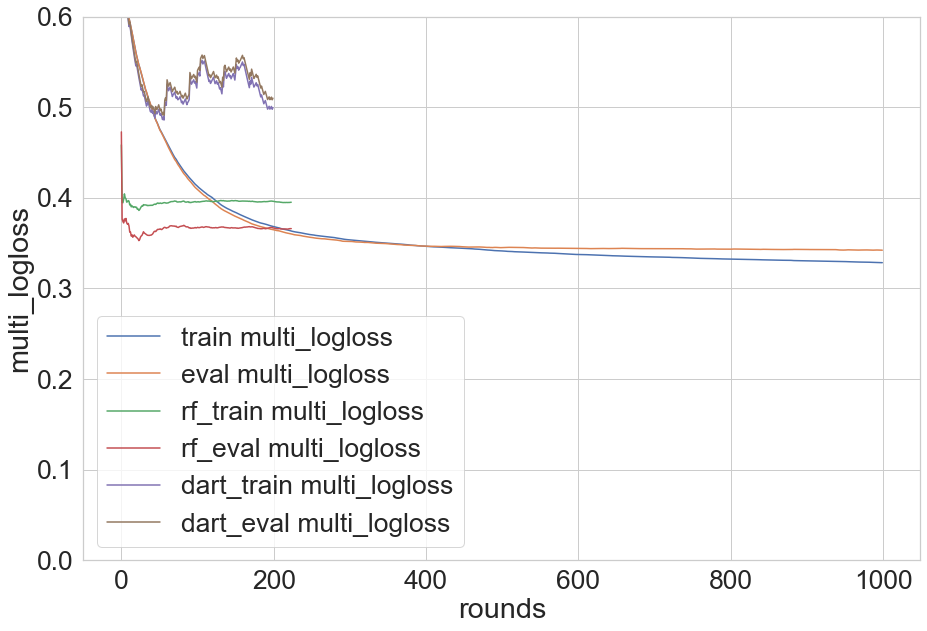

In [22]:
plt.figure(figsize=(15, 10))

plt.plot(train_metric, label='train multi_logloss')
plt.plot(eval_metric, label='eval multi_logloss')
plt.plot(rf_train_metric, label='rf_train multi_logloss')
plt.plot(rf_eval_metric, label='rf_eval multi_logloss')
plt.plot(dart_train_metric, label='dart_train multi_logloss')
plt.plot(dart_eval_metric, label='dart_eval multi_logloss')

plt.grid()
plt.legend()
plt.ylim(0 , 0.6)

plt.xlabel('rounds')
plt.ylabel('multi_logloss')
plt.grid(True)
plt.show()

lightGBM(gbdt) = 0.7215708226864413
lightGBM(rf) = 0.7383002116690784
lightGBM(dart) = 0.7064209592529506
lightGBM(total) = 0.7386148499480498


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

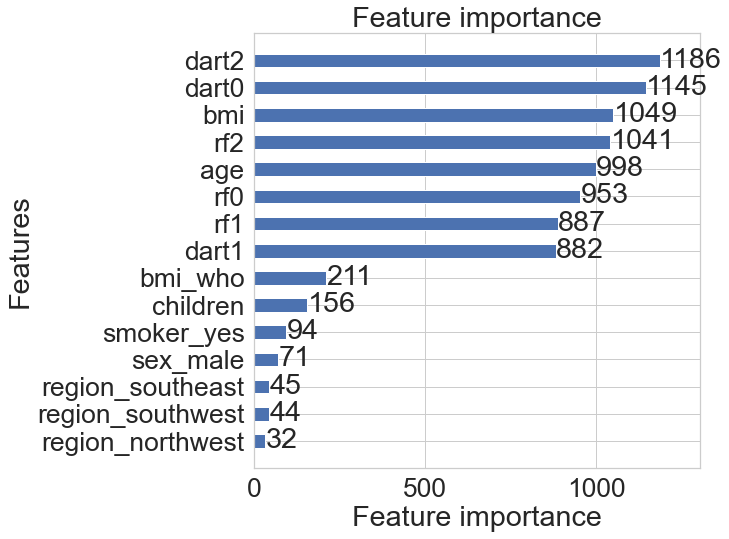

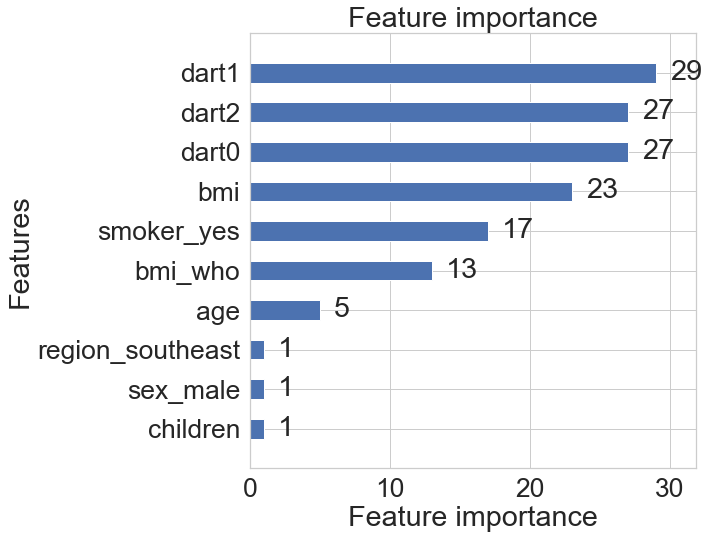

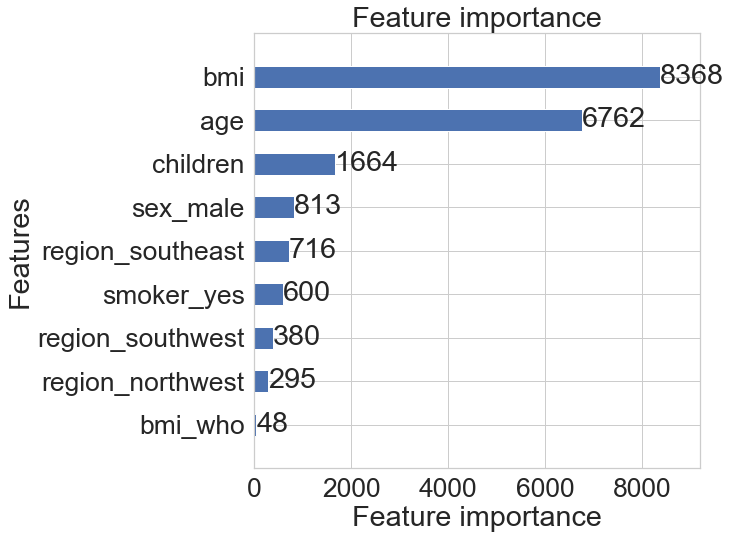

In [31]:
y_lgb_oof_train_max = np.argmax(y_lgb_oof_train, axis=1)
print("lightGBM(gbdt) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_oof_train_max, average='macro')))
y_lgb_rf_oof_train_max = np.argmax(y_lgb_rf_oof_train, axis=1)
print("lightGBM(rf) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_rf_oof_train_max, average='macro')))
y_lgb_dart_oof_train_max = np.argmax(y_lgb_dart_oof_train, axis=1)
print("lightGBM(dart) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_dart_oof_train_max, average='macro')))
# 結果の統合
y_lgb_total_oof_train = (y_lgb_oof_train*0.10 + y_lgb_rf_oof_train*0.90 + y_lgb_dart_oof_train*0.00)
y_lgb_total_oof_train_max = np.argmax(y_lgb_total_oof_train, axis=1)
print("lightGBM(total) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_total_oof_train_max, average='macro')))

# LGB plog importance
lgb.plot_importance(gbm, height=0.5, figsize=(8,8))
lgb.plot_importance(gbm_rf, height=0.5, figsize=(8,8))
lgb.plot_importance(gbm_dart, height=0.5, figsize=(8,8))

In [32]:
y_lgb_gbdt_pred = sum(y_lgb_preds)/len(y_lgb_preds)
y_lgb_rf_pred = sum(y_lgb_rf_preds)/len(y_lgb_rf_preds)
y_lgb_dart_pred = sum(y_lgb_dart_preds)/len(y_lgb_dart_preds)
y_lgb_total_pred = y_lgb_gbdt_pred*0.1 + y_lgb_rf_pred*0.9 + y_lgb_dart_pred*0.0

y_pred_max = np.argmax(y_lgb_total_pred, axis=1)
y_pred_max = list(y_pred_max)
y_pred_max[:10]

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
submit_sample.head()

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0


提出

In [34]:
submit_sample[1] = y_pred_max
submit_sample.to_csv('submit.csv',index = False,  header=None)

In [35]:
submit_sample.head()

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0
